In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv("G:\Project Data\Carprice\CarPrice_Assignment.csv")
data.shape

(205, 26)

In [3]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

# Checking the percantage of missing values present in each features.

In [4]:
features_wid_na=[feature for feature in data.columns if data[feature].isnull().sum()>1]

# Printing the feature name and the percentage of missing value.

In [5]:
for feature in features_wid_na:
    print(features, np.round(data[feature].isnull().mean(),4),'% missing value')

In [6]:
# we don't have any missing values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

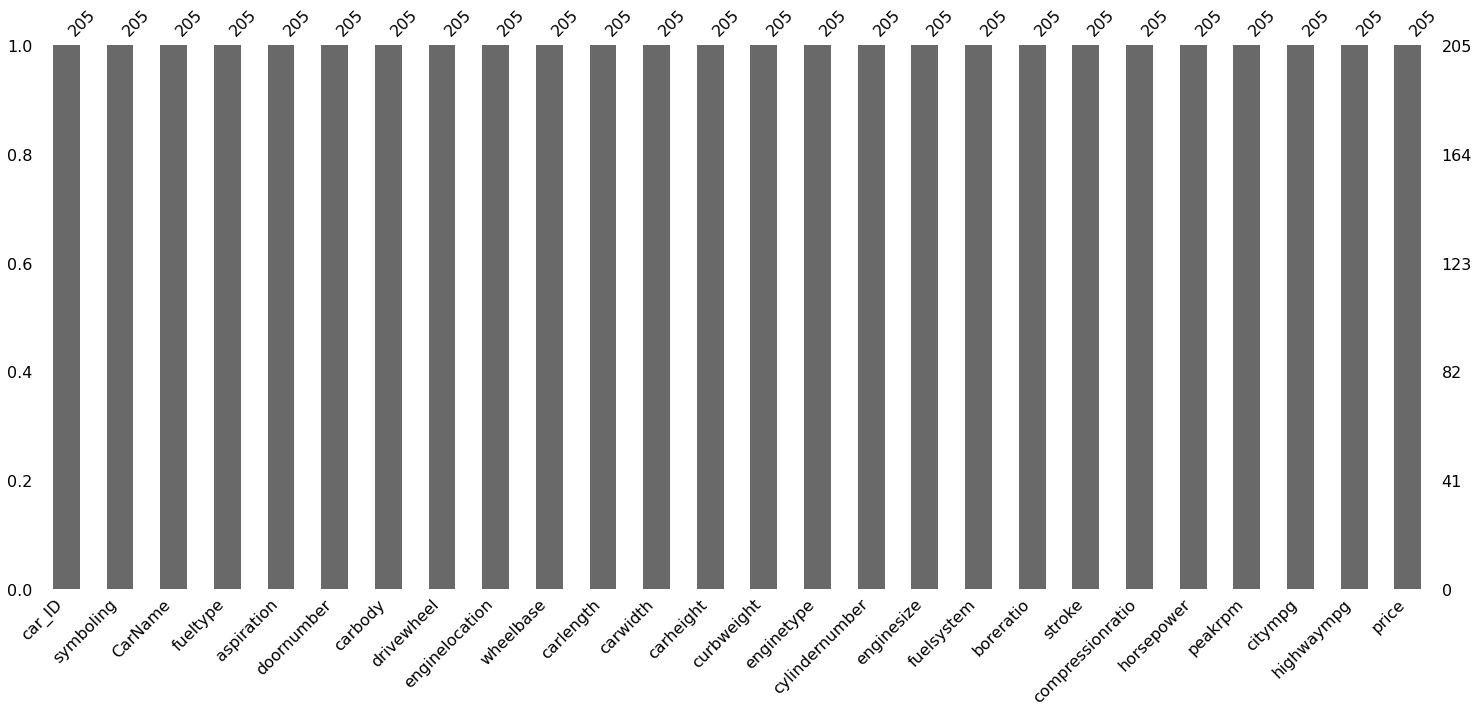

In [7]:
import missingno as msno
msno.bar(data)

# List of the numerical variable.

In [8]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes!='O']
print("Numbers of numerical variables :", len(numerical_features))

Numbers of numerical variables : 16


In [9]:
data[numerical_features].head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

# list of discrete variables.

In [10]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in ['car_Id']]
print("Discrete variables count:{}".format(len(discrete_feature)))

Discrete variables count:2


In [11]:
for feature in discrete_feature:
    total_value= len(data[feature].unique())
    print(feature, total_value)

symboling 6
peakrpm 23


In [12]:
data[discrete_feature].head()

symboling  peakrpm
0          3     5000
1          3     5000
2          1     5000
3          2     5500
4          2     5500

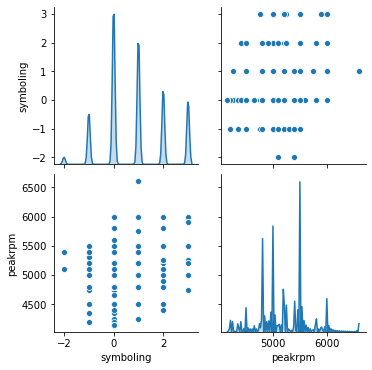

In [13]:
sns.pairplot(data[discrete_feature],diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

Quantity of the discrete variables

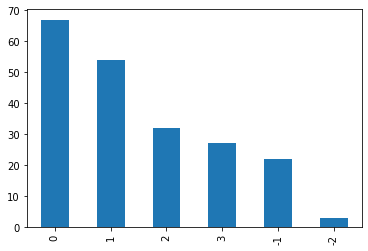

In [14]:
data['symboling'].value_counts().plot.bar()

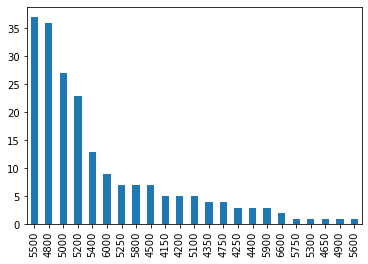

In [15]:
data['peakrpm'].value_counts().plot.bar()

# Relationship between discrete features and price

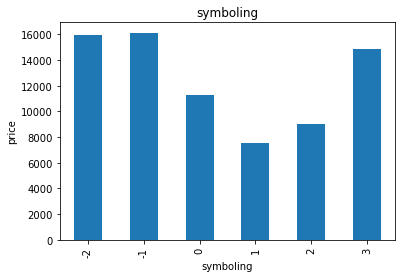

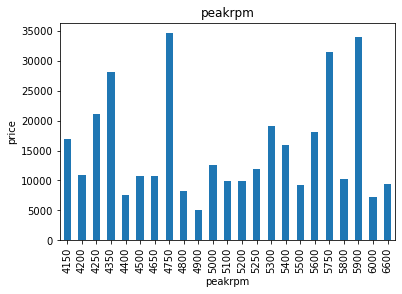

In [16]:
for feature in discrete_feature:
    dataset=data.copy()
    dataset.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

# Outliers in discrete variables:

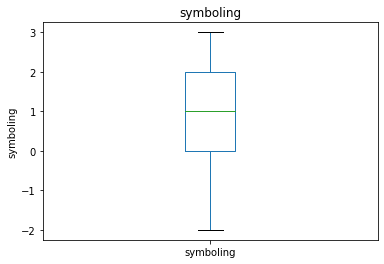

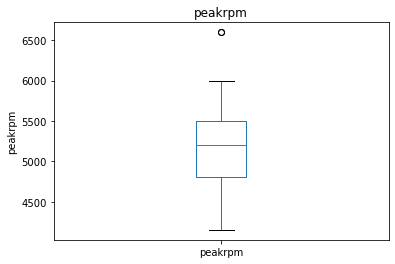

In [17]:
for feature in discrete_feature:
    dataset=data.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.grid(False)
    plt.show()

# Removing the outliers
# define a function called "outliers" which returns a list of index of outliers

In [18]:
def outliers (df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [19]:
# creating an empty list to store the output indices from multiple column
index_list=[]

In [20]:
for feature in ['symboling','peakrpm']:
        index_list.extend(outliers(data,feature))

In [21]:
index_list

[165, 166]

In [22]:
# define a function called "remove" which return a clean dataframe without outliers.

In [23]:
def remove (df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [24]:
df_cleaned=remove(data,index_list)

In [25]:
df_cleaned.shape

(203, 26)

In [26]:
data=df_cleaned.copy()

In [27]:
data.shape

(203, 26)

# List of continious varaibles

In [28]:
coun_features=[feature for feature in numerical_features if feature not in discrete_feature+['car_ID']]
print("continuous feature count {}".format(len(coun_features)))

continuous feature count 13


In [29]:
data[coun_features].head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  citympg  highwaympg  \
0       3.47    2.68               9.0         111       21          27   
1       3.47    2.68               9.0         111       21          27   
2       2.68    3.47               9.0         154       19          26   
3       3.19    3.40              10.0         102       24          30   
4       3.19    3.40               8.0         115       18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0

<Figure size 1800x1800 with 0 Axes>

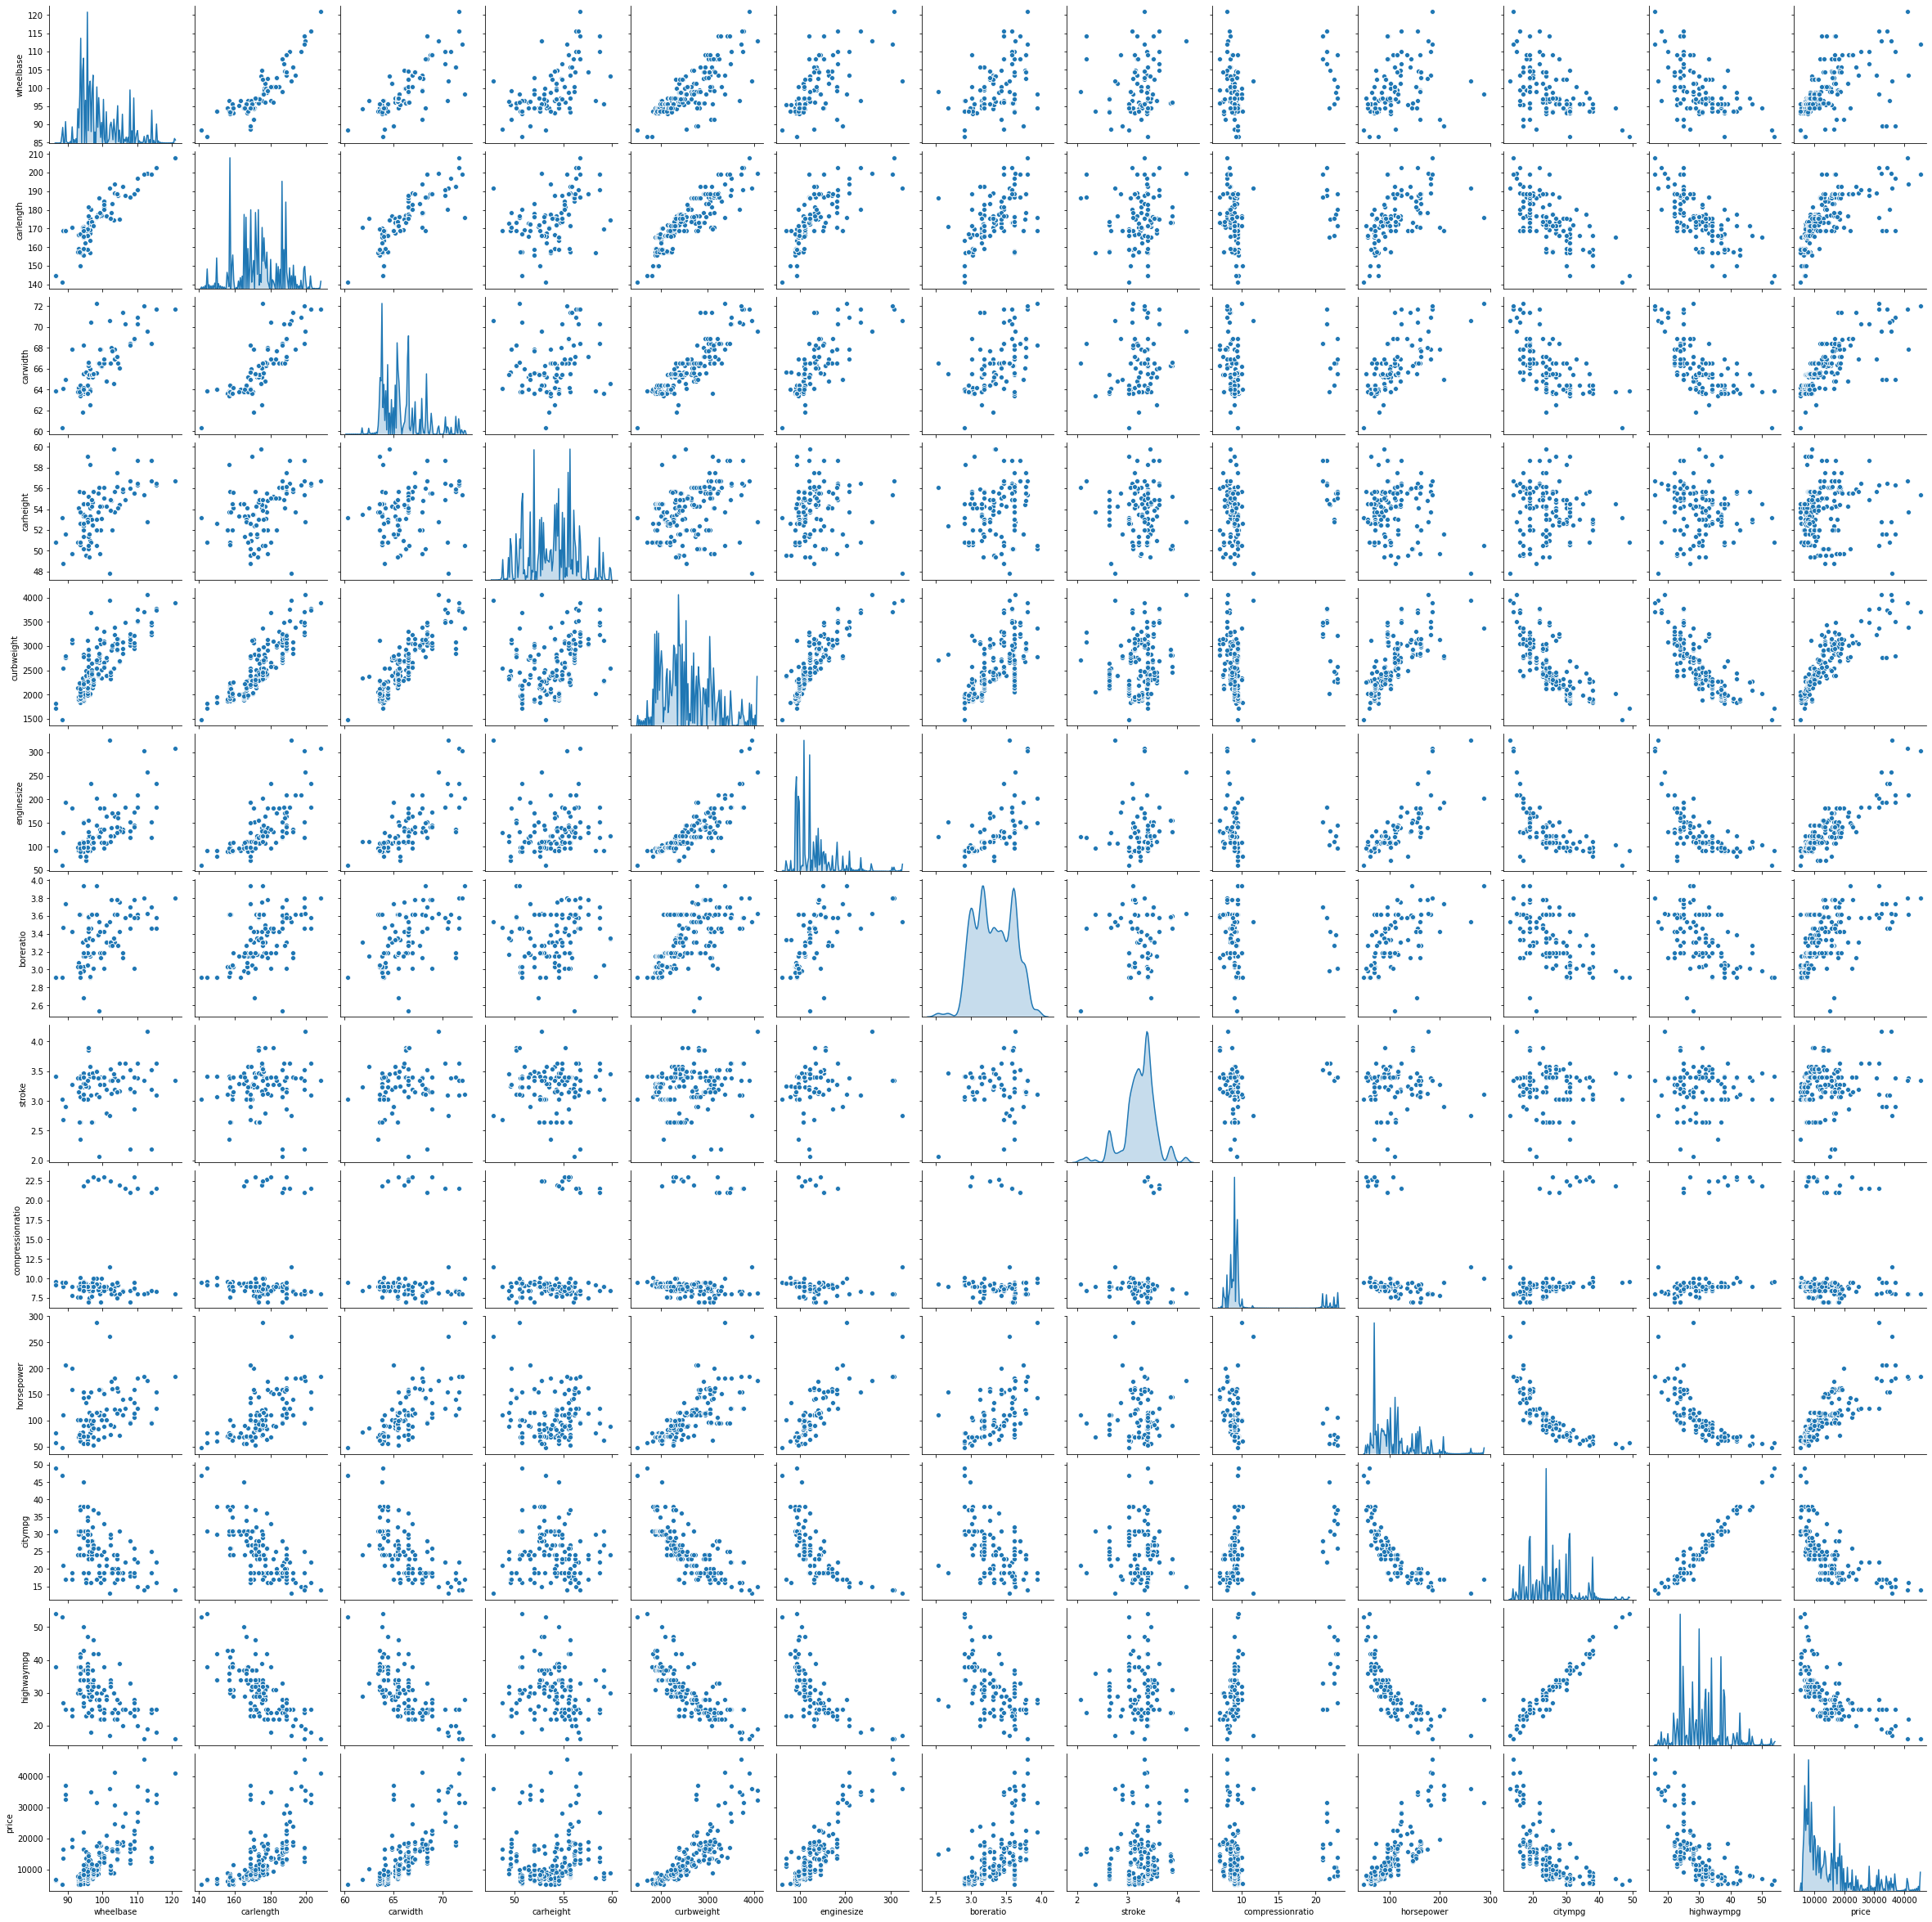

In [30]:
plt.figure(figsize=(25,25))
sns.pairplot(data[coun_features],diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

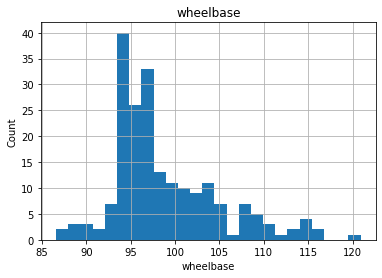

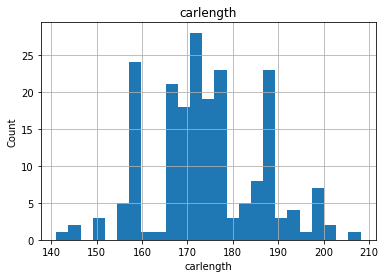

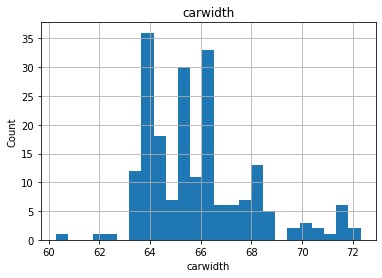

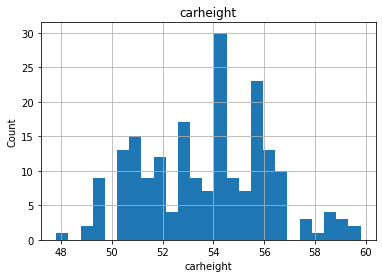

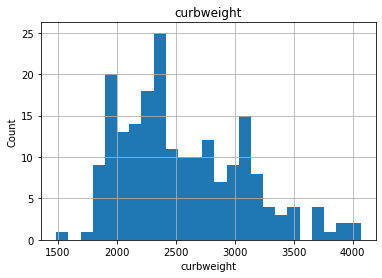

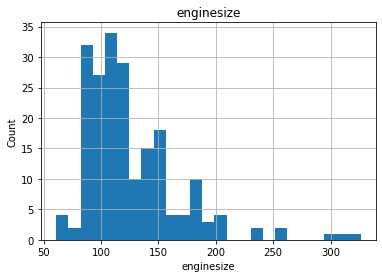

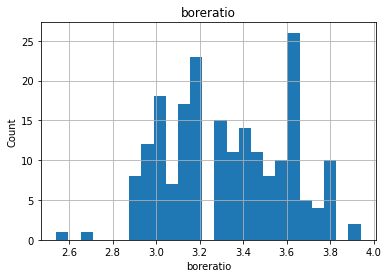

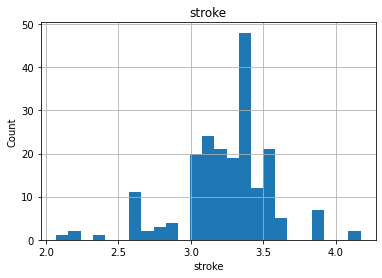

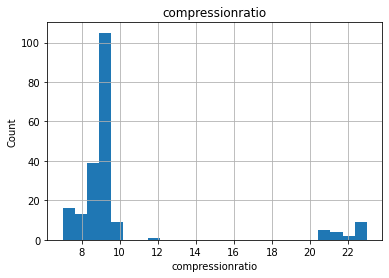

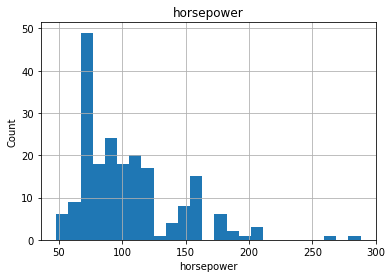

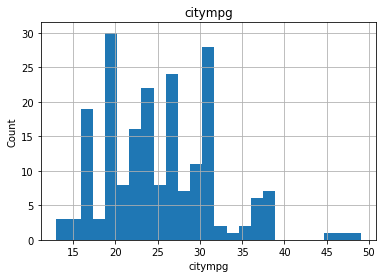

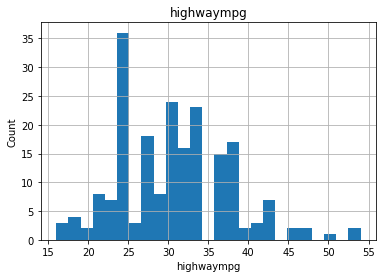

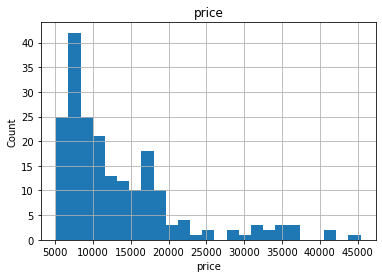

In [31]:
#Distribution of the continuous variables:
for feature in coun_features:
    dataset=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# outliers in continious variables

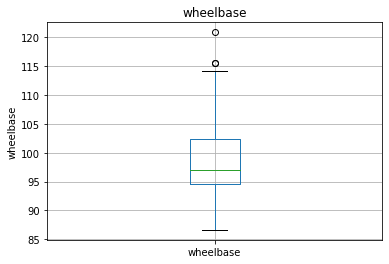

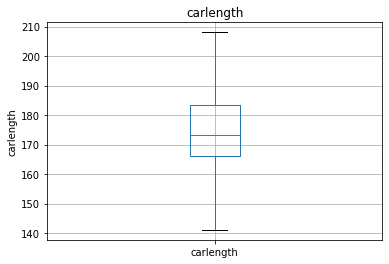

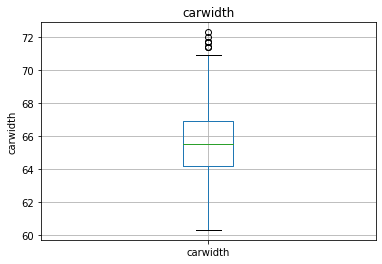

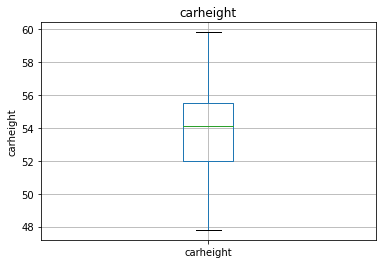

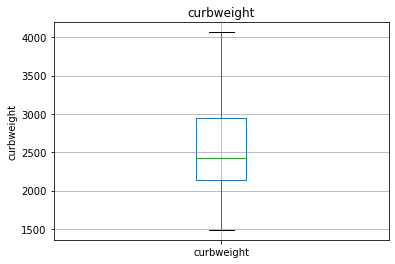

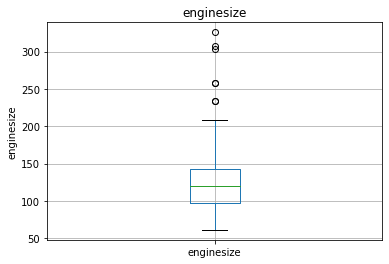

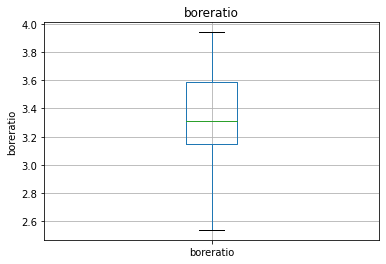

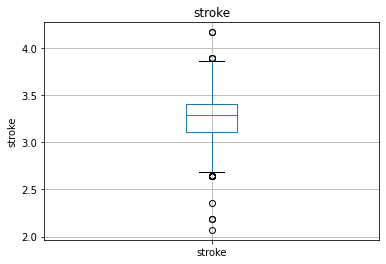

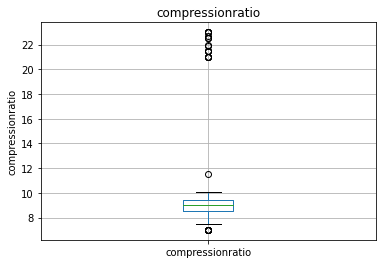

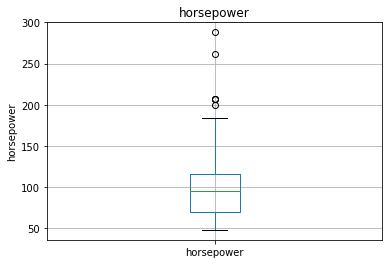

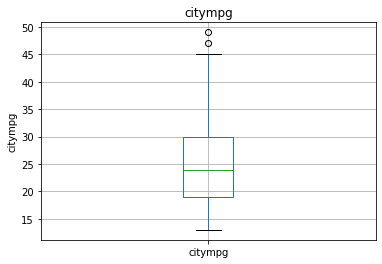

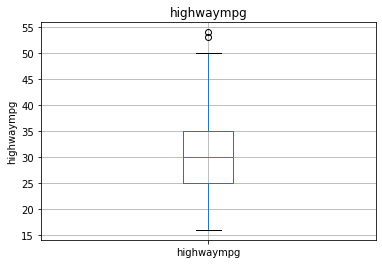

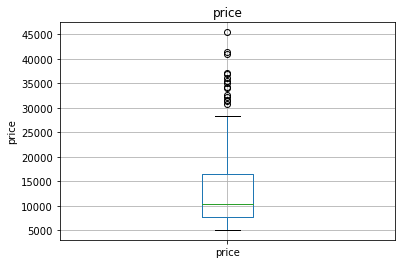

In [32]:
for feature in coun_features:
    dataset=data.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

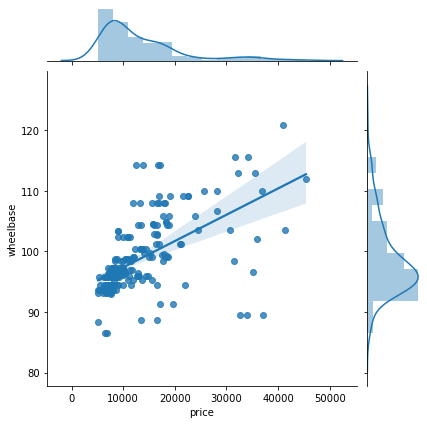

In [33]:
#Relation between price and wheelbase:
sns.jointplot(x='price',y='wheelbase',data=data,kind='reg',fit_reg=True)

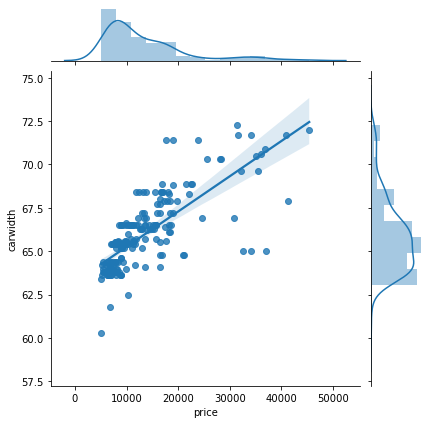

In [34]:
# Relation between price and carwidth:
sns.jointplot(x='price',y='carwidth',data=data,kind='reg',fit_reg=True)

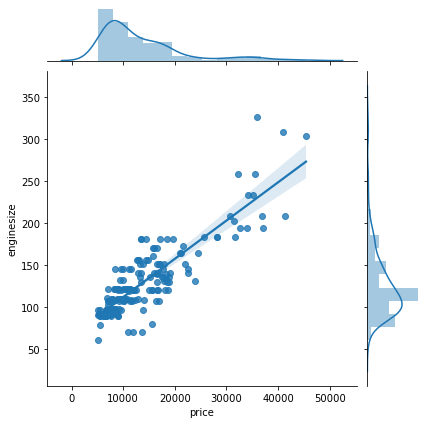

In [35]:
#Relation between price and enginesize:
sns.jointplot(x='price',y='enginesize',data=data,kind='reg',fit_reg=True)

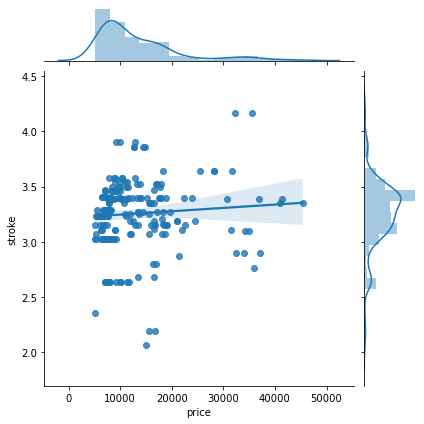

In [36]:
#Relation between price and stroke:\
sns.jointplot(x='price',y='stroke',data=data,kind='reg',fit_reg=True)

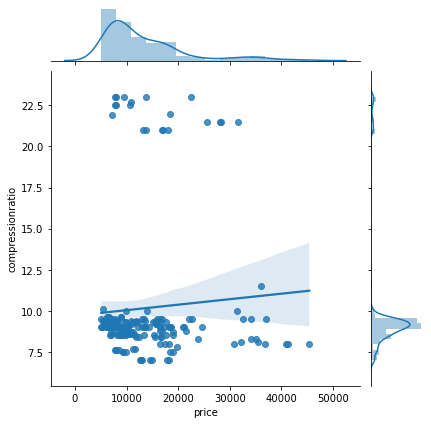

In [37]:
#Relation between price and compressionratio:
sns.jointplot(x='price',y='compressionratio',data=data,kind='reg',fit_reg=True)

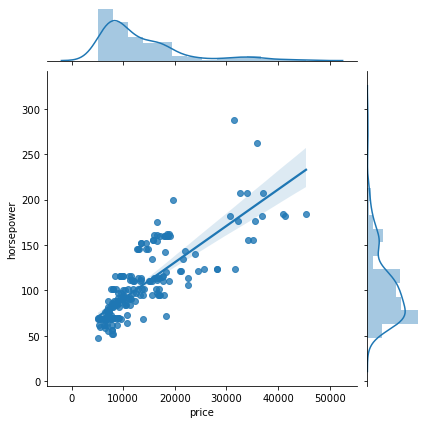

In [38]:
#Relation between price and horsepower:
sns.jointplot(x='price',y='horsepower',data=data,kind='reg',fit_reg=True)

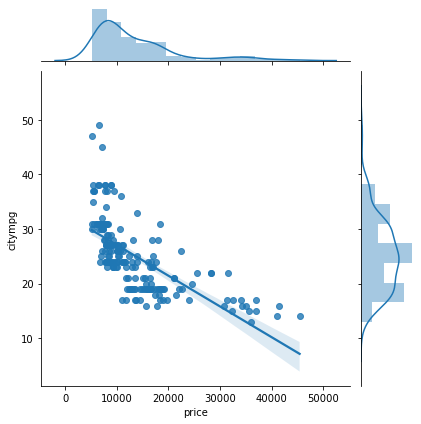

In [39]:
#Relations between price and citympg:
sns.jointplot(x='price',y='citympg',data=data,kind='reg',fit_reg=True)

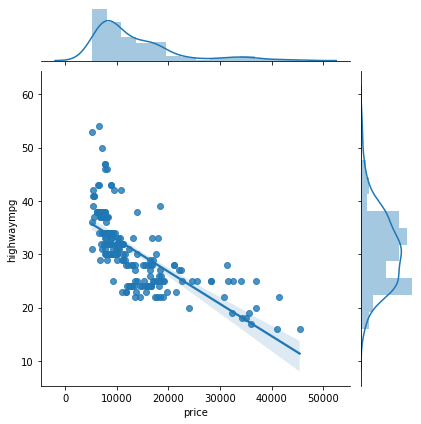

In [40]:
#Relation between price and highwaympg:
sns.jointplot(x='price',y='highwaympg',data=data,kind='reg',fit_reg=True)

In [41]:
#creating the empty list to store the output indices from multiple columns:
index_list=[]

In [42]:
for feature in ['compressionratio','stroke']:
    index_list.extend(outliers(data,feature))

In [43]:
index_list

[9,
 29,
 49,
 63,
 66,
 67,
 68,
 69,
 70,
 82,
 83,
 84,
 90,
 108,
 110,
 112,
 114,
 116,
 117,
 124,
 158,
 159,
 174,
 182,
 184,
 187,
 192,
 203,
 29,
 47,
 48,
 111,
 113,
 130,
 131,
 134,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

# Removing the outliers in continous variable by calling the "remove" defined function:

In [44]:
df_cleaned= remove(data,index_list)
df_cleaned.shape

(156, 26)

# list of categorical feature:

In [45]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
data[categorical_features].head()

CarName fueltype aspiration doornumber      carbody  \
0        alfa-romero giulia      gas        std        two  convertible   
1       alfa-romero stelvio      gas        std        two  convertible   
2  alfa-romero Quadrifoglio      gas        std        two    hatchback   
3               audi 100 ls      gas        std       four        sedan   
4                audi 100ls      gas        std       four        sedan   

  drivewheel enginelocation enginetype cylindernumber fuelsystem  
0        rwd          front       dohc           four       mpfi  
1        rwd          front       dohc           four       mpfi  
2        rwd          front       ohcv            six       mpfi  
3        fwd          front        ohc           four       mpfi  
4        4wd          front        ohc           five       mpfi

In [46]:
for feature in categorical_features:    
    print('the feature is {} and number of categorical feature is {}'.format(feature,len(data[feature].unique())))

the feature is CarName and number of categorical feature is 145
the feature is fueltype and number of categorical feature is 2
the feature is aspiration and number of categorical feature is 2
the feature is doornumber and number of categorical feature is 2
the feature is carbody and number of categorical feature is 5
the feature is drivewheel and number of categorical feature is 3
the feature is enginelocation and number of categorical feature is 2
the feature is enginetype and number of categorical feature is 7
the feature is cylindernumber and number of categorical feature is 7
the feature is fuelsystem and number of categorical feature is 8


# Splitting company name from CarName column

In [47]:
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [48]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [49]:
data.CompanyName = data.CompanyName.str.lower()

def replace_name(a,b):
    data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [50]:
#Checking for duplicates
data.loc[data.duplicated()]

Empty DataFrame
Columns: [car_ID, symboling, CompanyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]

In [51]:
print(data.CompanyName.value_counts())

toyota         30
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CompanyName, dtype: int64


Quantity on catagorical variables

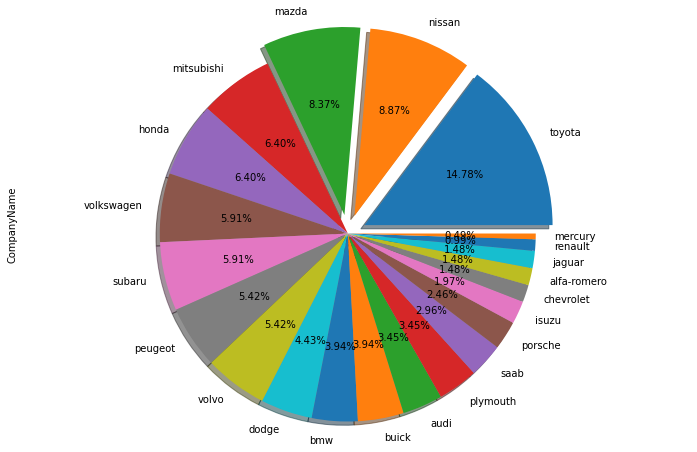

In [52]:
plt.figure(figsize=(12,8))
myexplode = [0.1, 0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
data["CompanyName"].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=myexplode,shadow=True)
plt.axis('equal')
plt.show()

In [53]:
print(data.fueltype.value_counts())

gas       183
diesel     20
Name: fueltype, dtype: int64


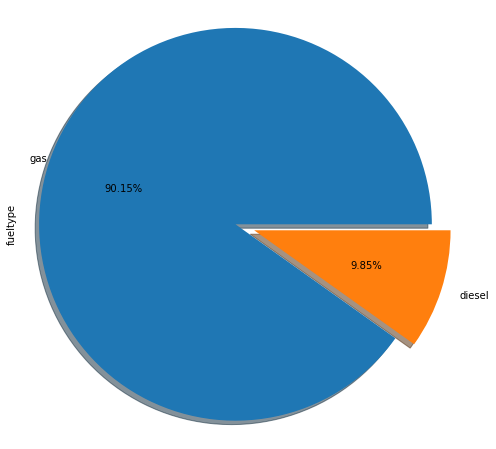

In [54]:
plt.figure(figsize=(8,8))
myexplode = [0.1, 0]
data["fueltype"].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=myexplode,shadow=True,center=(8,8))
plt.axis('equal')
plt.show()

In [55]:
print(data.aspiration.value_counts())

std      166
turbo     37
Name: aspiration, dtype: int64


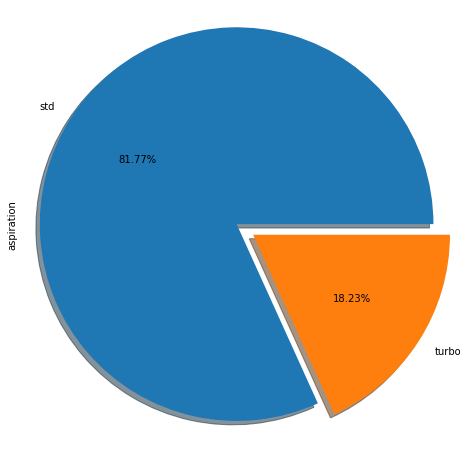

In [56]:
plt.figure(figsize=(8,8))
myexplode = [0.1, 0]
data["aspiration"].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=myexplode,shadow=True)
plt.axis('equal')
plt.show()

In [57]:
print(data.doornumber.value_counts())

four    115
two      88
Name: doornumber, dtype: int64


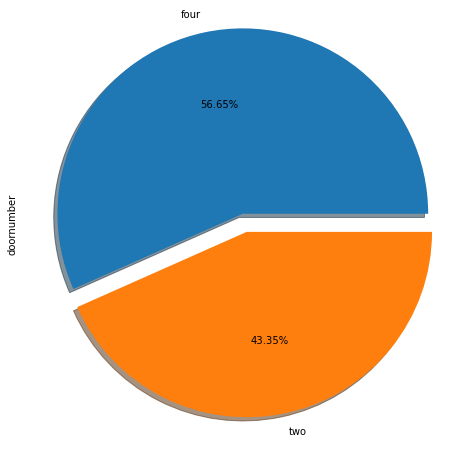

In [58]:
plt.figure(figsize=(8,8))
myexplode = [0.1, 0]
data["doornumber"].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=myexplode,shadow=True)
plt.axis('equal')
plt.show()

In [59]:
print(data.carbody.value_counts())

sedan          95
hatchback      69
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


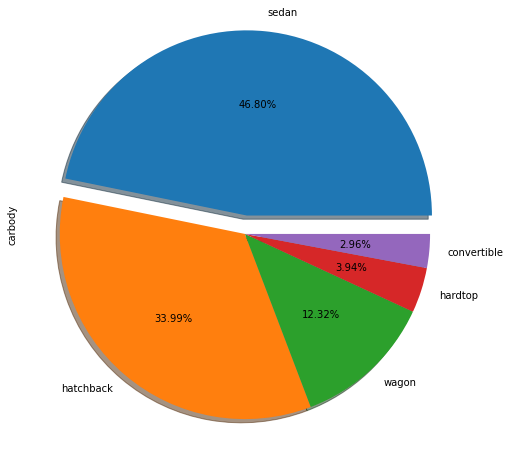

In [60]:
plt.figure(figsize=(8,8))
myexplode = [0.1, 0,0,0,0]
data["carbody"].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=myexplode,shadow=True)
plt.axis('equal')
plt.show()

In [61]:
print(data.drivewheel.value_counts())

fwd    120
rwd     74
4wd      9
Name: drivewheel, dtype: int64


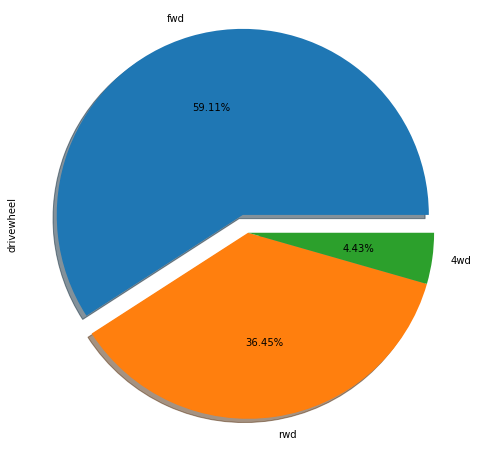

In [62]:
plt.figure(figsize=(8,8))
myexplode = [0.1, 0,0]
data["drivewheel"].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=myexplode,shadow=True)
plt.axis('equal')
plt.show()

In [63]:
print(data.enginelocation.value_counts())

front    200
rear       3
Name: enginelocation, dtype: int64


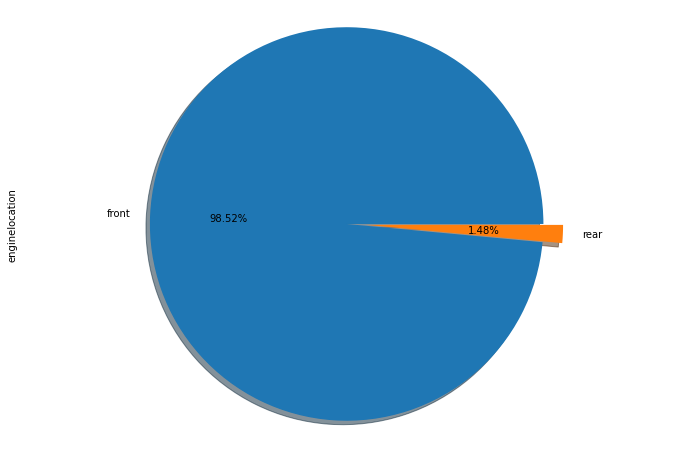

In [64]:
plt.figure(figsize=(12,8))
myexplode = [0.1, 0]
data["enginelocation"].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=myexplode,shadow=True)
plt.axis('equal')
plt.show()

In [65]:
print(data.enginetype.value_counts())

ohc      148
ohcf      15
ohcv      13
l         12
dohc      10
rotor      4
dohcv      1
Name: enginetype, dtype: int64


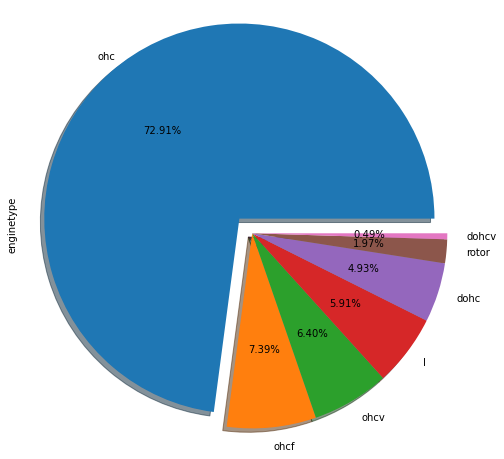

In [66]:
plt.figure(figsize=(8,8))
myexplode = [0.1, 0,0,0,0,0,0]
data["enginetype"].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=myexplode,shadow=True,center=(8,8))
plt.axis('equal')
plt.show()

In [67]:
print(data.cylindernumber.value_counts())

four      157
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64


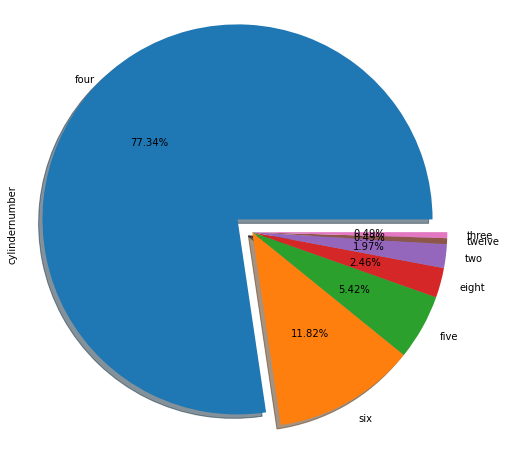

In [68]:
plt.figure(figsize=(8,8))
myexplode = [0.1, 0,0,0,0,0,0]
data["cylindernumber"].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=myexplode,shadow=True,center=(8,8))
plt.axis('equal')
plt.show()

In [69]:
print(data.fuelsystem.value_counts())

mpfi    92
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64


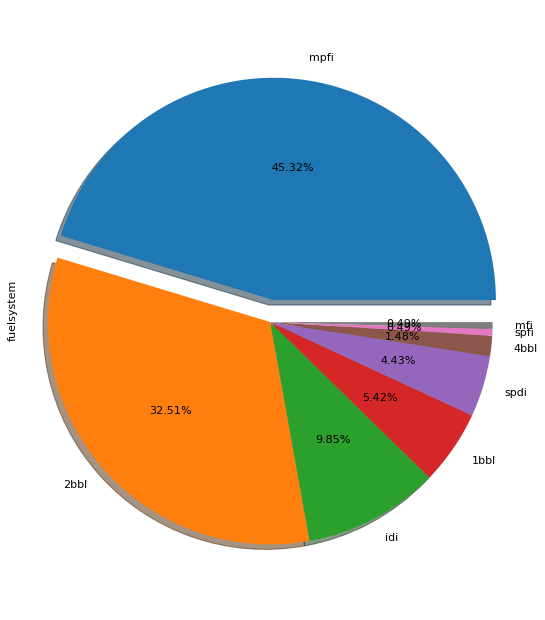

In [70]:
plt.figure(figsize=(8,10),dpi=80)
myexplode = [0.1, 0,0,0,0,0,0,0]
data["fuelsystem"].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=myexplode,shadow=True)
plt.axis('equal')
plt.show()

In [71]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
data[categorical_features].head()

CompanyName fueltype aspiration doornumber      carbody drivewheel  \
0  alfa-romero      gas        std        two  convertible        rwd   
1  alfa-romero      gas        std        two  convertible        rwd   
2  alfa-romero      gas        std        two    hatchback        rwd   
3         audi      gas        std       four        sedan        fwd   
4         audi      gas        std       four        sedan        4wd   

  enginelocation enginetype cylindernumber fuelsystem  
0          front       dohc           four       mpfi  
1          front       dohc           four       mpfi  
2          front       ohcv            six       mpfi  
3          front        ohc           four       mpfi  
4          front        ohc           five       mpfi

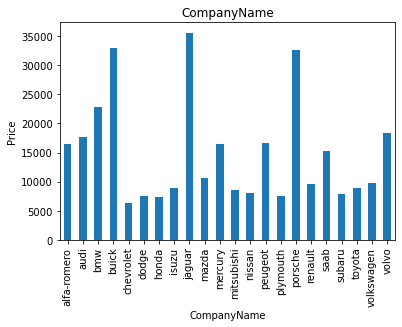

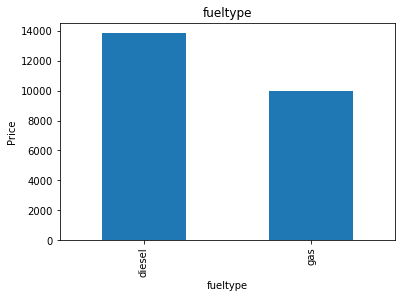

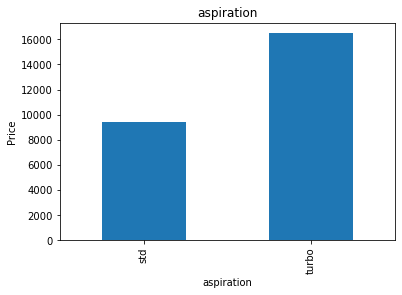

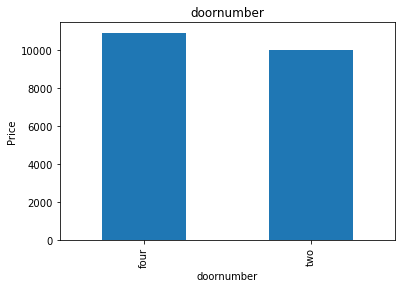

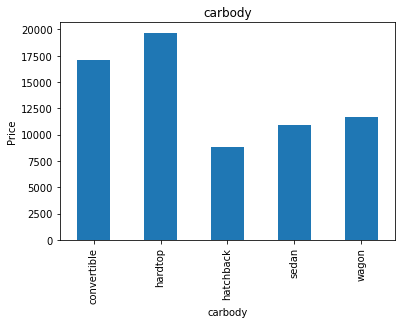

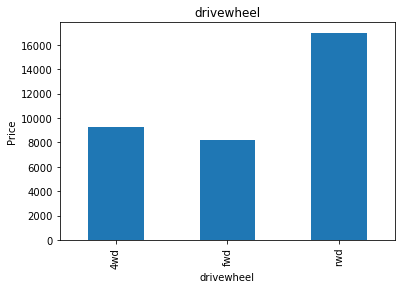

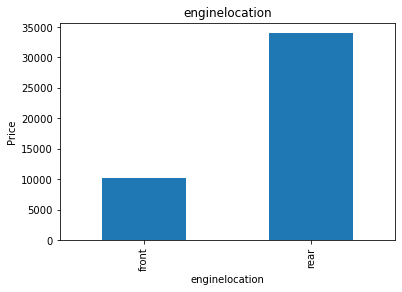

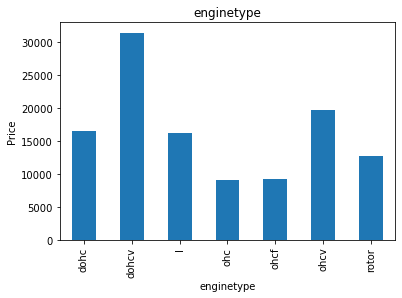

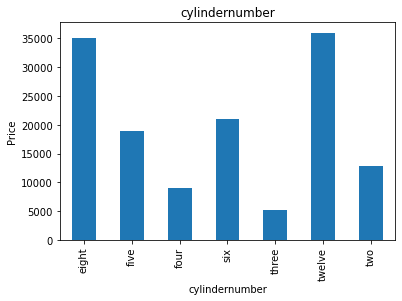

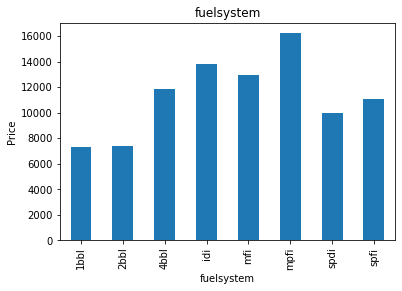

In [72]:
#Relationship between categorical feature and dependent feature:
for feature in categorical_features:
    dataset=data.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

<Figure size 3600x1200 with 0 Axes>

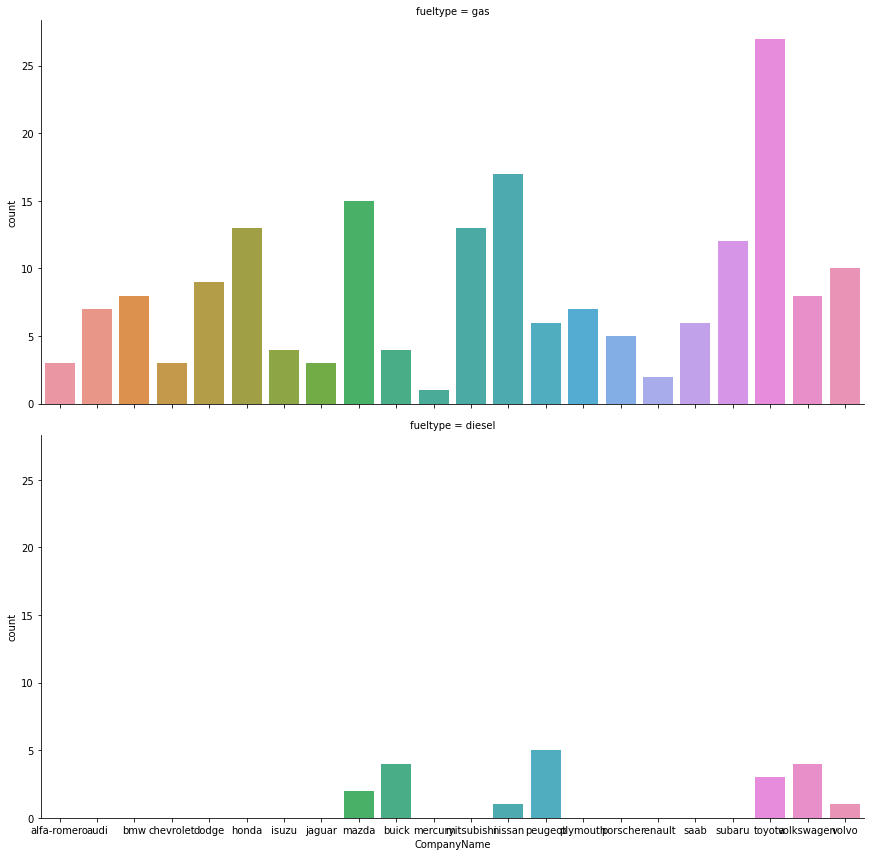

In [73]:
#Relationship between CompanyName and fueltype:
plt.figure(figsize=(30,10),dpi=120)
sns.catplot(x="CompanyName", col="fueltype", col_wrap=1, data=data,
                kind="count", height=6, aspect=2)

<Figure size 3600x1200 with 0 Axes>

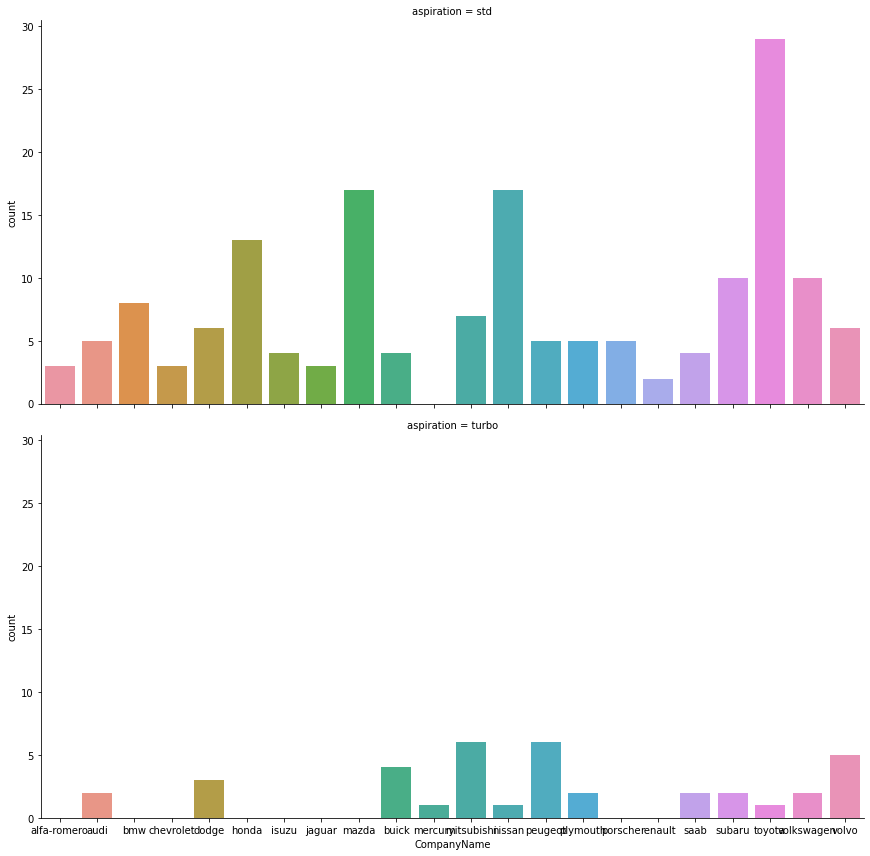

In [74]:
#Relationship between CompanyName and aspiration:
plt.figure(figsize=(30,10),dpi=120)
sns.catplot(x="CompanyName", col="aspiration", col_wrap=1, data=data,
                kind="count", height=6, aspect=2)

<Figure size 1200x1200 with 0 Axes>

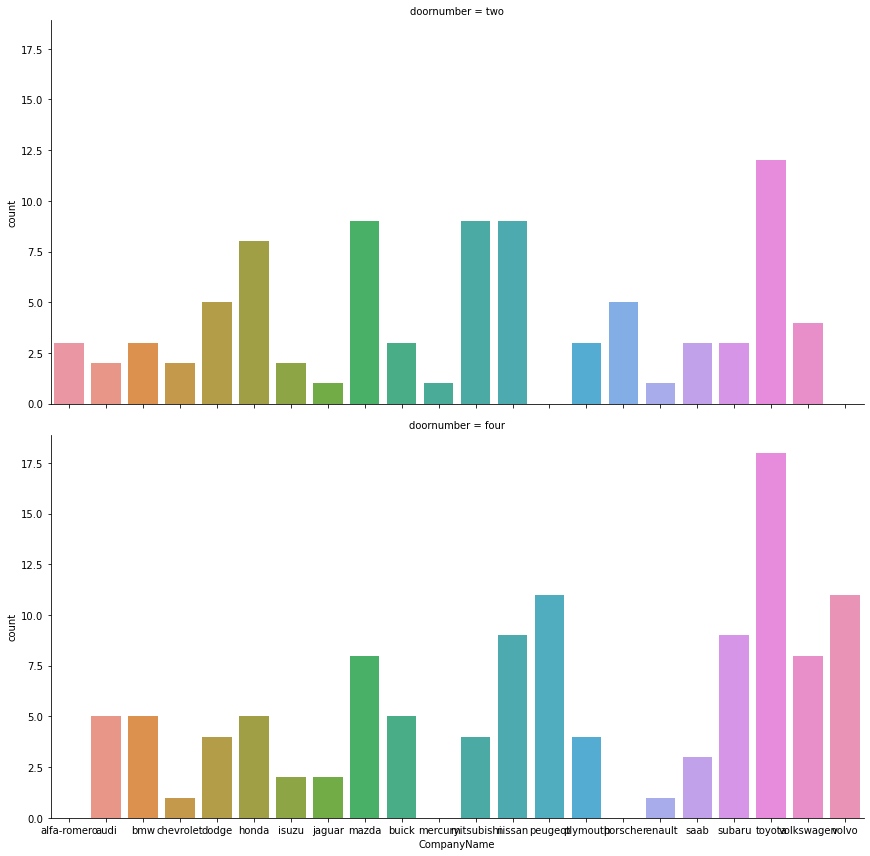

In [75]:
#Relationship between CompanyName and doornumber:
plt.figure(figsize=(10,10),dpi=120)
sns.catplot(x="CompanyName", col="doornumber", col_wrap=1, data=data,
                kind="count", height=6, aspect=2)

<Figure size 3000x3000 with 0 Axes>

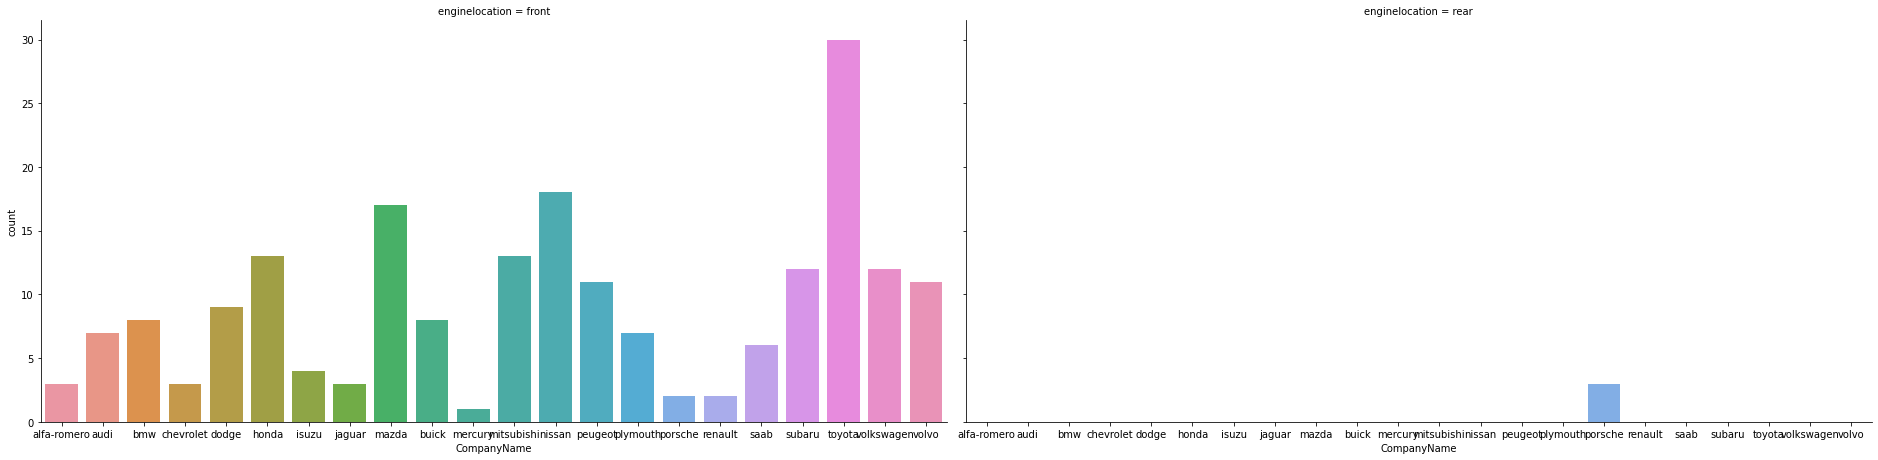

In [76]:
#Relationship between CompanyName and enginelocation:
plt.figure(figsize=(25,25),dpi=120)
sns.catplot(x="CompanyName", col="enginelocation", col_wrap=2, data=data,
                kind="count", height=6.5, aspect=2)

<Figure size 3000x3000 with 0 Axes>

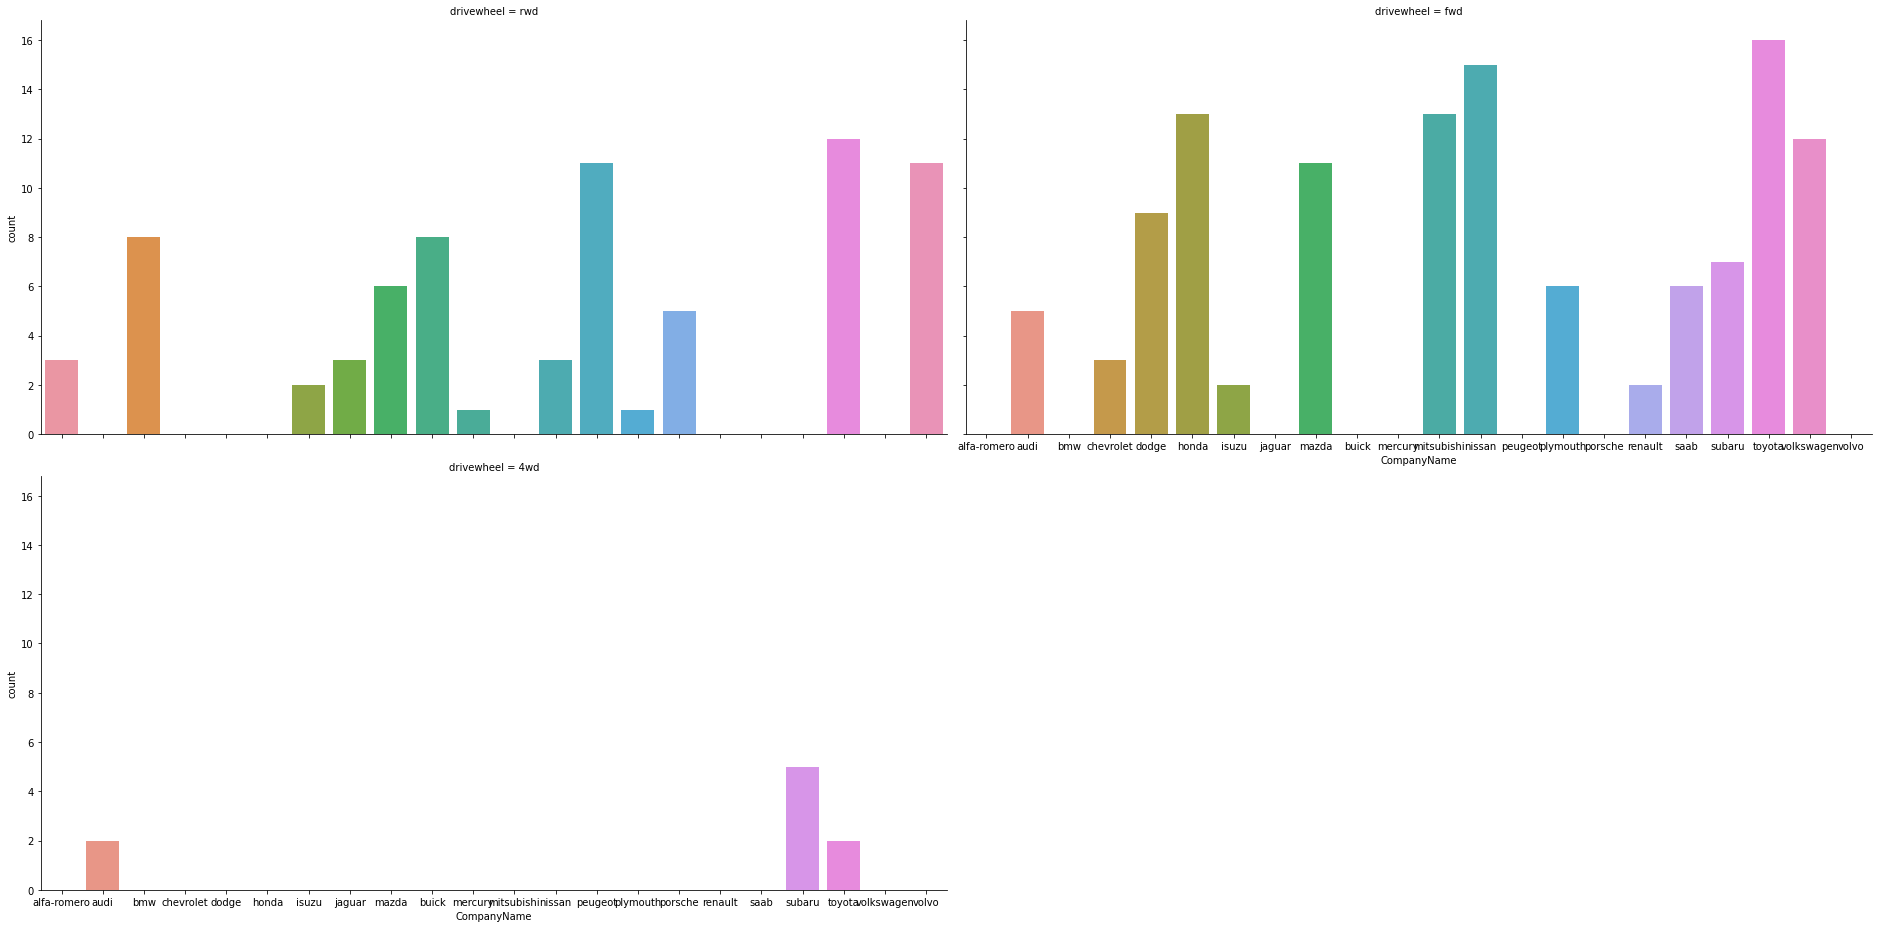

In [77]:
#Relationship between CompanyName and drivewheel:
plt.figure(figsize=(25,25),dpi=120)
sns.catplot(x="CompanyName", col="drivewheel", col_wrap=2, data=data,
                kind="count", height=6.5, aspect=2)

<Figure size 3000x3000 with 0 Axes>

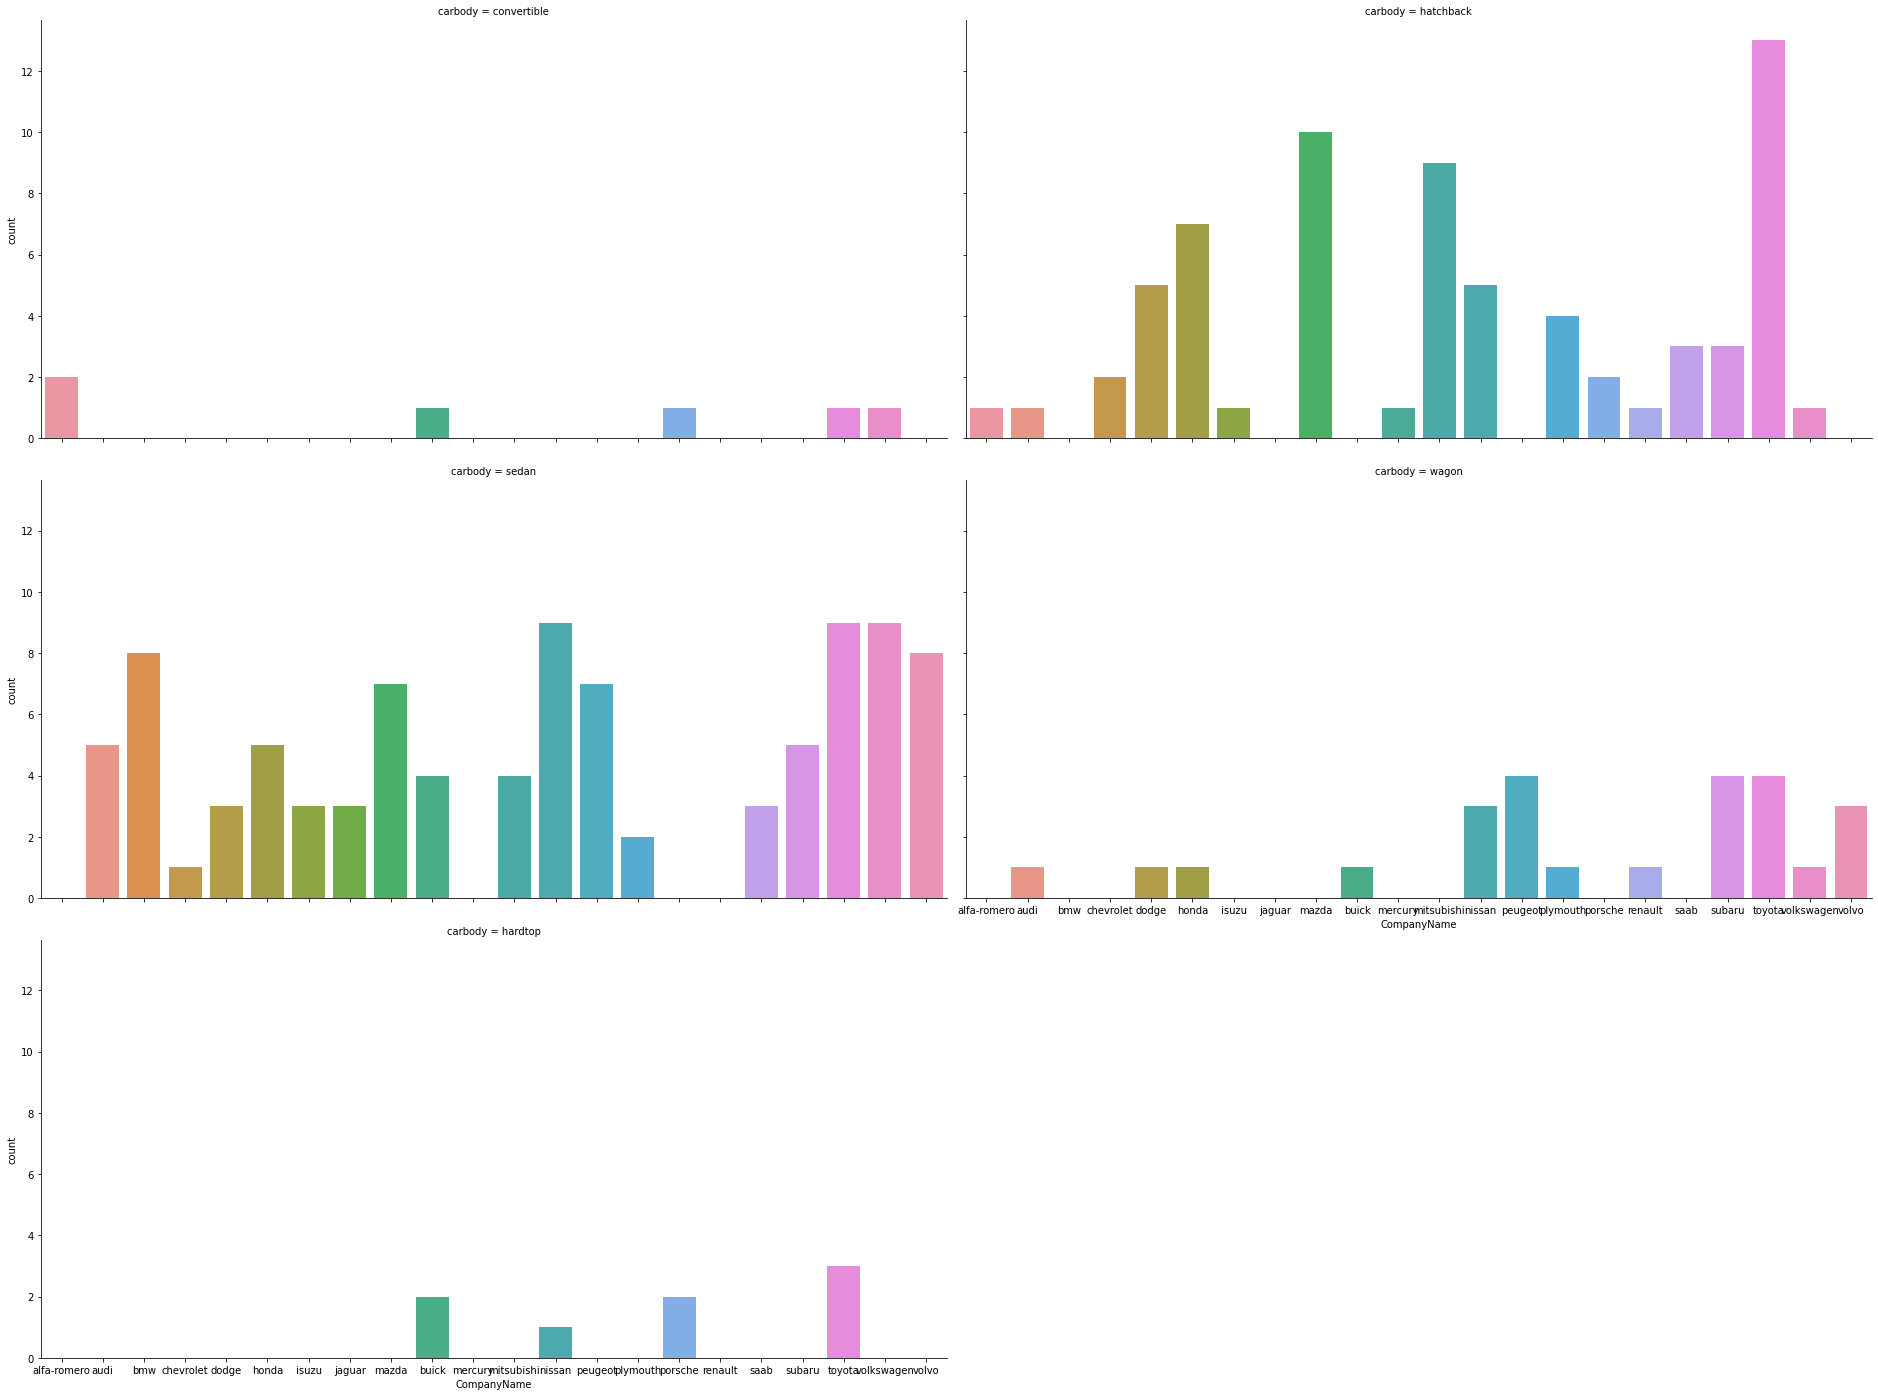

In [78]:
#Relationship between CompanyName and carbody:
plt.figure(figsize=(25,25),dpi=120)
sns.catplot(x="CompanyName", col="carbody", col_wrap=2, data=data,
                kind="count", height=6.5, aspect=2)

<Figure size 3000x3000 with 0 Axes>

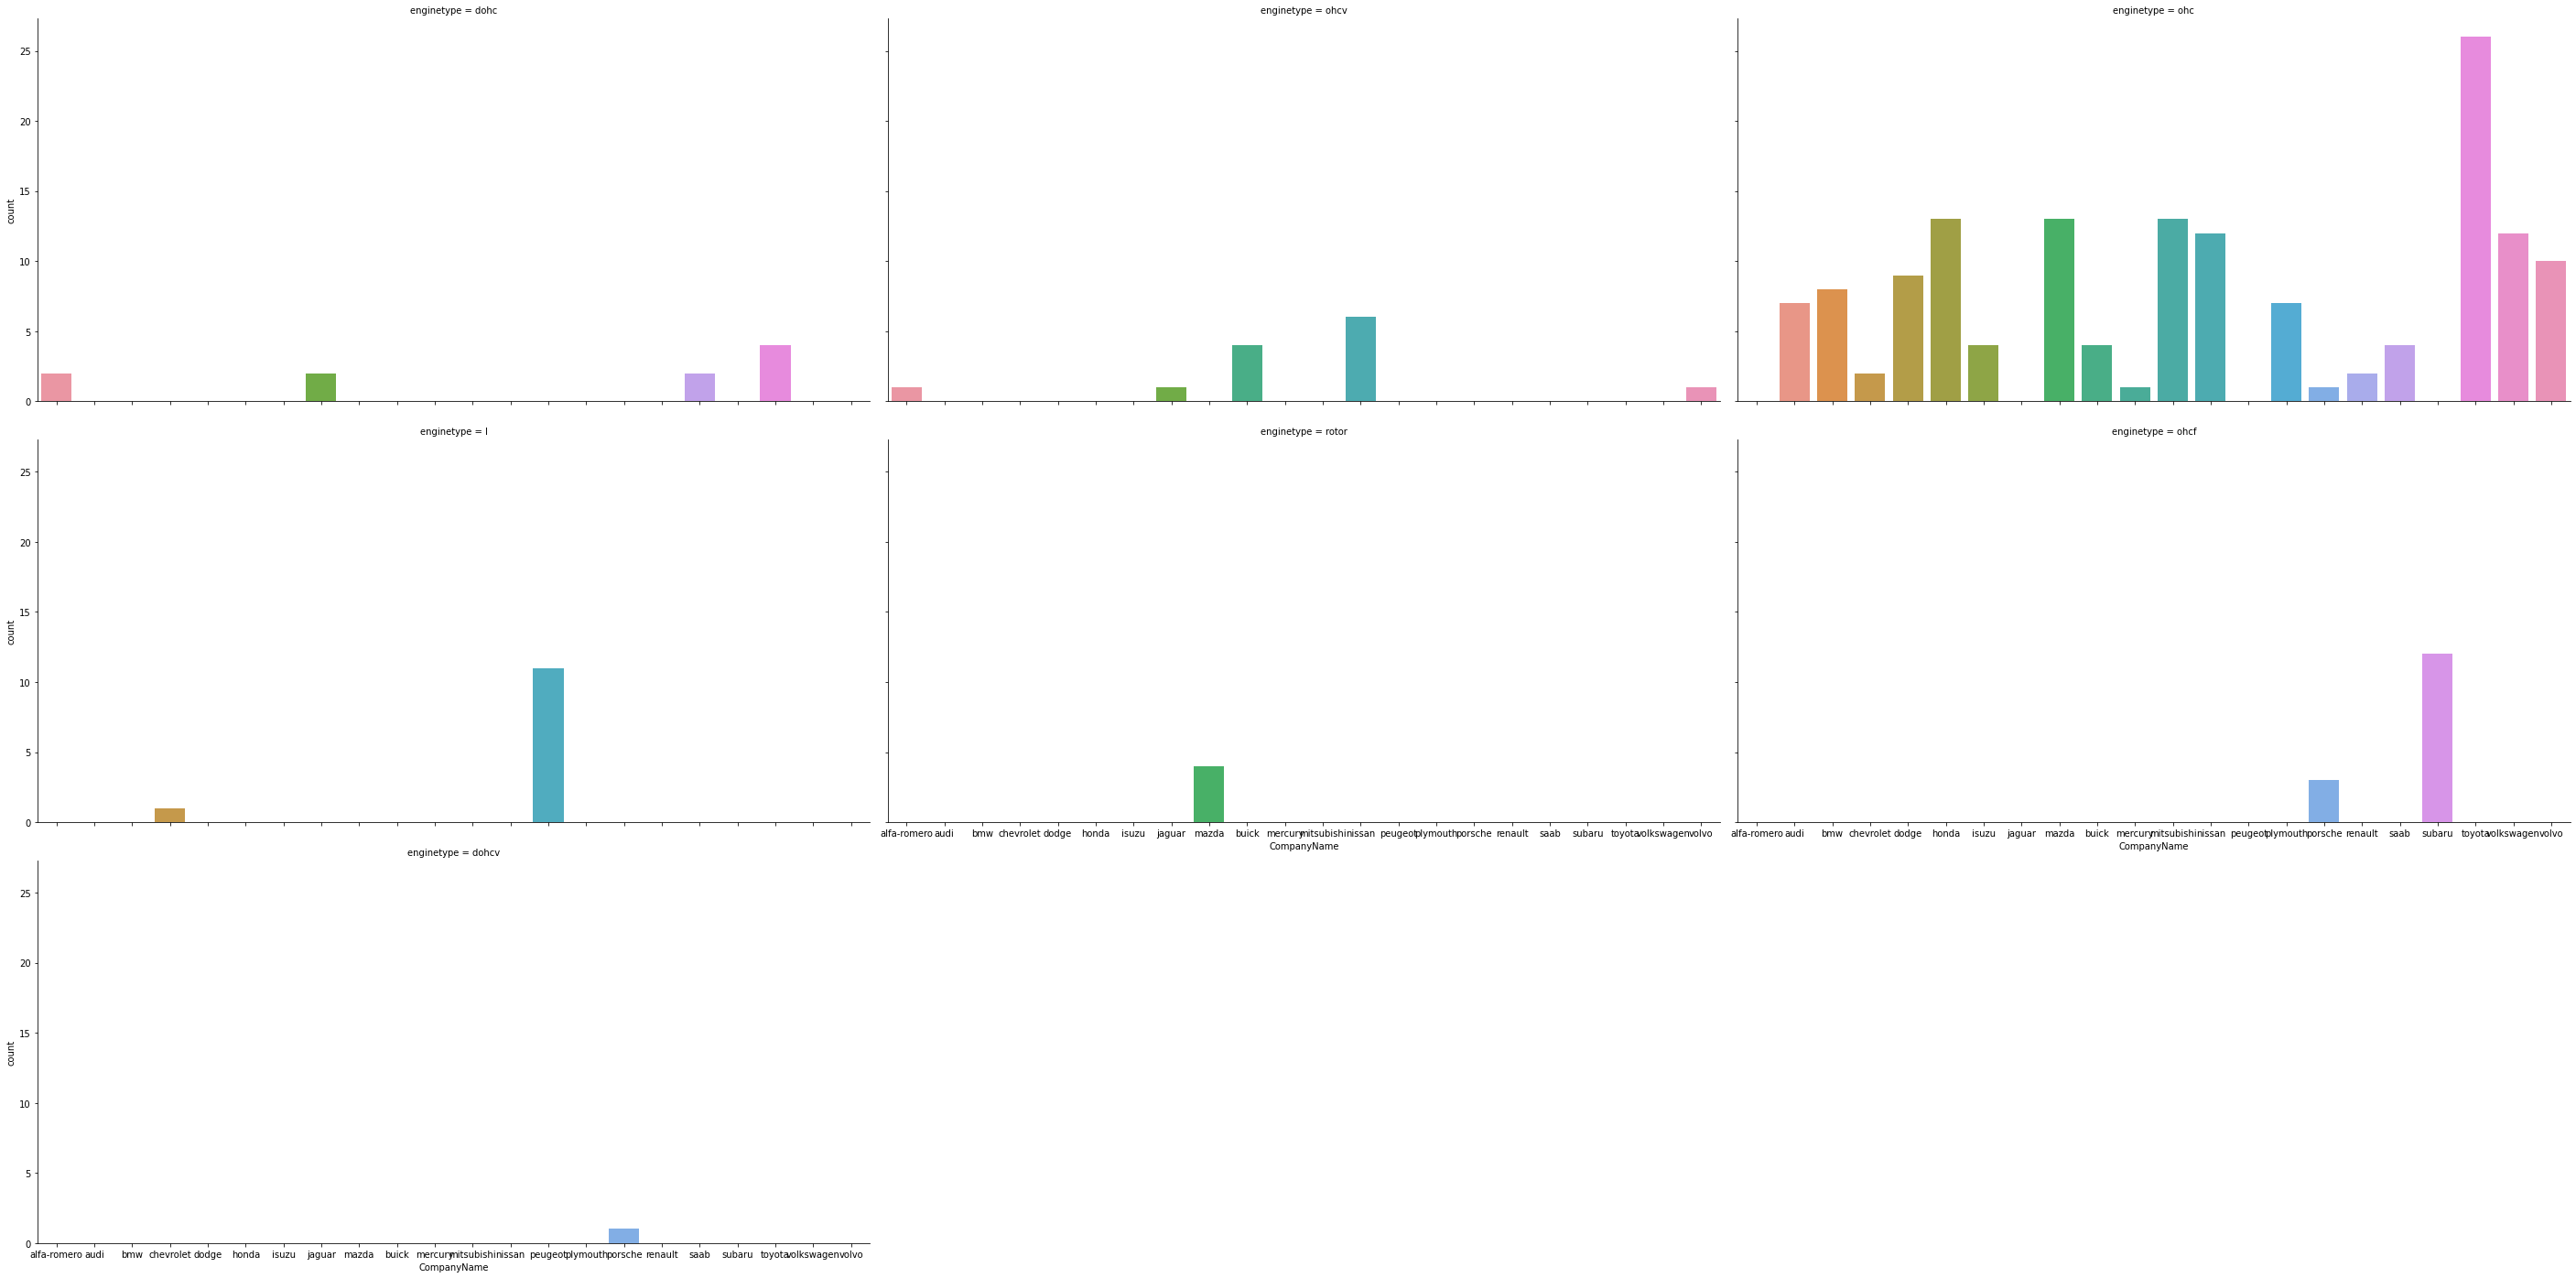

In [79]:
#Relationship between CompanyName and enginetype:
plt.figure(figsize=(25,25),dpi=120)
sns.catplot(x="CompanyName", col="enginetype", col_wrap=3, data=data,
                kind="count", height=6.5, aspect=2)

<Figure size 3000x3000 with 0 Axes>

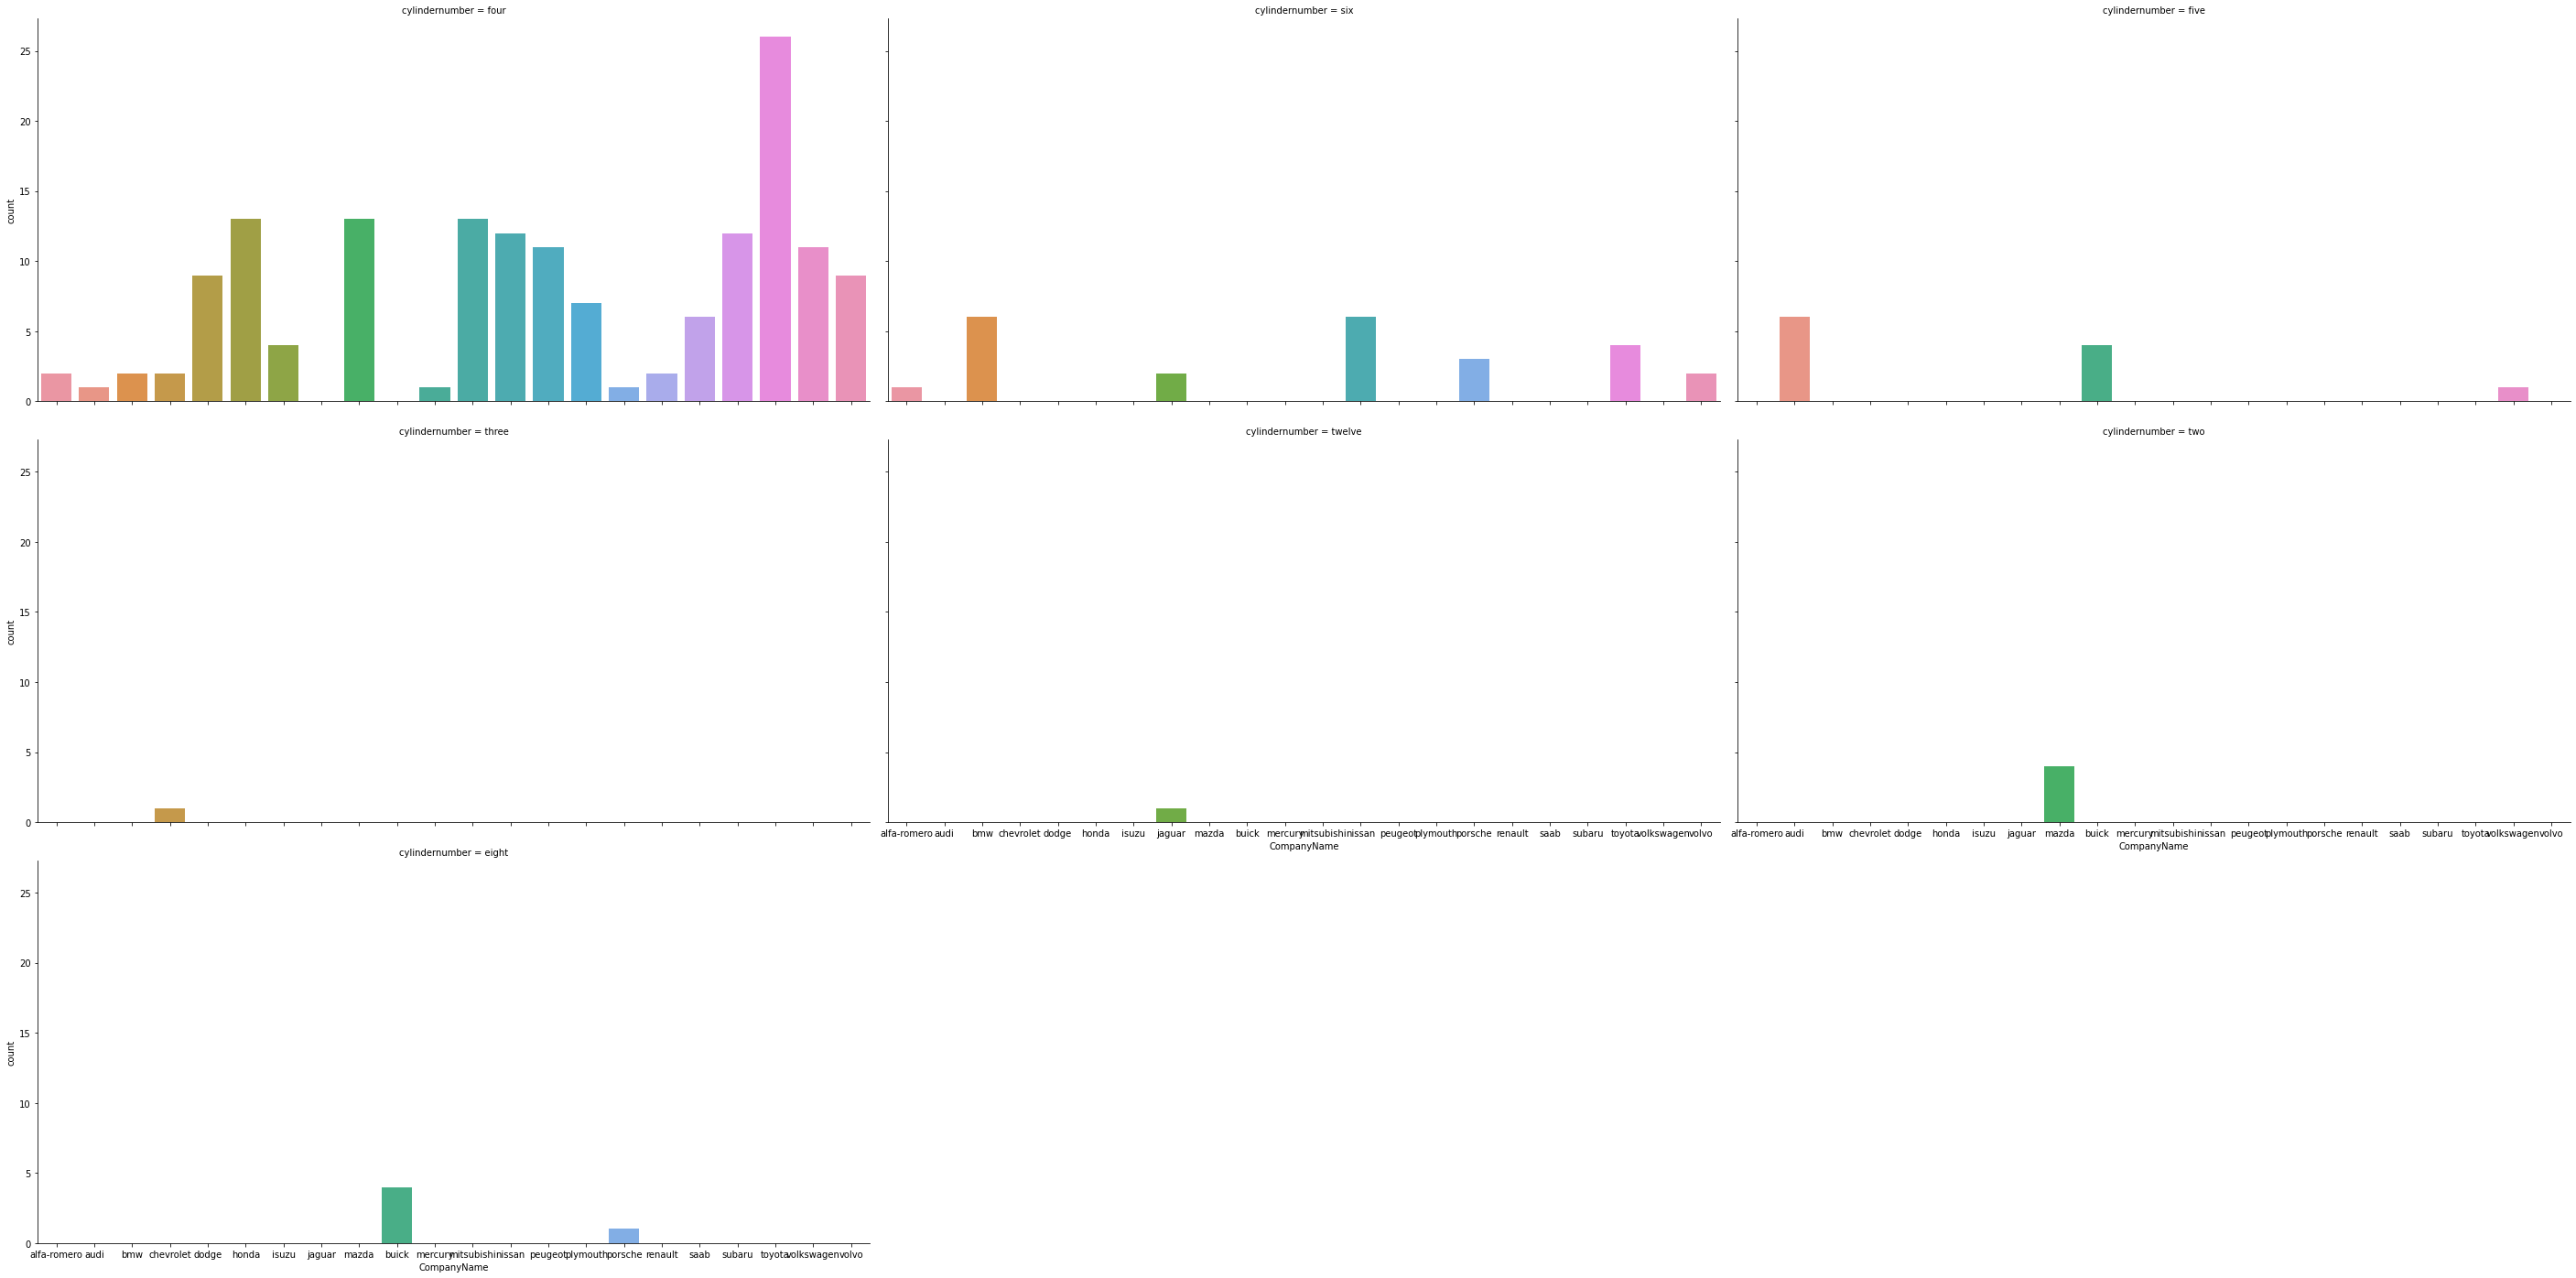

In [80]:
#Relationship between CompanyName and cylindernumber:
plt.figure(figsize=(25,25),dpi=120)
sns.catplot(x="CompanyName", col="cylindernumber", col_wrap=3, data=data,
                kind="count", height=6.5, aspect=2)

<Figure size 3000x3000 with 0 Axes>

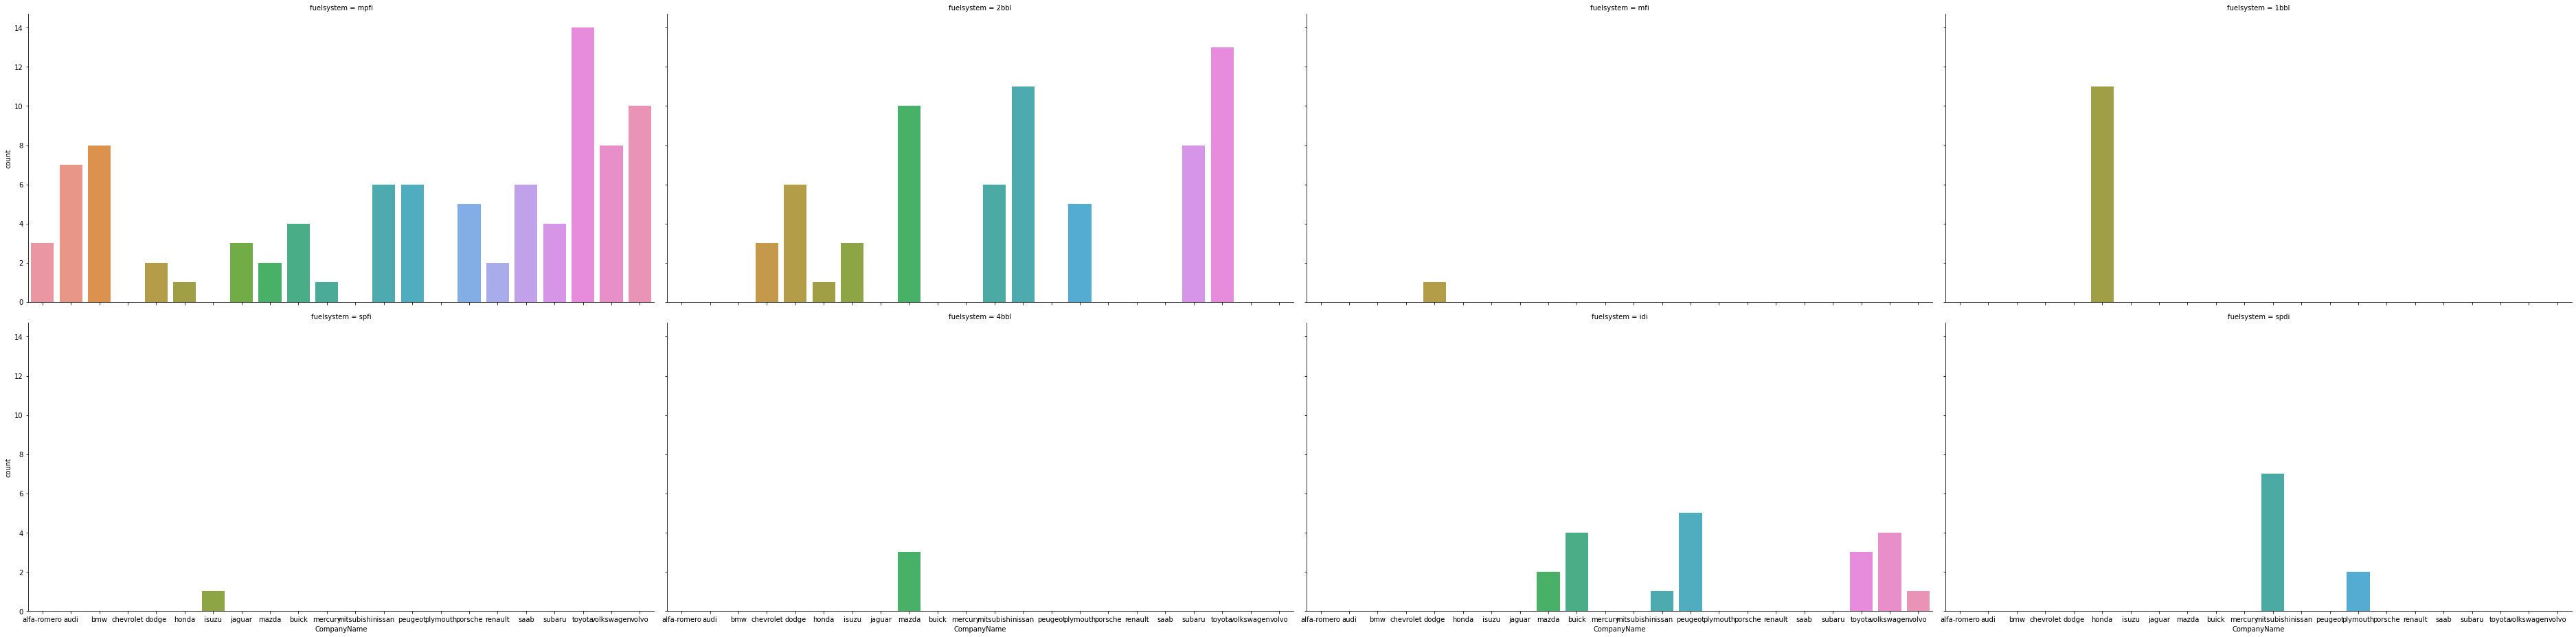

In [81]:
#Relationship between CompanyName and fuelsystem:
plt.figure(figsize=(25,25),dpi=120)
sns.catplot(x="CompanyName", col="fuelsystem", col_wrap=4, data=data,
                kind="count", height=6.5, aspect=2)

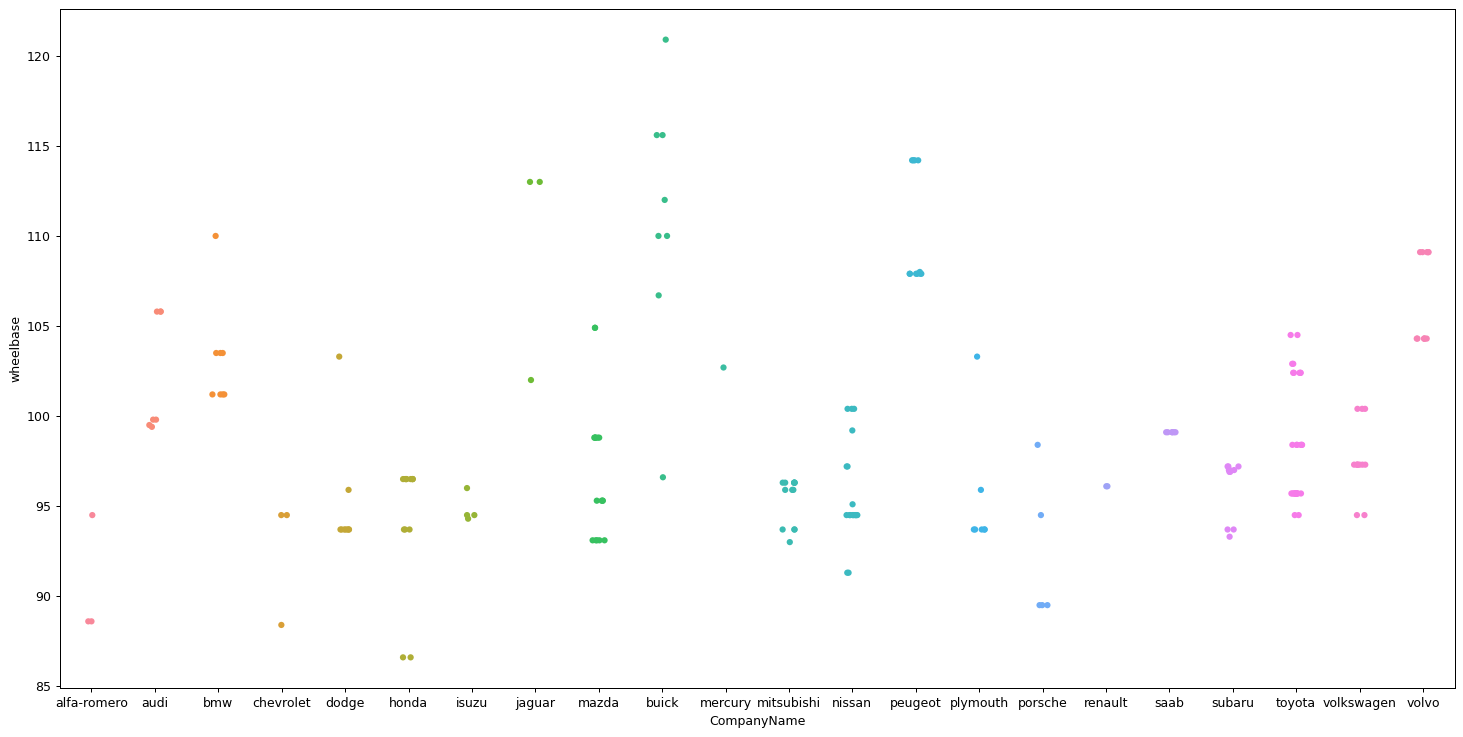

In [82]:
#Relationship between CompanyName and wheelbase:
plt.figure(figsize=(20,10),dpi=90)
ax = sns.stripplot(x="CompanyName", y="wheelbase",data=data,jitter=True)

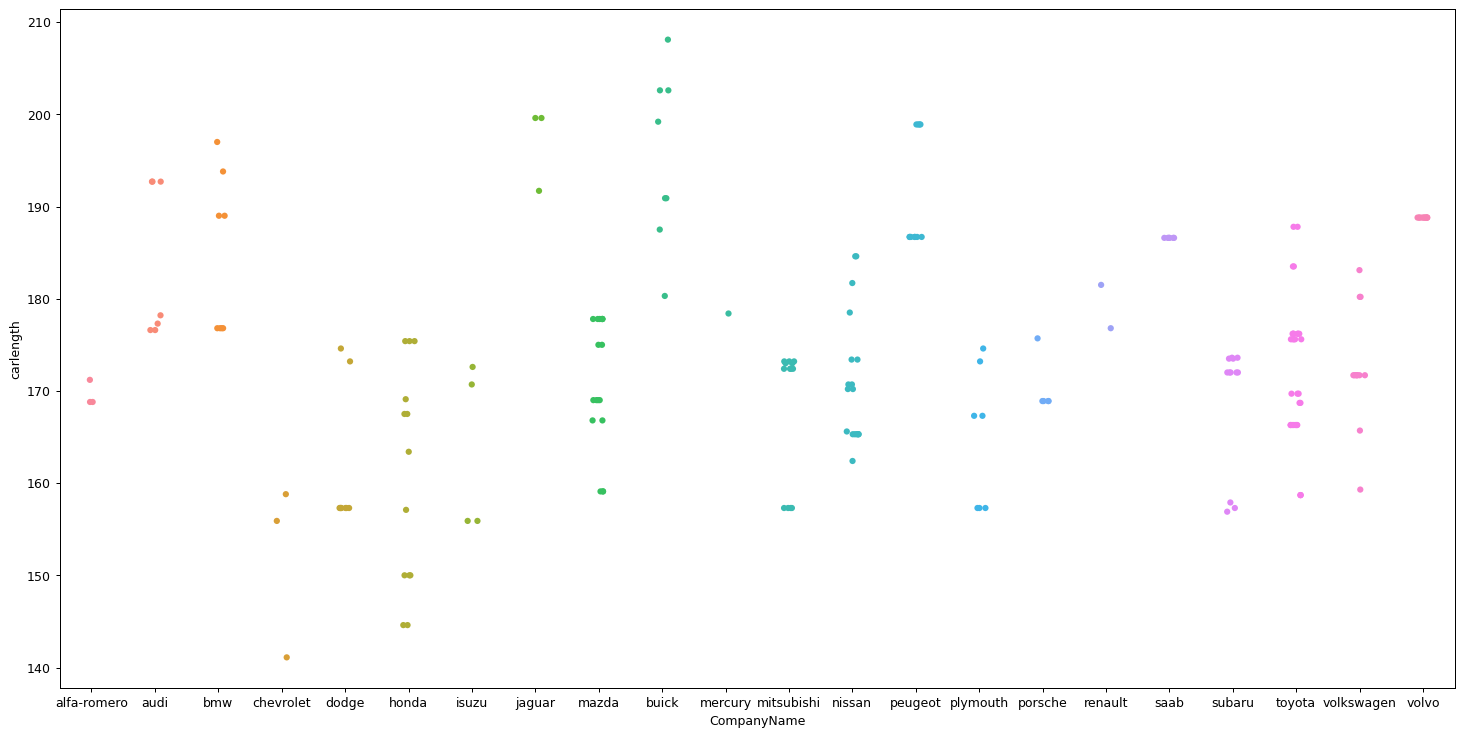

In [83]:
#Relationship between CompanyName and carlength:
plt.figure(figsize=(20,10),dpi=90)
ax = sns.stripplot(x="CompanyName", y="carlength",data=data,jitter=True)

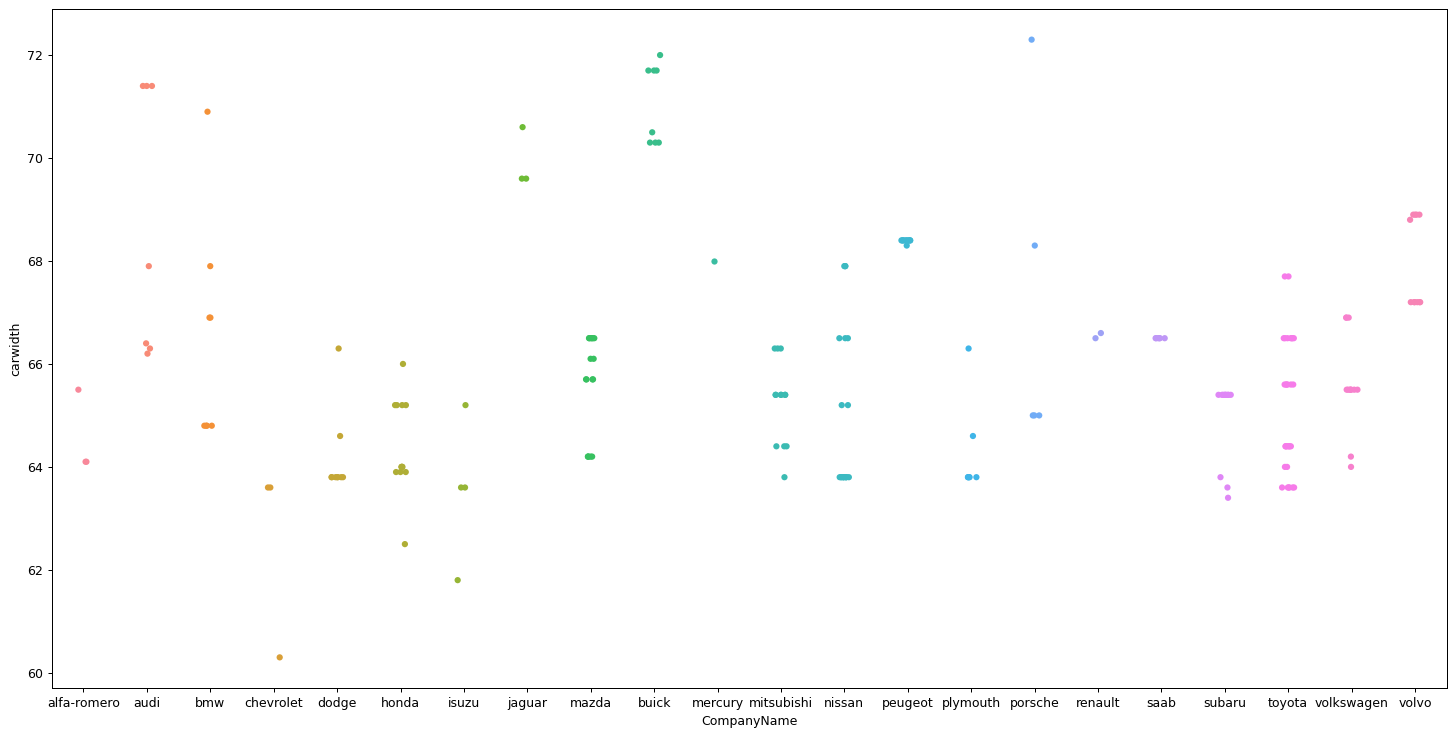

In [84]:
#Relationship between CompanyName and carwidth:
plt.figure(figsize=(20,10),dpi=90)
ax = sns.stripplot(x="CompanyName", y="carwidth",data=data,jitter=True)

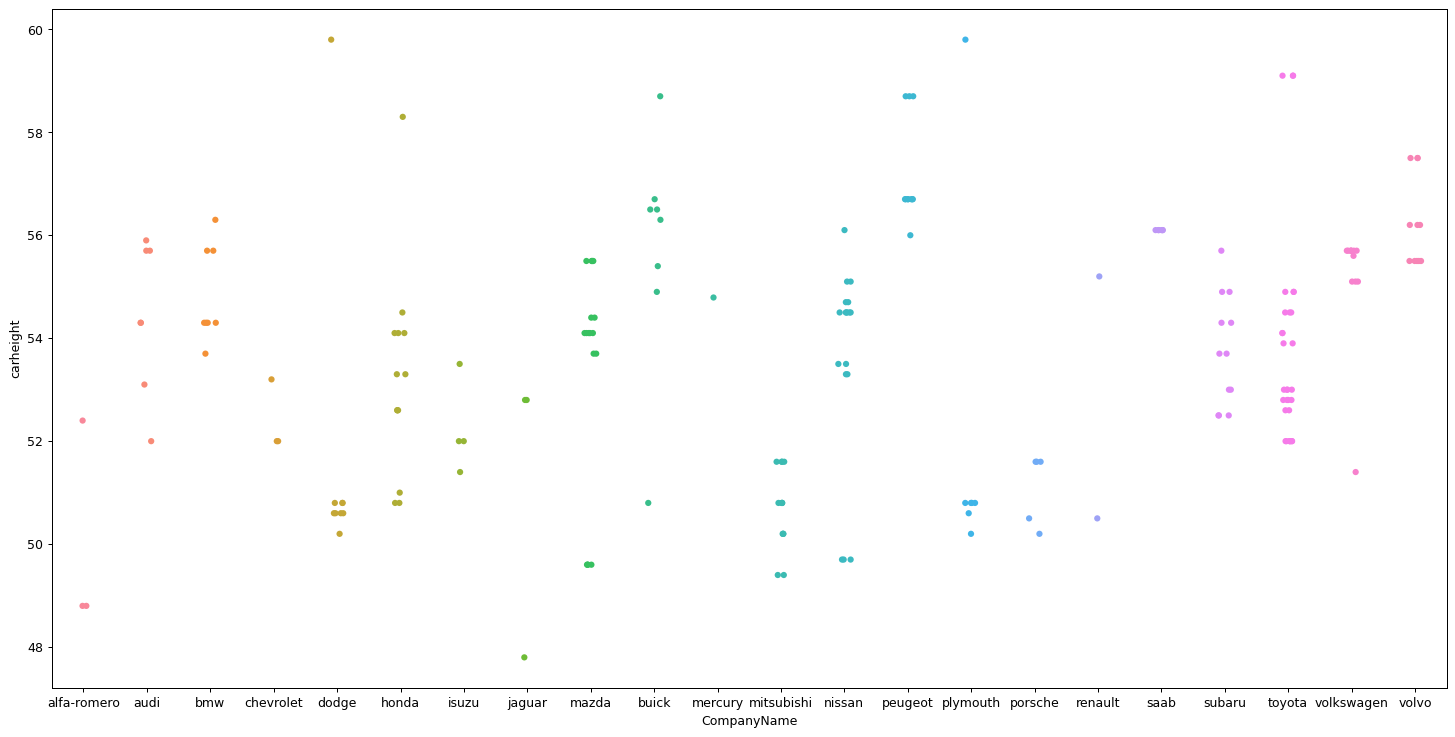

In [85]:
#Relationship between CompanyName and carheight:
plt.figure(figsize=(20,10),dpi=90)
ax = sns.stripplot(x="CompanyName", y="carheight",data=data,jitter=True)

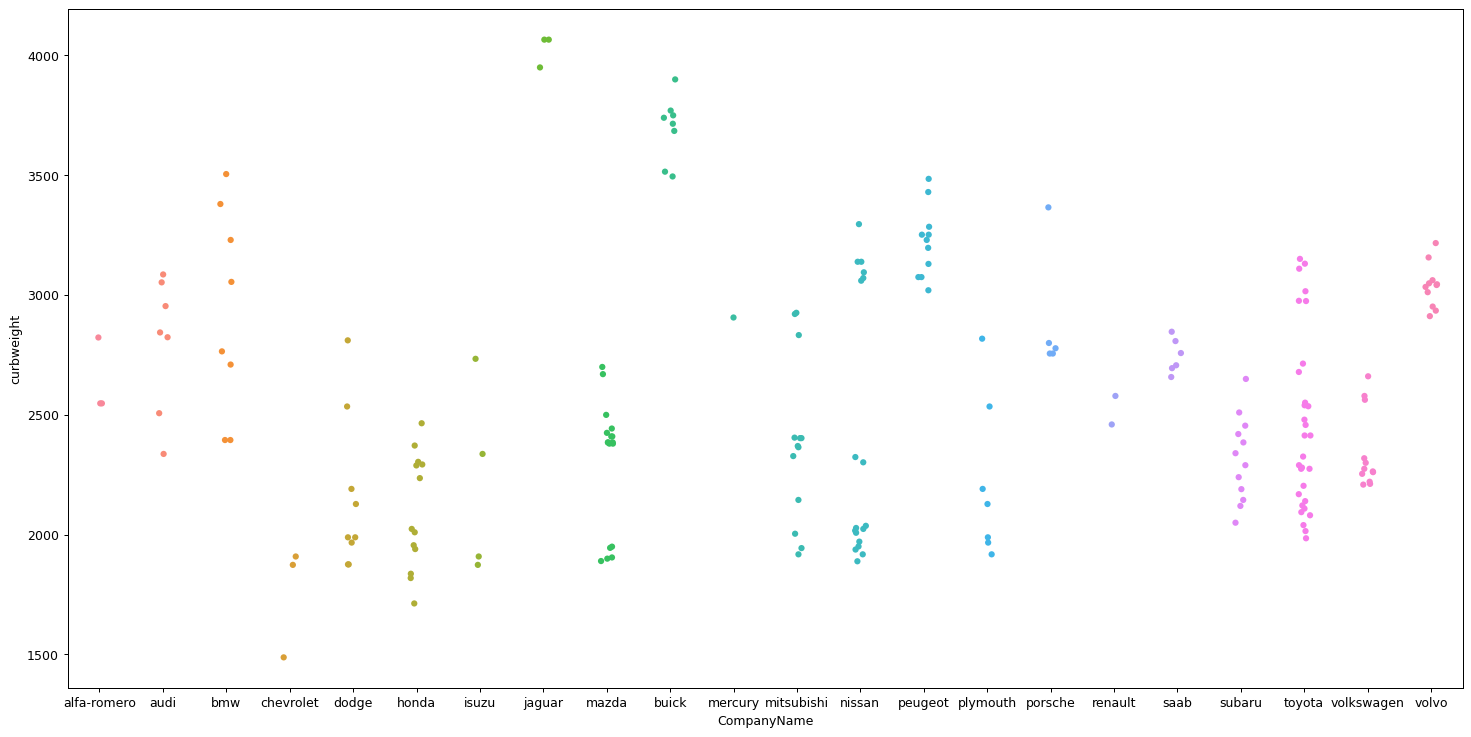

In [86]:
#Relationship between CompanyName and curbweight:
plt.figure(figsize=(20,10),dpi=90)
ax = sns.stripplot(x="CompanyName", y="curbweight",data=data,jitter=True)

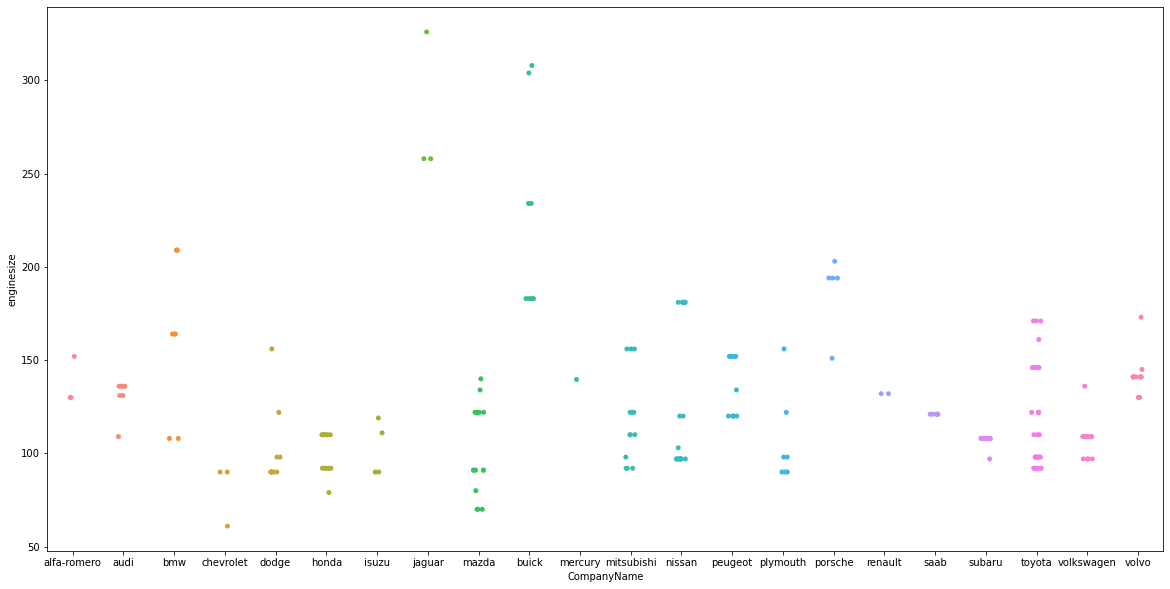

In [87]:
#Relationship between CompanyName and enginesize:
plt.figure(figsize=(20,10))
ax = sns.stripplot(x="CompanyName", y="enginesize",data=data,jitter=True)

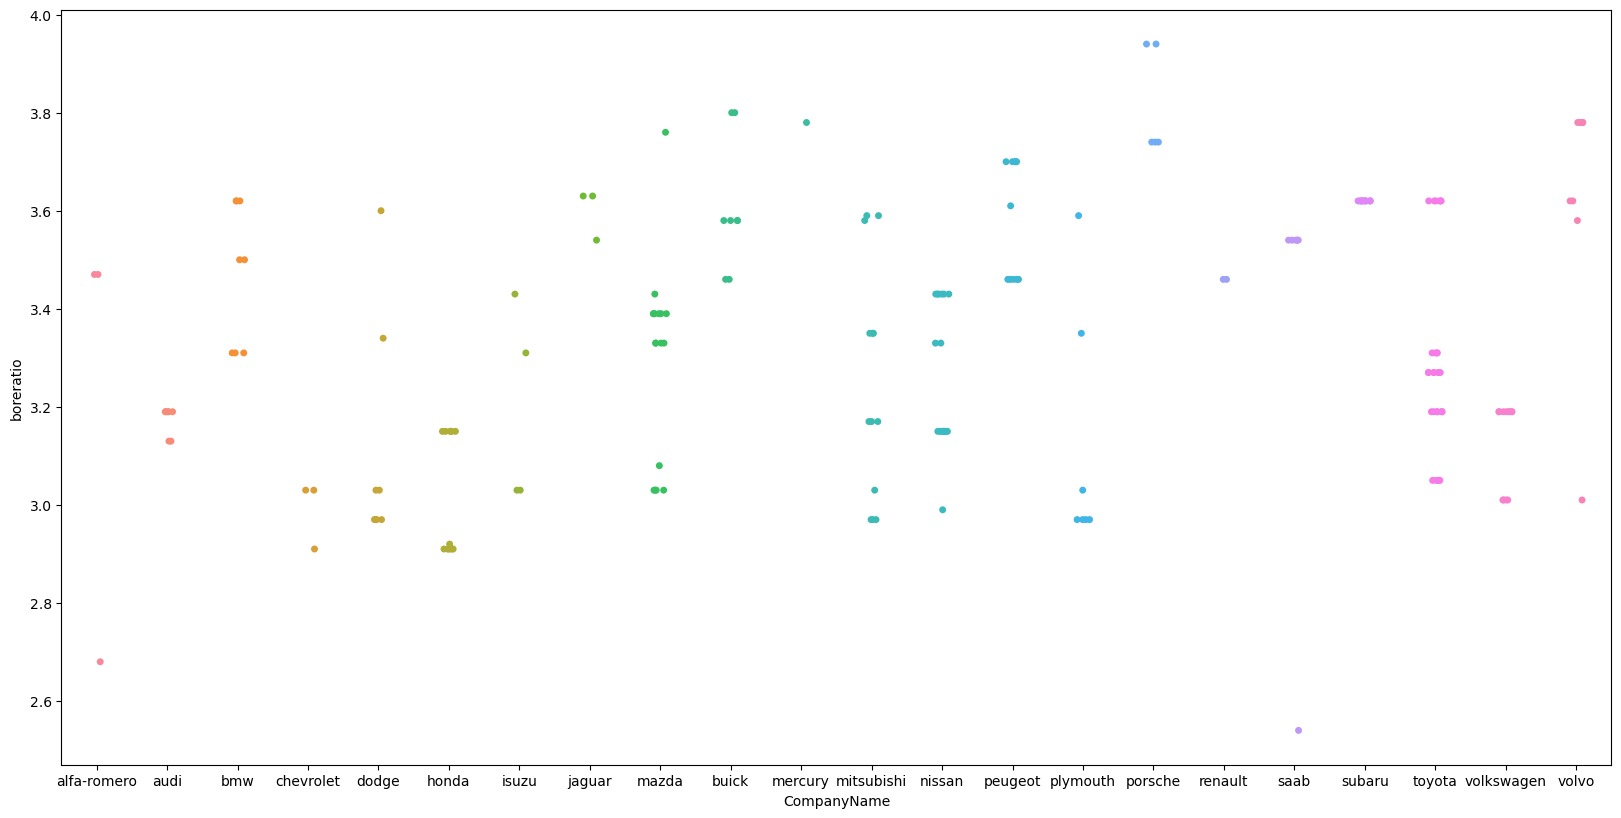

In [88]:
#Relationship between CompanyName and boreratio:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="CompanyName", y="boreratio",data=data,jitter=True)

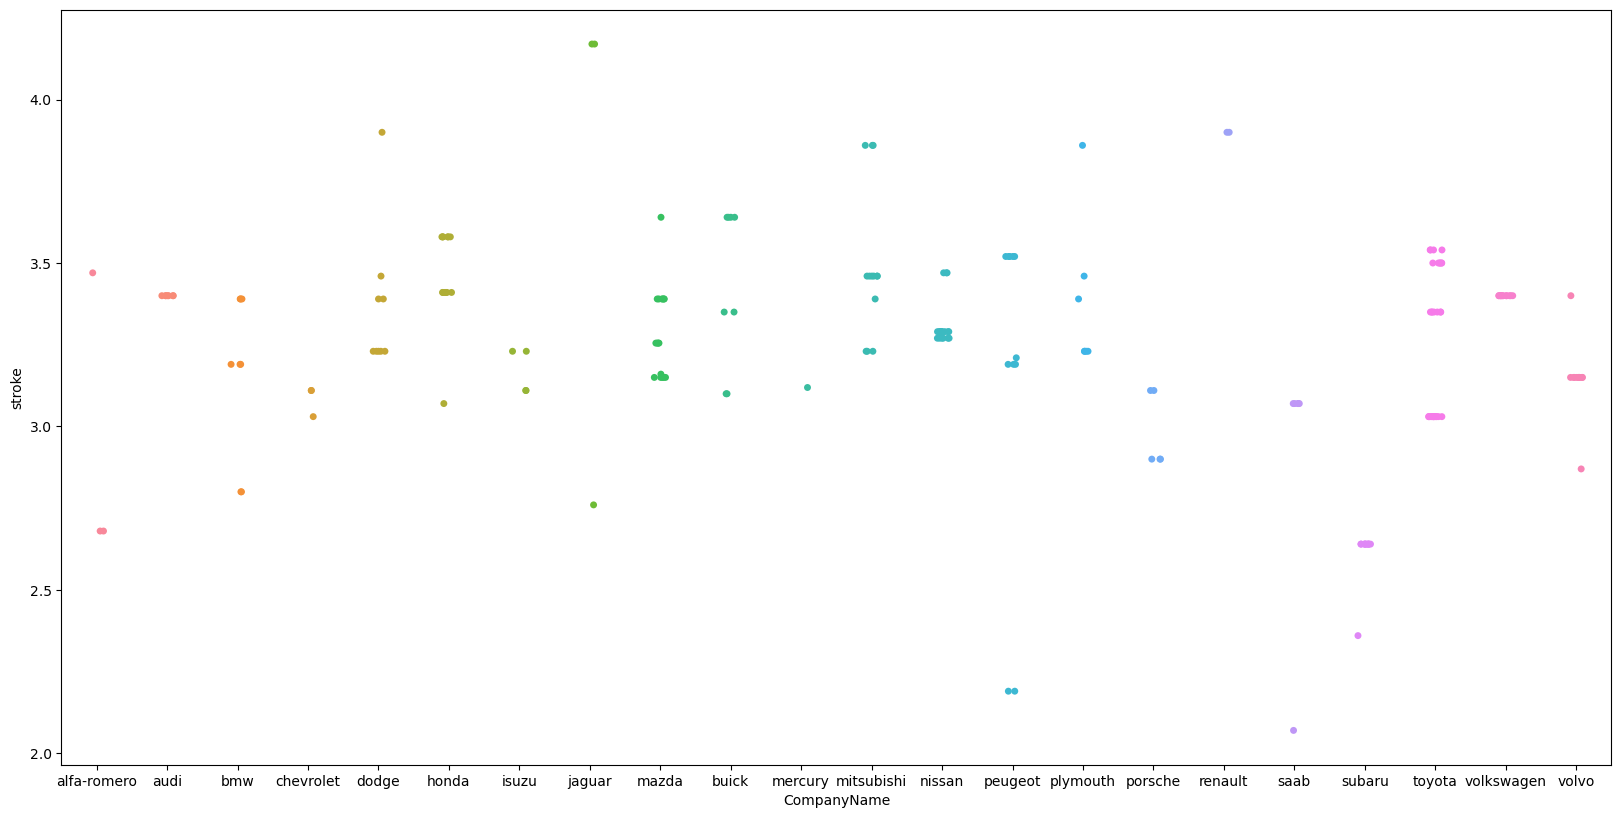

In [89]:
#Relationship between CompanyName and stroke:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="CompanyName", y="stroke",data=data,jitter=True)

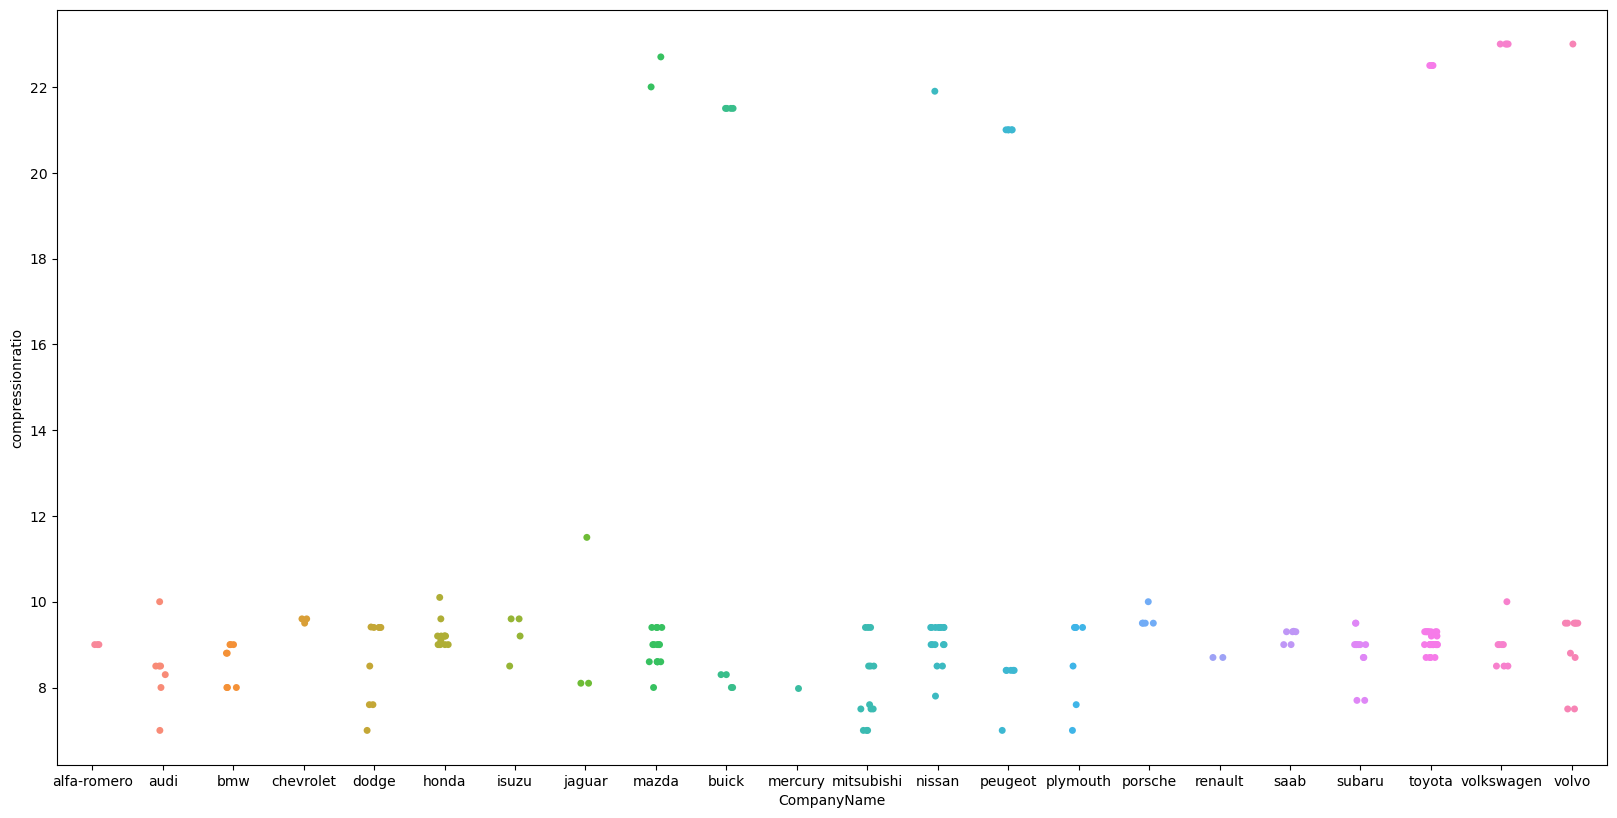

In [90]:
#Relationship between CompanyName and compressionratio:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="CompanyName", y="compressionratio",data=data,jitter=True)

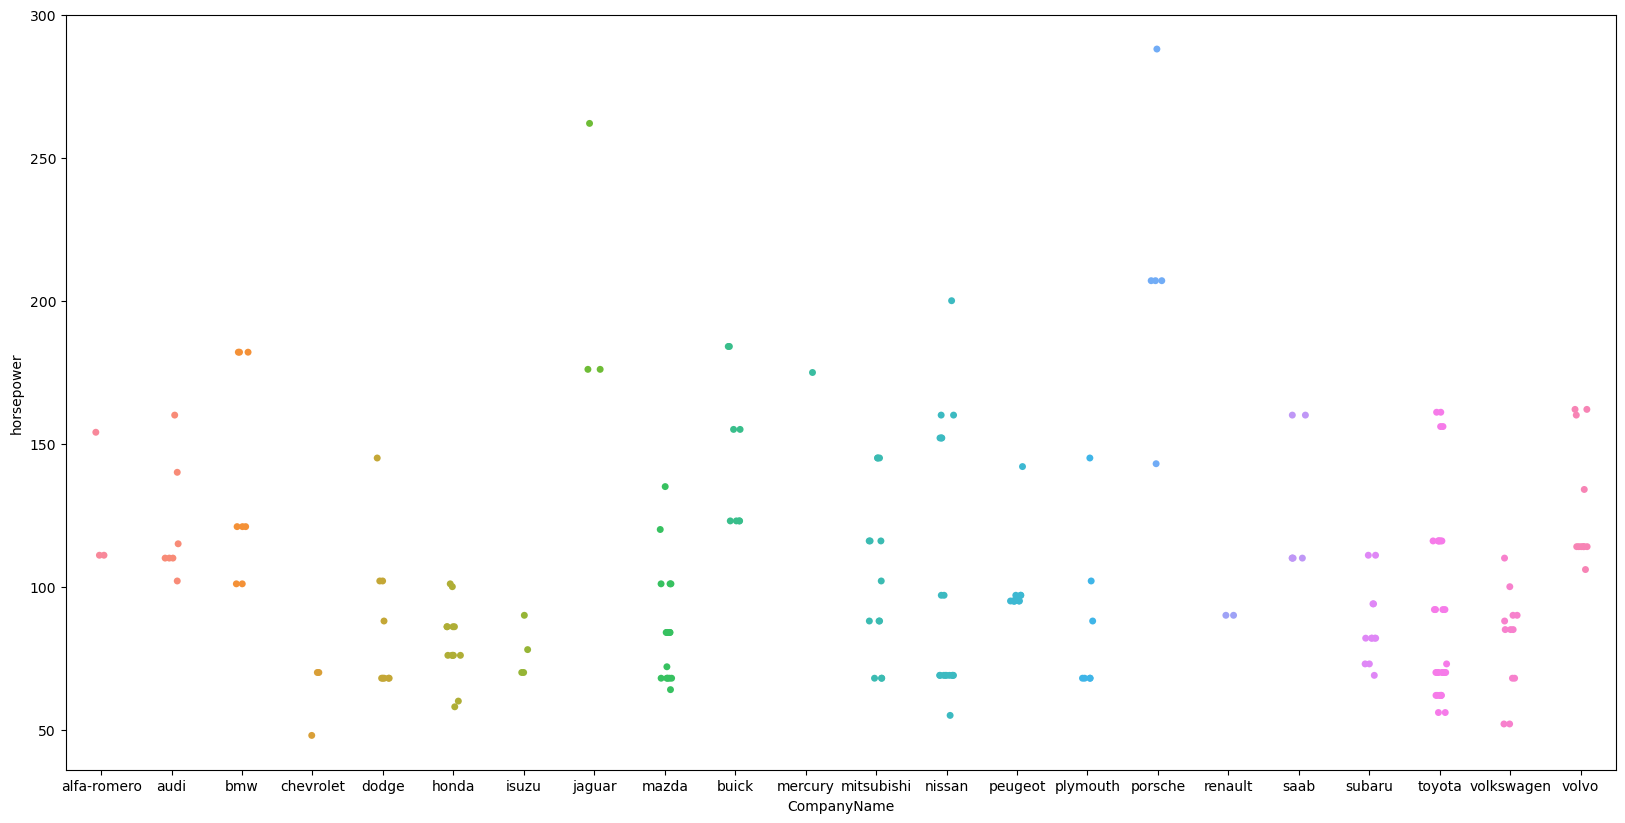

In [91]:
#Relationship between CompanyName and horsepower:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="CompanyName", y="horsepower",data=data,jitter=True)

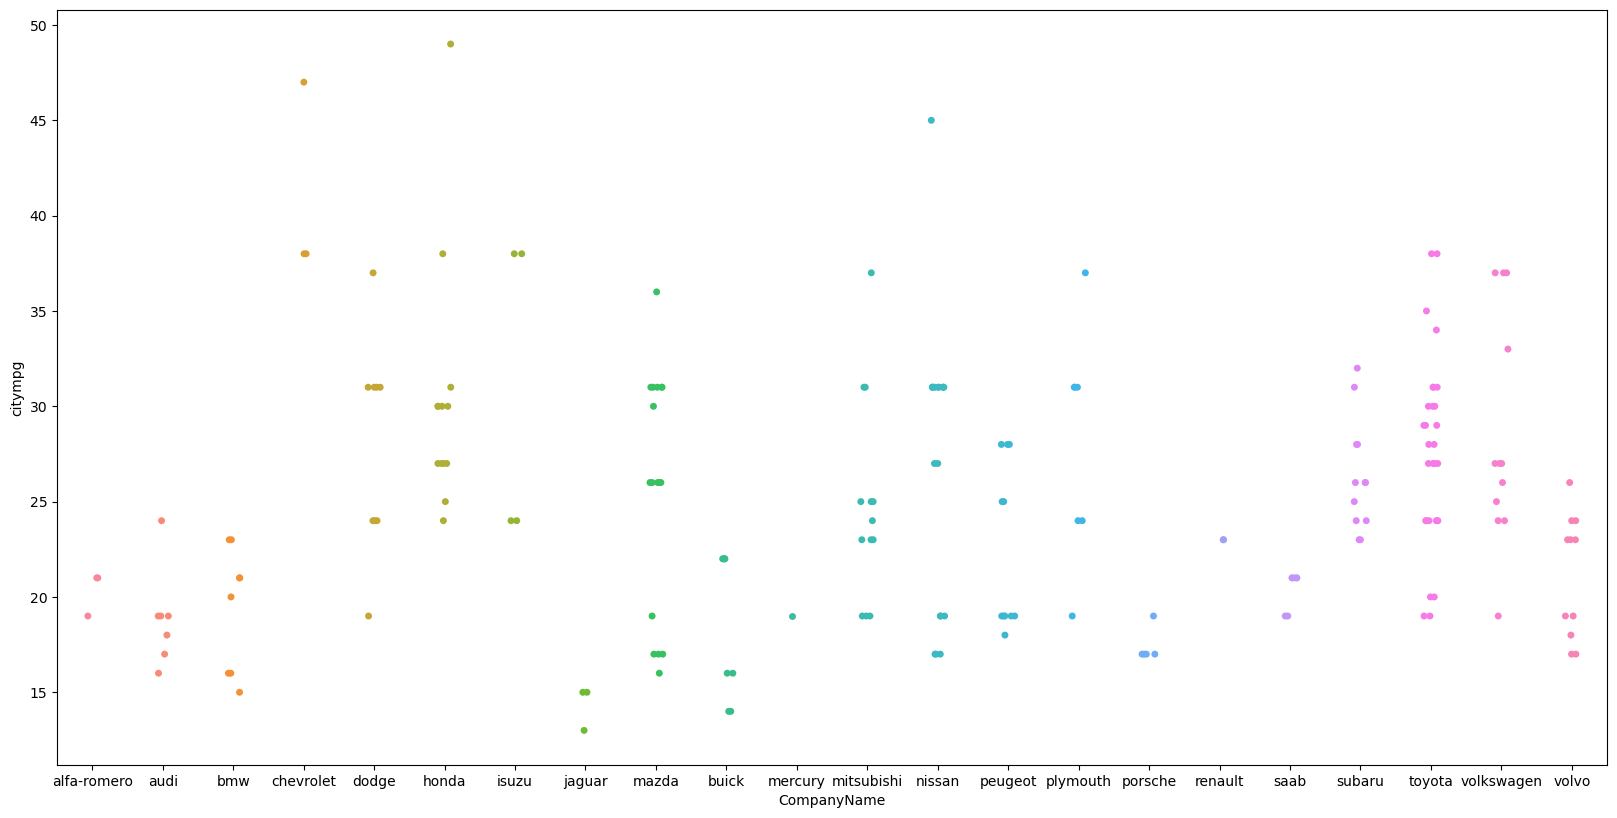

In [92]:
#Relationship between CompanyName and citympg:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="CompanyName", y="citympg",data=data,jitter=True)

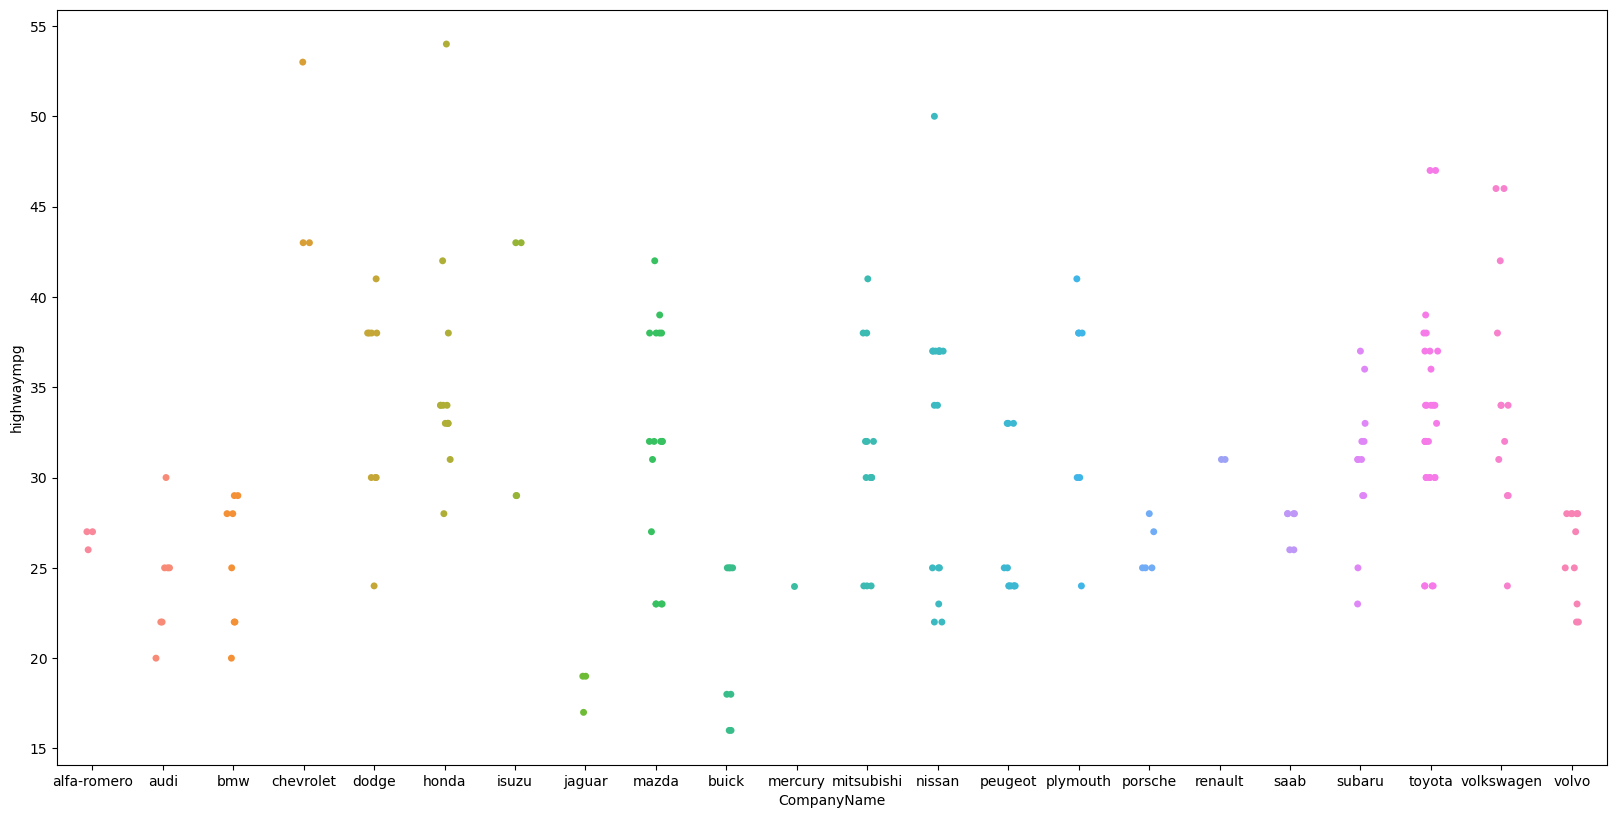

In [93]:
#Relationship between CompanyName and highwaympg:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="CompanyName", y="highwaympg",data=data,jitter=True)

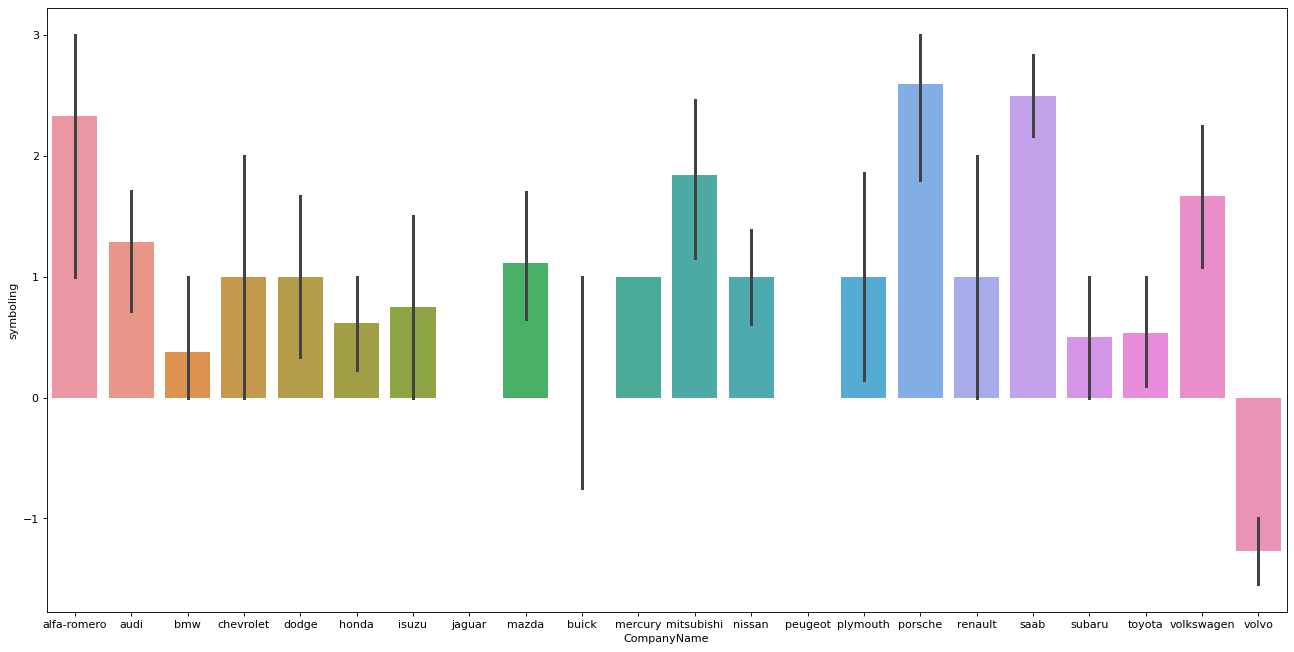

In [94]:
#Relationship between CompanyName and symboling:
plt.figure(figsize=(20,10),dpi=80)
ax = sns.barplot(x="CompanyName", y="symboling", data=data)

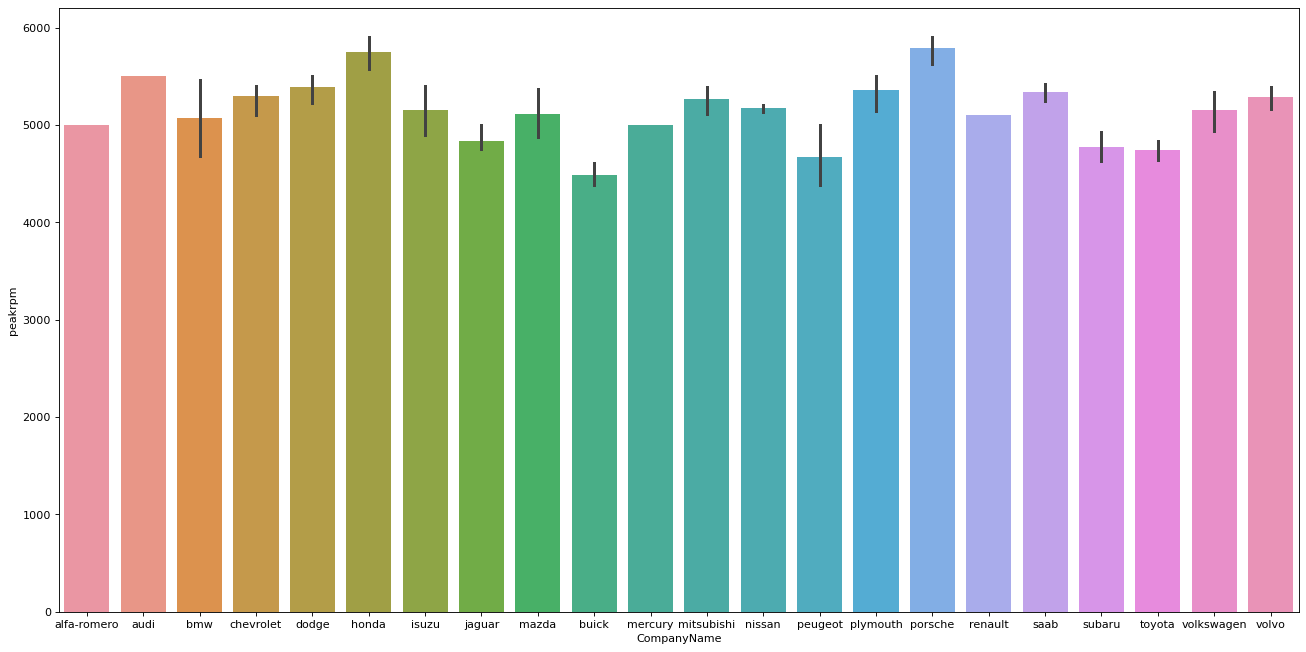

In [95]:
#Relationship between CompanyName and peakrpm:
plt.figure(figsize=(20,10),dpi=80)
ax = sns.barplot(x="CompanyName", y="peakrpm", data=data)

<Figure size 1800x1800 with 0 Axes>

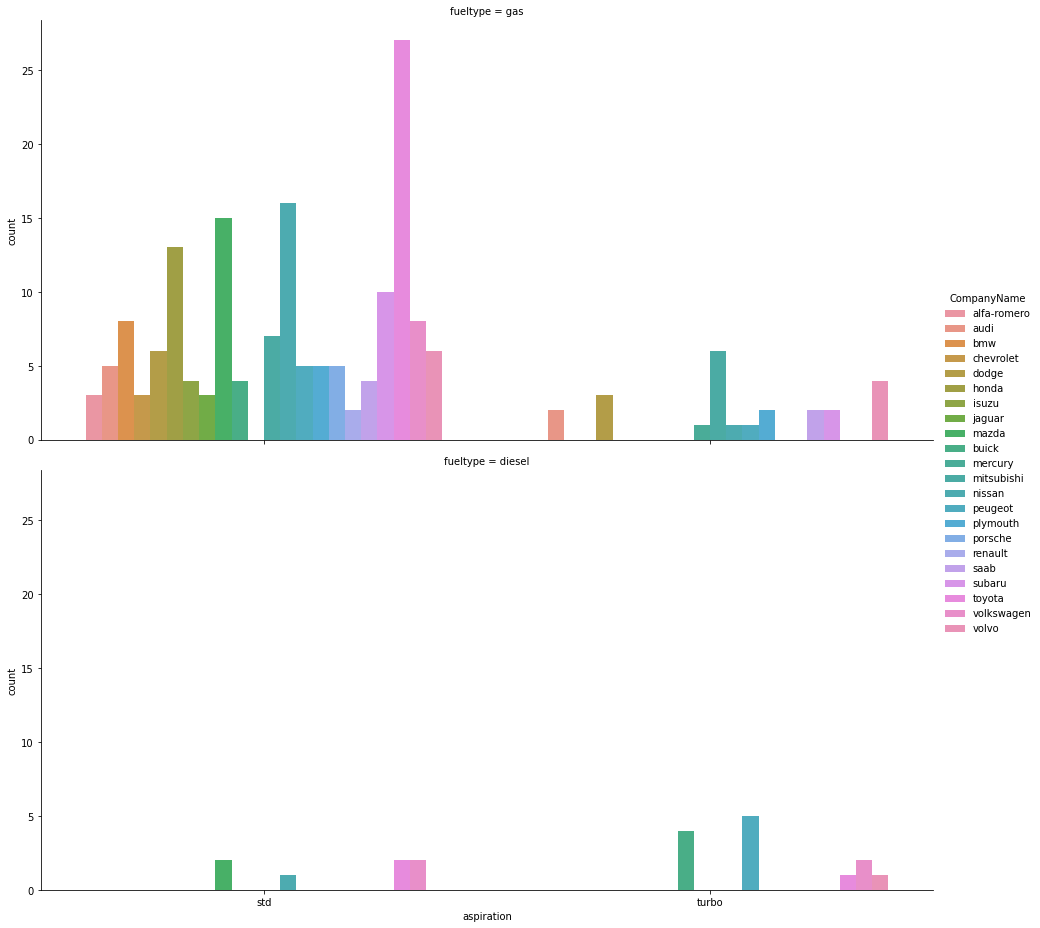

In [96]:
#Relationship between Fueltype ans aspiration
plt.figure(figsize=(15,15),dpi=120)
sns.catplot(x="aspiration", col="fueltype", col_wrap=1, data=data,
                kind="count", height=6.5, aspect=2,hue="CompanyName")

<Figure size 1080x1080 with 0 Axes>

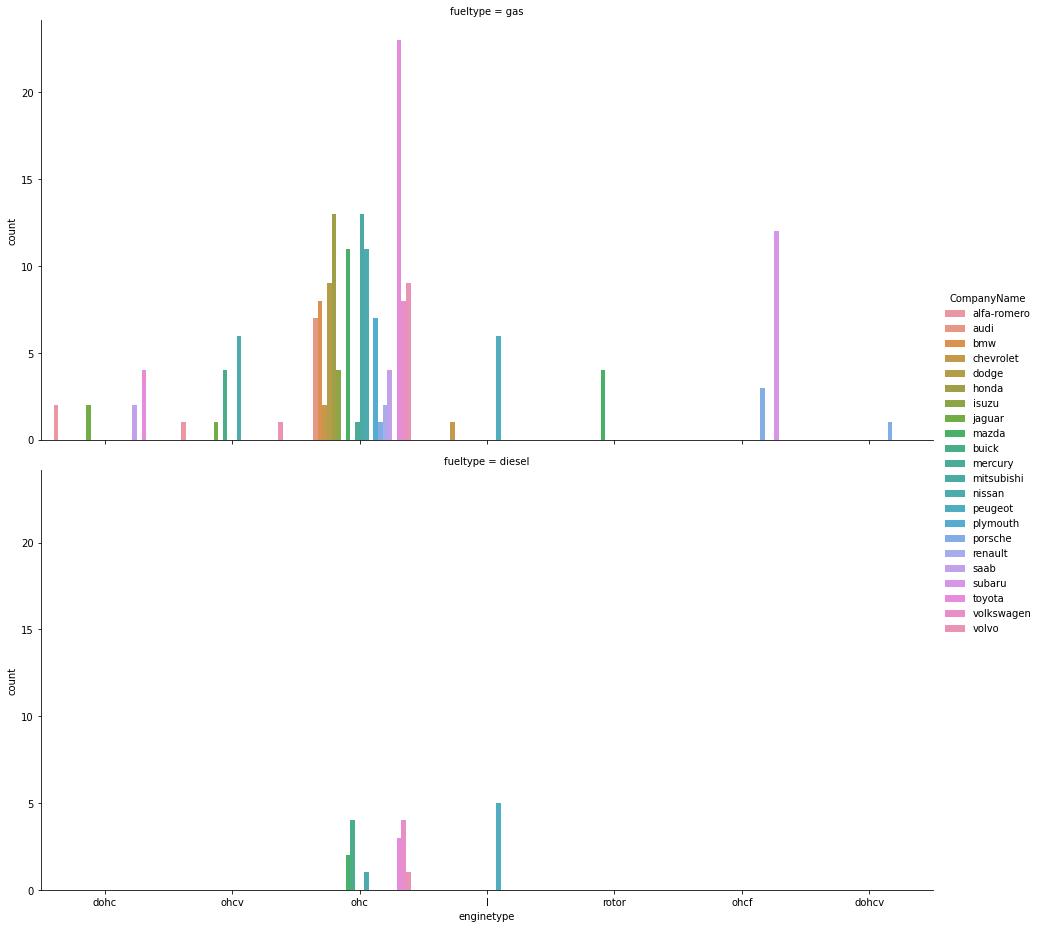

In [97]:
#Relationship between Fueltype ans enginetype:
plt.figure(figsize=(15,15))
sns.catplot(x="enginetype", col="fueltype", col_wrap=1, data=data,
                kind="count", height=6.5, aspect=2,hue="CompanyName")

<Figure size 1800x1800 with 0 Axes>

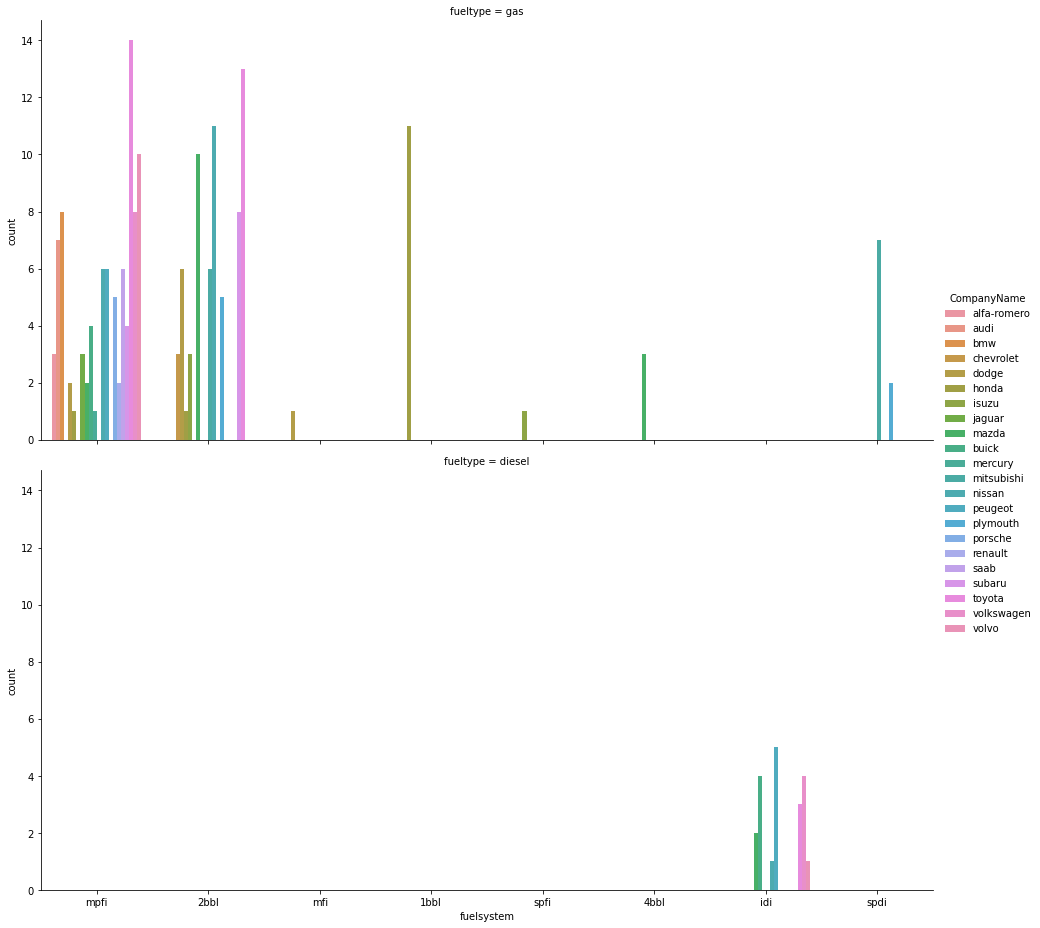

In [98]:
#Relationship between Fueltype ans fuelsystem:
plt.figure(figsize=(15,15),dpi=120)
sns.catplot(x="fuelsystem", col="fueltype", col_wrap=1, data=data,
                kind="count", height=6.5, aspect=2,hue="CompanyName")

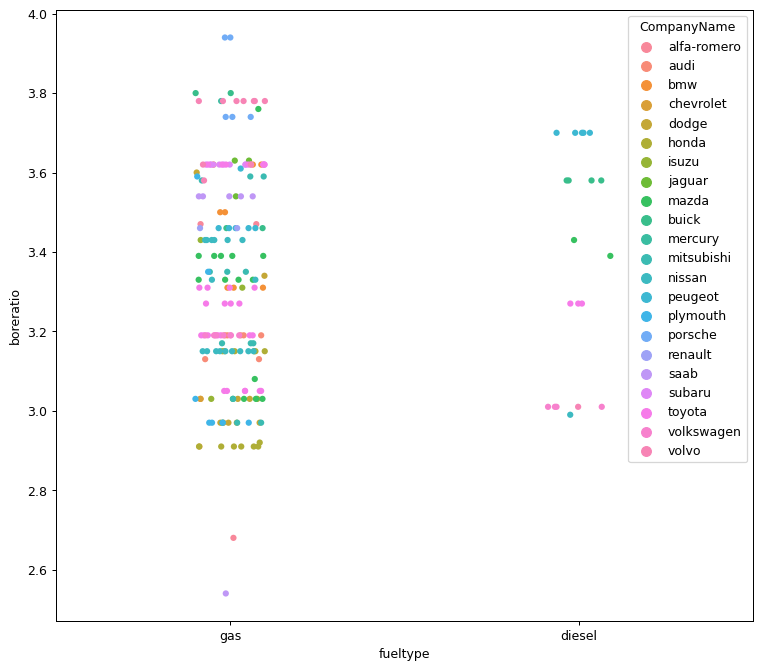

In [99]:
#Relationship between Fueltype and boreratio:
plt.figure(figsize=(10,9),dpi=90)
ax = sns.stripplot(x="fueltype", y="boreratio",data=data,hue="CompanyName",jitter=True)

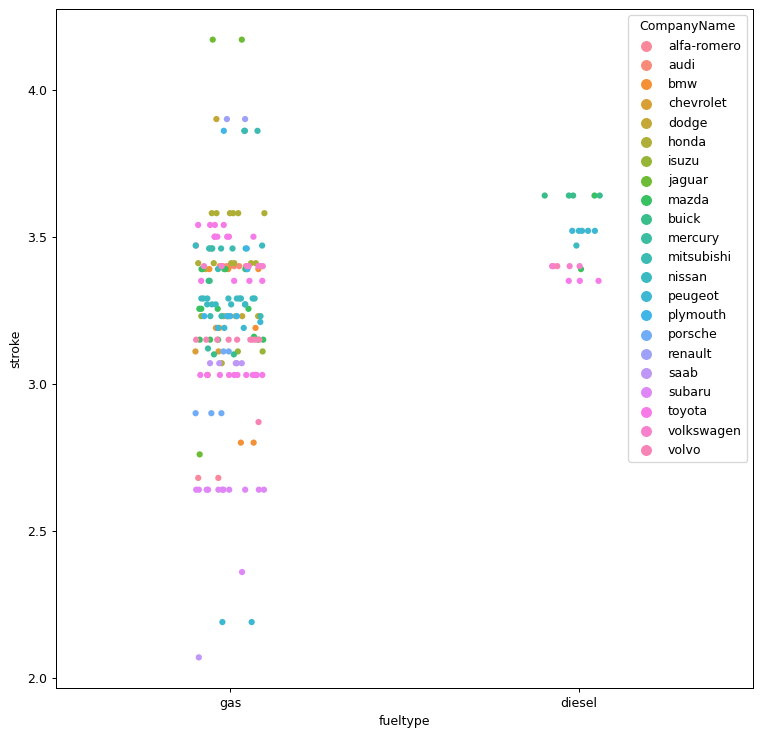

In [100]:
#Relationship between Fueltype and stroke:
plt.figure(figsize=(10,10),dpi=90)
ax = sns.stripplot(x="fueltype", y="stroke",data=data,hue="CompanyName",jitter=True)

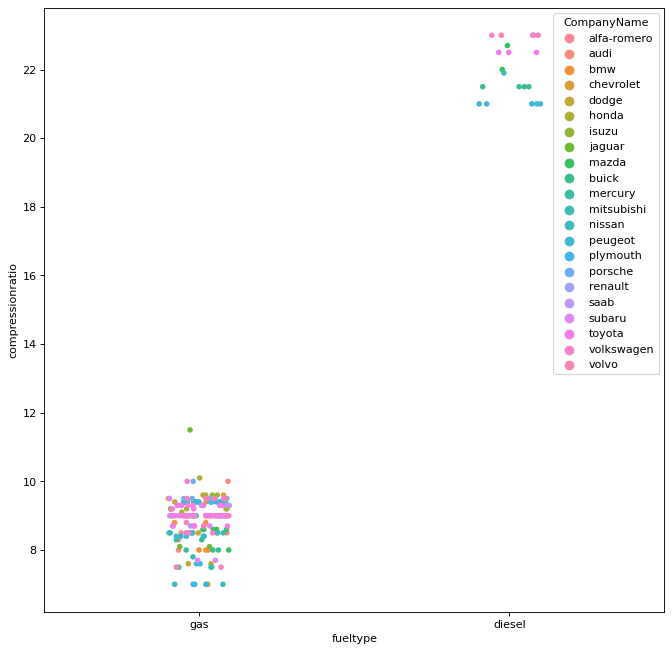

In [101]:
#Relationship between Fueltype and compressionratio:
plt.figure(figsize=(10,10),dpi=80)
ax = sns.stripplot(x="fueltype", y="compressionratio",data=data,hue="CompanyName",jitter=True)

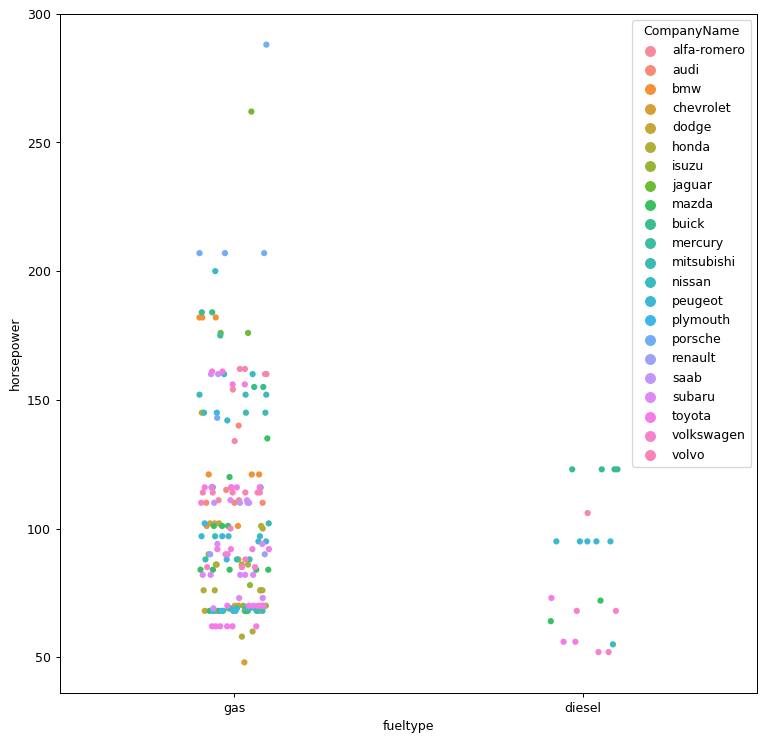

In [102]:
#Relationship between Fueltype and horsepower:
plt.figure(figsize=(10,10),dpi=90)
ax = sns.stripplot(x="fueltype", y="horsepower",data=data,hue="CompanyName",jitter=True)

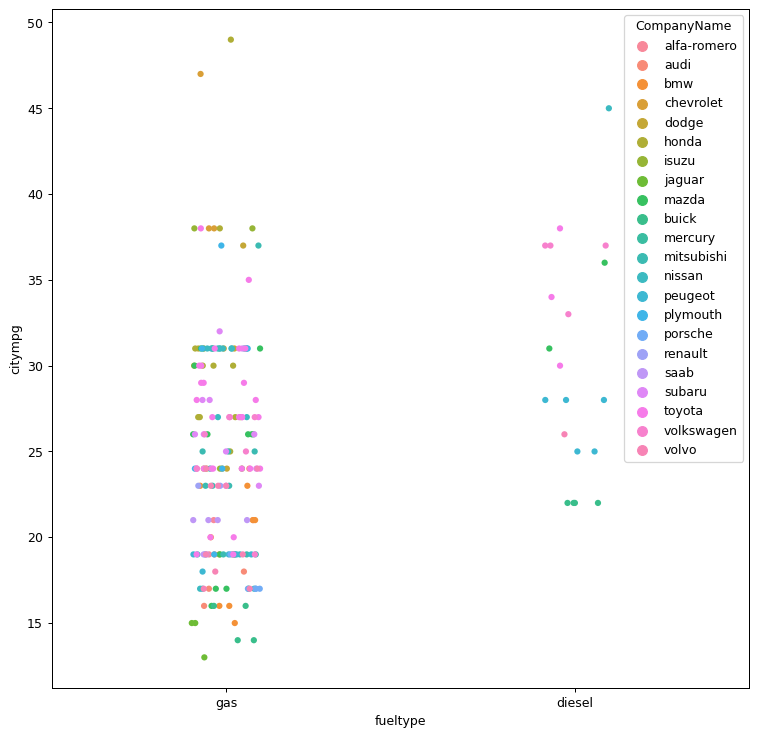

In [103]:
#Relationship between Fueltype and citympg:
plt.figure(figsize=(10,10),dpi=90)
ax = sns.stripplot(x="fueltype", y="citympg",data=data,hue="CompanyName",jitter=True)

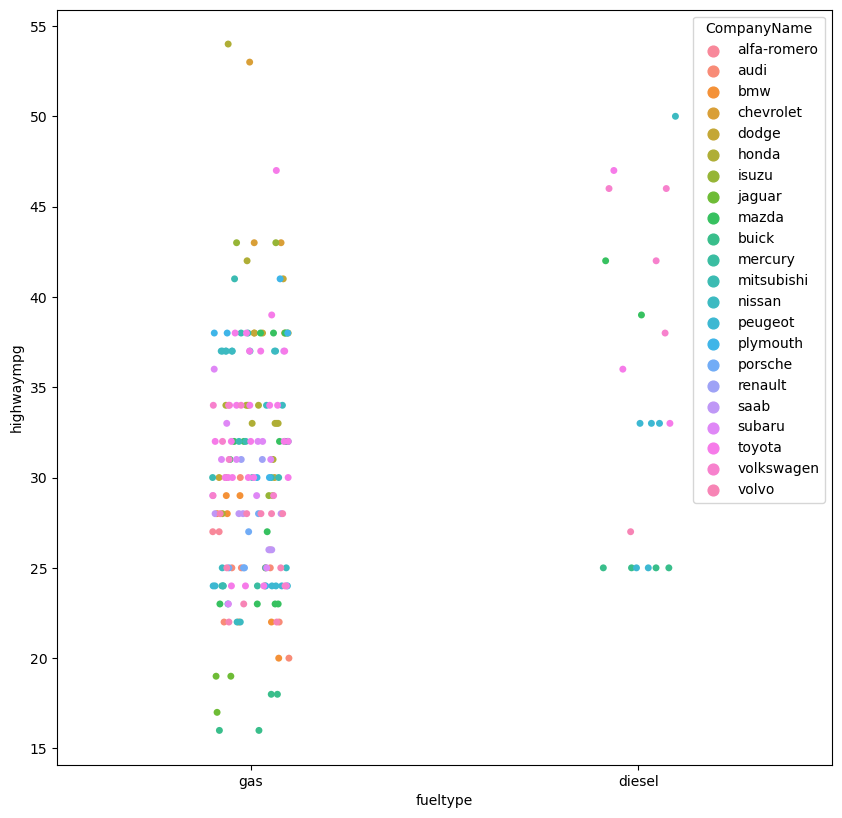

In [104]:
#Relationship between Fueltype and highwaympg:
plt.figure(figsize=(10,10),dpi=100)
ax = sns.stripplot(x="fueltype", y="highwaympg",data=data,hue="CompanyName",jitter=True)

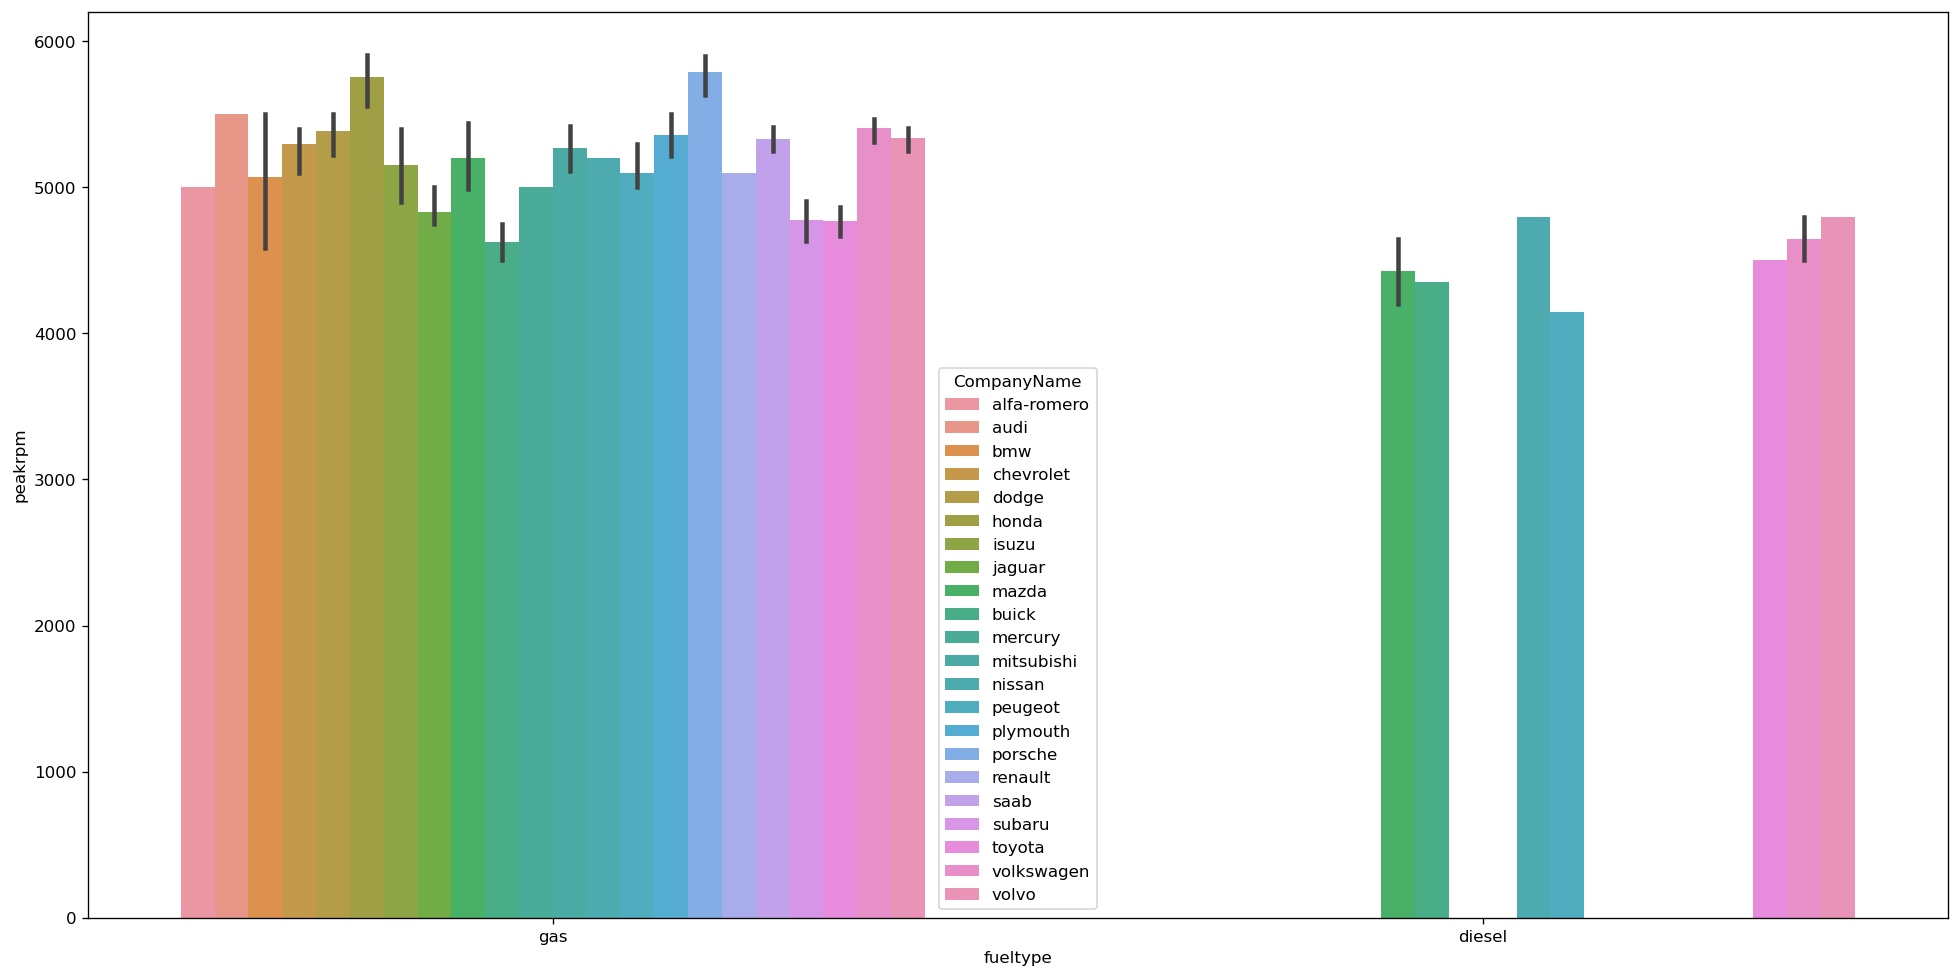

In [105]:
#Relationship between Fueltype and peakrpm:
plt.figure(figsize=(20,10),dpi=120)
ax = sns.barplot(x="fueltype", y="peakrpm",hue="CompanyName", data=data)

<Figure size 1800x1800 with 0 Axes>

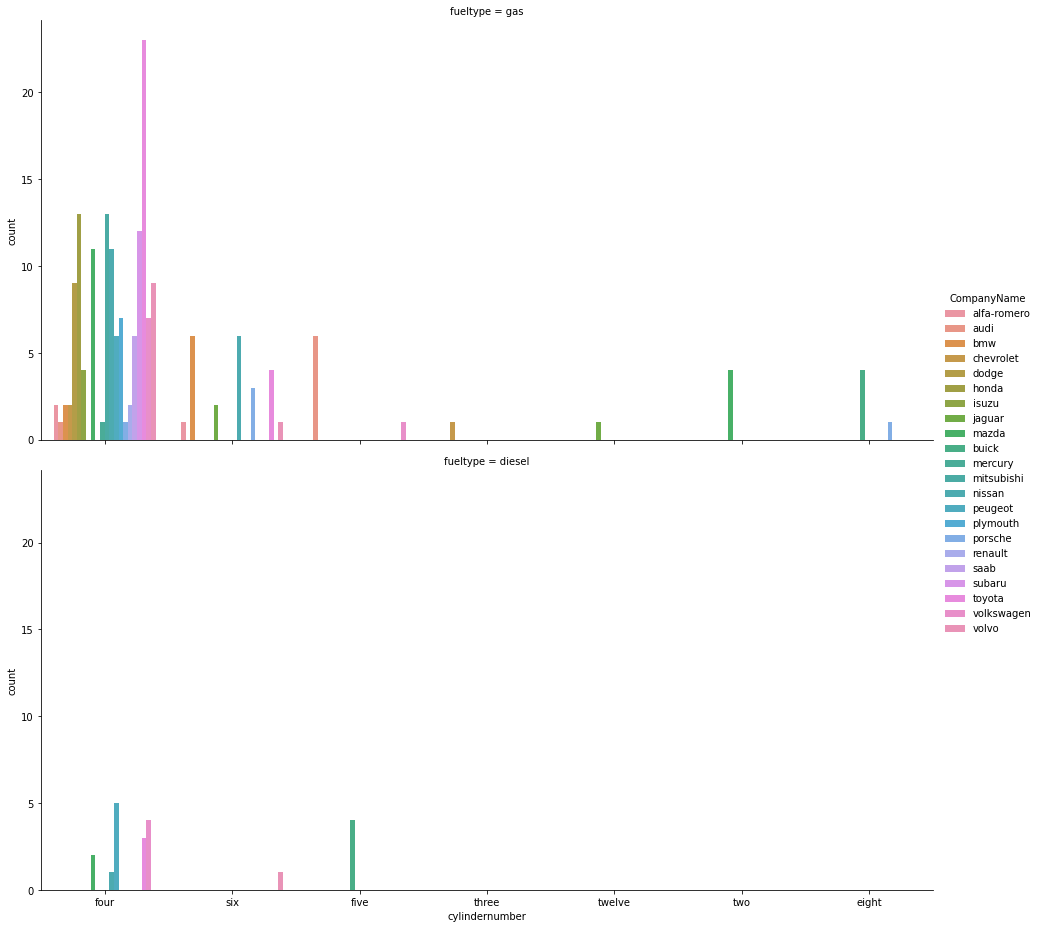

In [106]:
#Relationship between Fueltype ans cylindernumber:
plt.figure(figsize=(15,15),dpi=120)
sns.catplot(x="cylindernumber", col="fueltype", col_wrap=1, data=data,
                kind="count", height=6.5, aspect=2,hue="CompanyName")

<Figure size 1800x1800 with 0 Axes>

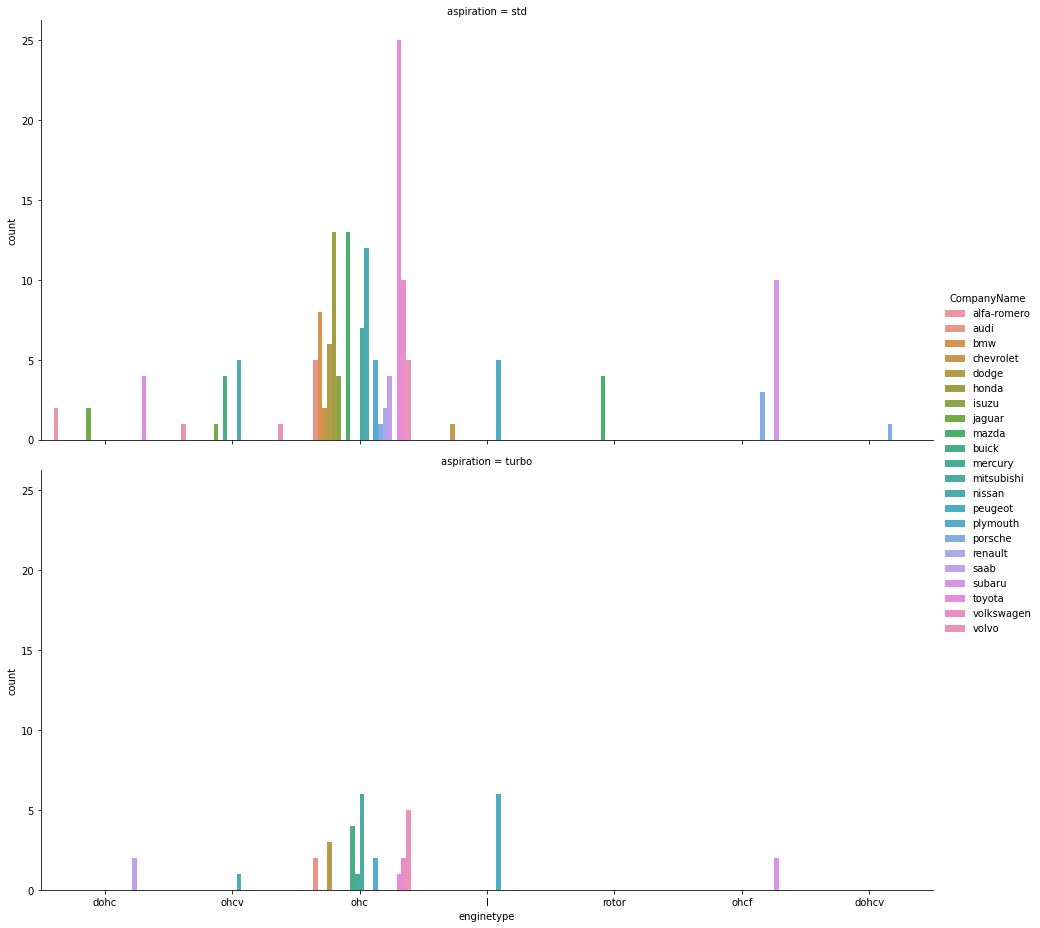

In [107]:
#Relationship between aspiration and enginetype:
plt.figure(figsize=(15,15),dpi=120)
sns.catplot(x="enginetype", col="aspiration", col_wrap=1, data=data,
                kind="count", height=6.5, aspect=2,hue="CompanyName")

<Figure size 1800x1800 with 0 Axes>

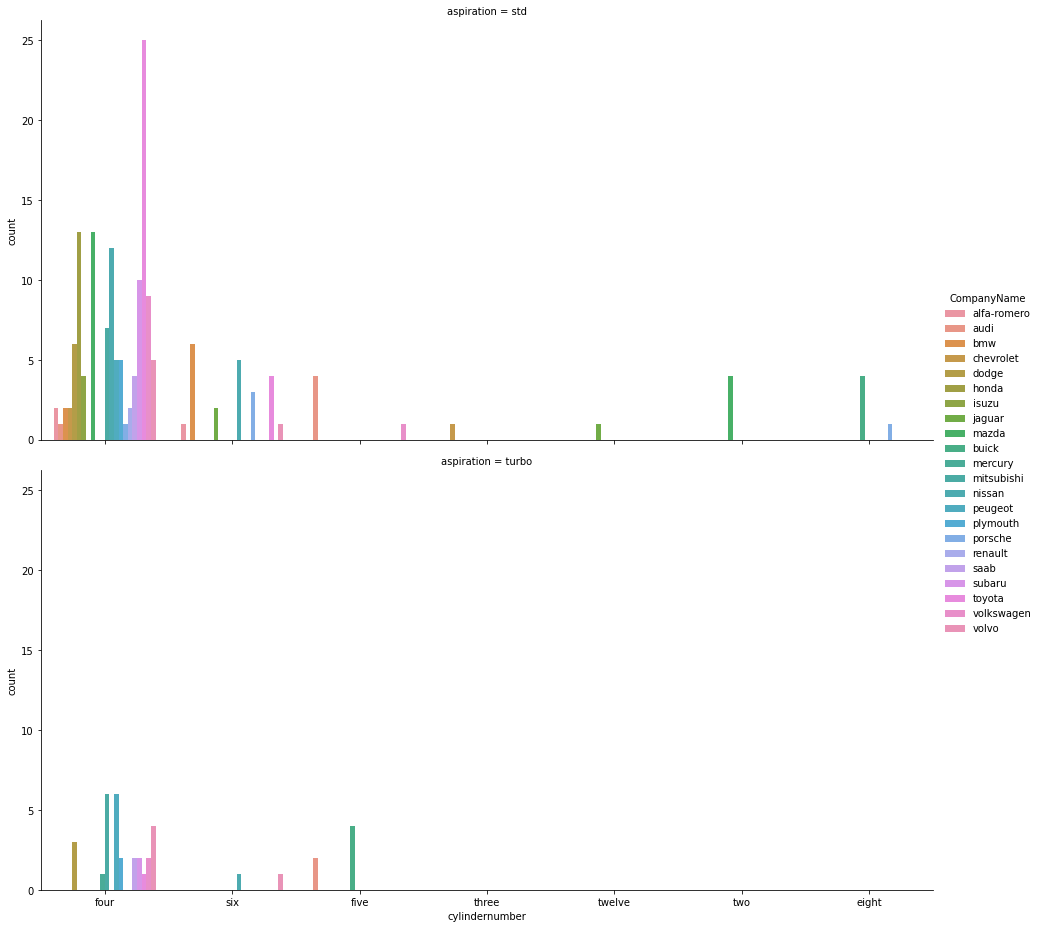

In [108]:
#Relationship between aspiration and cylindernumber:
plt.figure(figsize=(15,15),dpi=120)
sns.catplot(x="cylindernumber", col="aspiration", col_wrap=1, data=data,
                kind="count", height=6.5, aspect=2,hue="CompanyName")

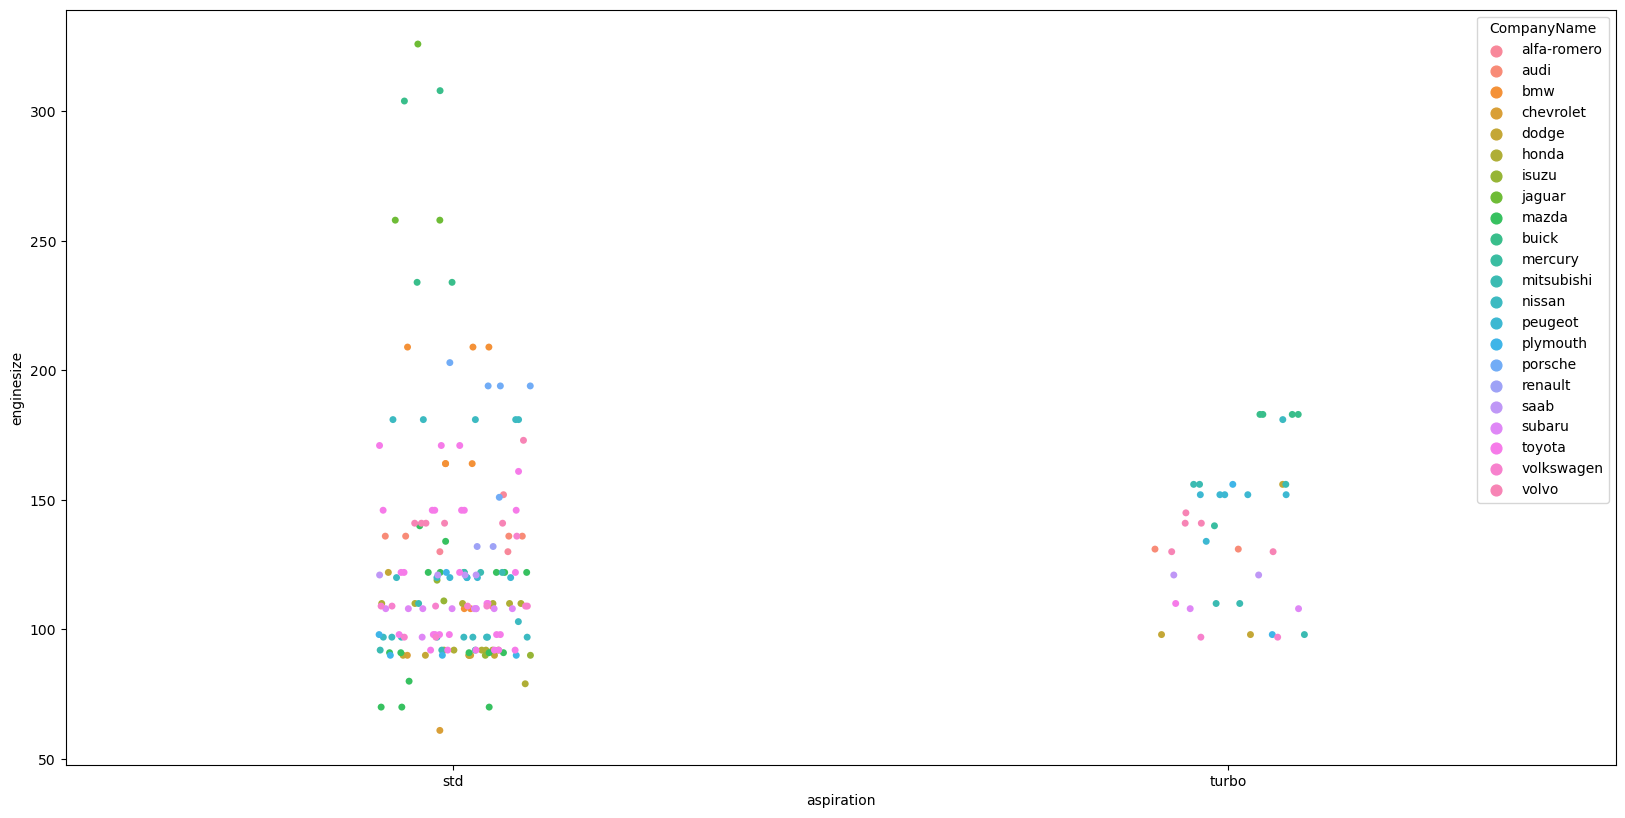

In [109]:
#Relationship between aspiration and enginesize:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="aspiration", y="enginesize",data=data,hue="CompanyName",jitter=True)

<Figure size 1800x1800 with 0 Axes>

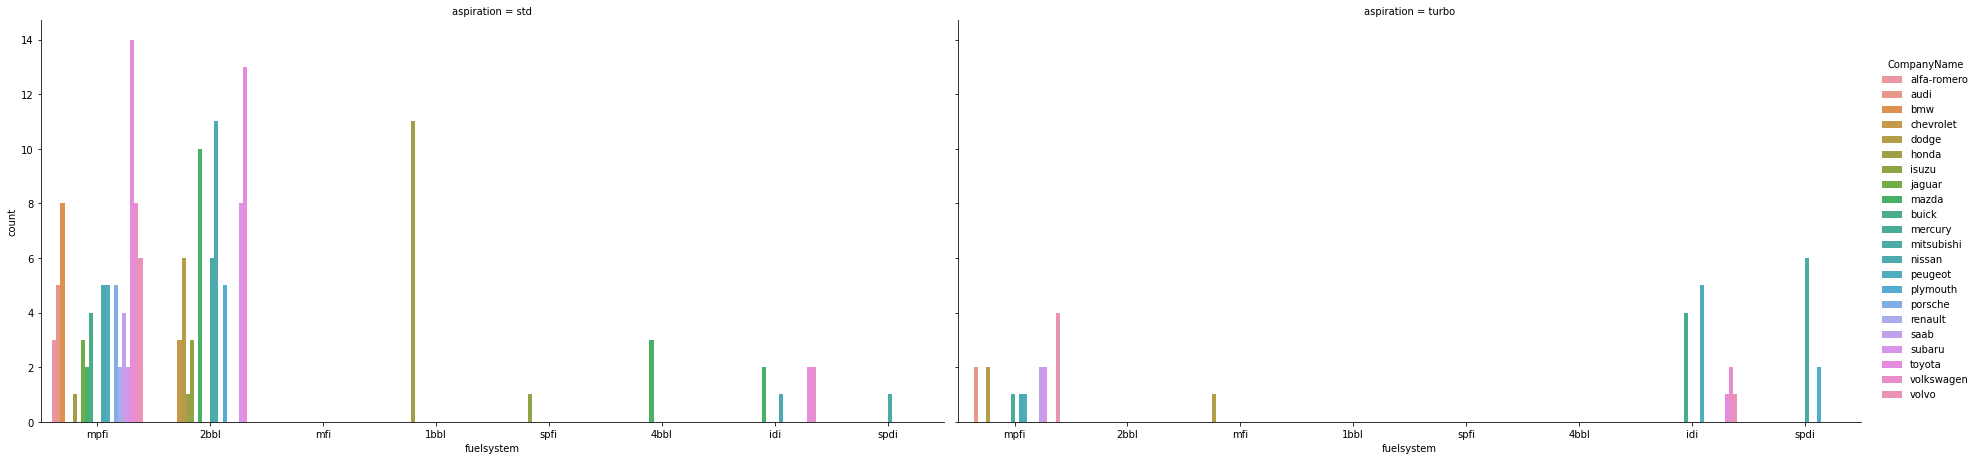

In [110]:
#Relationship between aspiration and fuelsystem:
plt.figure(figsize=(15,15),dpi=120)
sns.catplot(x="fuelsystem", col="aspiration", col_wrap=2, data=data,
                kind="count", height=6.5, aspect=2,hue="CompanyName")

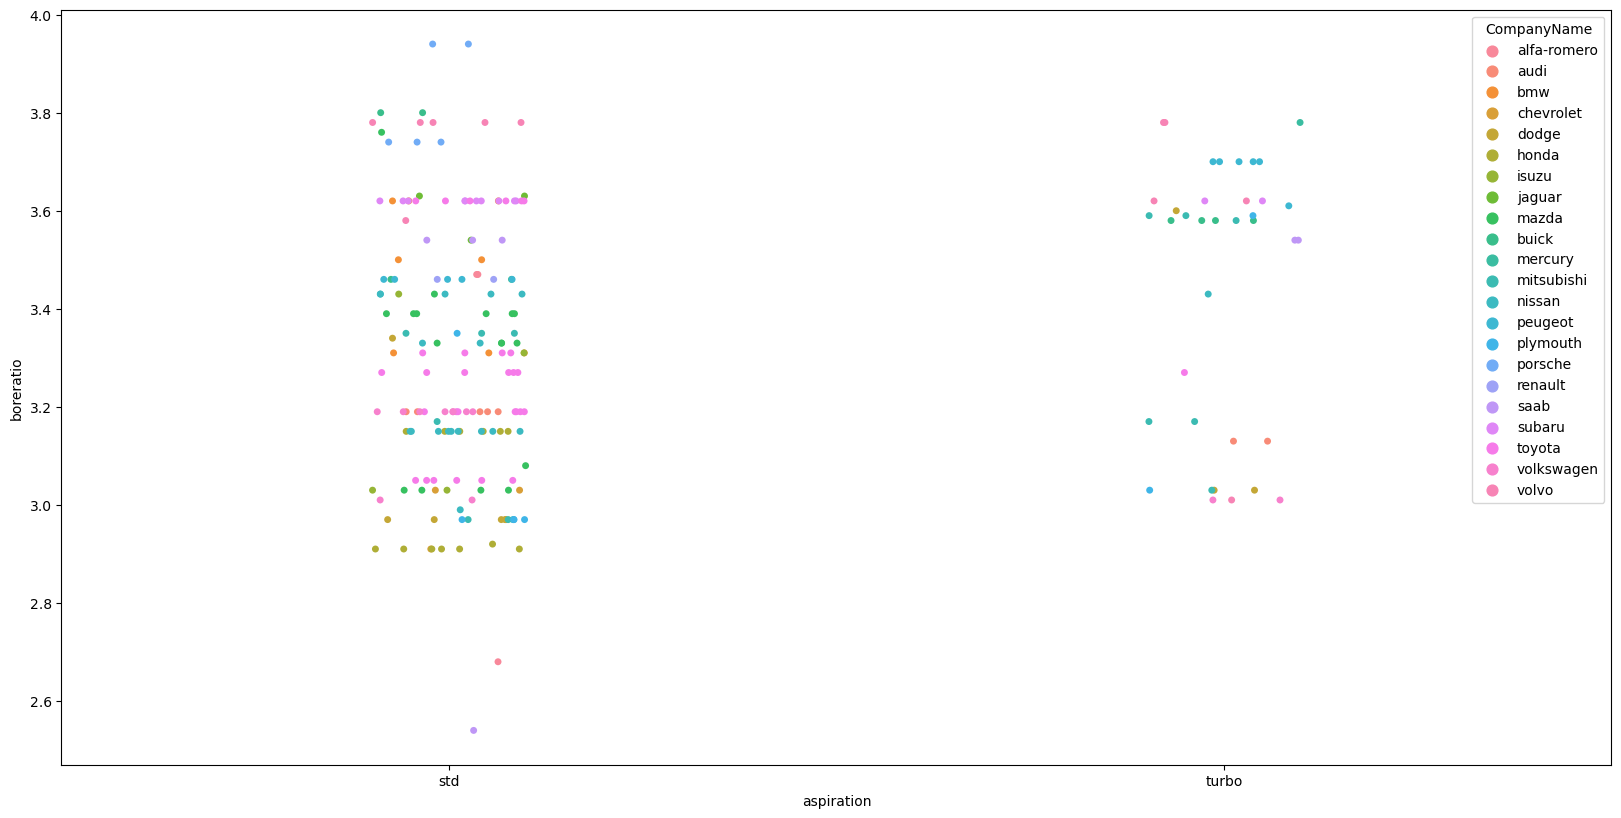

In [111]:
#Relationship betwen aspiration and boreratio:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="aspiration", y="boreratio",data=data,hue="CompanyName",jitter=True)

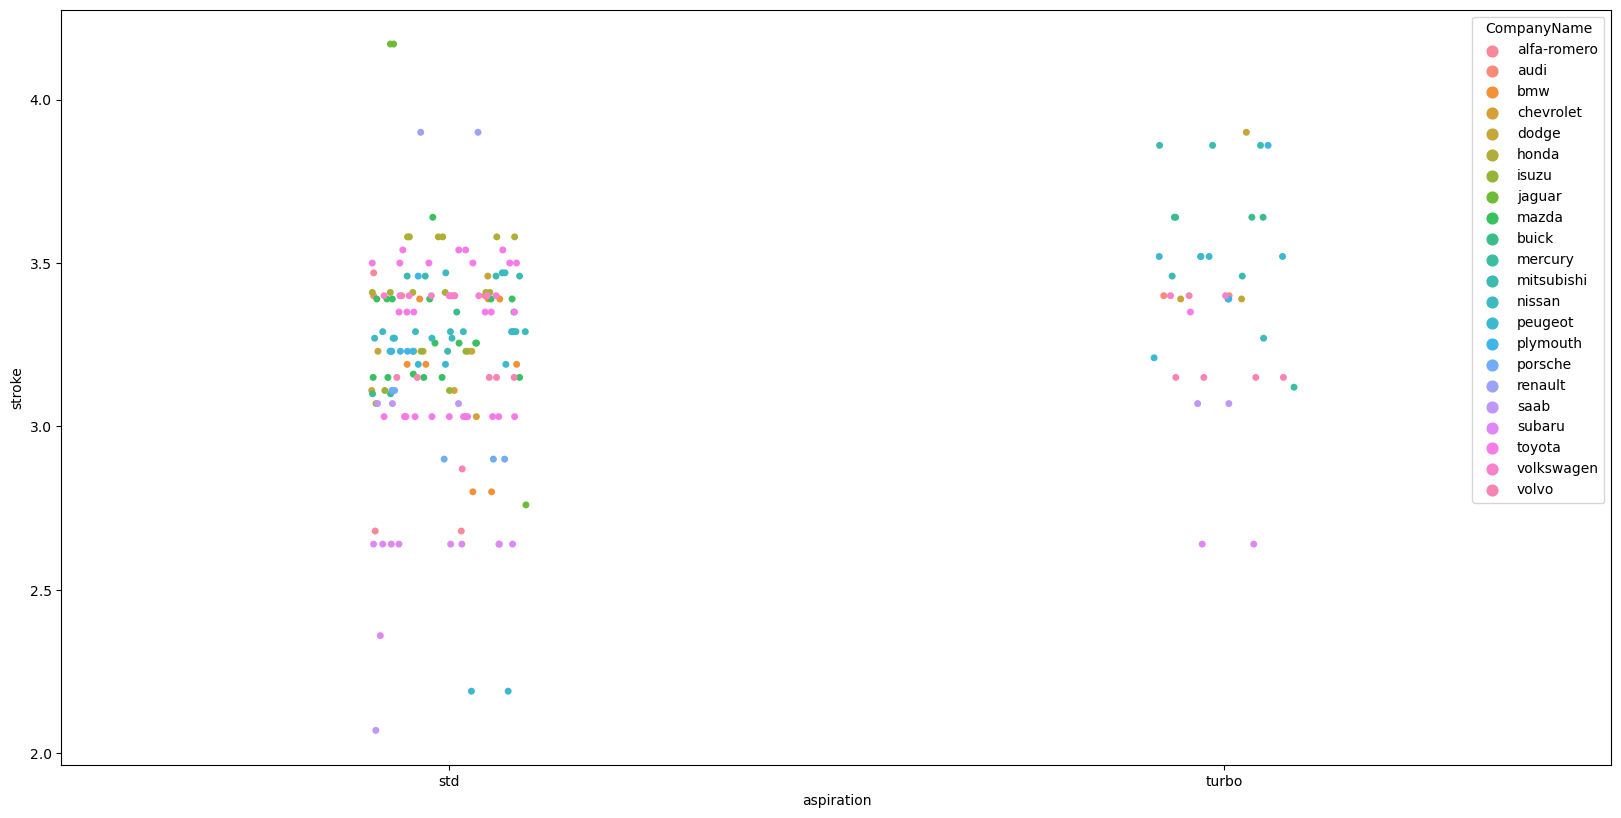

In [112]:
#Relationship between aspiration and stroke:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="aspiration", y="stroke",data=data,hue="CompanyName",jitter=True)

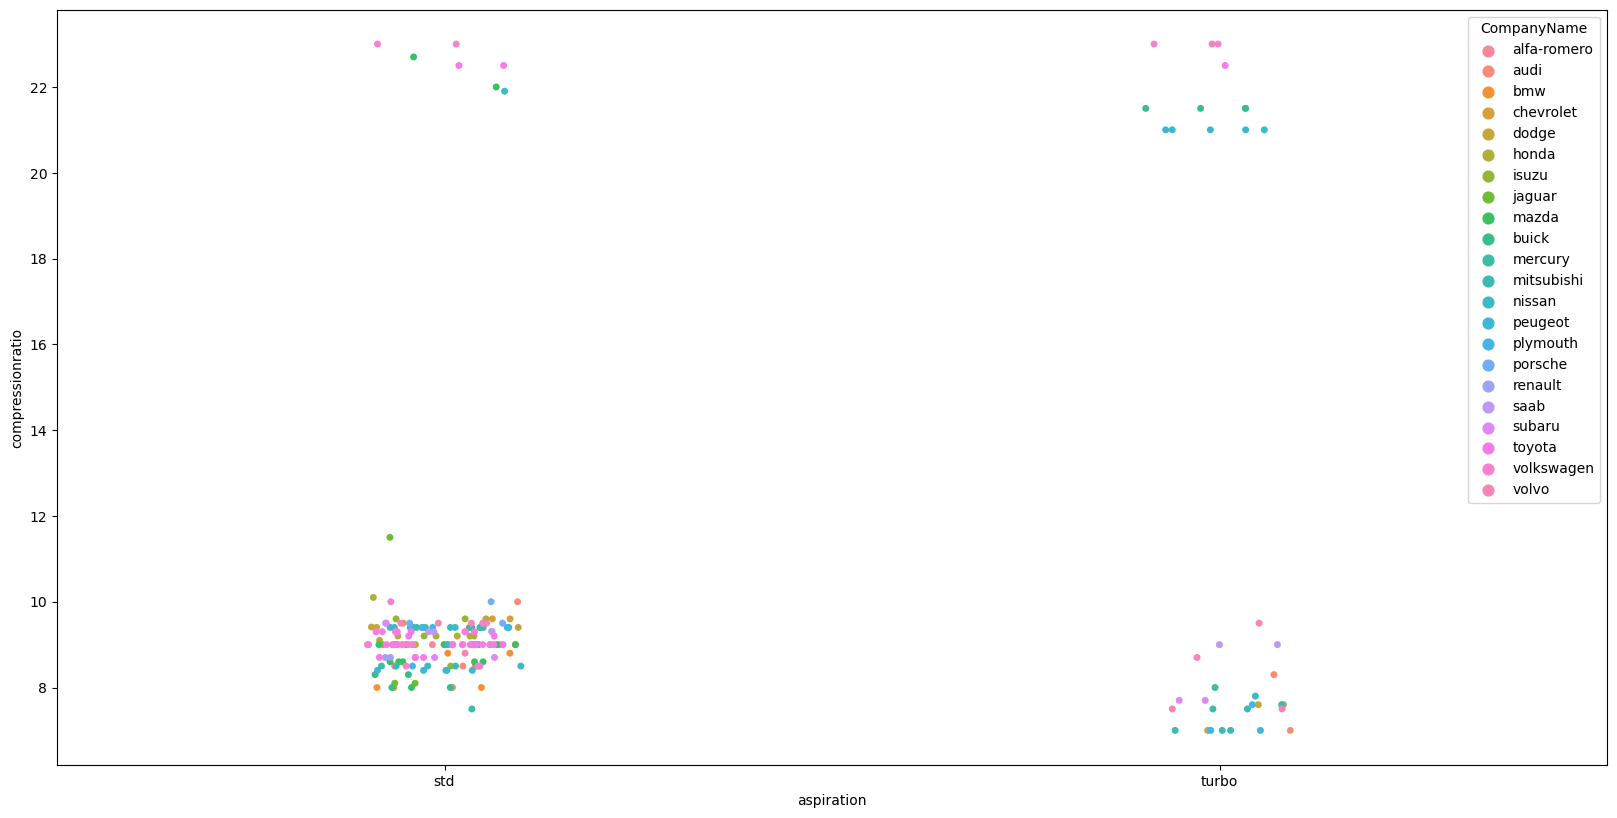

In [113]:
# Relationship between aspiration and compressionratio:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="aspiration", y="compressionratio",data=data,hue="CompanyName",jitter=True)

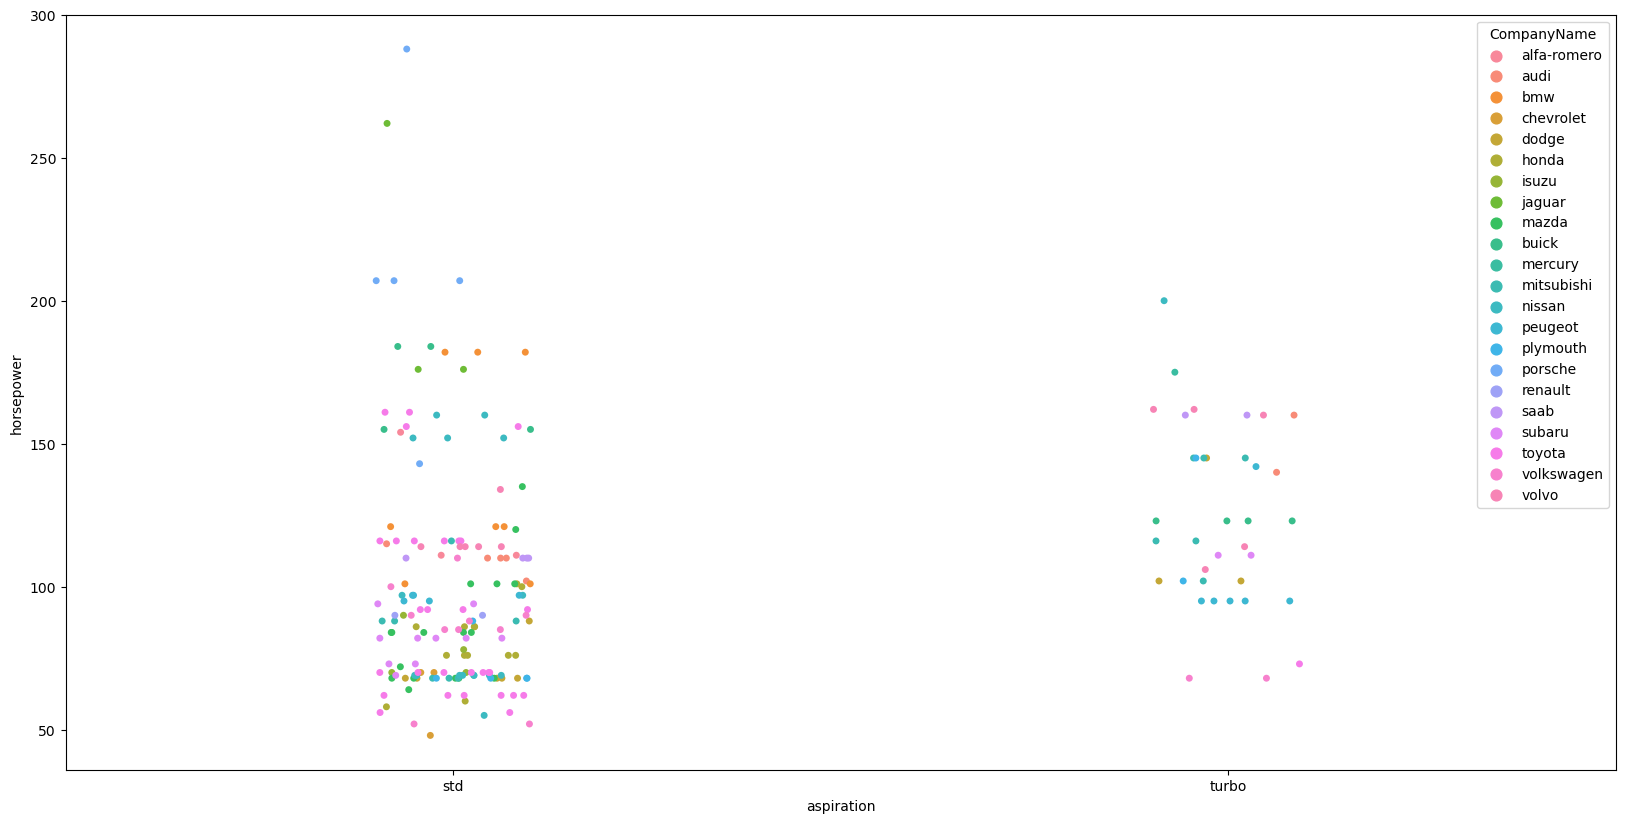

In [114]:
# Relationship between aspiration and horsepower:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="aspiration", y="horsepower",data=data,hue="CompanyName",jitter=True)

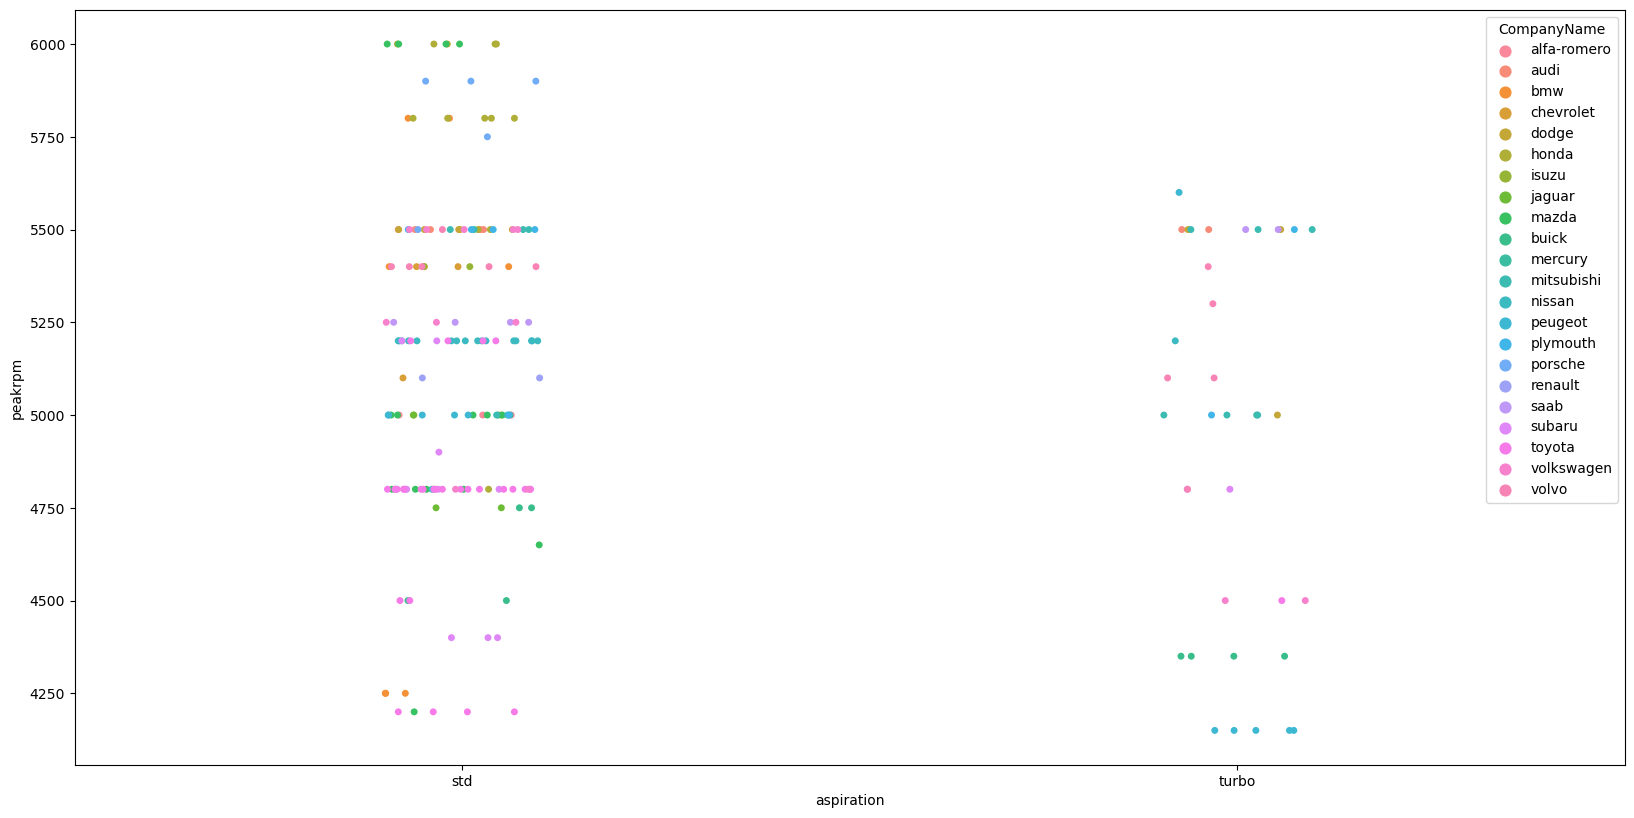

In [115]:
#Relationship beterrn aspiration anad peakrpm:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="aspiration", y="peakrpm",data=data,hue="CompanyName",jitter=True)

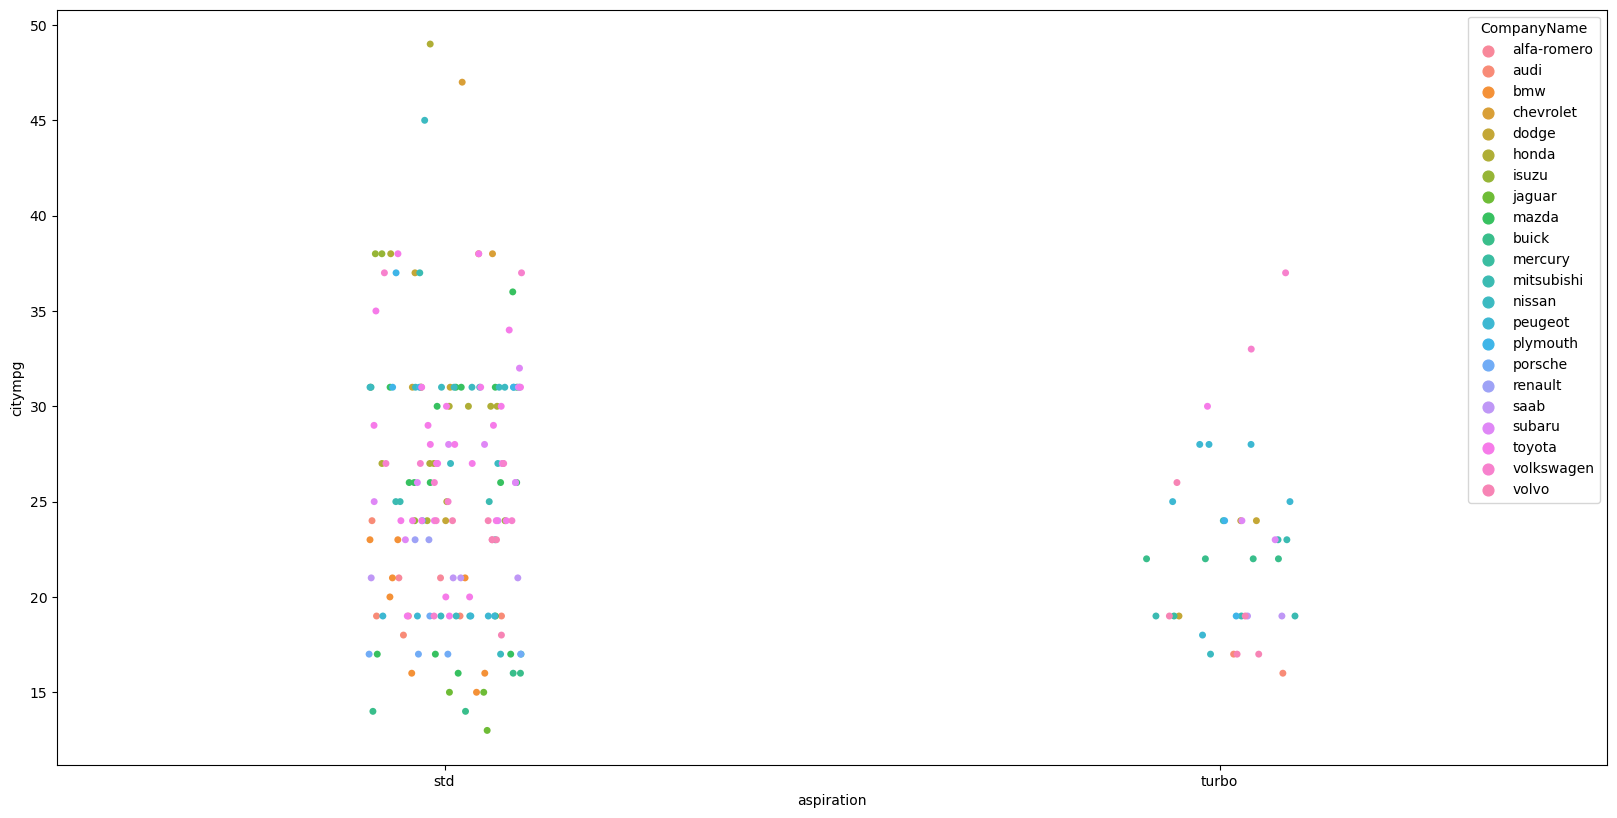

In [116]:
#Relationship between aspiration and citympg:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="aspiration", y="citympg",data=data,hue="CompanyName",jitter=True)

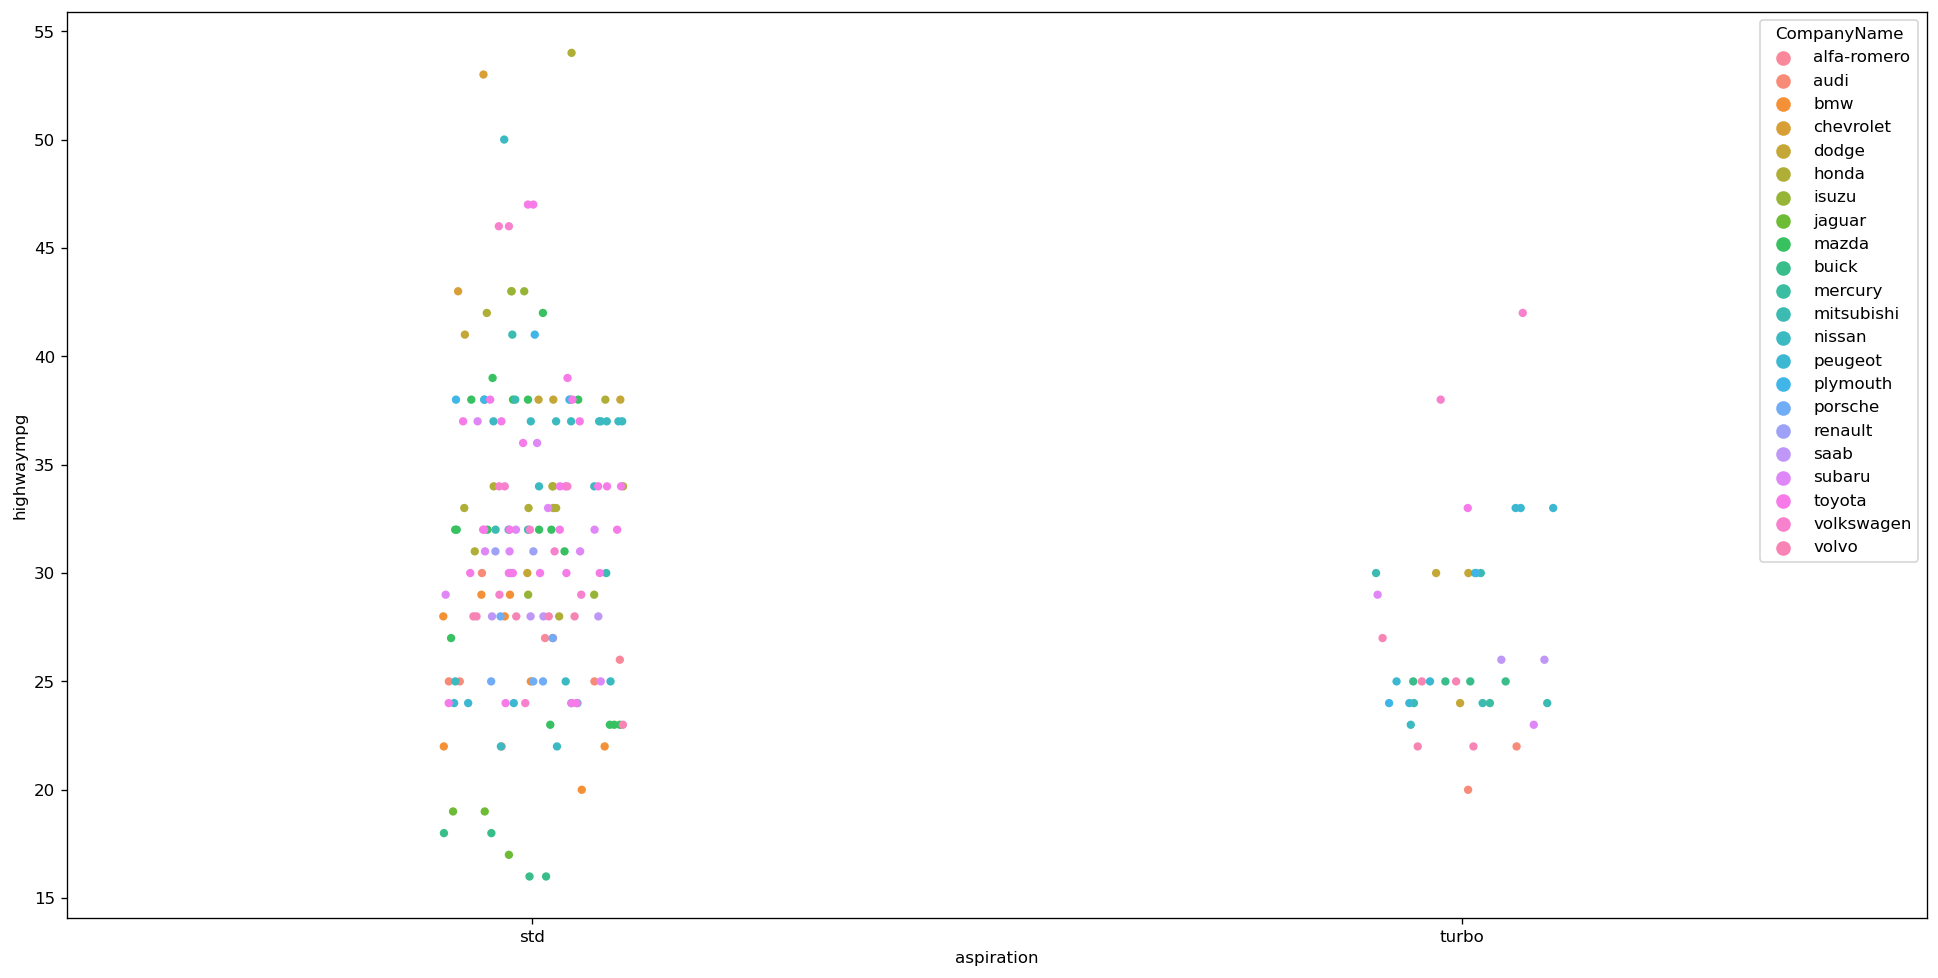

In [117]:
# Relationship between aspiration and highwaympg:
plt.figure(figsize=(20,10),dpi=120)
ax = sns.stripplot(x="aspiration", y="highwaympg",data=data,hue="CompanyName",jitter=True)

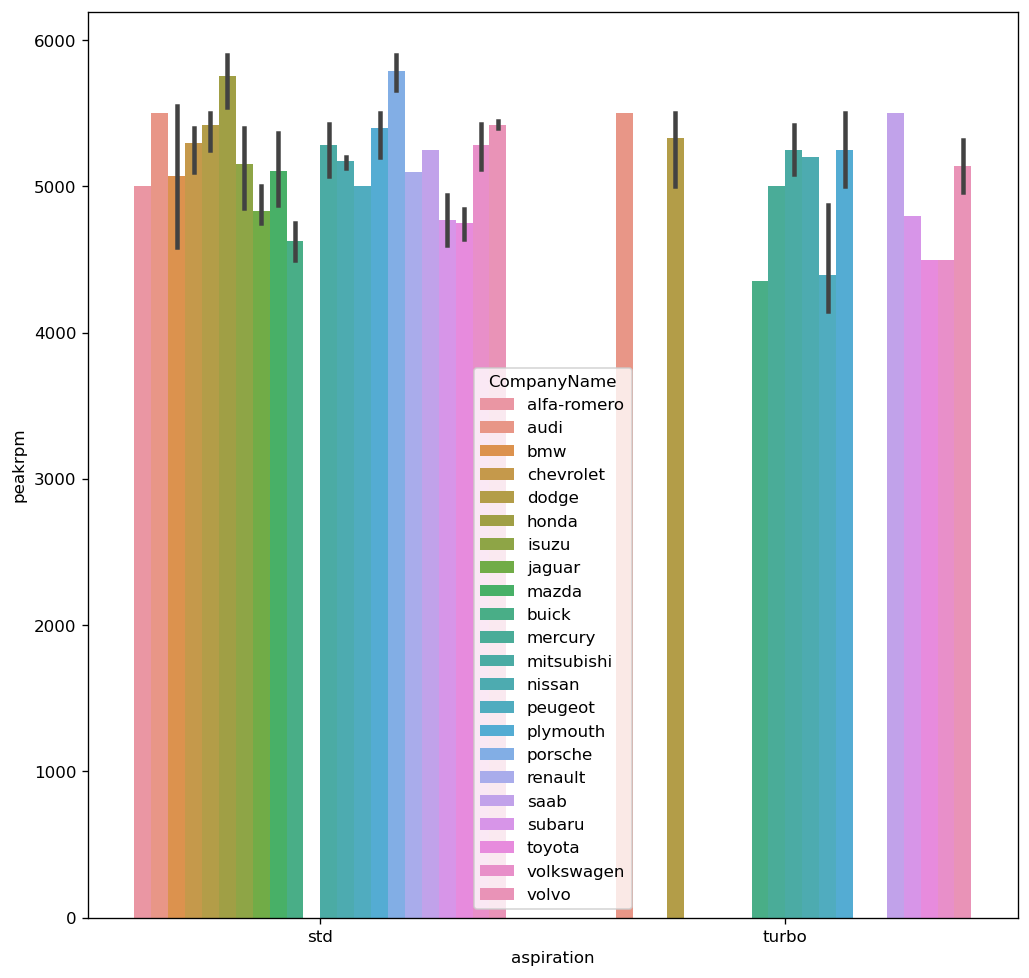

In [118]:
# Relationship between aspiration and peakrpm:
plt.figure(figsize=(10,10),dpi=120)
sns.barplot(x="aspiration",y="peakrpm",hue="CompanyName",data=data)

<Figure size 1800x1800 with 0 Axes>

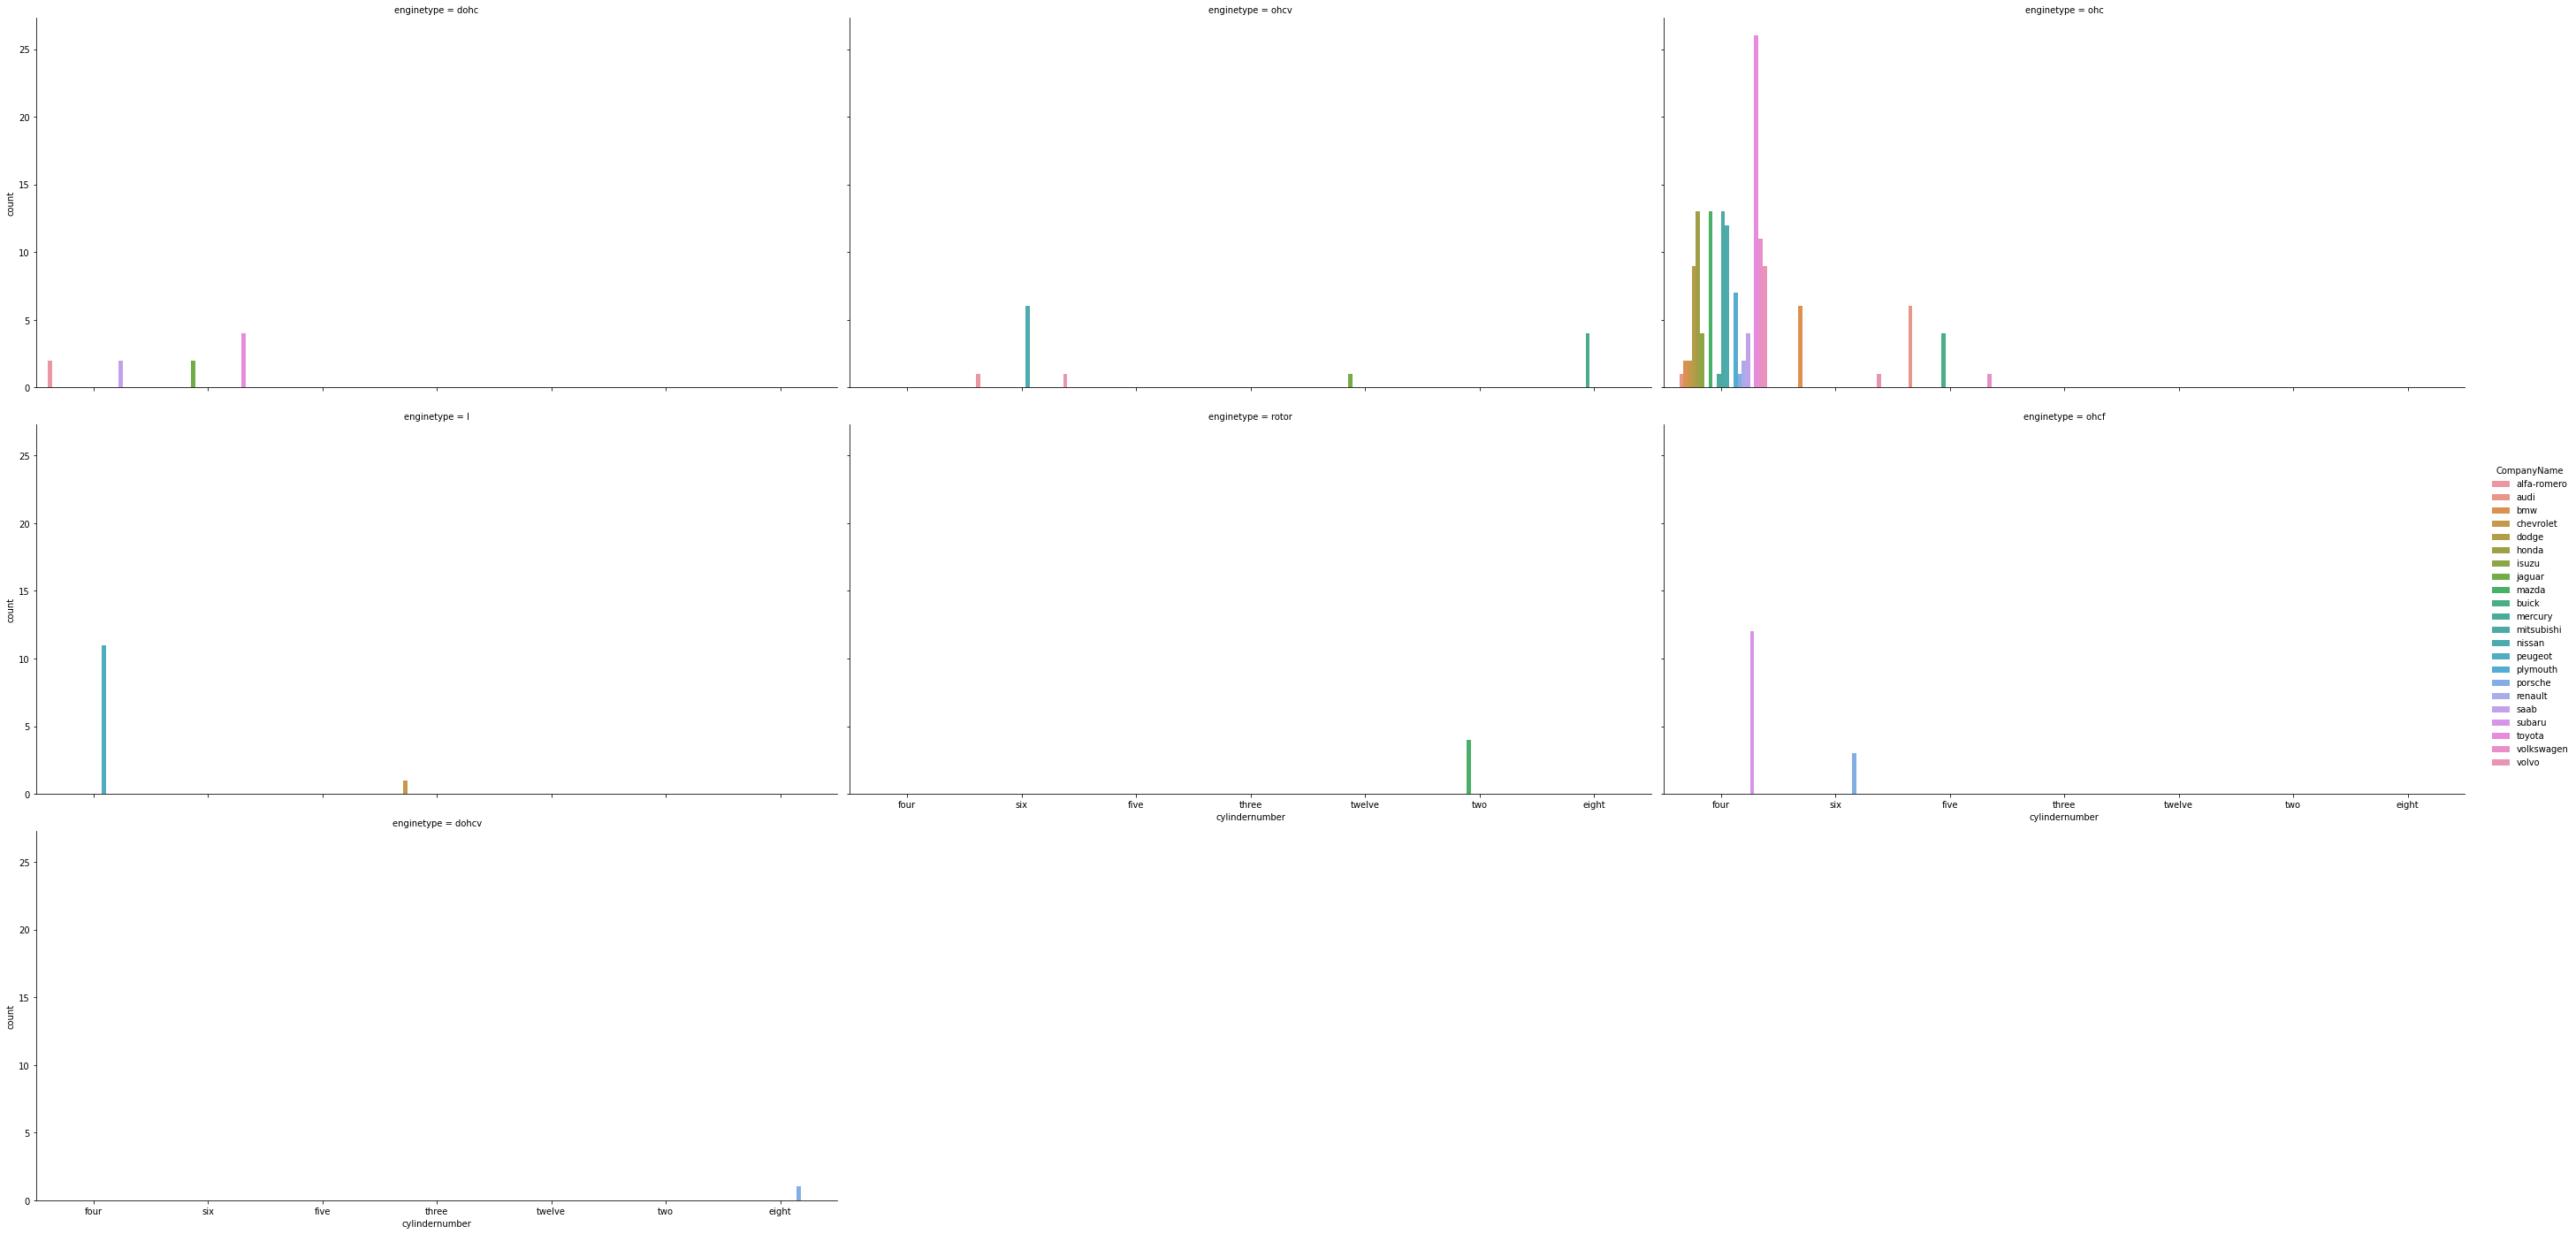

In [119]:
#Relationship between enginetype and cylindernumber:
plt.figure(figsize=(15,15),dpi=120)
sns.catplot(x="cylindernumber", col="enginetype", col_wrap=3, data=data,
                kind="count", height=6.5, aspect=2,hue="CompanyName")

<Figure size 1800x2400 with 0 Axes>

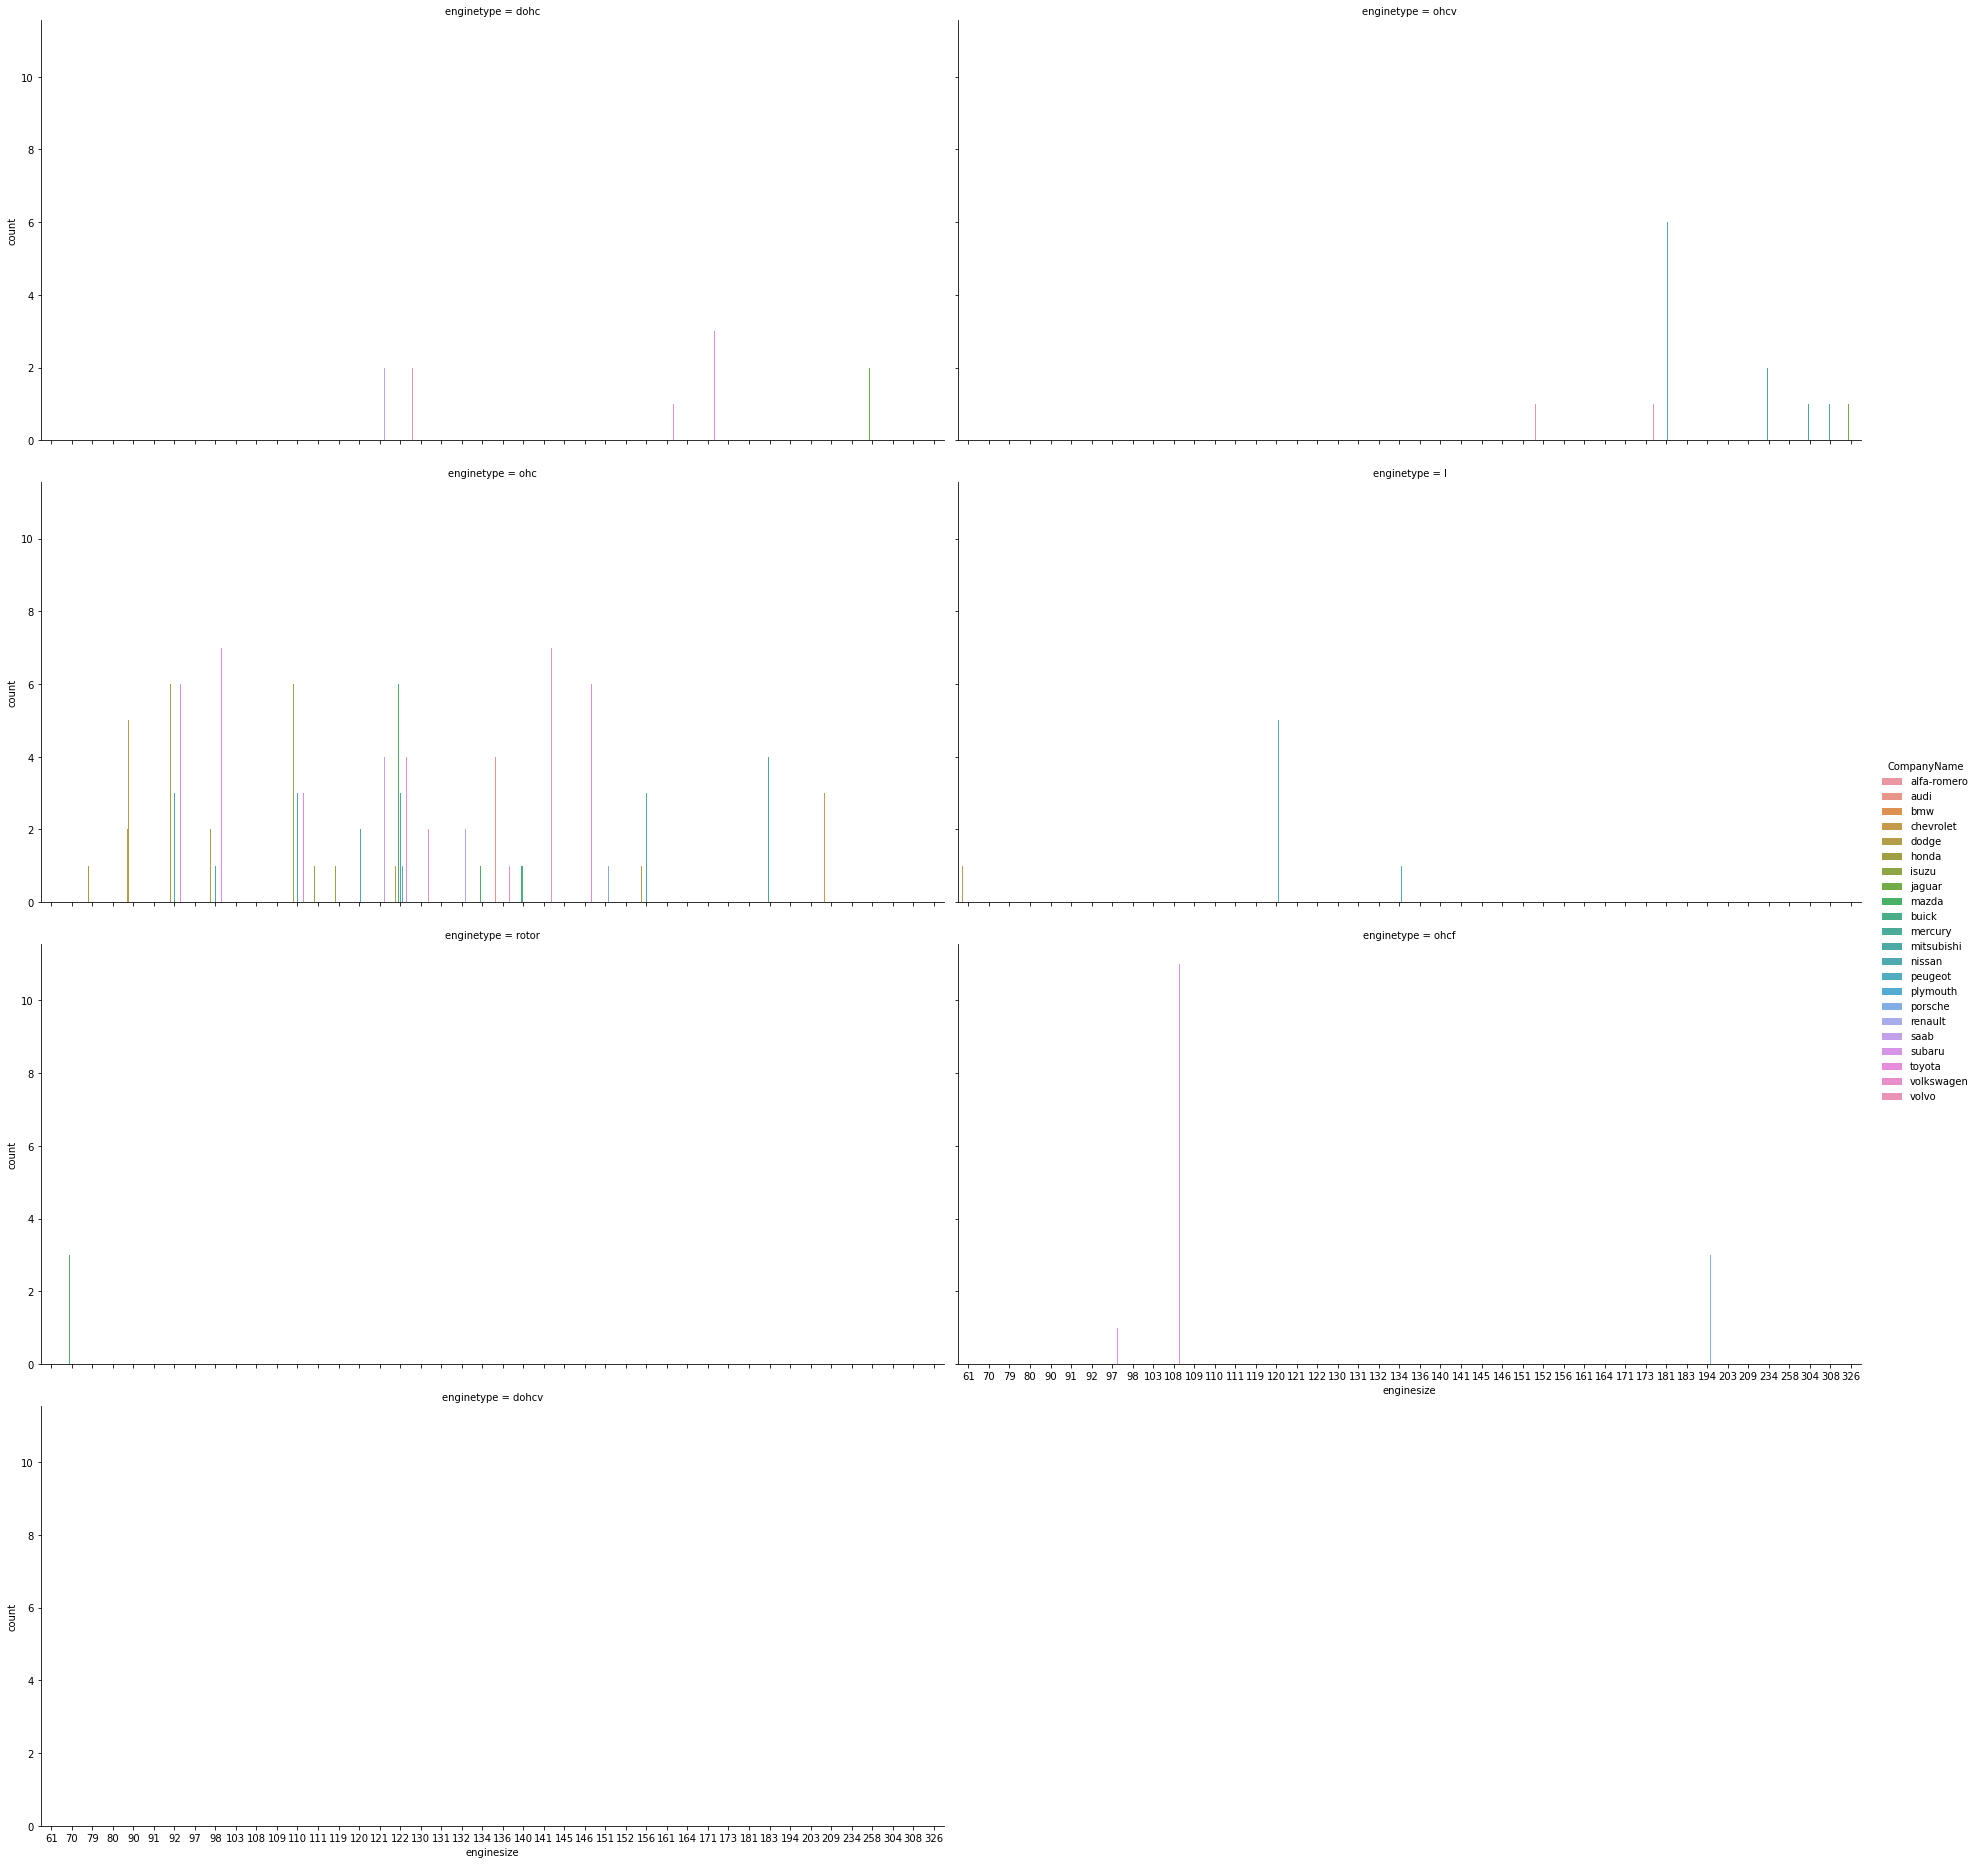

In [120]:
#Relationship between enginetype and enginesize:
plt.figure(figsize=(15,20),dpi=120)
sns.catplot(x="enginesize", col="enginetype", col_wrap=2, data=data,
                kind="count", height=6.5, aspect=2,hue="CompanyName")

<Figure size 1800x1800 with 0 Axes>

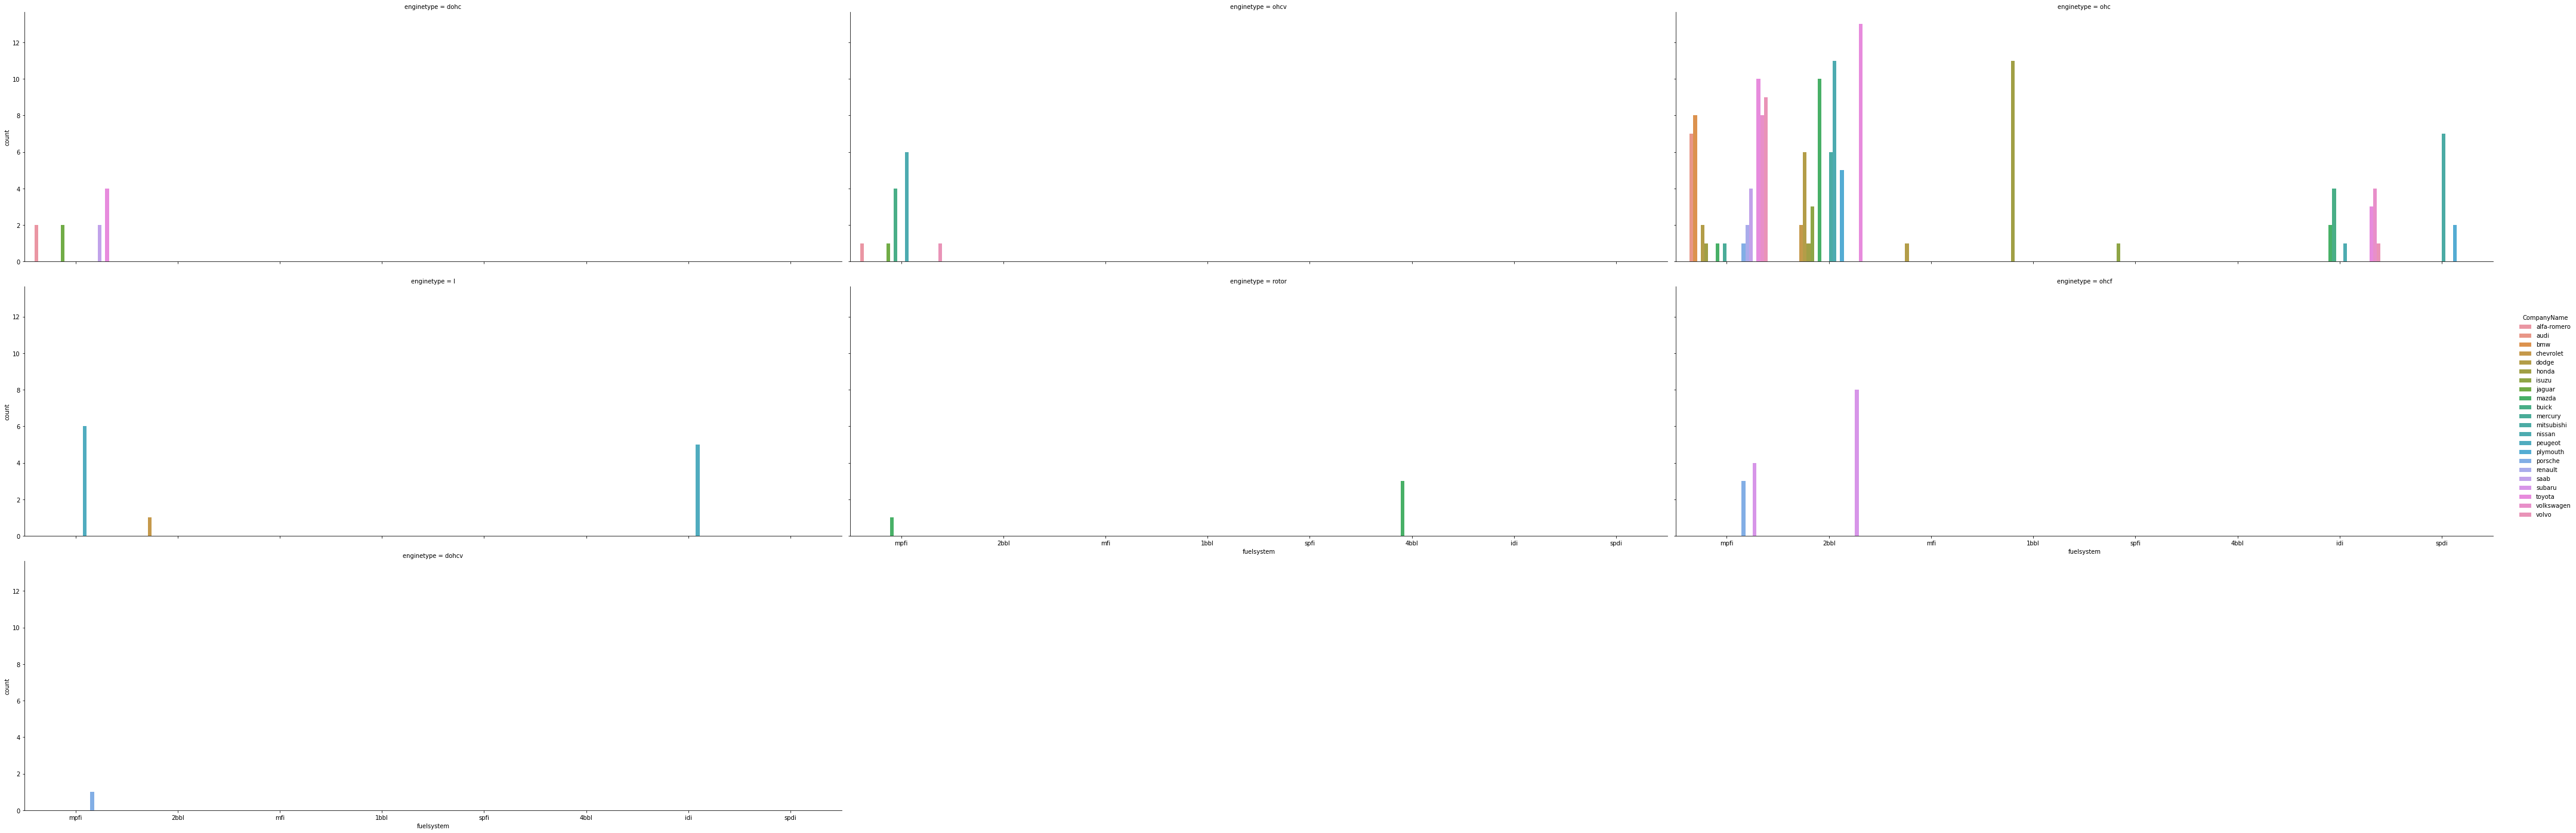

In [121]:
#Relationship between enginetype and fuelsystem:
plt.figure(figsize=(15,15),dpi=120)
sns.catplot(x="fuelsystem", col="enginetype", col_wrap=3, data=data,
                kind="count", height=6.5, aspect=3,hue="CompanyName")

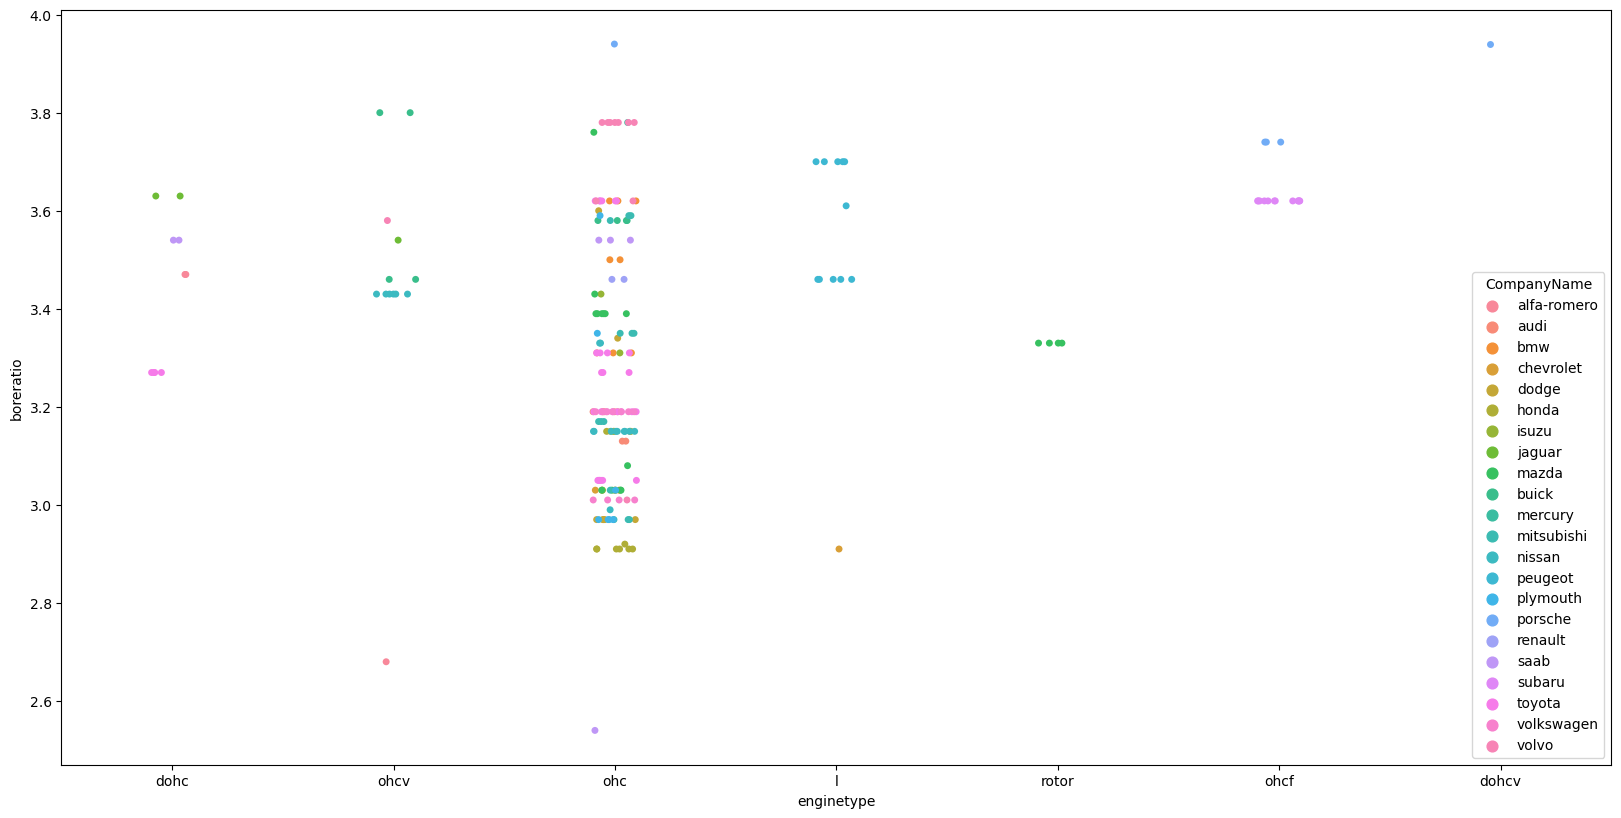

In [122]:
#Relationship between eniginetype and boreratio:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="enginetype", y="boreratio",data=data,hue="CompanyName",jitter=True)

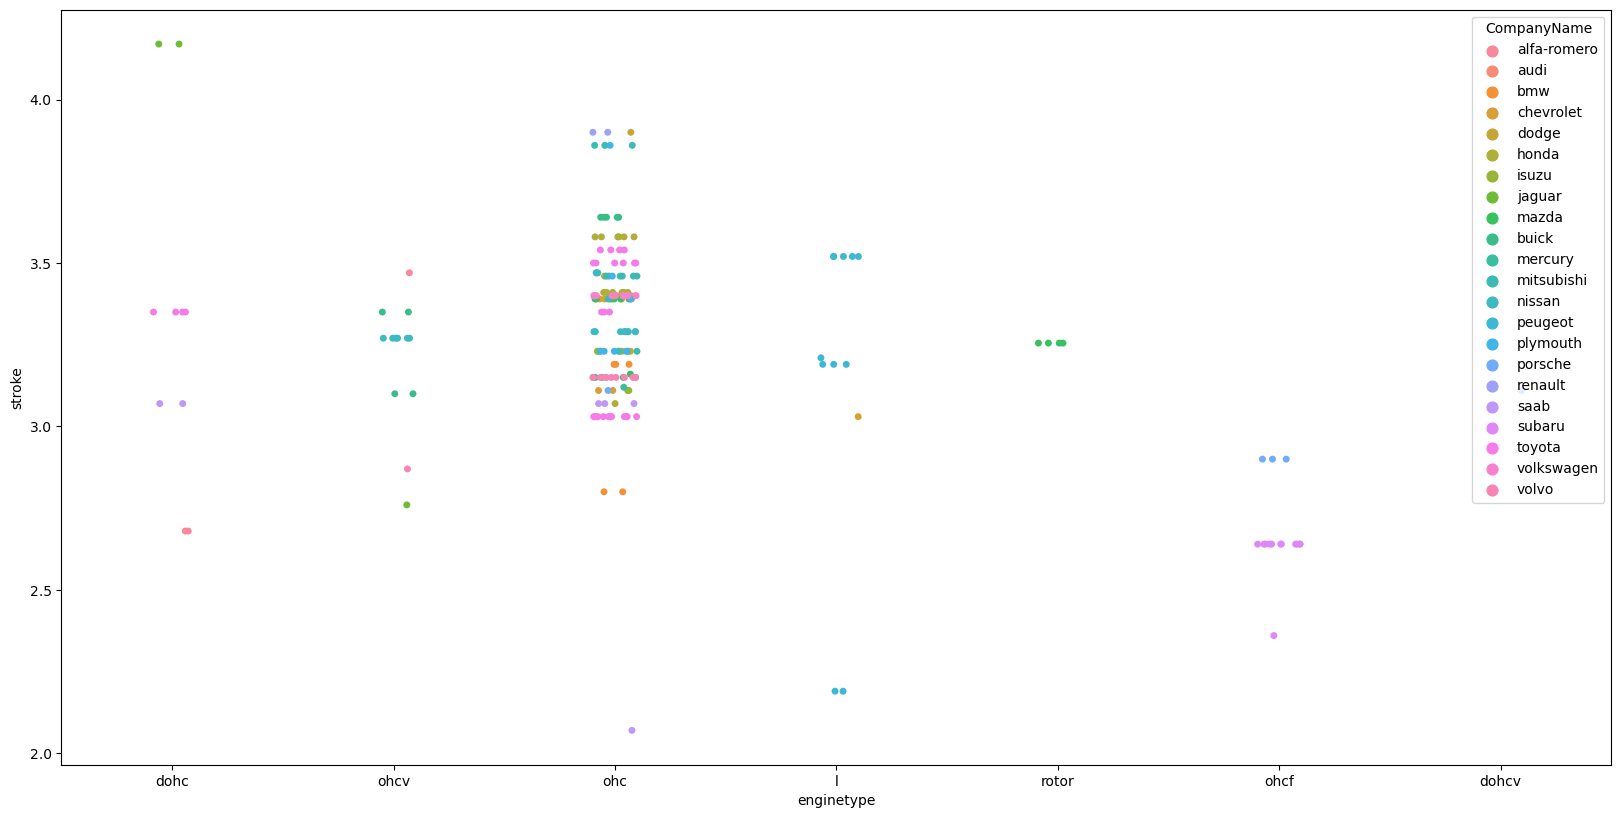

In [123]:
#Relationship betwen enginetype and stroke:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="enginetype", y="stroke",data=data,hue="CompanyName",jitter=True)

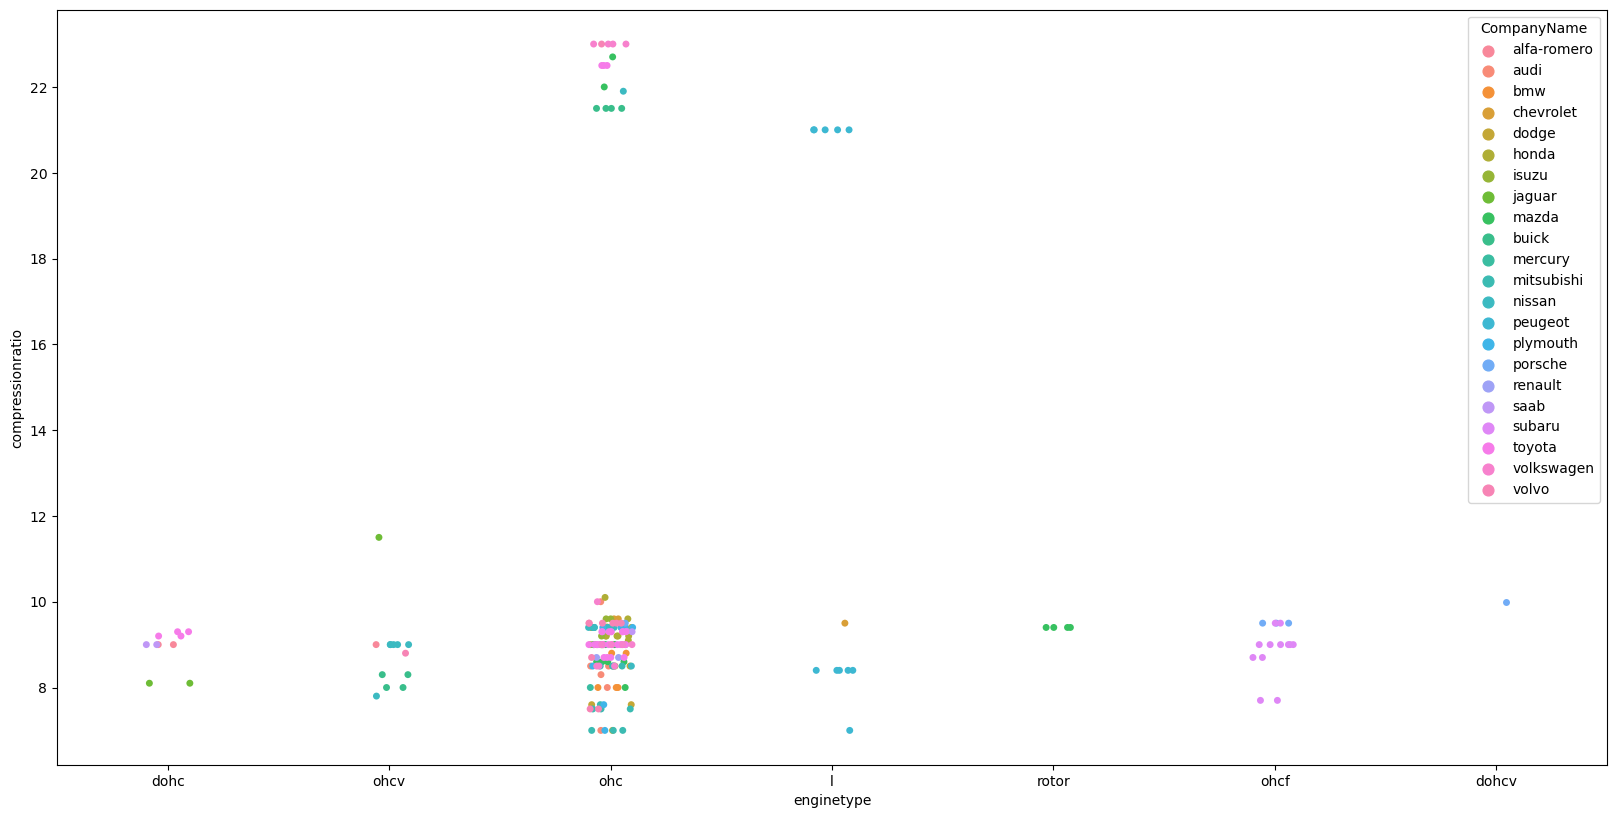

In [124]:
#Relationship between enginetype and compressionratio:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="enginetype", y="compressionratio",data=data,hue="CompanyName",jitter=True)

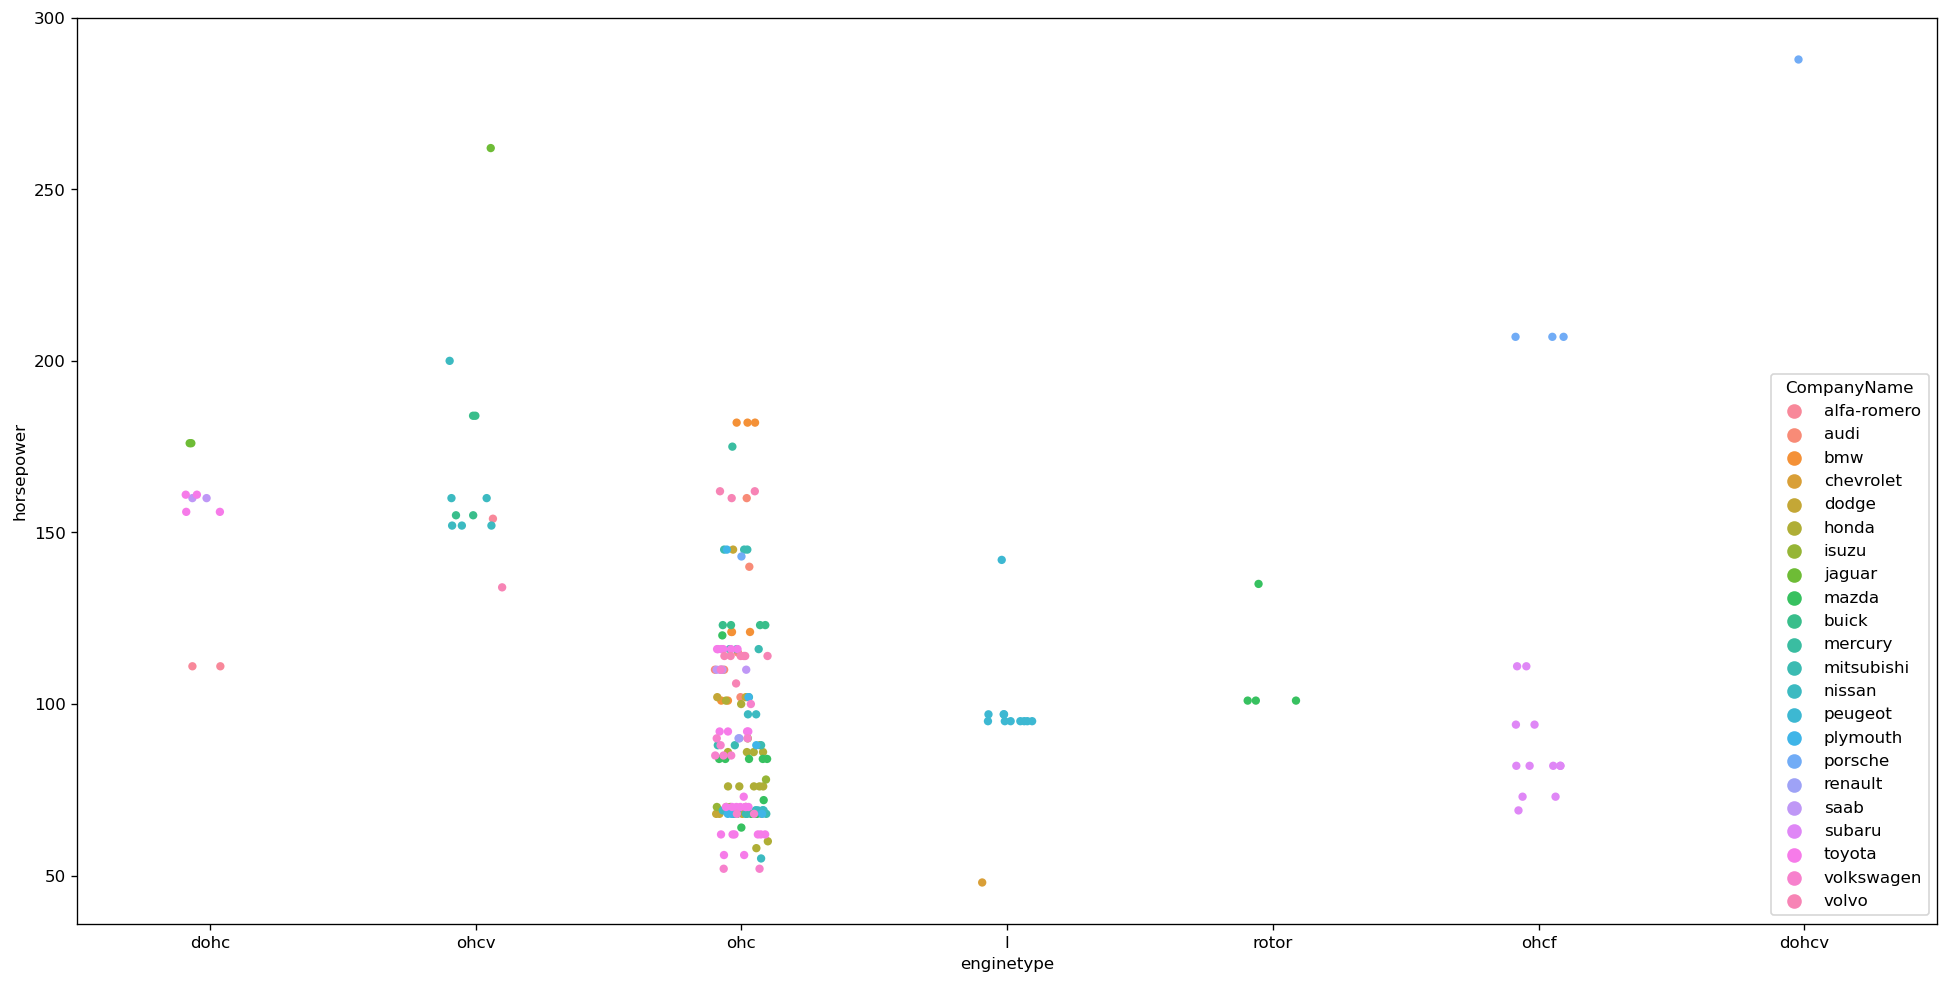

In [125]:
#Relationship between enginetype and horsepower:
plt.figure(figsize=(20,10),dpi=120)
ax = sns.stripplot(x="enginetype", y="horsepower",data=data,hue="CompanyName",jitter=True)

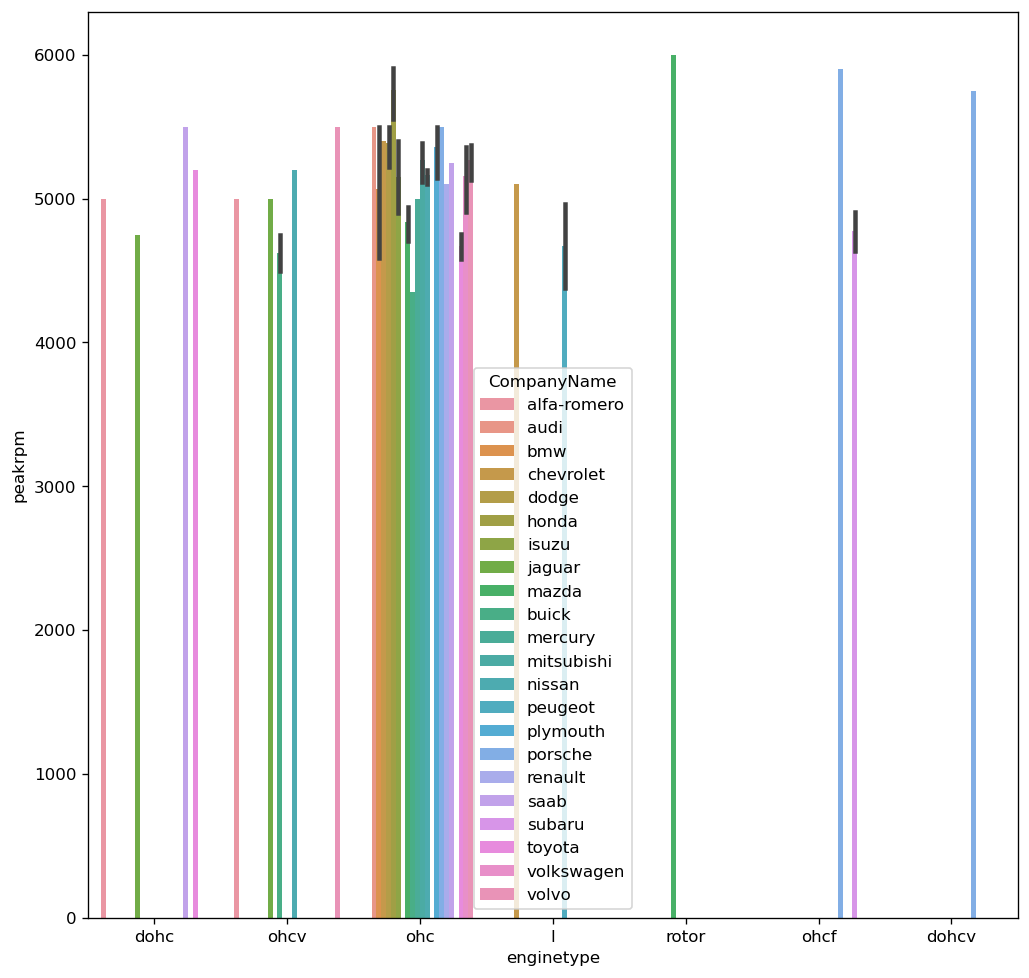

In [126]:
#Relationship between enginetype and peakrpm:
plt.figure(figsize=(10,10),dpi=120)
sns.barplot(x="enginetype",y="peakrpm",hue="CompanyName",data=data)

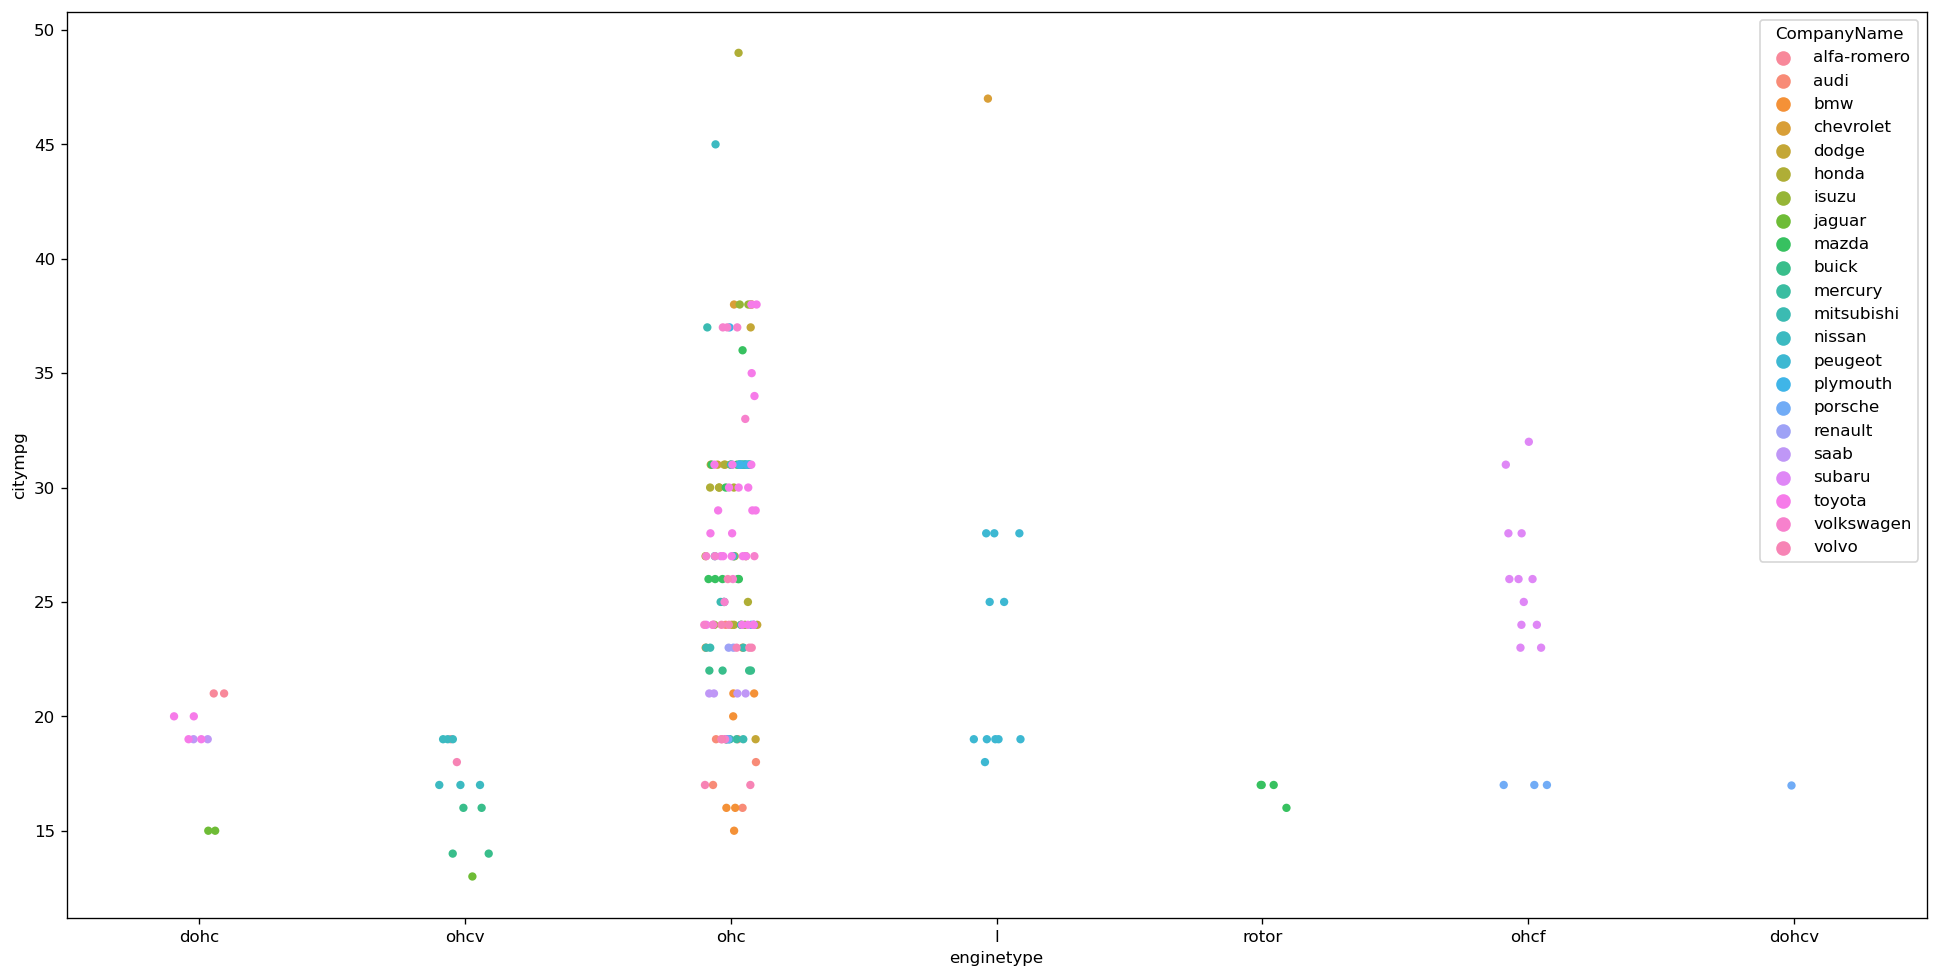

In [127]:
#Relationship between enginetype and citympg:
plt.figure(figsize=(20,10),dpi=120)
ax = sns.stripplot(x="enginetype", y="citympg",data=data,hue="CompanyName",jitter=True)

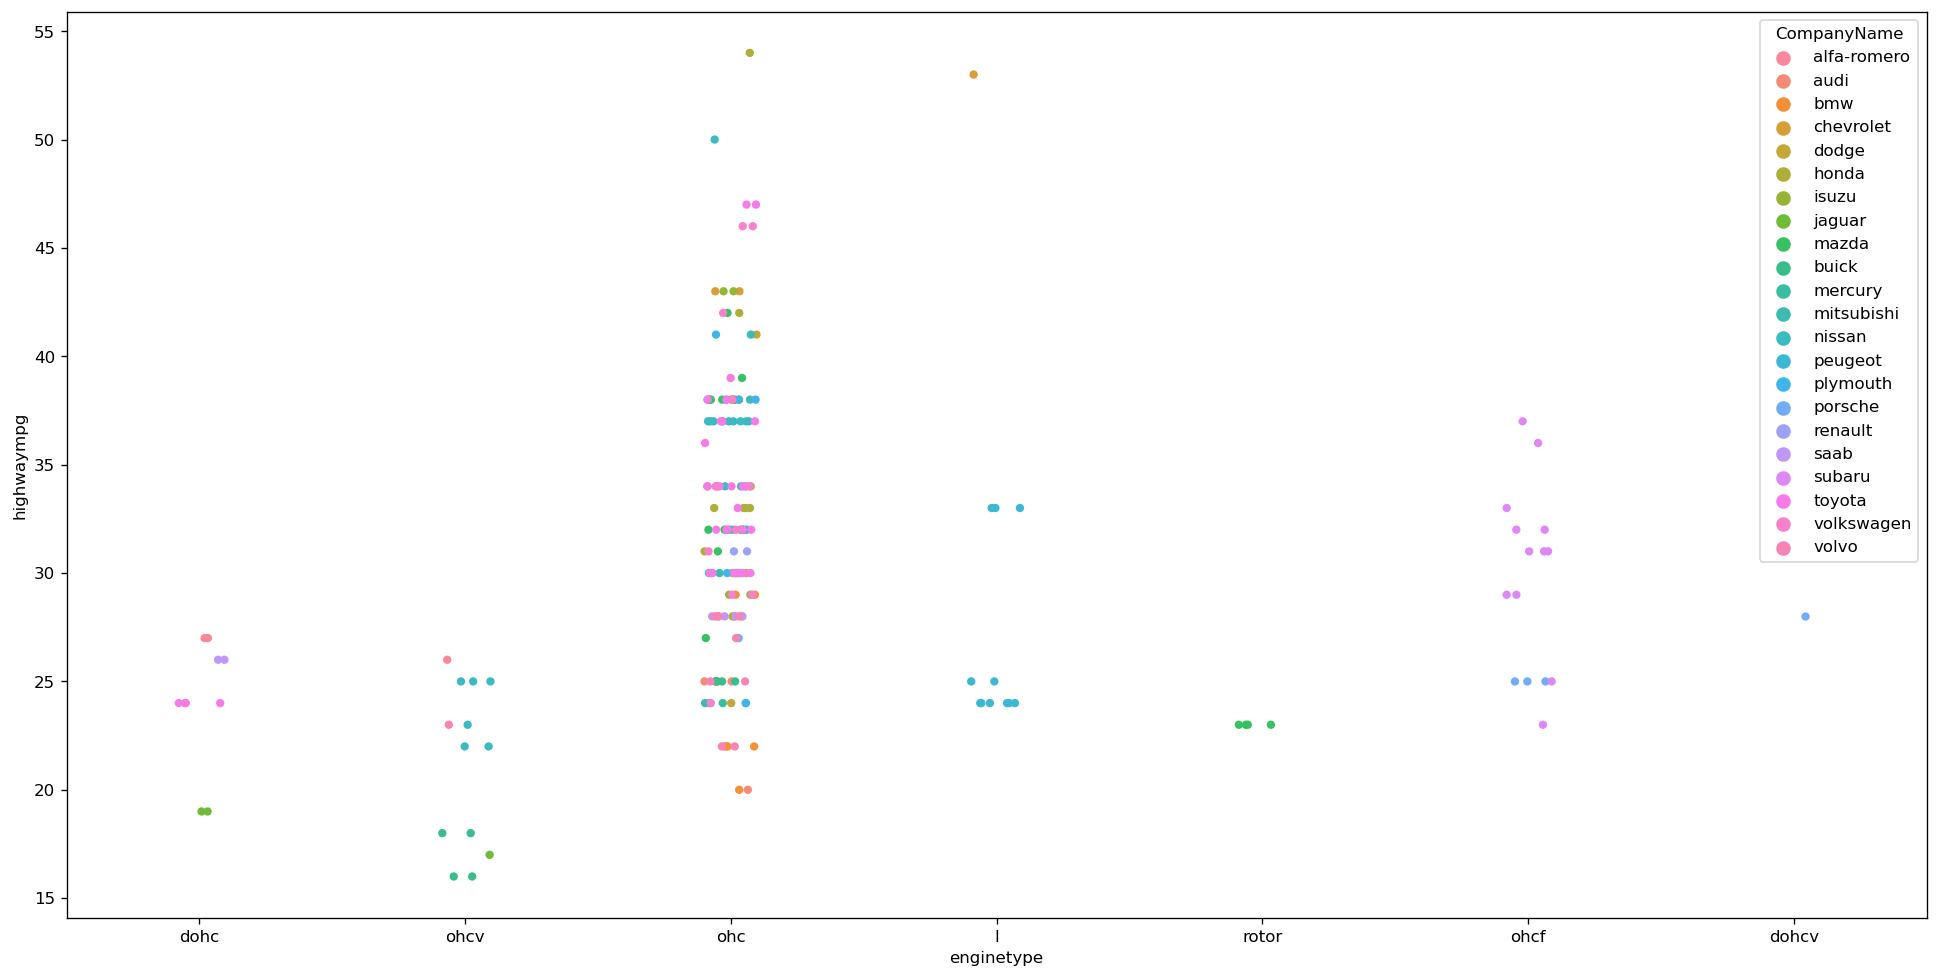

In [128]:
#Realtionship between enginetype and highwaympg:
plt.figure(figsize=(20,10),dpi=120)
ax = sns.stripplot(x="enginetype", y="highwaympg",data=data,hue="CompanyName",jitter=True)

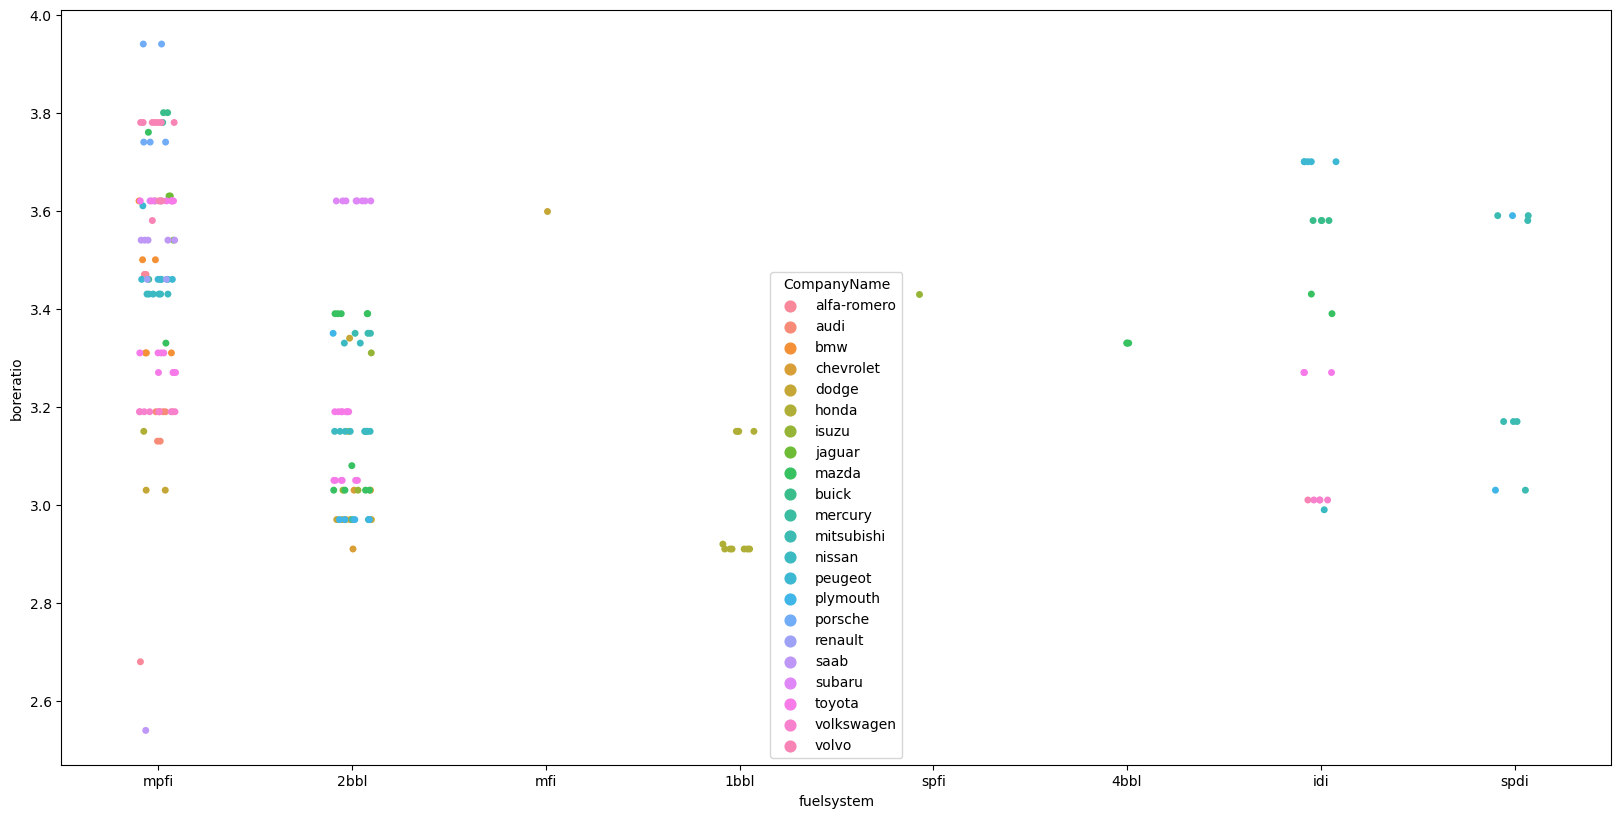

In [129]:
#Realtionship between fuelsystem and boreratio:
plt.figure(figsize=(20,10),dpi=100)
ax = sns.stripplot(x="fuelsystem", y="boreratio",data=data,hue="CompanyName",jitter=True)

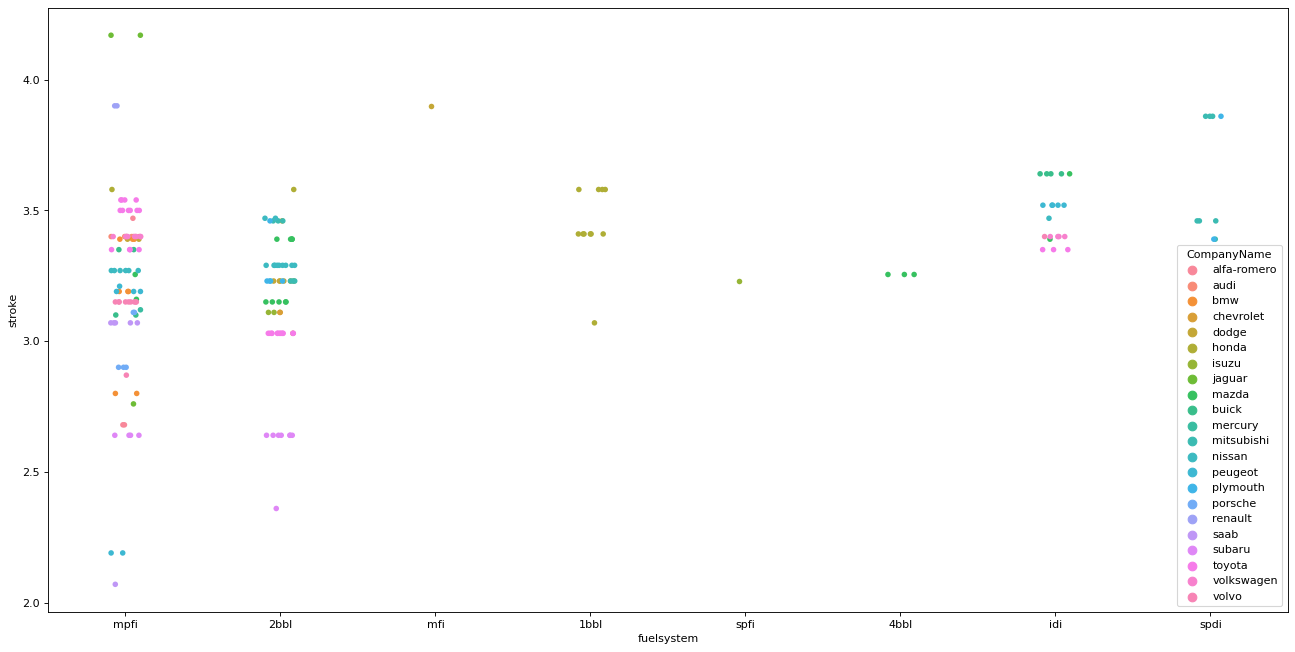

In [130]:
#Realtionship between fuelsystem and stroke:
plt.figure(figsize=(20,10),dpi=80)
ax = sns.stripplot(x="fuelsystem", y="stroke",data=data,hue="CompanyName",jitter=True)

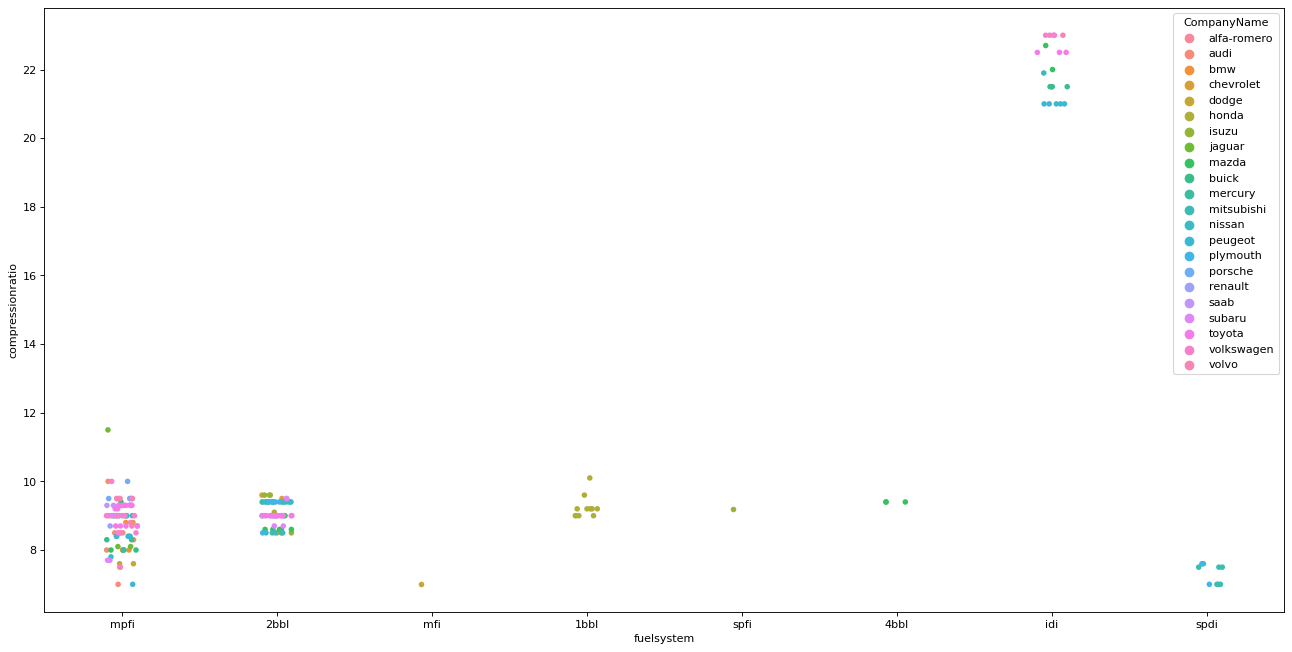

In [131]:
#Realtionship between fuelsystem and compressionratio:
plt.figure(figsize=(20,10),dpi=80)
ax = sns.stripplot(x="fuelsystem", y="compressionratio",data=data,hue="CompanyName",jitter=True)

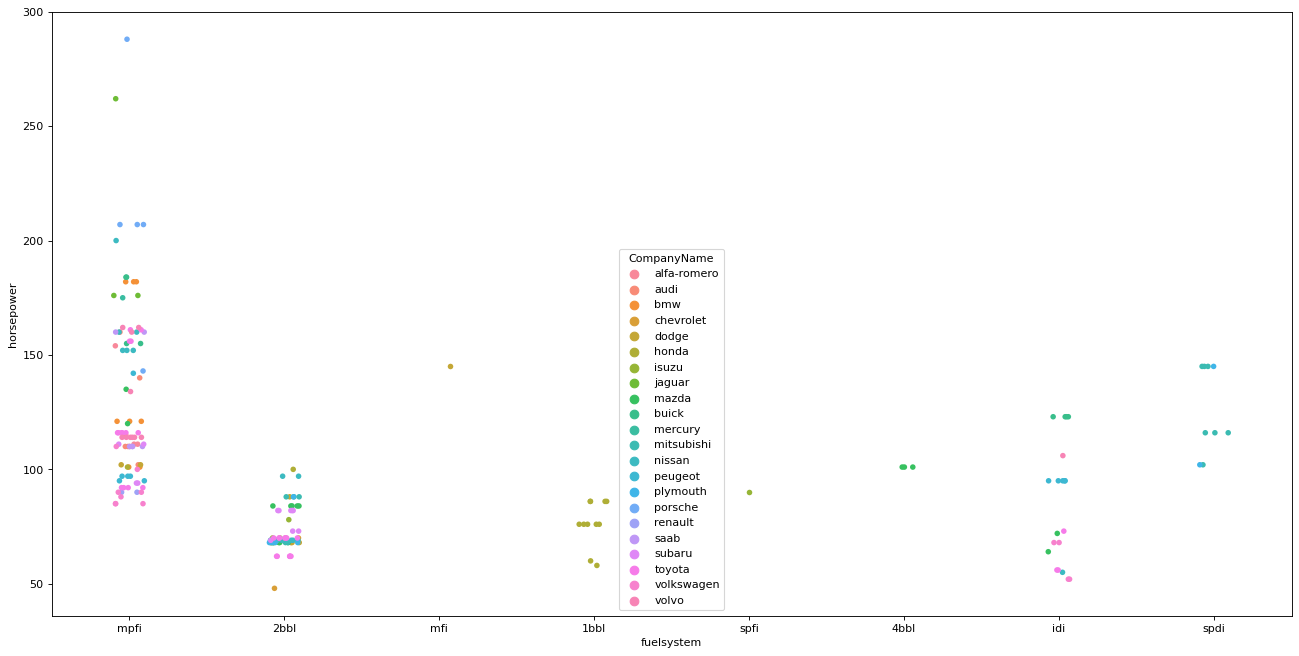

In [132]:
#Realtionship between fuelsystem and horsepower:
plt.figure(figsize=(20,10),dpi=80)
ax = sns.stripplot(x="fuelsystem", y="horsepower",data=data,hue="CompanyName",jitter=True)

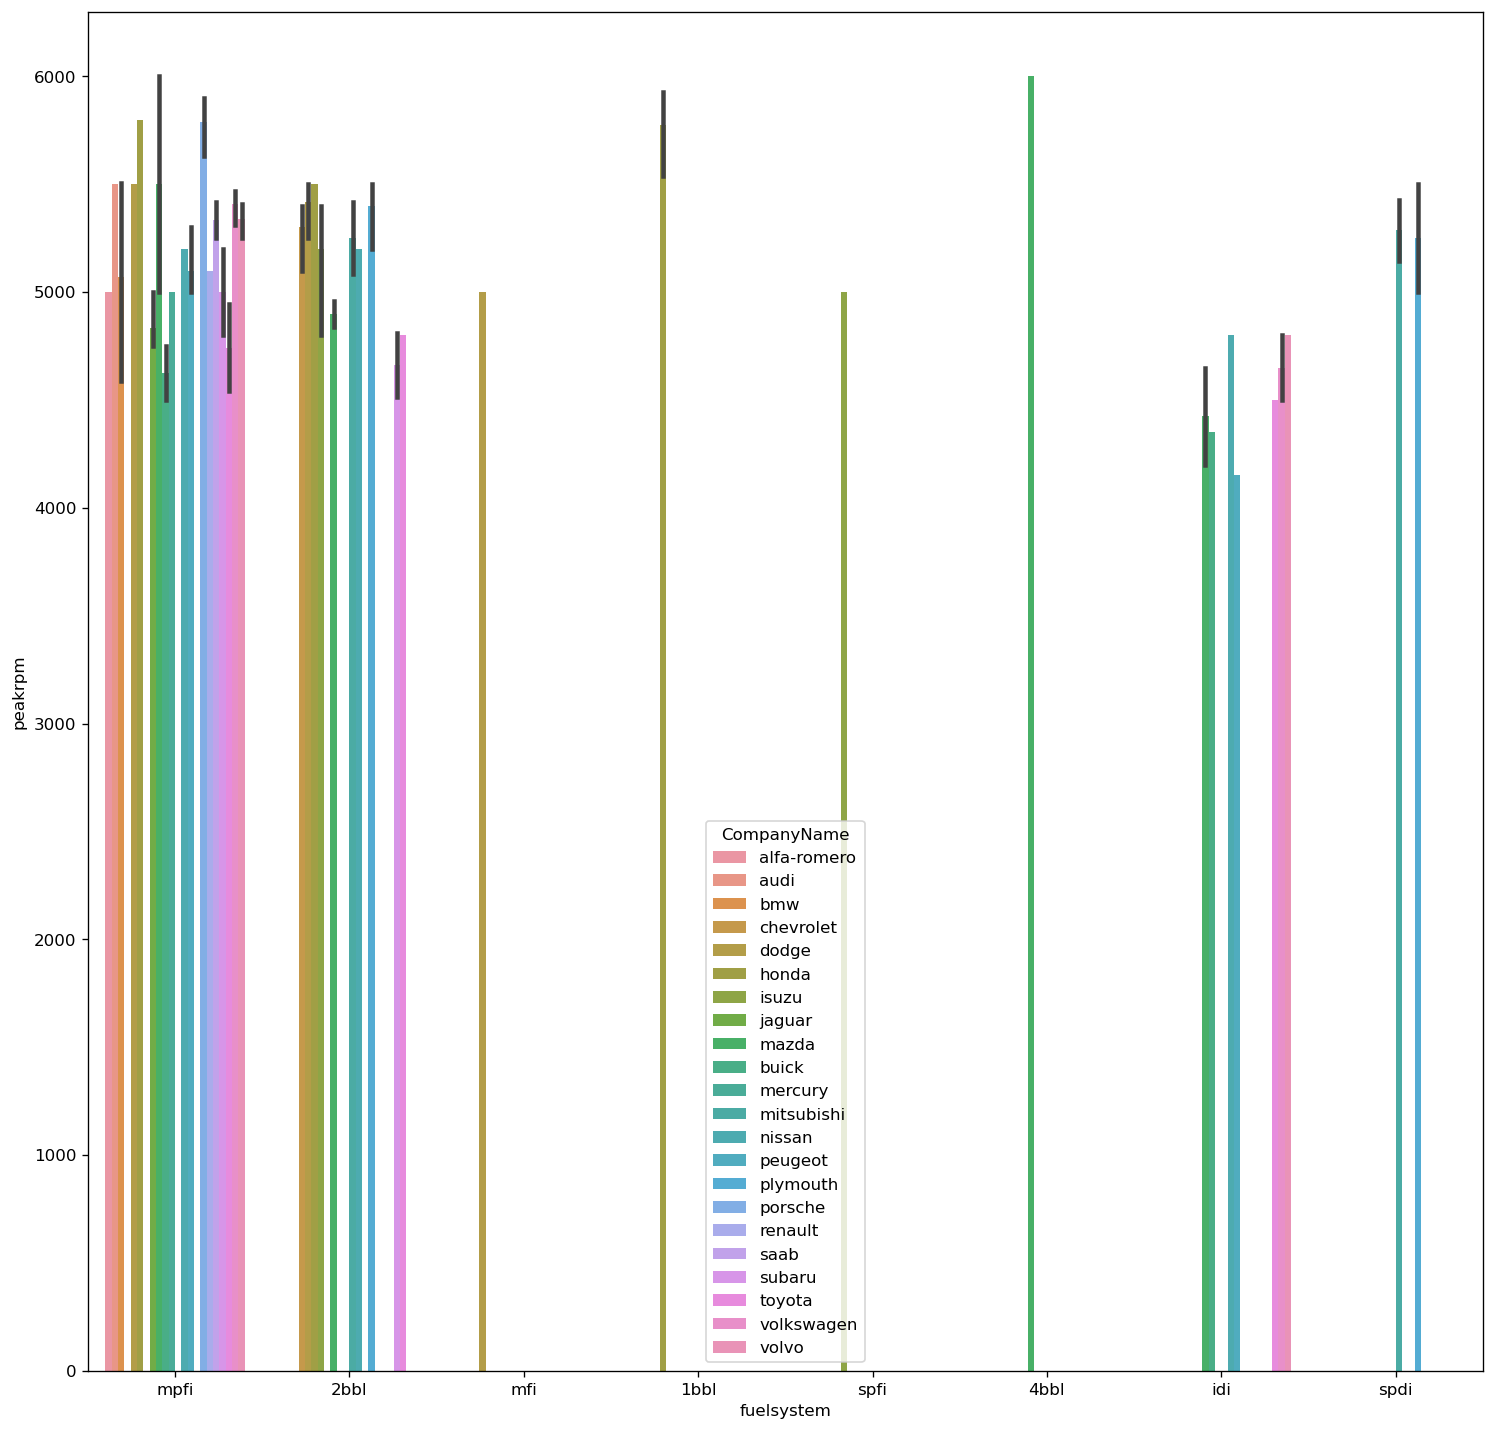

In [133]:
#Realtionship between fuelsystem and peakrpm:
plt.figure(figsize=(15,15),dpi=120)
sns.barplot(x="fuelsystem",y="peakrpm",hue="CompanyName",data=data)

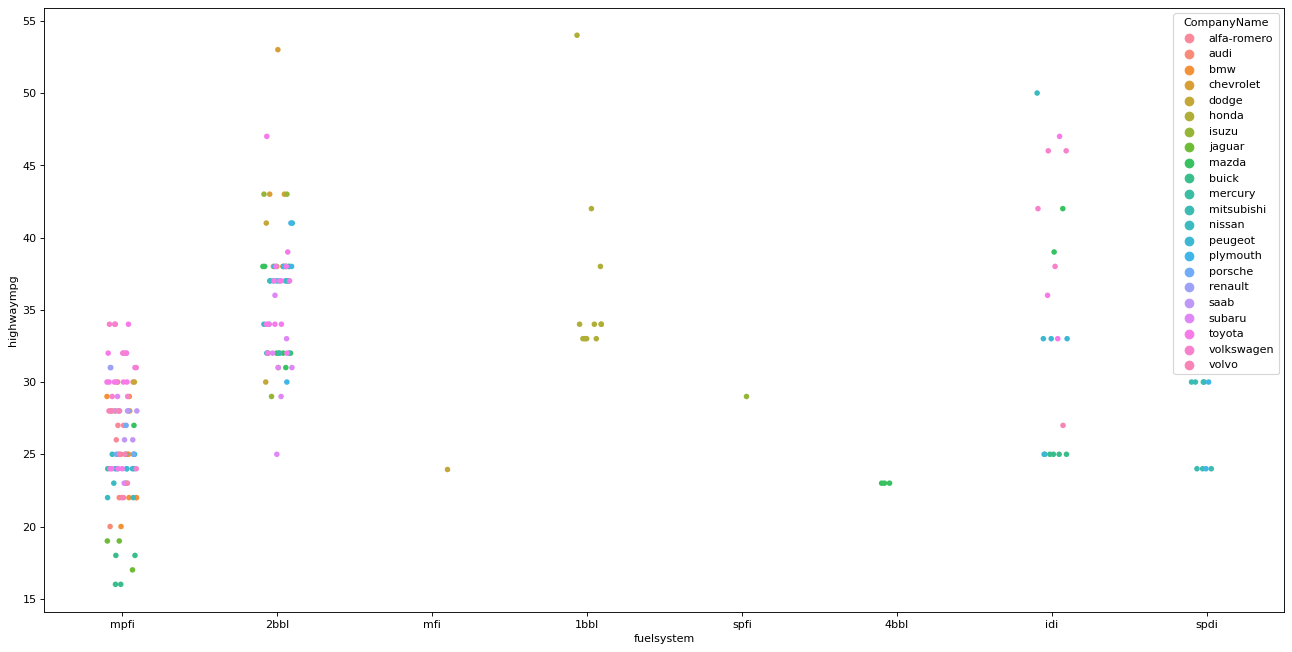

In [134]:
#Realtionship between fuelsystem and highwaympg:
plt.figure(figsize=(20,10),dpi=80)
ax = sns.stripplot(x="fuelsystem", y="highwaympg",data=data,hue="CompanyName",jitter=True)

<Figure size 1800x2400 with 0 Axes>

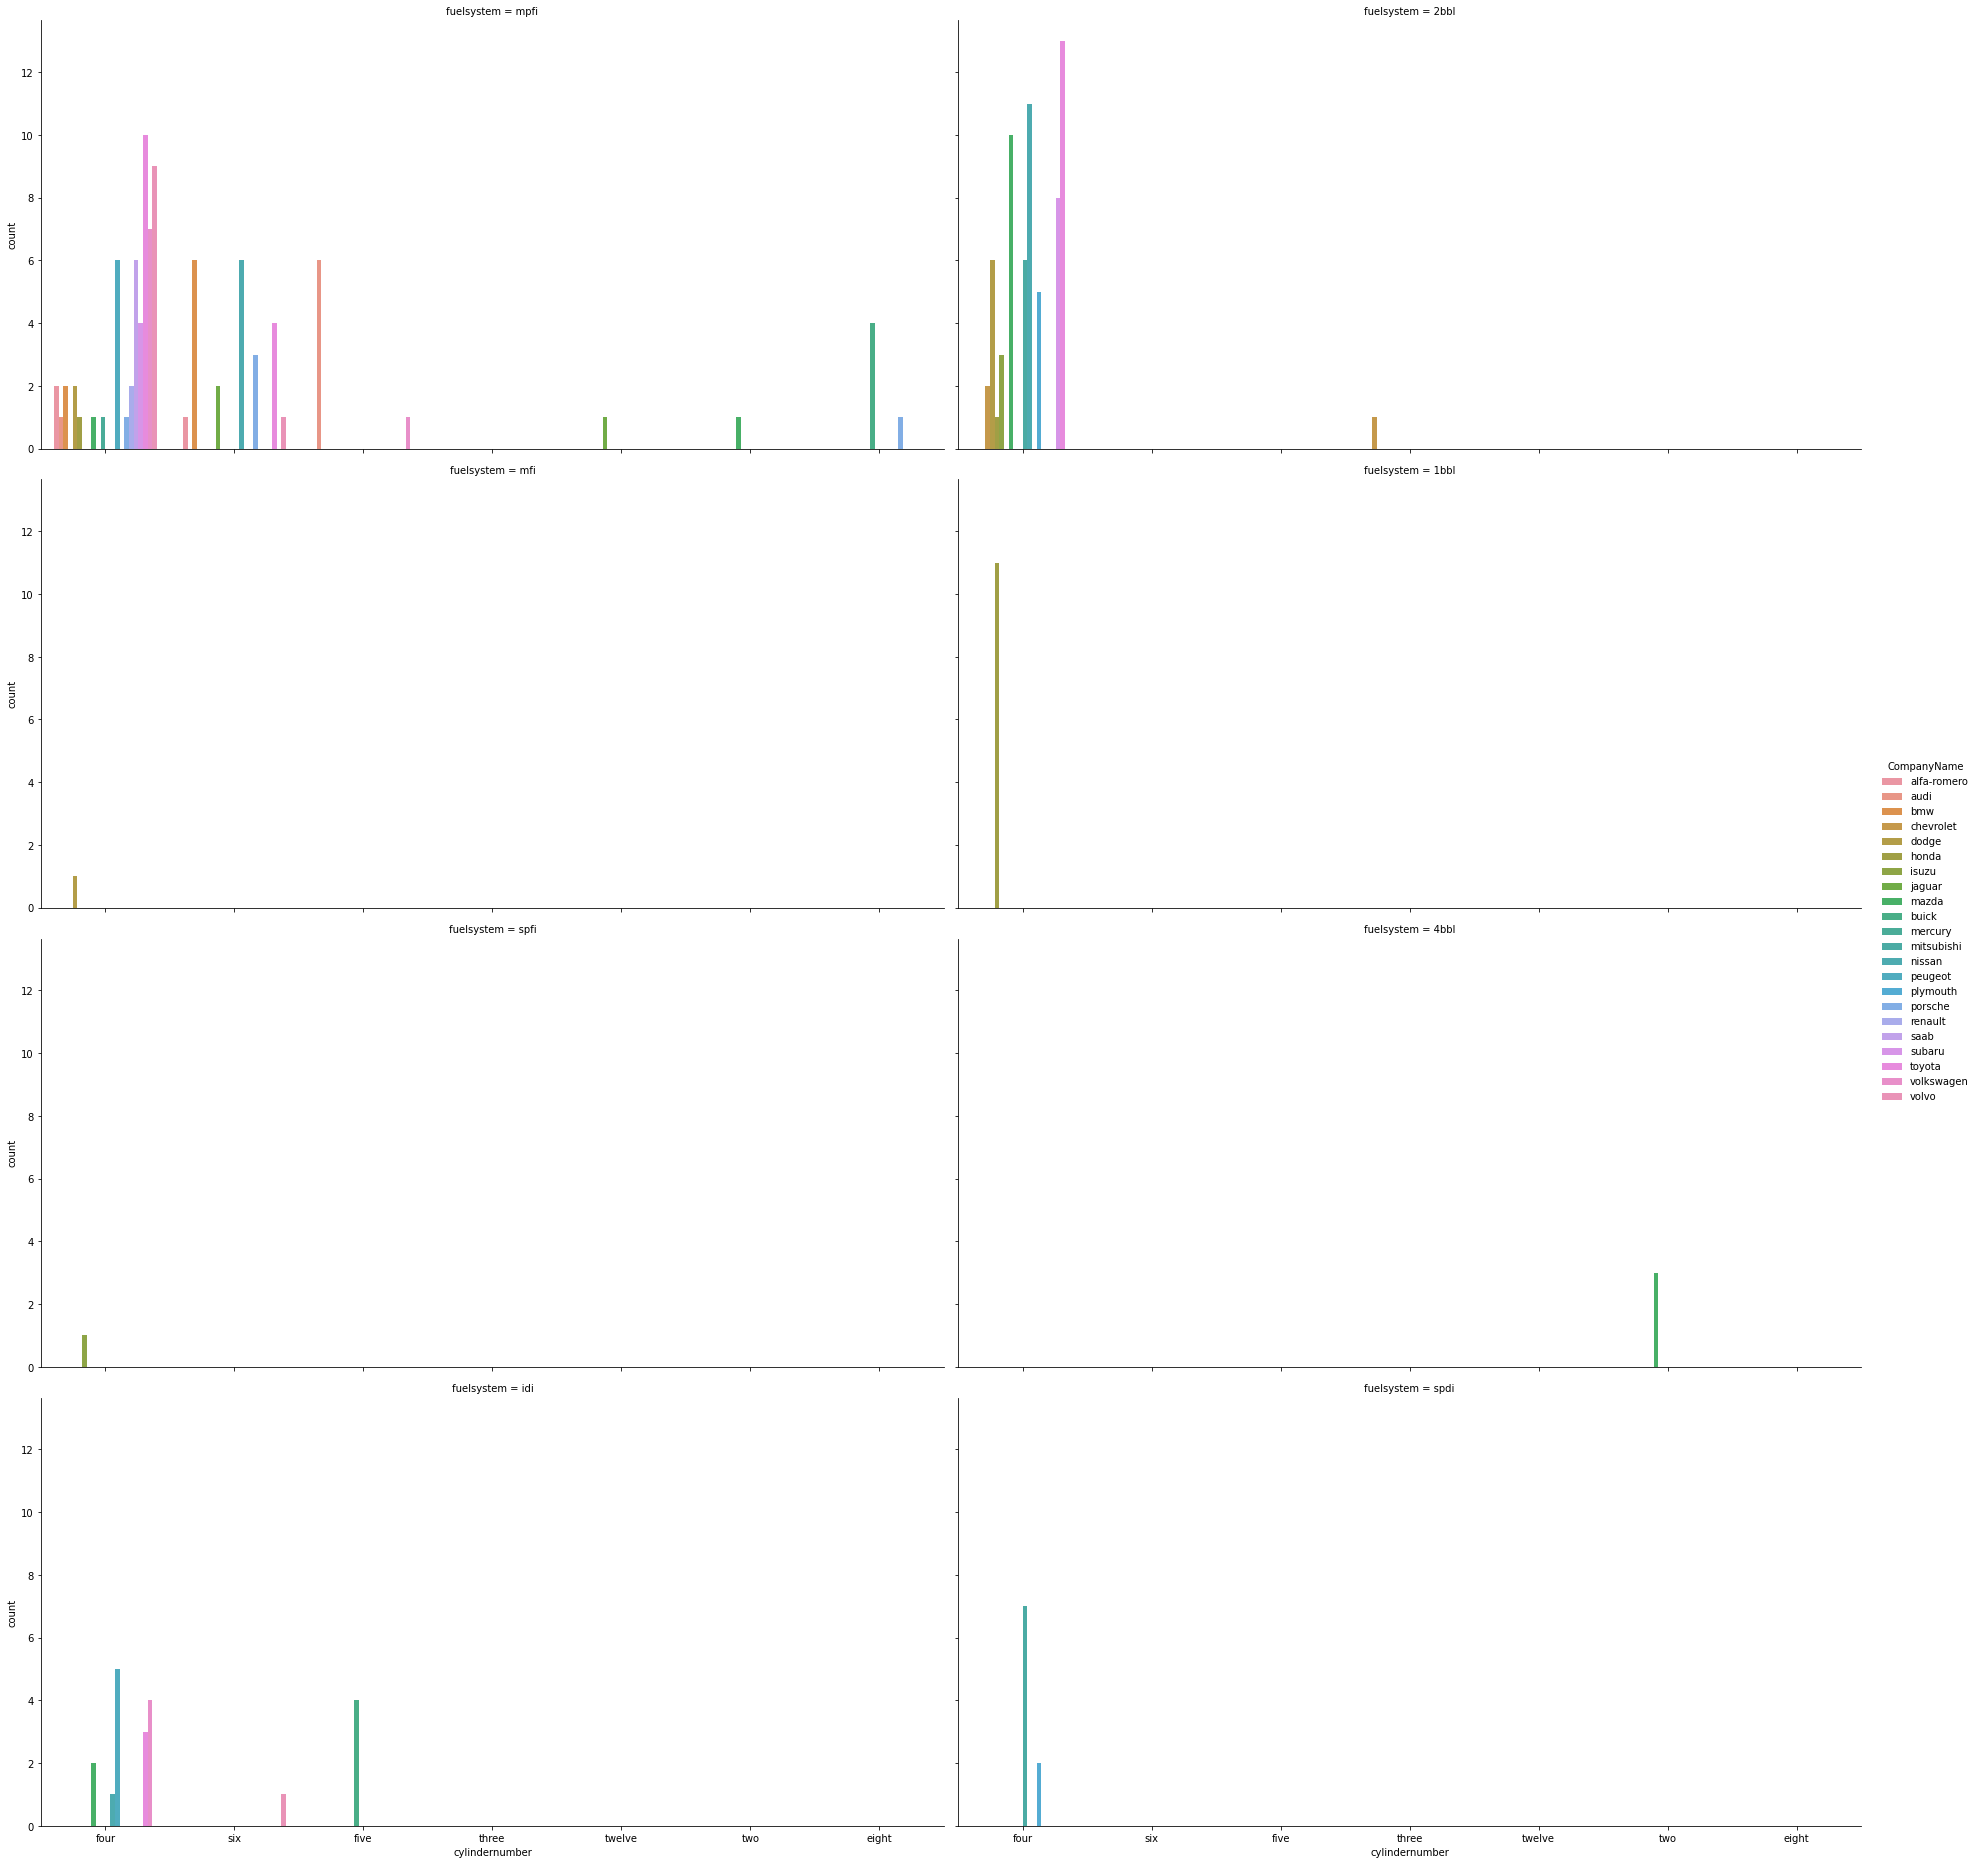

In [135]:
#Realtionship between fuelsystem and cylindernumber:
plt.figure(figsize=(15,20),dpi=120)
sns.catplot(x="cylindernumber", col="fuelsystem", col_wrap=2, data=data,
                kind="count", height=6.5, aspect=2,hue="CompanyName")

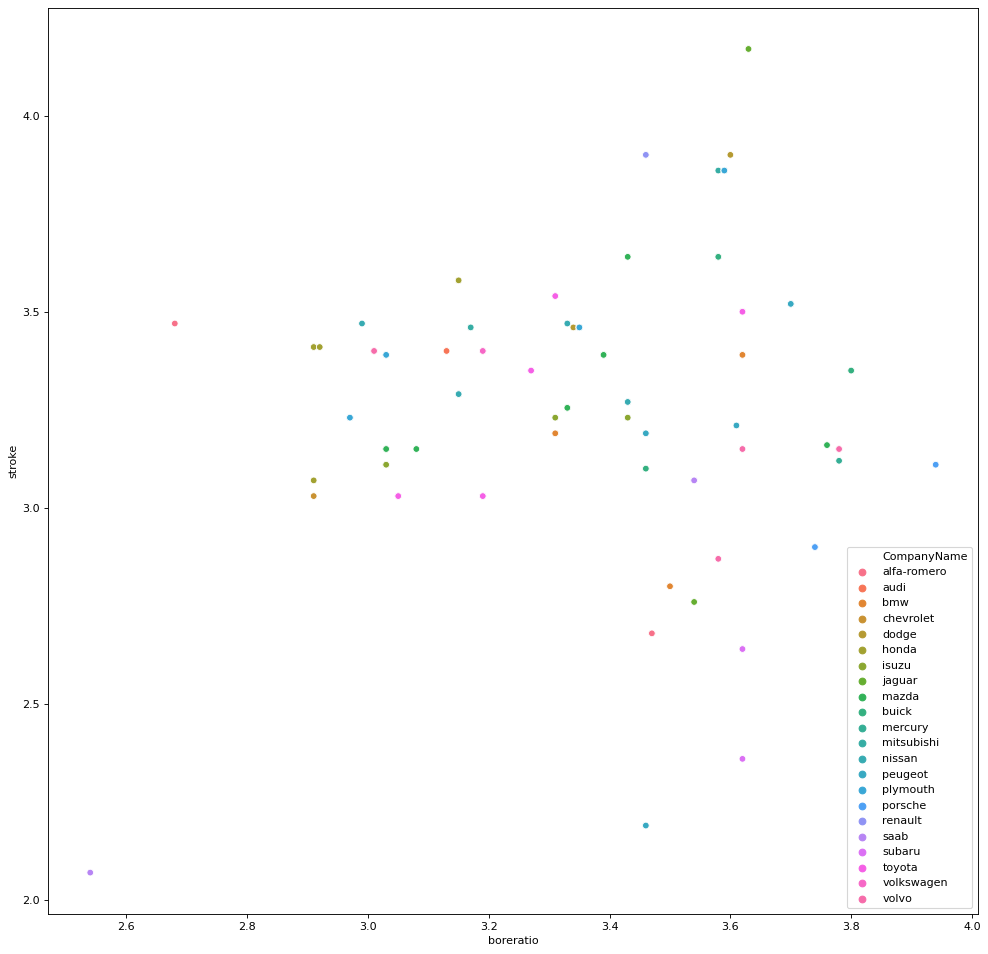

In [136]:
#Relationship between boreratio and stroke:
plt.figure(figsize=(15,15),dpi=80)
sns.scatterplot(x="boreratio",y="stroke",hue="CompanyName",data=data)

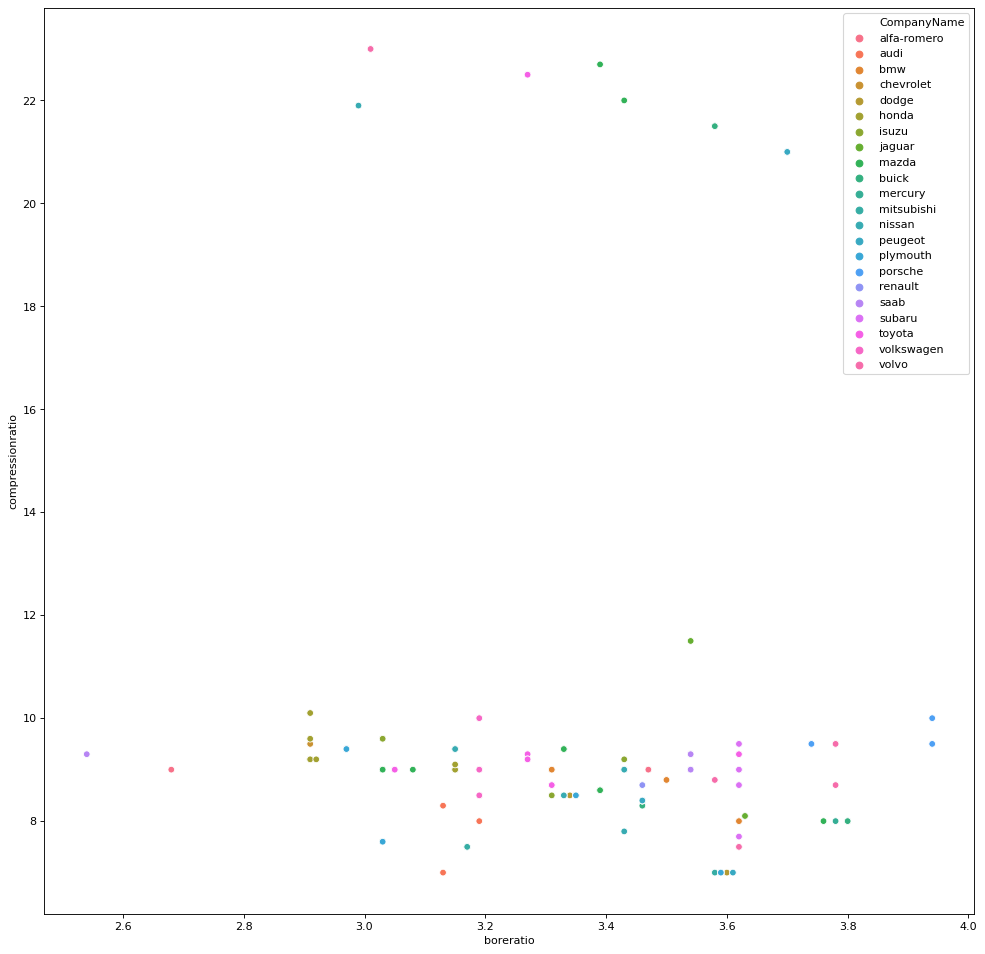

In [137]:
#Relationship between boreratio and compressionratio:
plt.figure(figsize=(15,15),dpi=80)
sns.scatterplot(x="boreratio",y="compressionratio",hue="CompanyName",data=data)

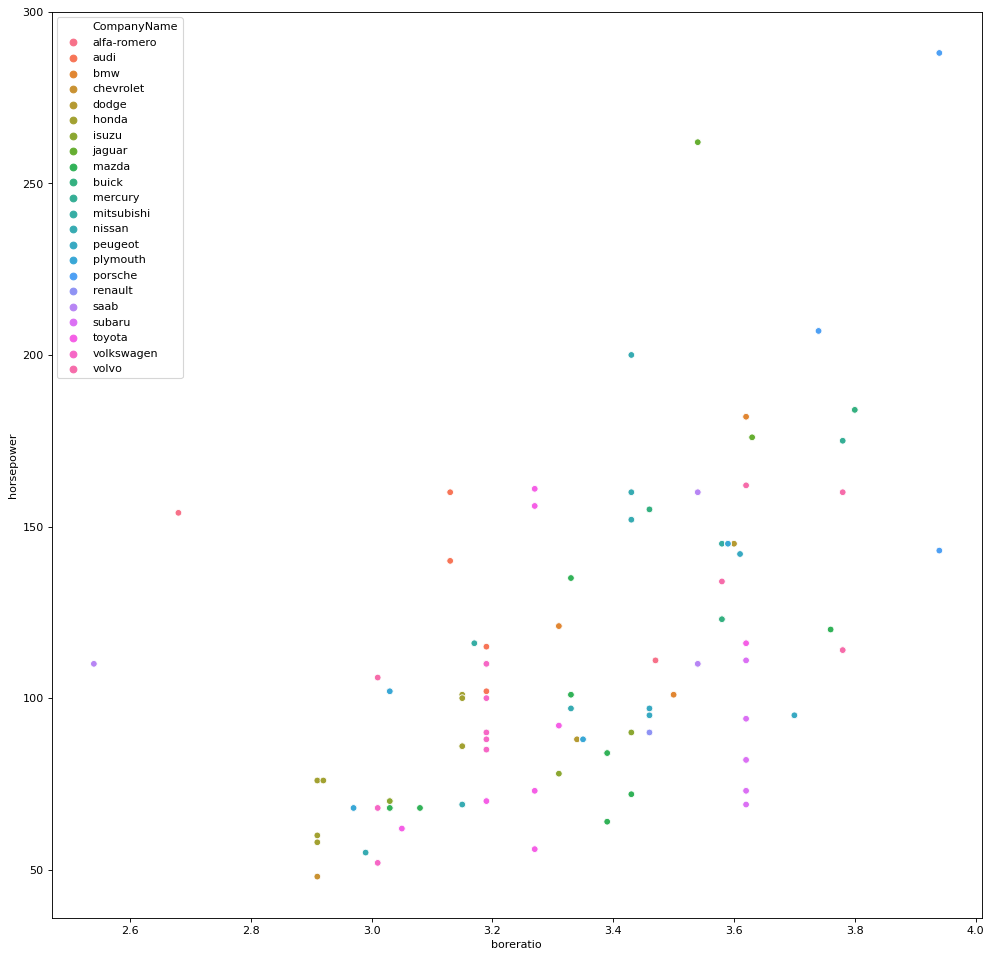

In [138]:
#Relationship between boreratio and horsepower:
plt.figure(figsize=(15,15),dpi=80)
sns.scatterplot(x="boreratio",y="horsepower",hue="CompanyName",data=data)

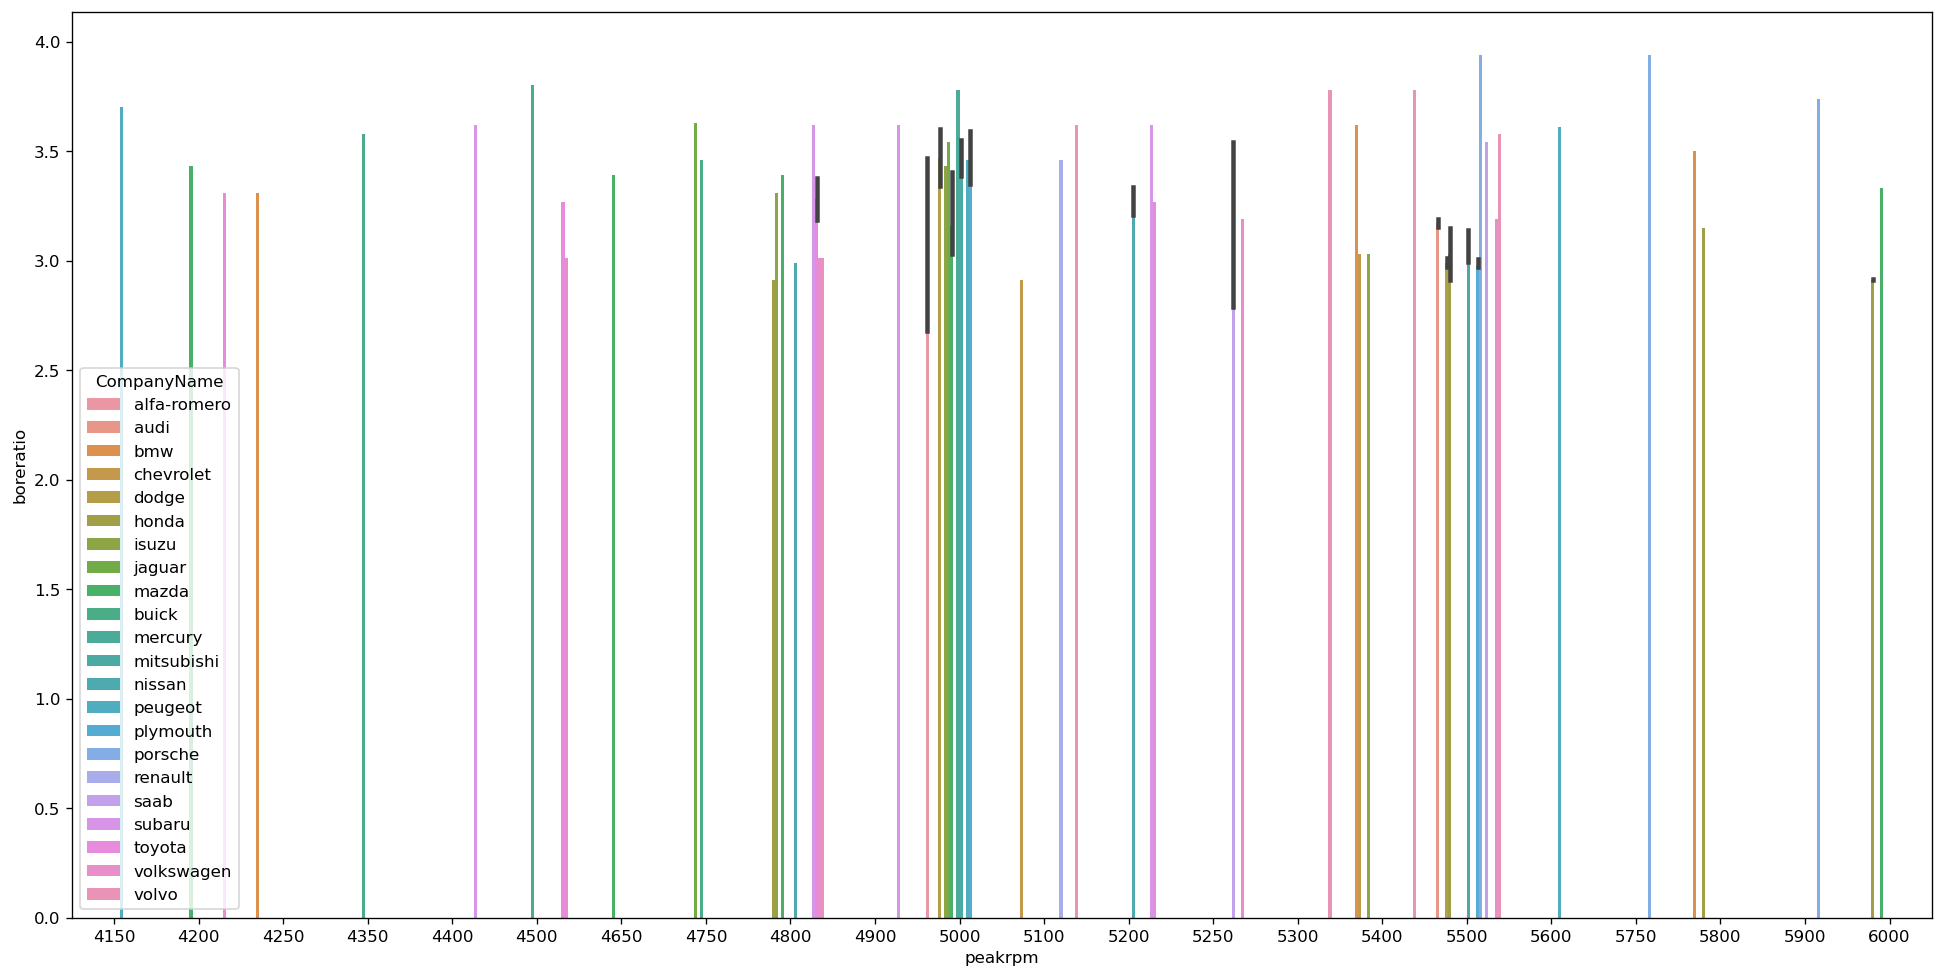

In [139]:
#Relationship between boreratio and peakrpm:
plt.figure(figsize=(20,10),dpi=120)
sns.barplot(x="peakrpm",y="boreratio",hue="CompanyName",data=data)

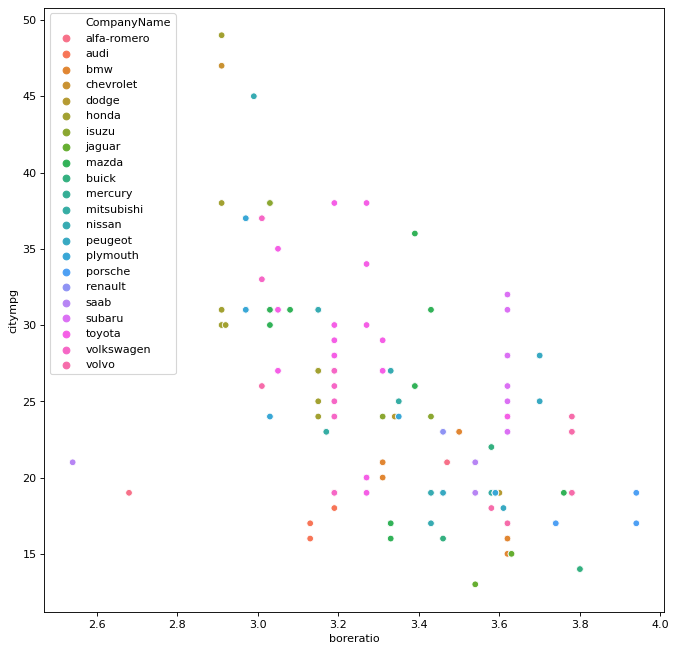

In [140]:
#Relationship between boreratio and citympg:
plt.figure(figsize=(10,10),dpi=80)
sns.scatterplot(x="boreratio",y="citympg",hue="CompanyName",data=data)

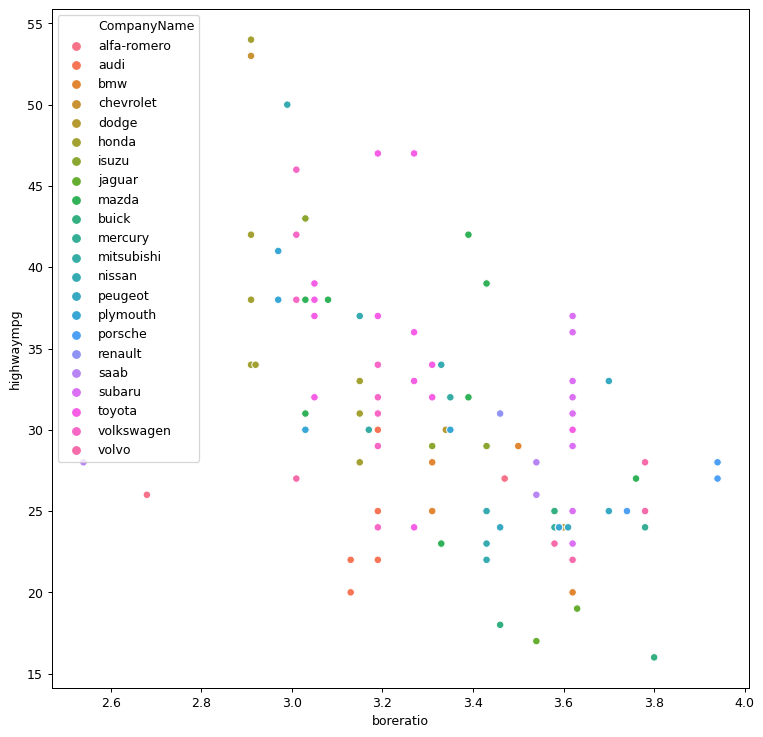

In [141]:
#Relationship between boreratio and highwaympg:
plt.figure(figsize=(10,10),dpi=90)
sns.scatterplot(x="boreratio",y="highwaympg",hue="CompanyName",data=data)

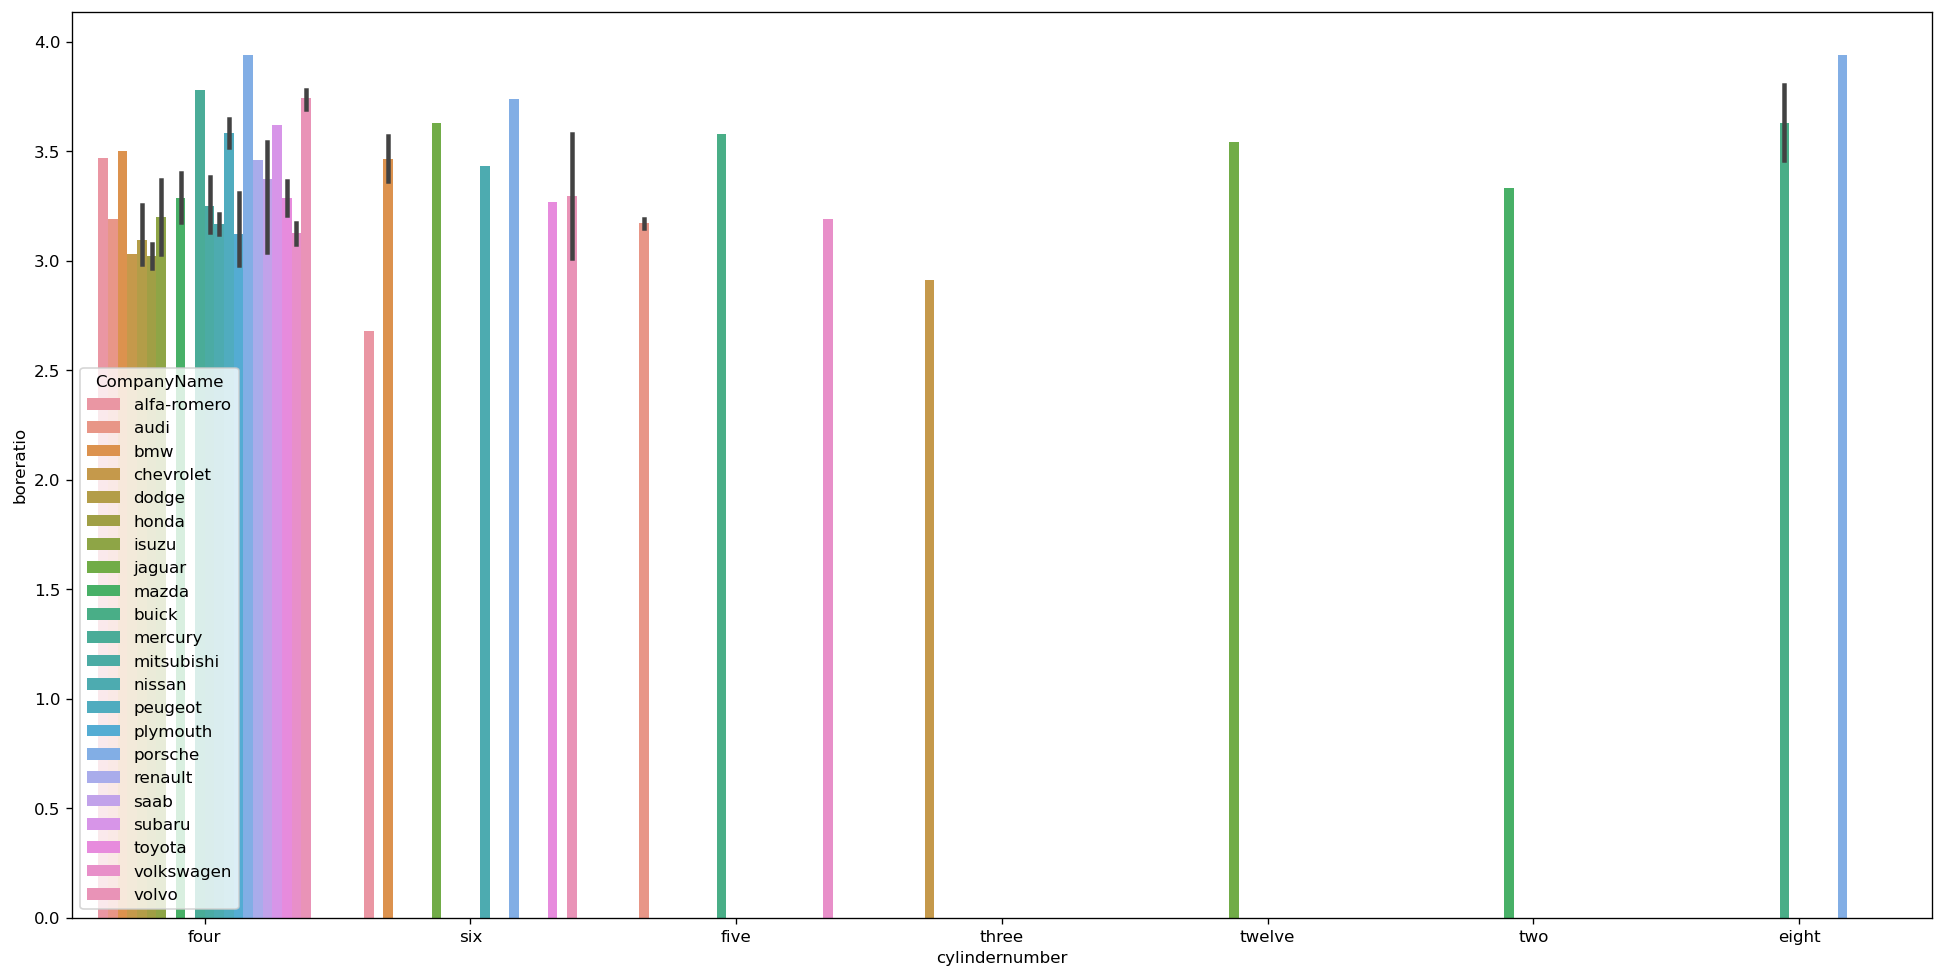

In [142]:
#Relationship between boreratio and cylindernumber:
plt.figure(figsize=(20,10),dpi=120)
sns.barplot(x="cylindernumber",y="boreratio",hue="CompanyName",data=data)

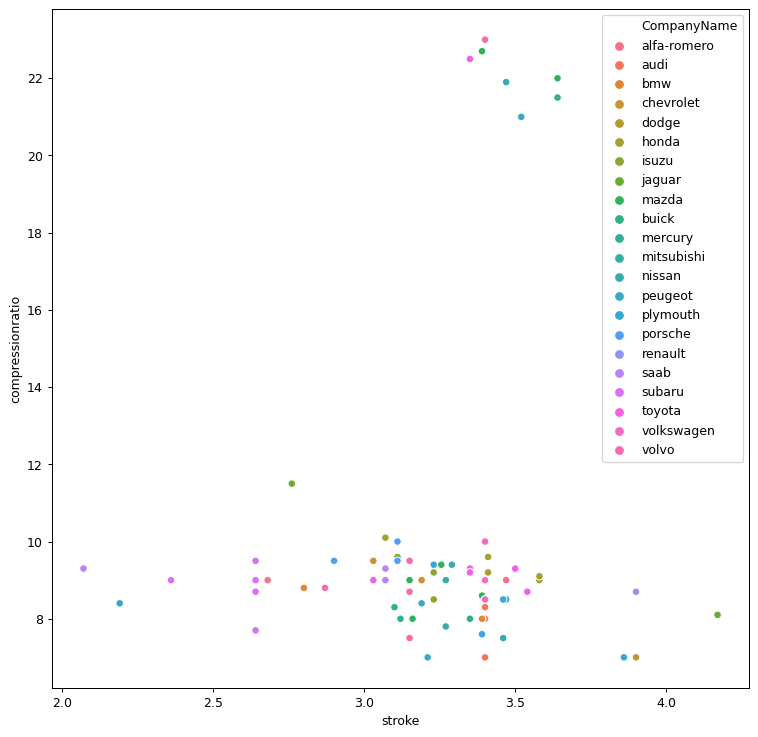

In [143]:
#Relationship between stroke and compressionratio:
plt.figure(figsize=(10,10),dpi=90)
sns.scatterplot(x="stroke",y="compressionratio",hue="CompanyName",data=data)

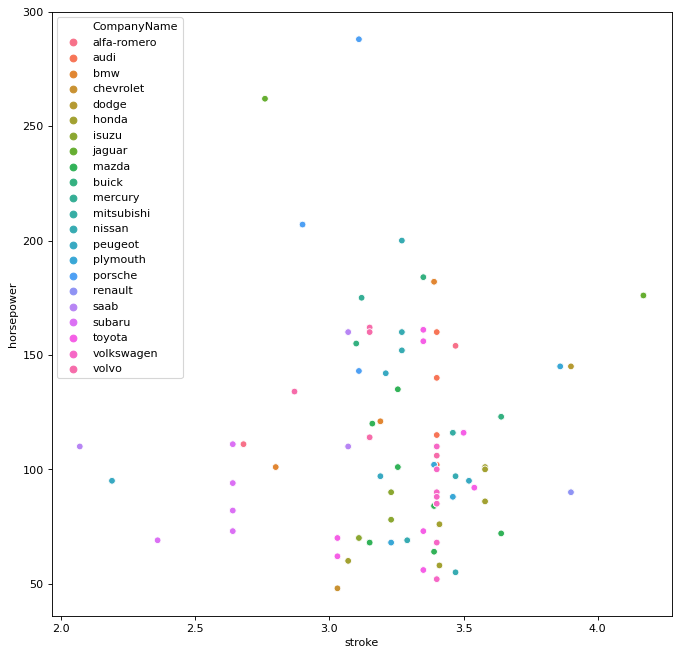

In [144]:
#Relationship between stroke and horsepower:
plt.figure(figsize=(10,10),dpi=80)
sns.scatterplot(x="stroke",y="horsepower",hue="CompanyName",data=data)

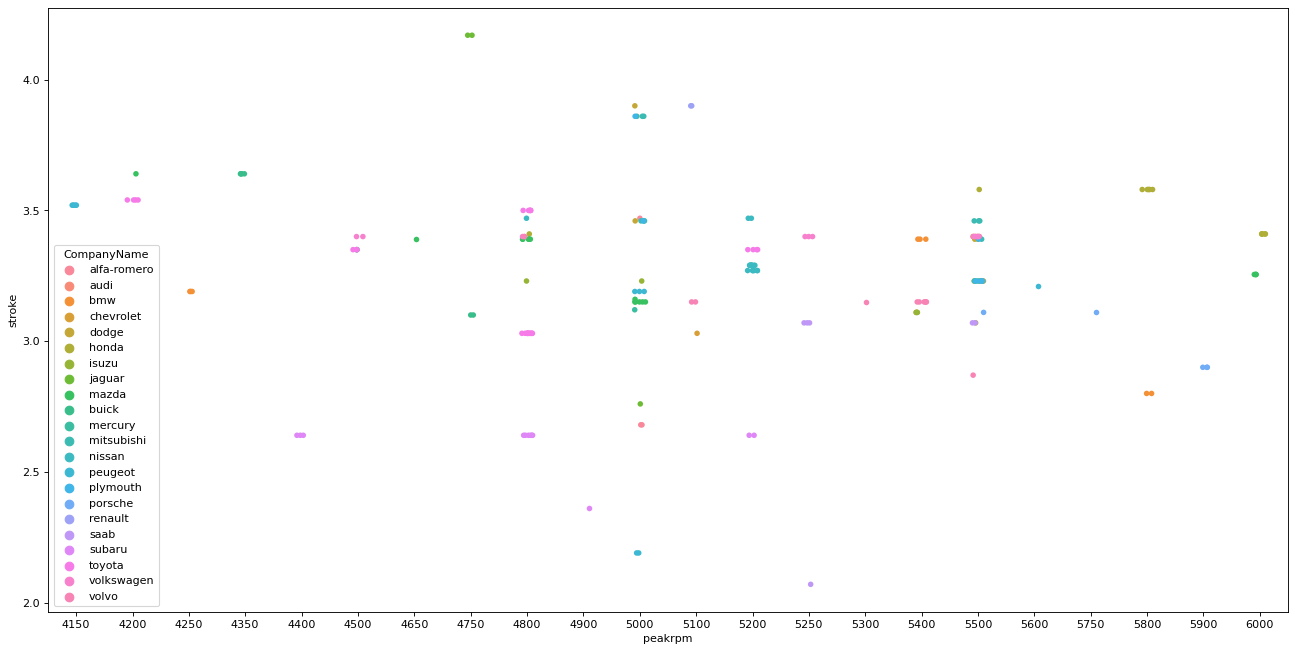

In [145]:
#Relationship between Stroke and peakrpm:
plt.figure(figsize=(20,10),dpi=80)
ax = sns.stripplot(x="peakrpm", y="stroke",data=data,hue="CompanyName",jitter=True)

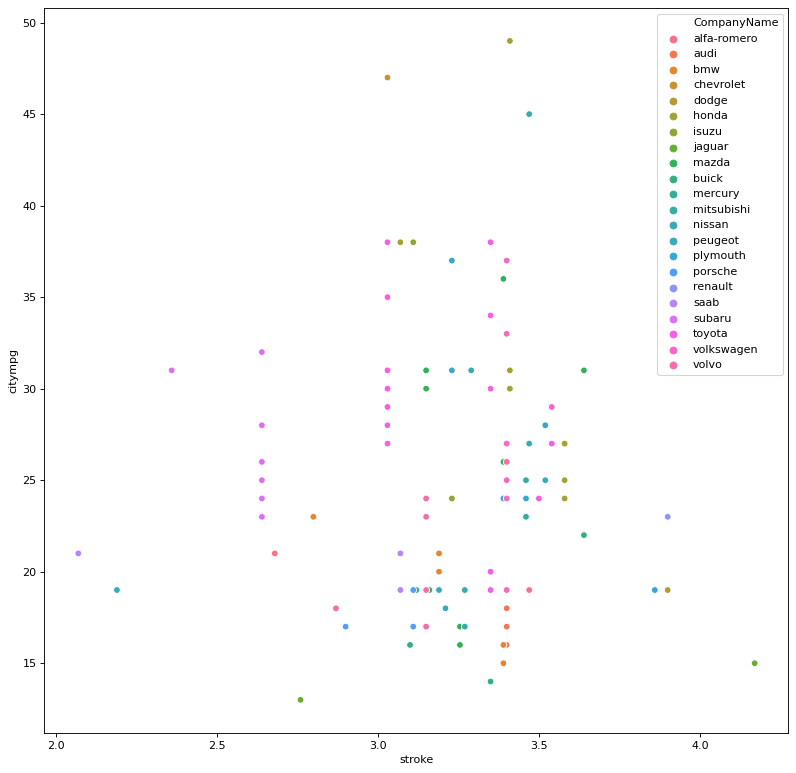

In [146]:
#Relationship between Stroke and Citympg:
plt.figure(figsize=(12,12),dpi=80)
sns.scatterplot(x="stroke",y="citympg",hue="CompanyName",data=data)

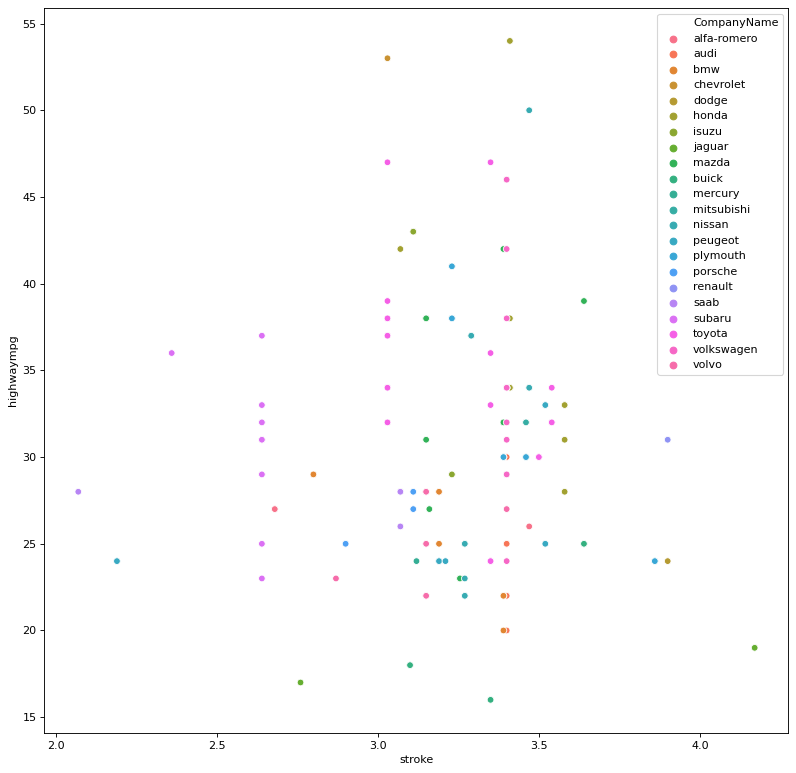

In [147]:
#Relationship between Stroke and Highwaympg:
plt.figure(figsize=(12,12),dpi=80)
sns.scatterplot(x="stroke",y="highwaympg",hue="CompanyName",data=data)

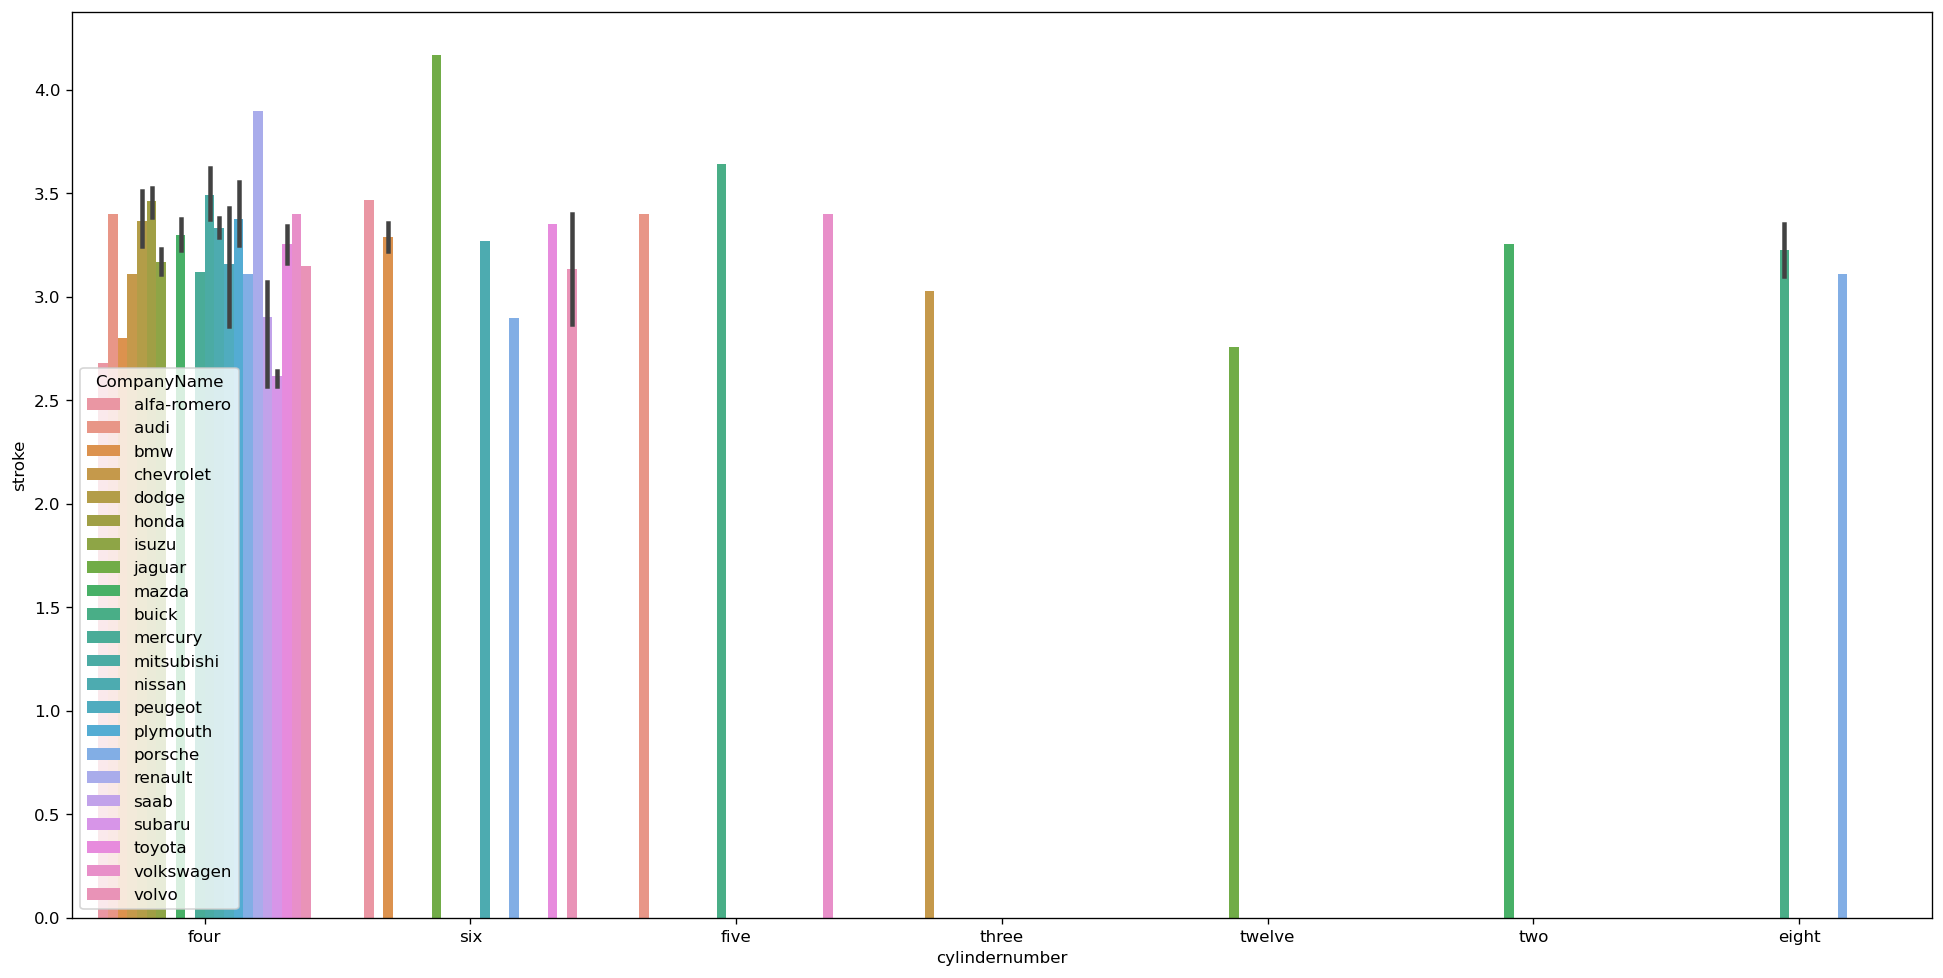

In [148]:
#Relationship between Stroke and CylinderNumber:
plt.figure(figsize=(20,10),dpi=120)
sns.barplot(x="cylindernumber",y="stroke",hue="CompanyName",data=data)

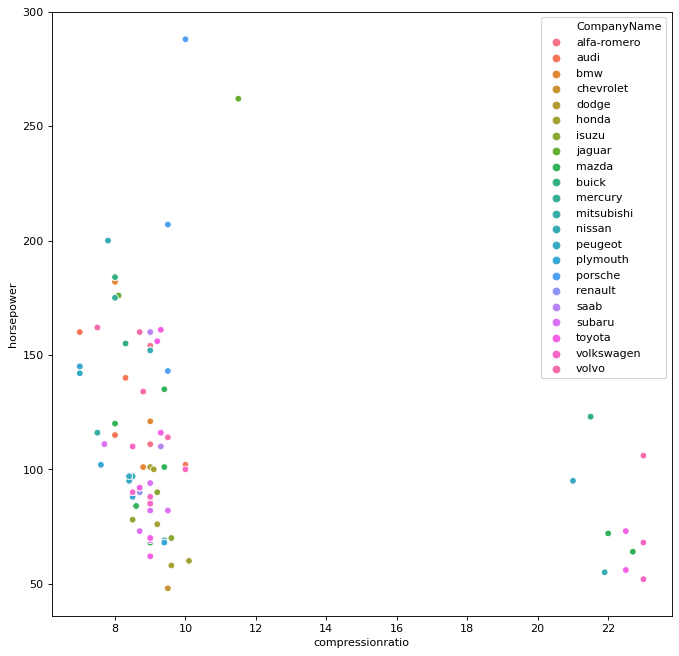

In [149]:
#Relationship between compressionratio and horsepower:
plt.figure(figsize=(10,10),dpi=80)
sns.scatterplot(x="compressionratio",y="horsepower",hue="CompanyName",data=data)

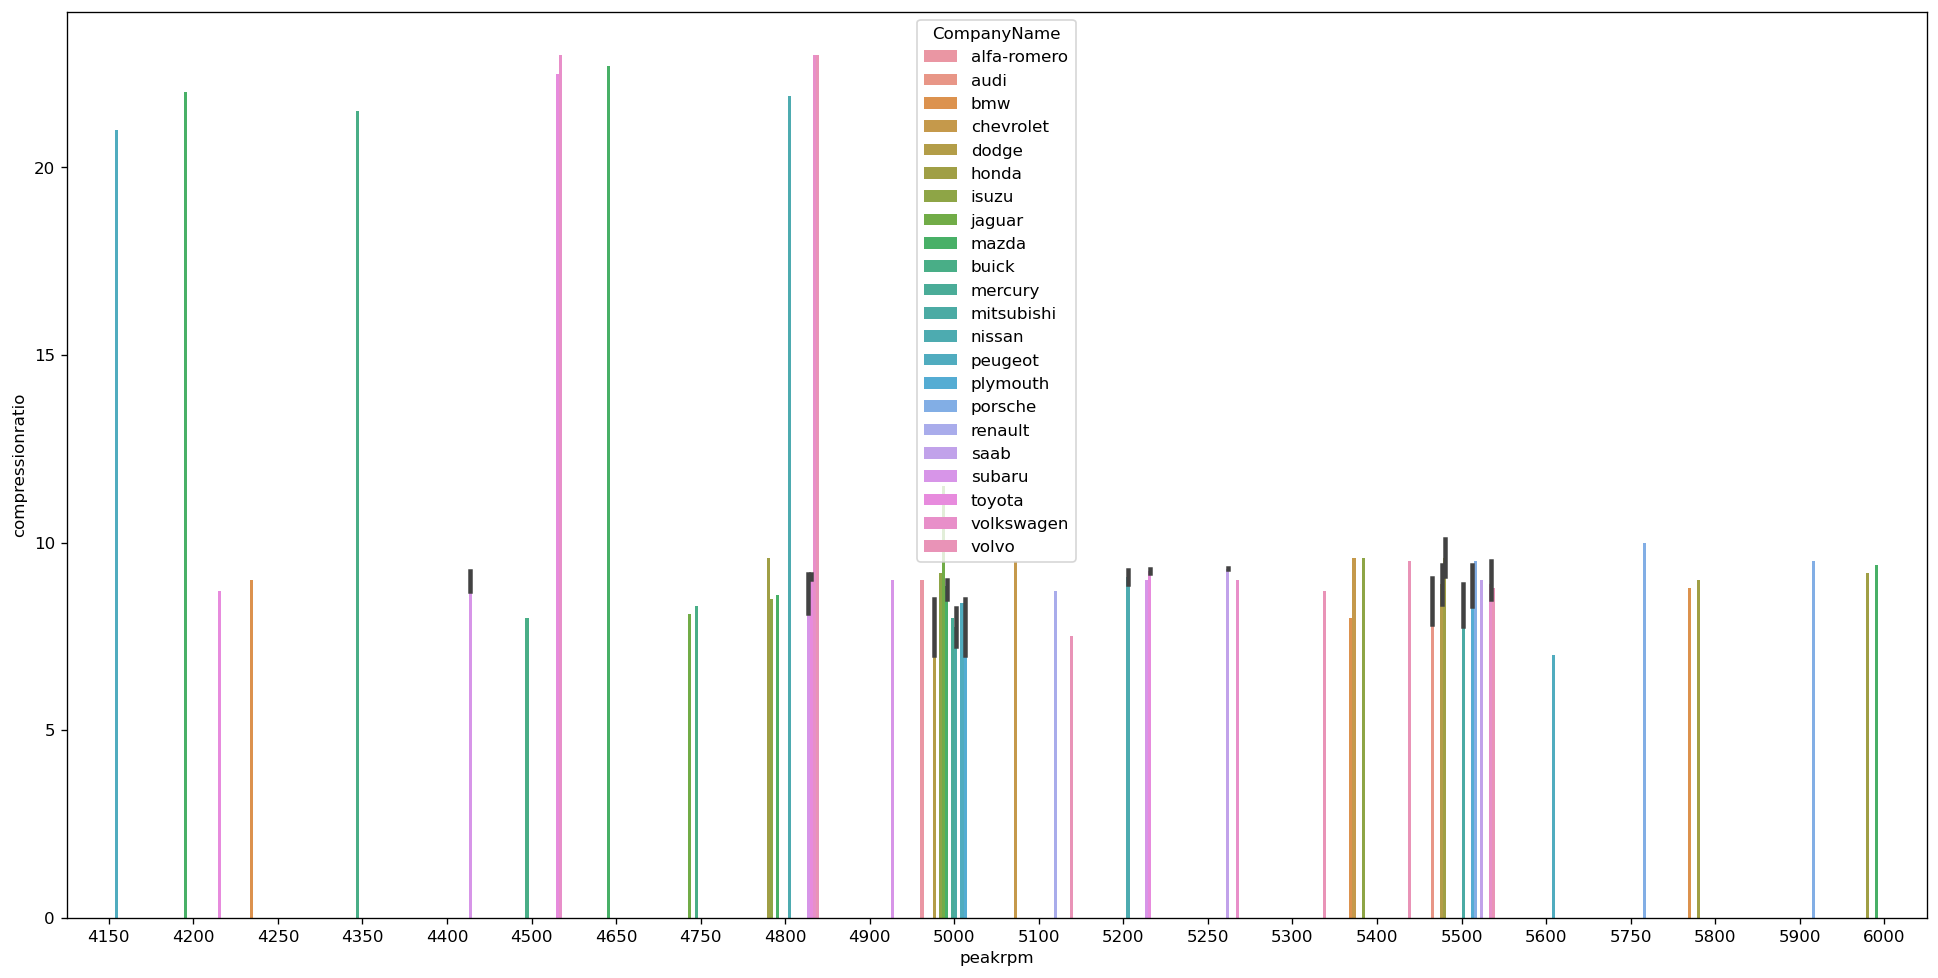

In [150]:
#Relationship between Compressionratio and Peakrpm:
plt.figure(figsize=(20,10),dpi=120)
sns.barplot(x="peakrpm",y="compressionratio",hue="CompanyName",data=data)

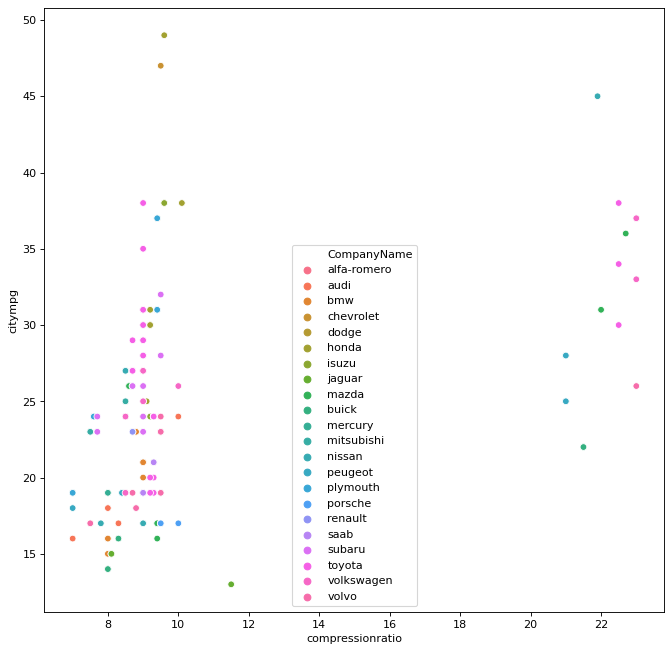

In [151]:
#Relationship between Compressionratio and Citympg:
plt.figure(figsize=(10,10),dpi=80)
sns.scatterplot(x="compressionratio",y="citympg",hue="CompanyName",data=data)

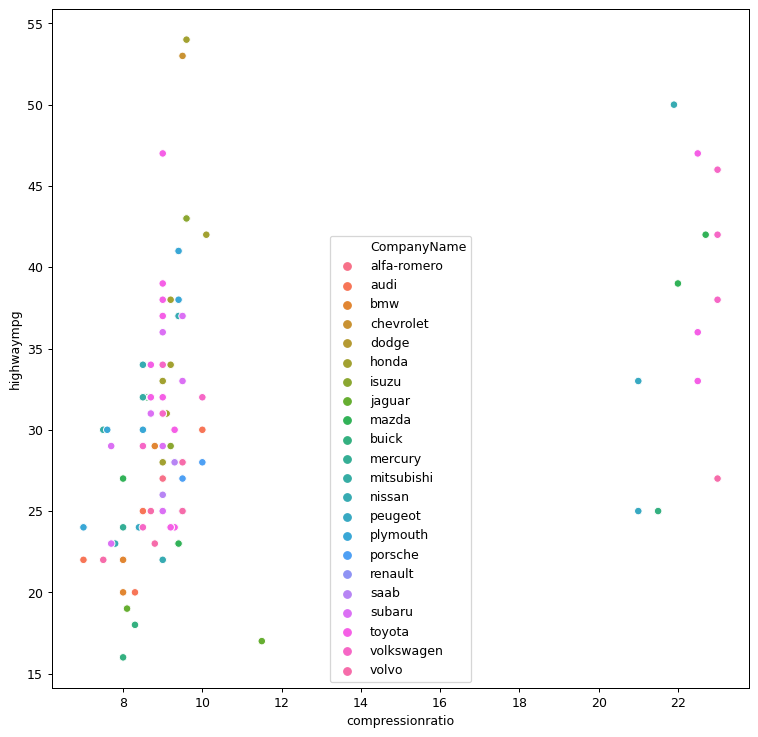

In [152]:
#Relationship between compressionratio and highwaympg:
plt.figure(figsize=(10,10),dpi=90)
sns.scatterplot(x="compressionratio",y="highwaympg",hue="CompanyName",data=data)

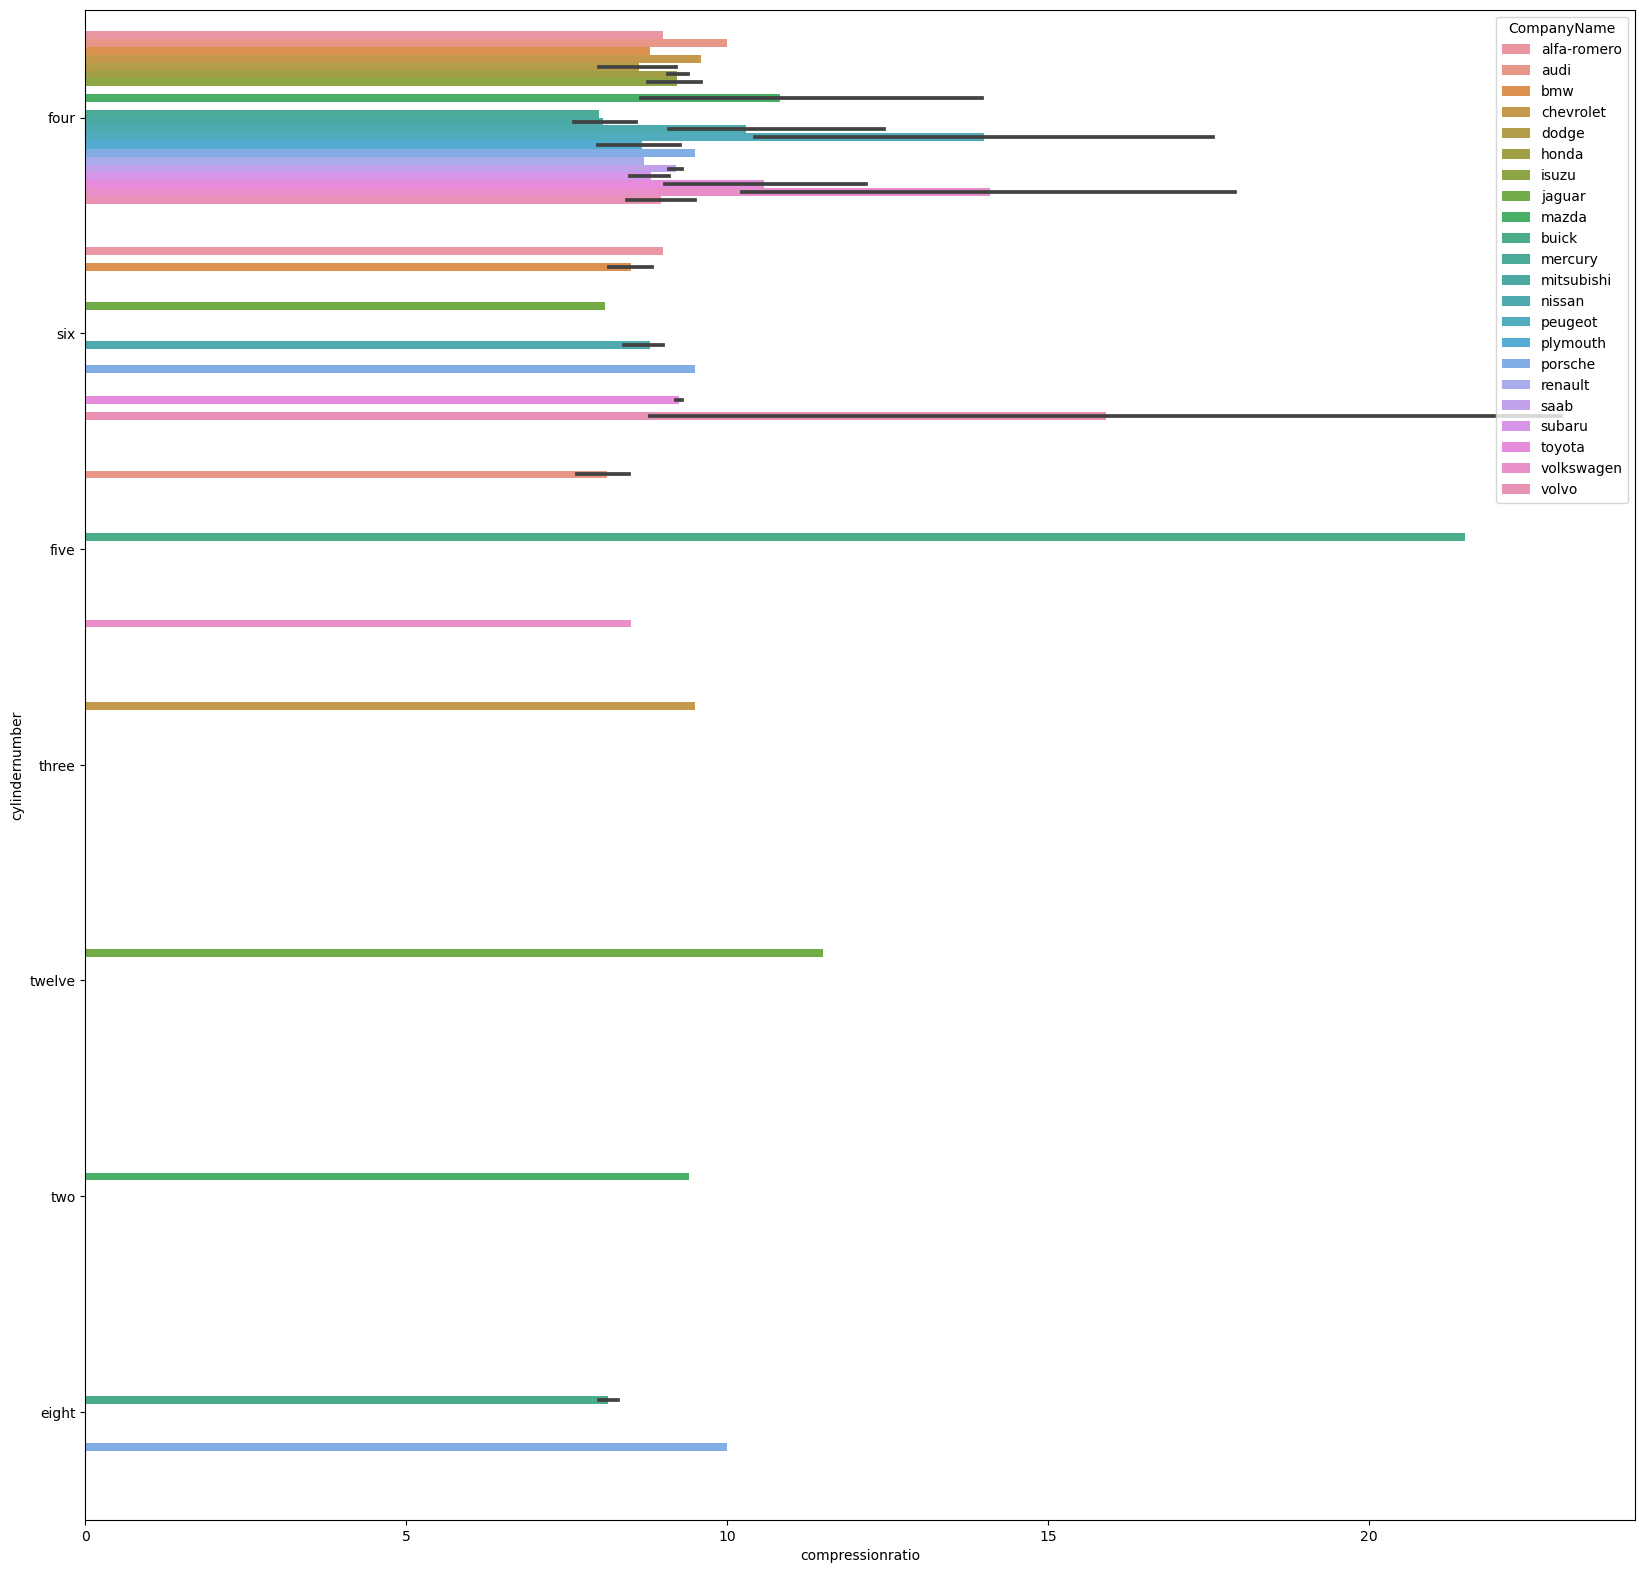

In [153]:
#Relationship between Compressionratio and Cylindernumber:
plt.figure(figsize=(20,20),dpi=100)
sns.barplot(x='compressionratio',y='cylindernumber',hue="CompanyName",data=data)

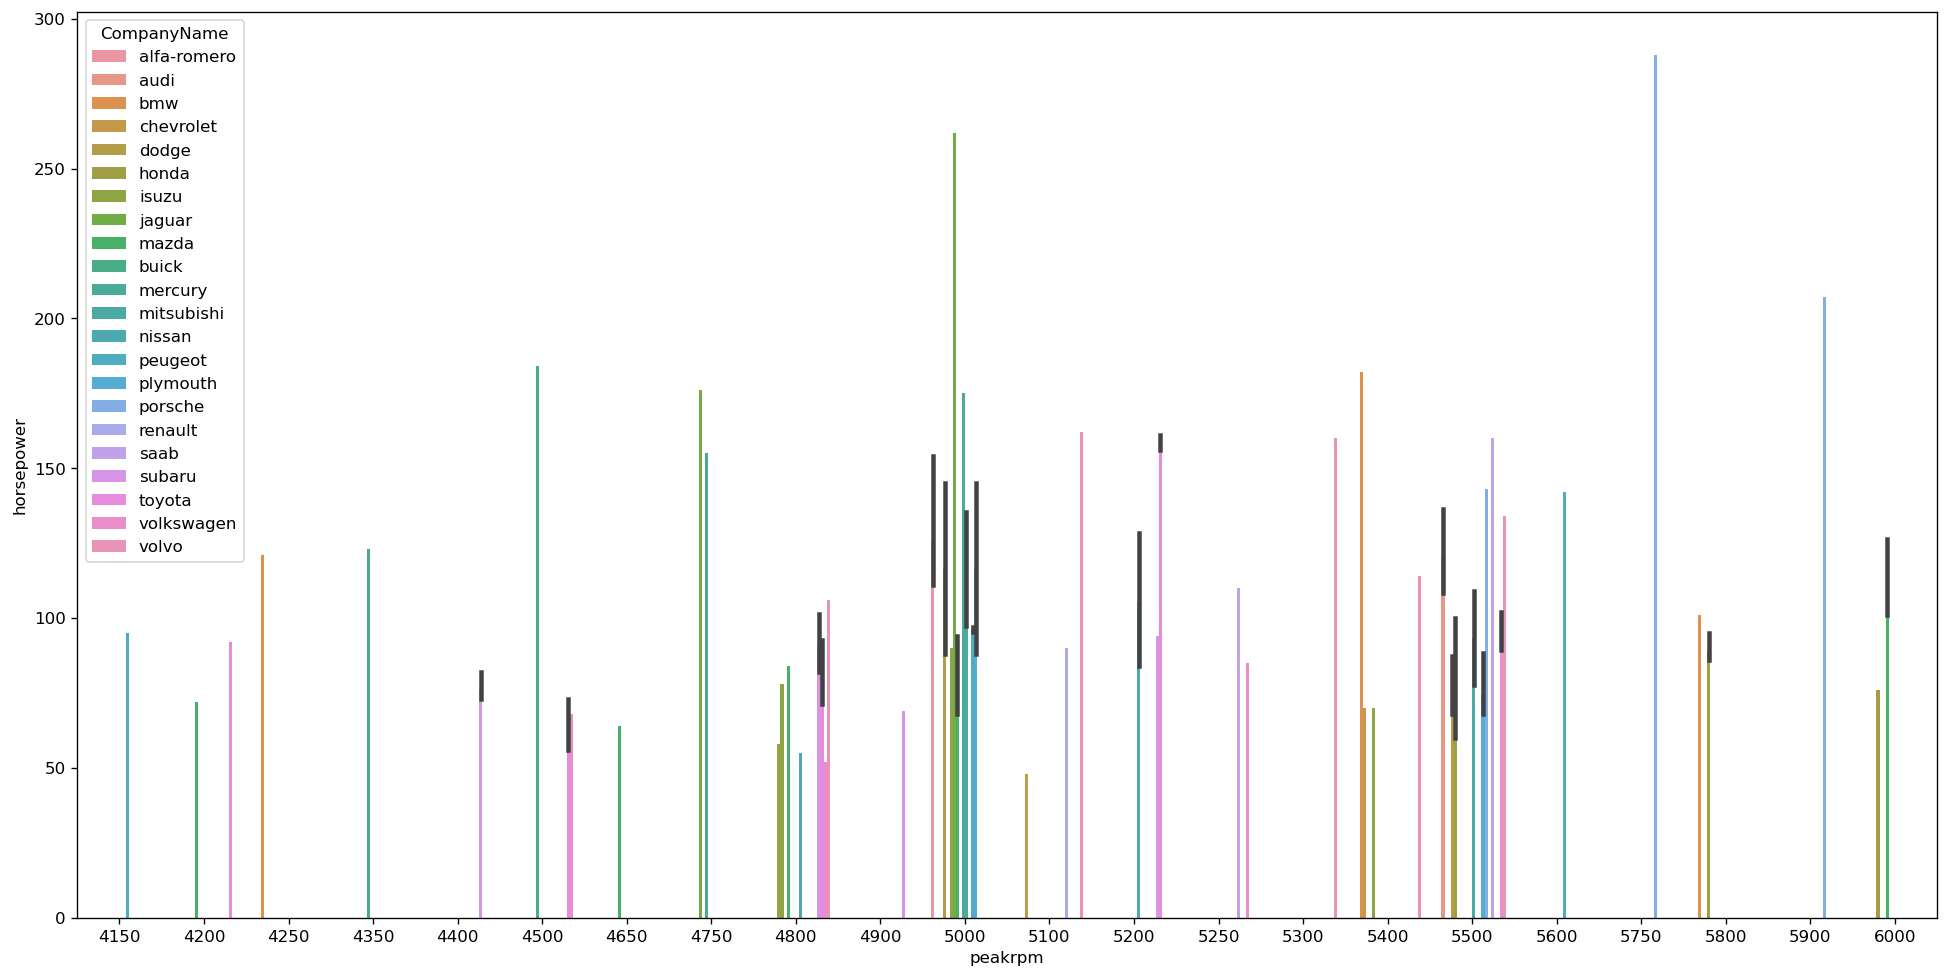

In [154]:
#Relationship between horsepower and peakrpm:
plt.figure(figsize=(20,10),dpi=120)
sns.barplot(x="peakrpm",y="horsepower",hue="CompanyName",data=data)

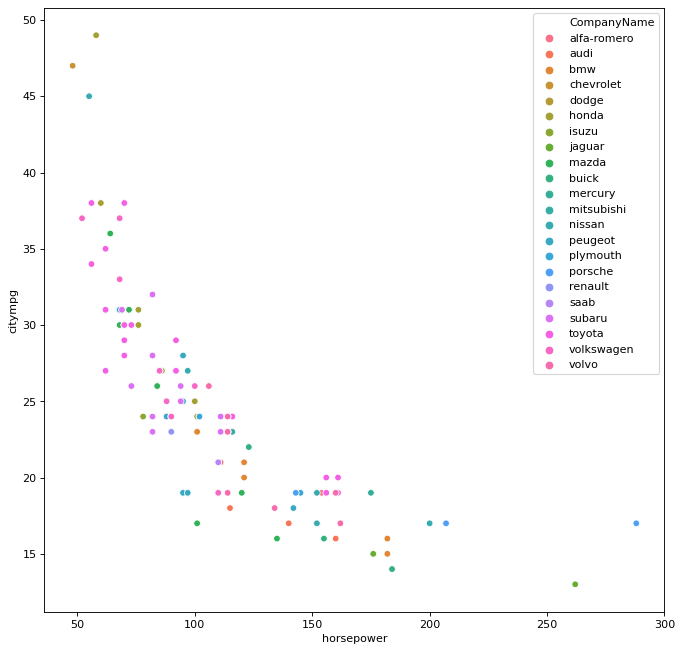

In [155]:
#Relationship between horsepower and citympg:
plt.figure(figsize=(10,10),dpi=80)
sns.scatterplot(x="horsepower",y="citympg",hue="CompanyName",data=data)

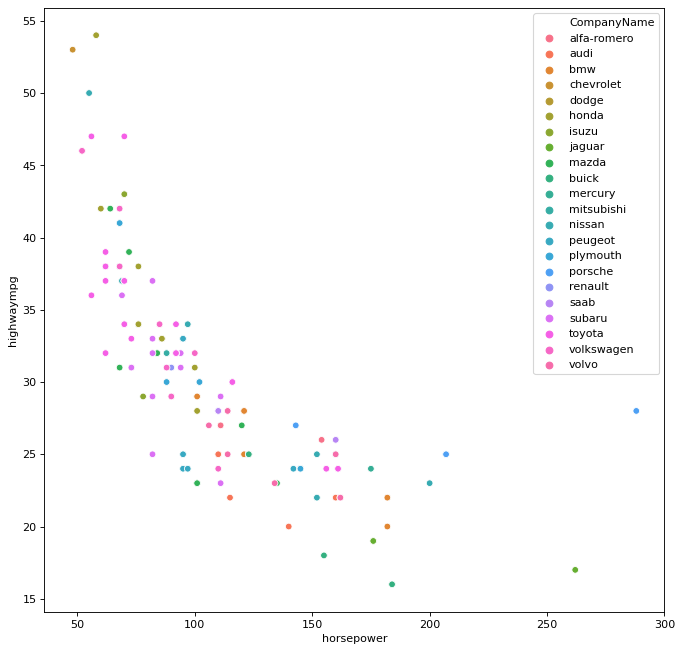

In [156]:
#Relationship between Horsepower and Highwaympg:
plt.figure(figsize=(10,10),dpi=80)
sns.scatterplot(x="horsepower",y="highwaympg",hue="CompanyName",data=data)

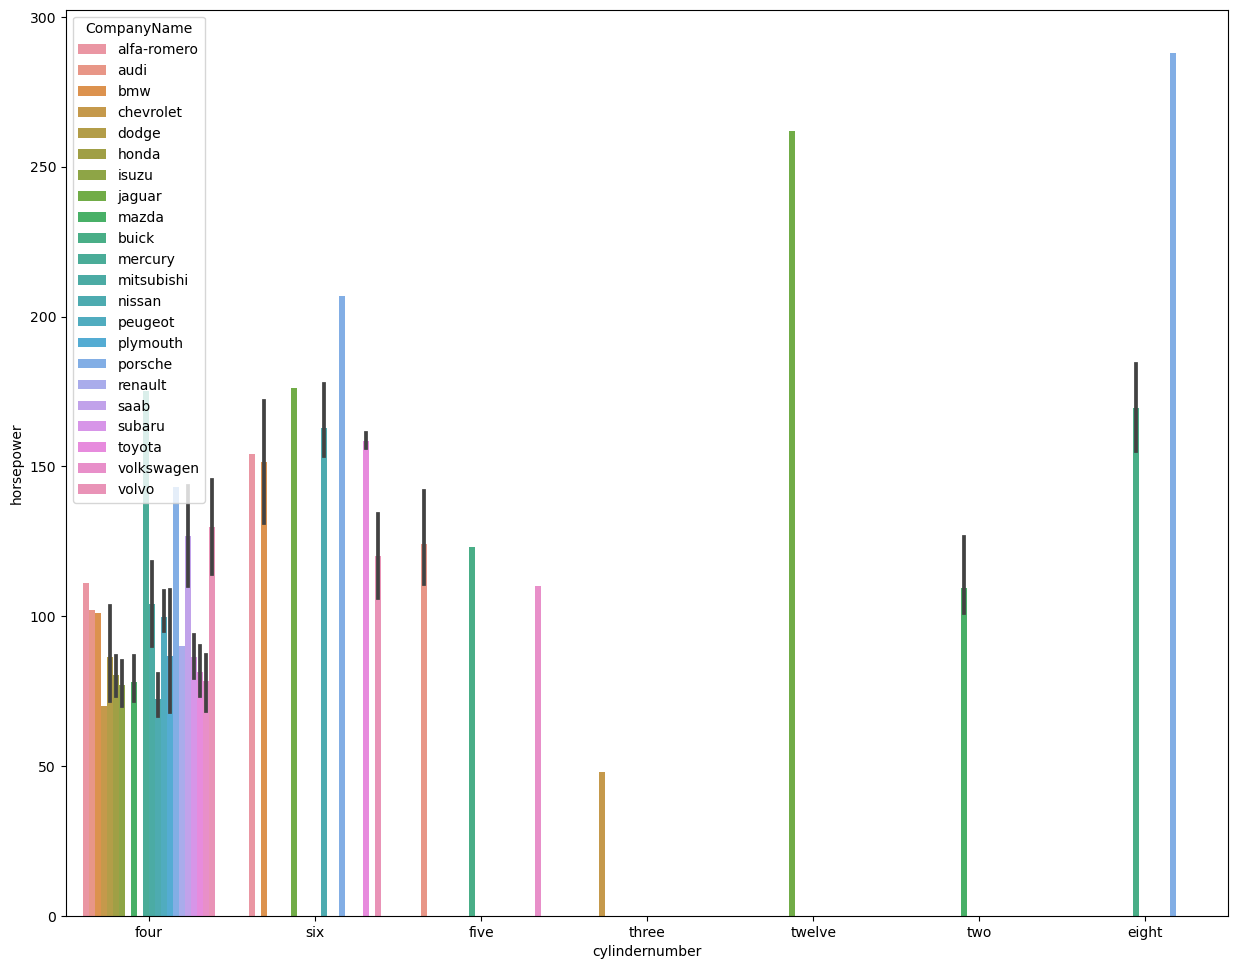

In [157]:
#Relationship Between Horsepower and CylinderNumber:
plt.figure(figsize=(15,12),dpi=100)
sns.barplot(x="cylindernumber",y="horsepower",hue="CompanyName",data=data)

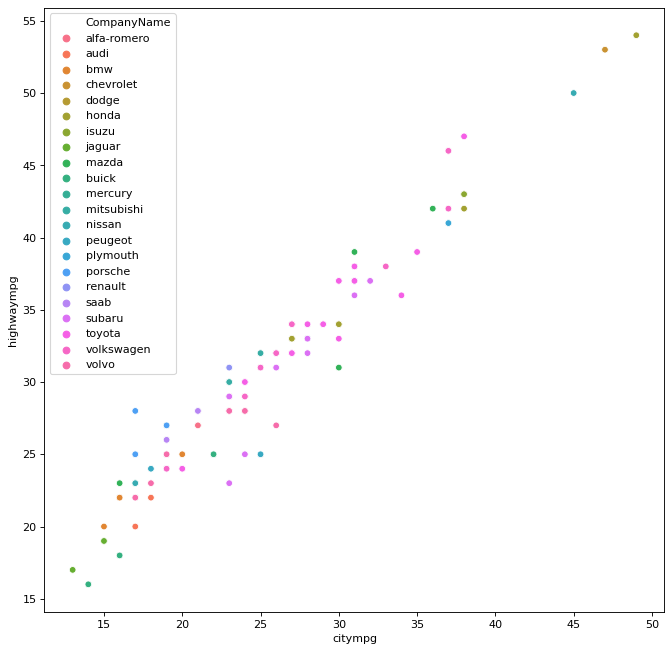

In [158]:
#Relationship between Citympg and highwaympg:
plt.figure(figsize=(10,10),dpi=80)
sns.scatterplot(x="citympg",y="highwaympg",hue="CompanyName",data=data)

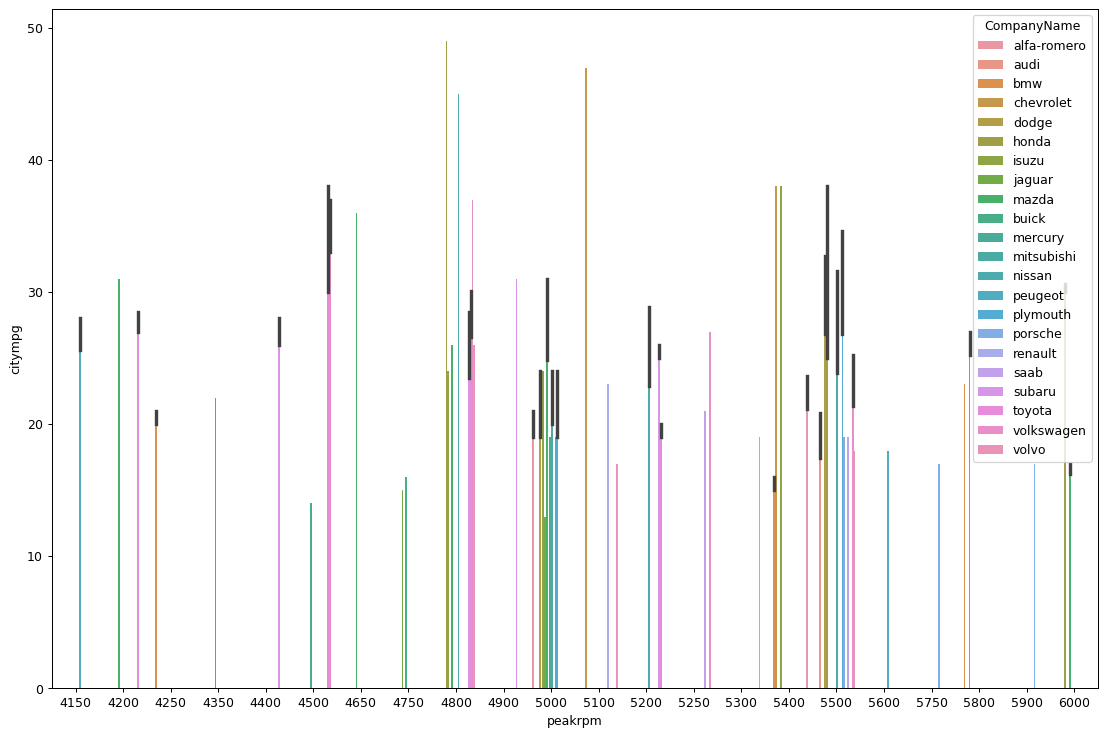

In [159]:
#Relationship between Citympg and peakrpm:
plt.figure(figsize=(15,10),dpi=90)
sns.barplot(x="peakrpm",y="citympg",hue="CompanyName",data=data)

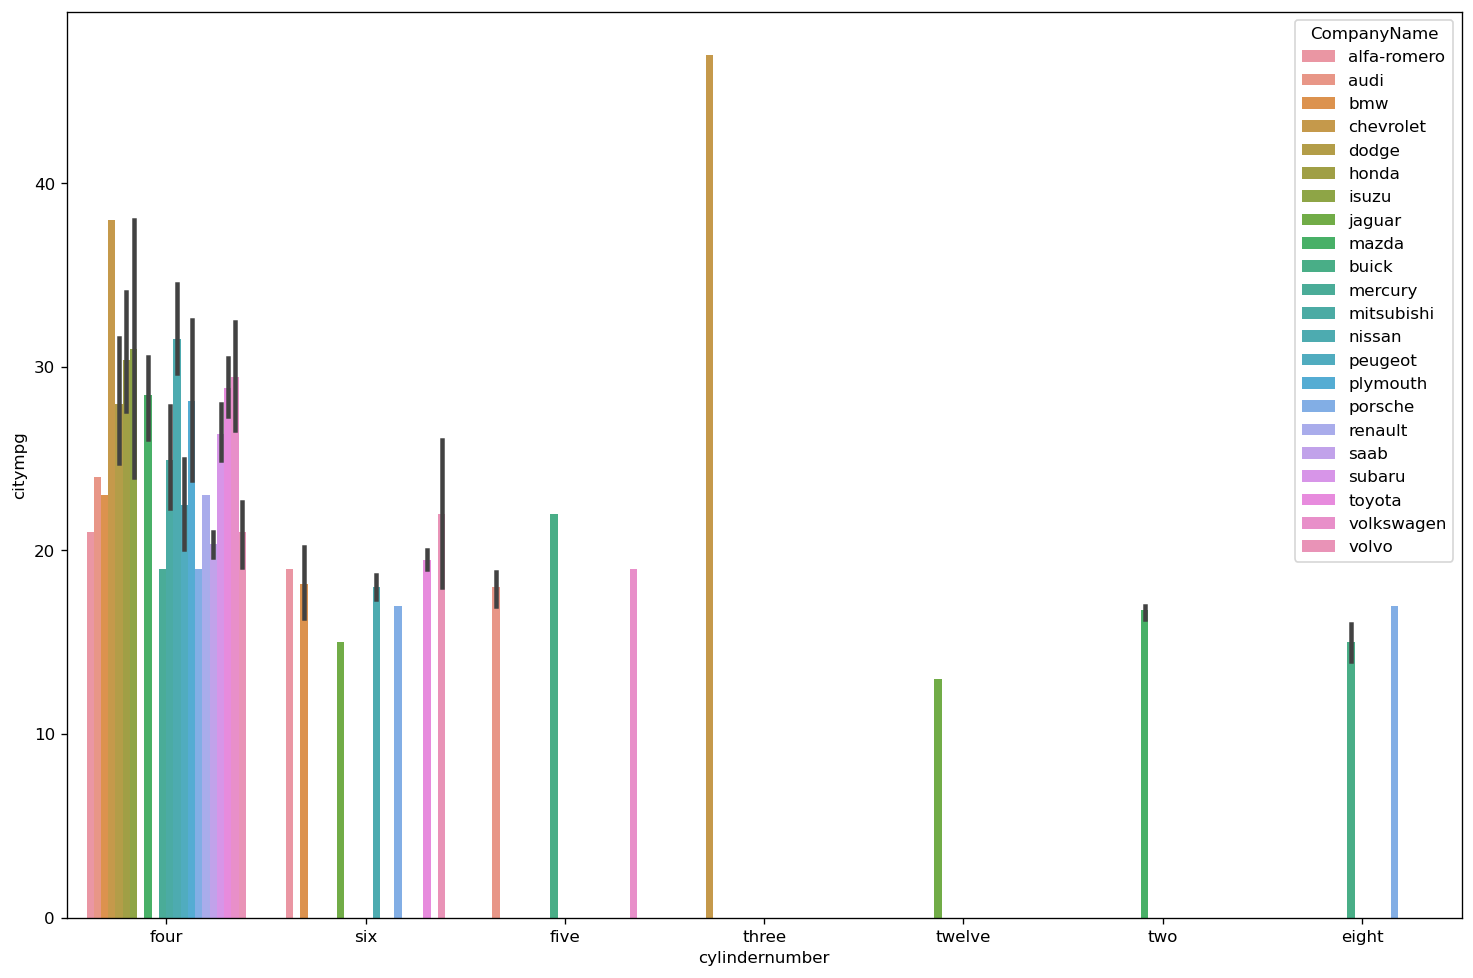

In [160]:
#Relationship between citympg and cylindernumber:
plt.figure(figsize=(15,10),dpi=120)
sns.barplot(x="cylindernumber",y="citympg",hue="CompanyName",data=data)

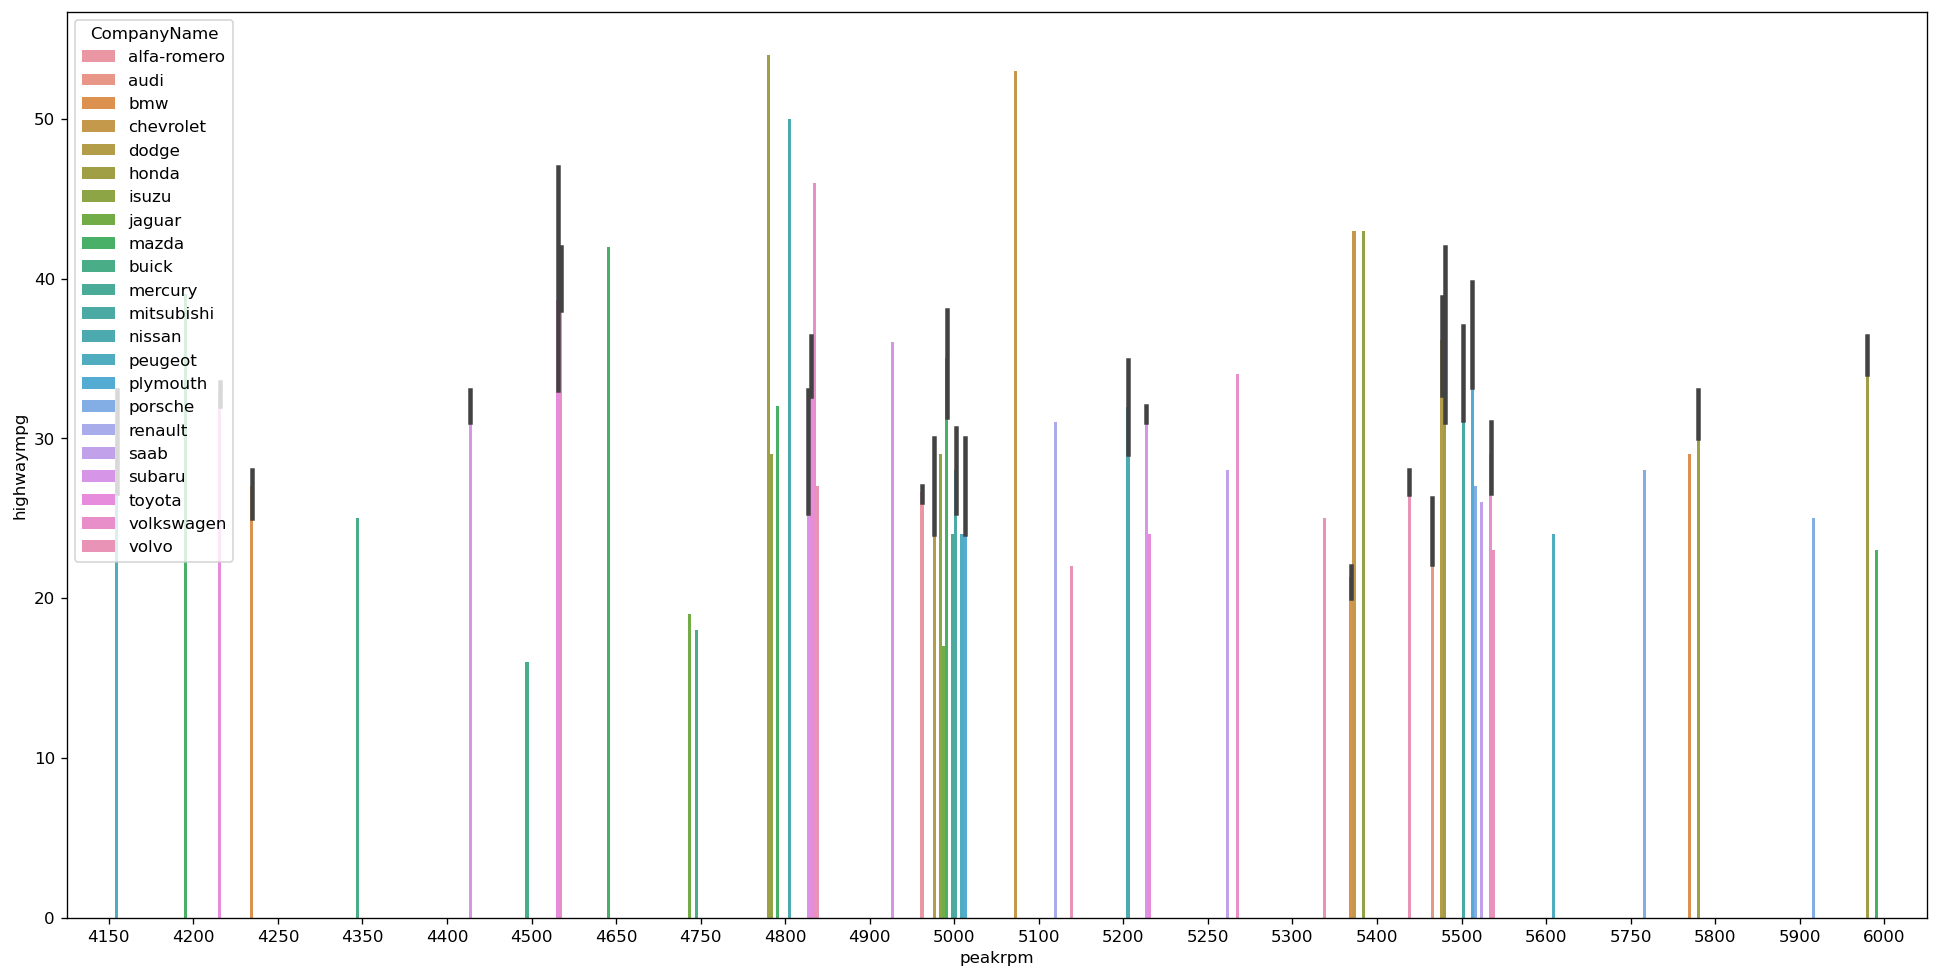

In [161]:
#Relationship between highwaympg and peakrpm:
plt.figure(figsize=(20,10),dpi=120)
sns.barplot(x="peakrpm",y="highwaympg",hue="CompanyName",data=data)

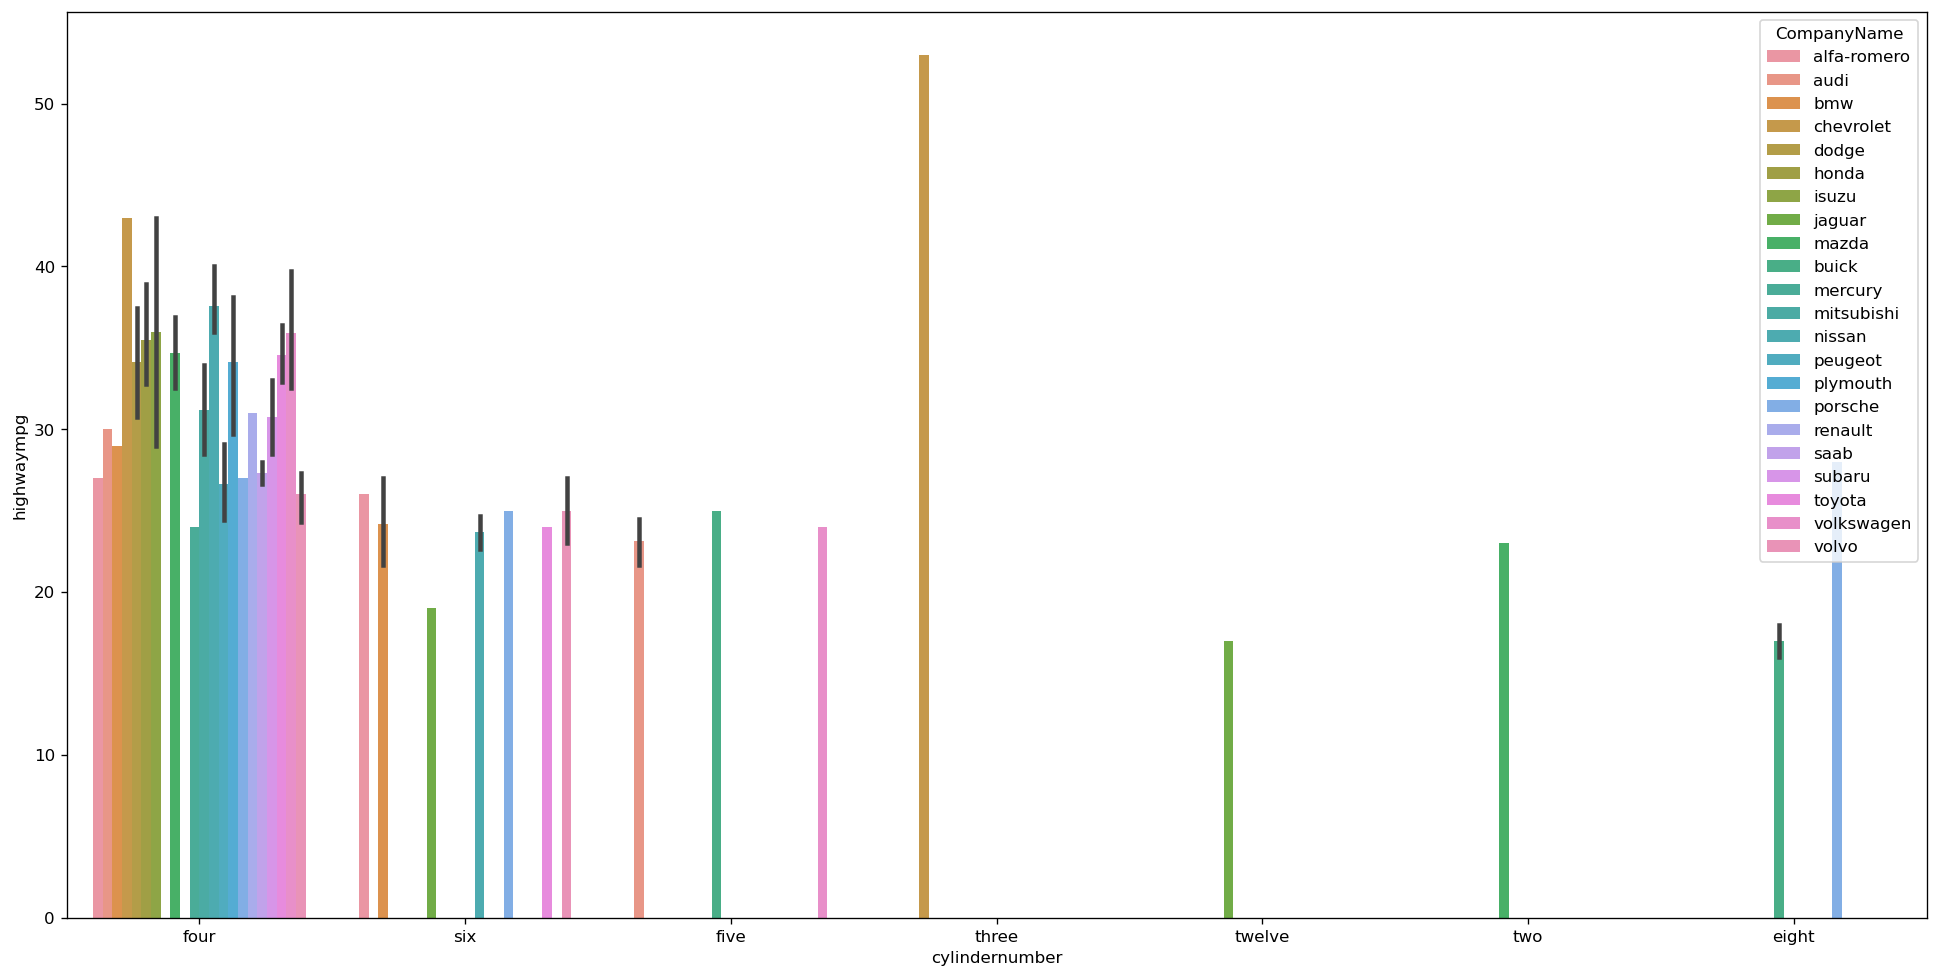

In [162]:
#Relationship between highwaympg and cylindernumbers:
plt.figure(figsize=(20,10),dpi=120)
sns.barplot(x="cylindernumber",y="highwaympg",hue="CompanyName",data=data)

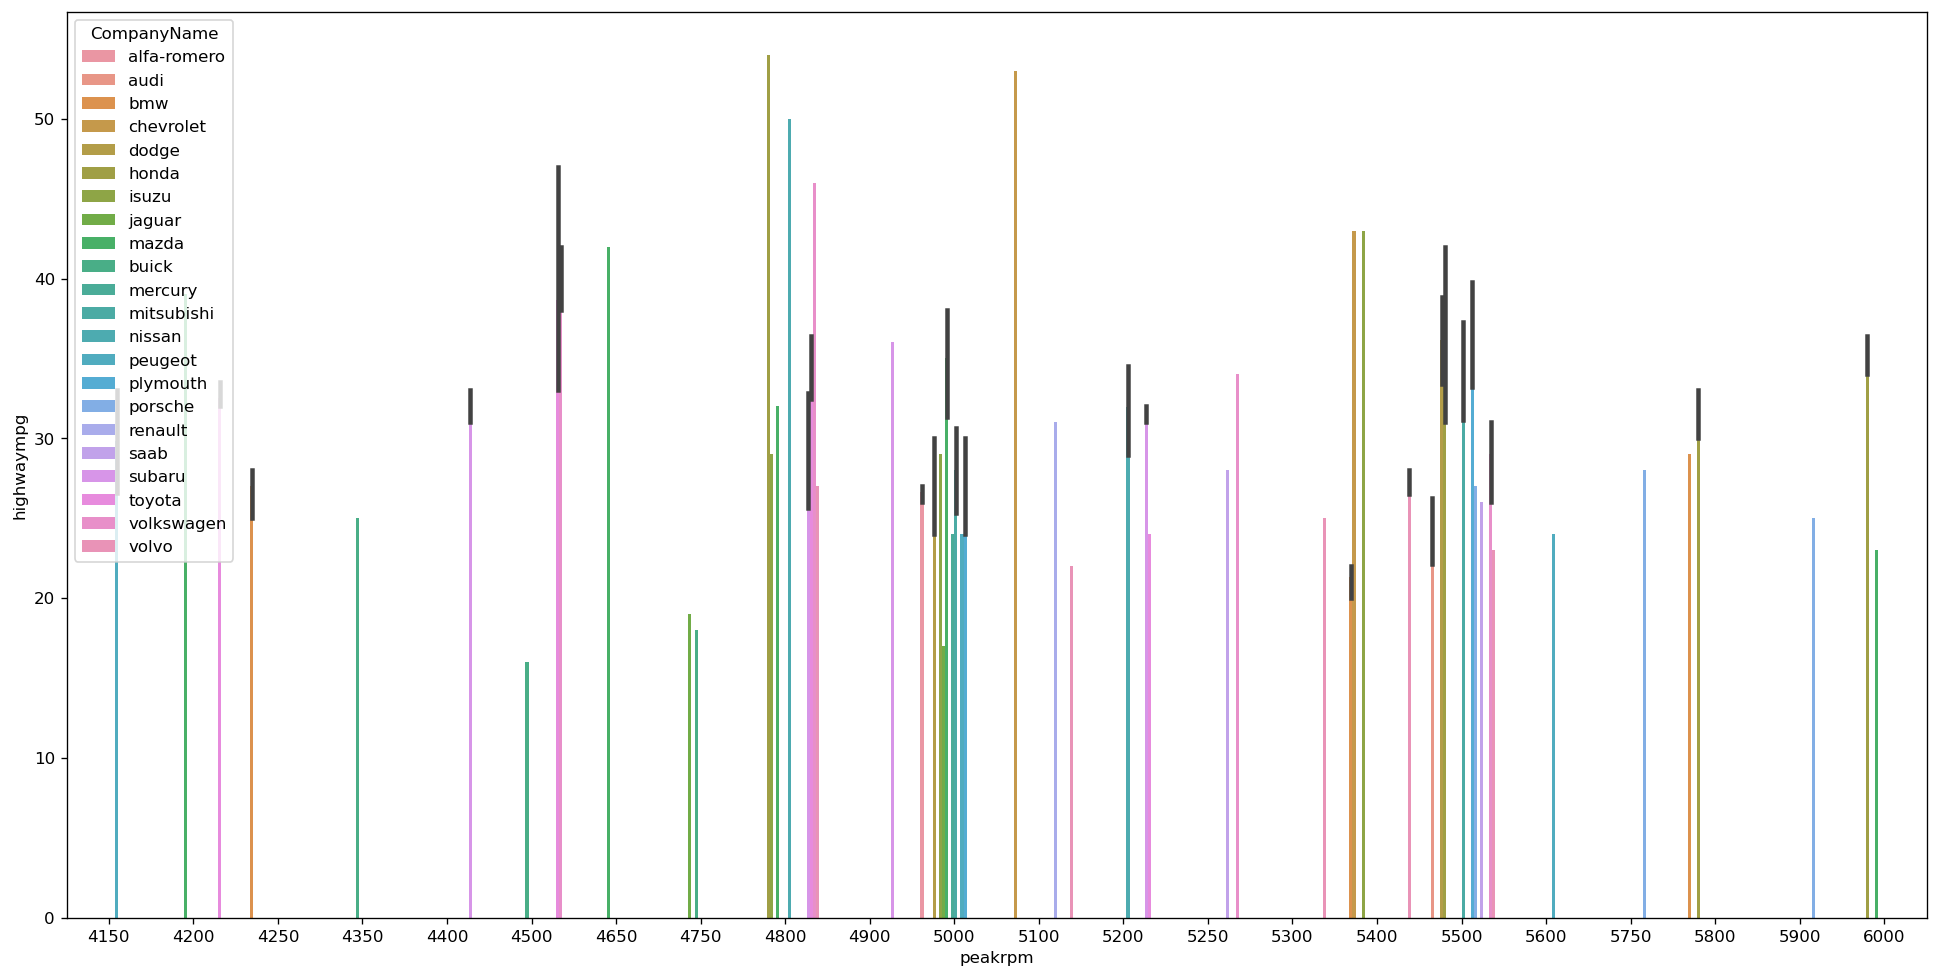

In [163]:
# Relationship between Highwaympg and peakrpm:
plt.figure(figsize=(20,10),dpi=120)
sns.barplot(x="peakrpm",y="highwaympg",hue="CompanyName",data=data)

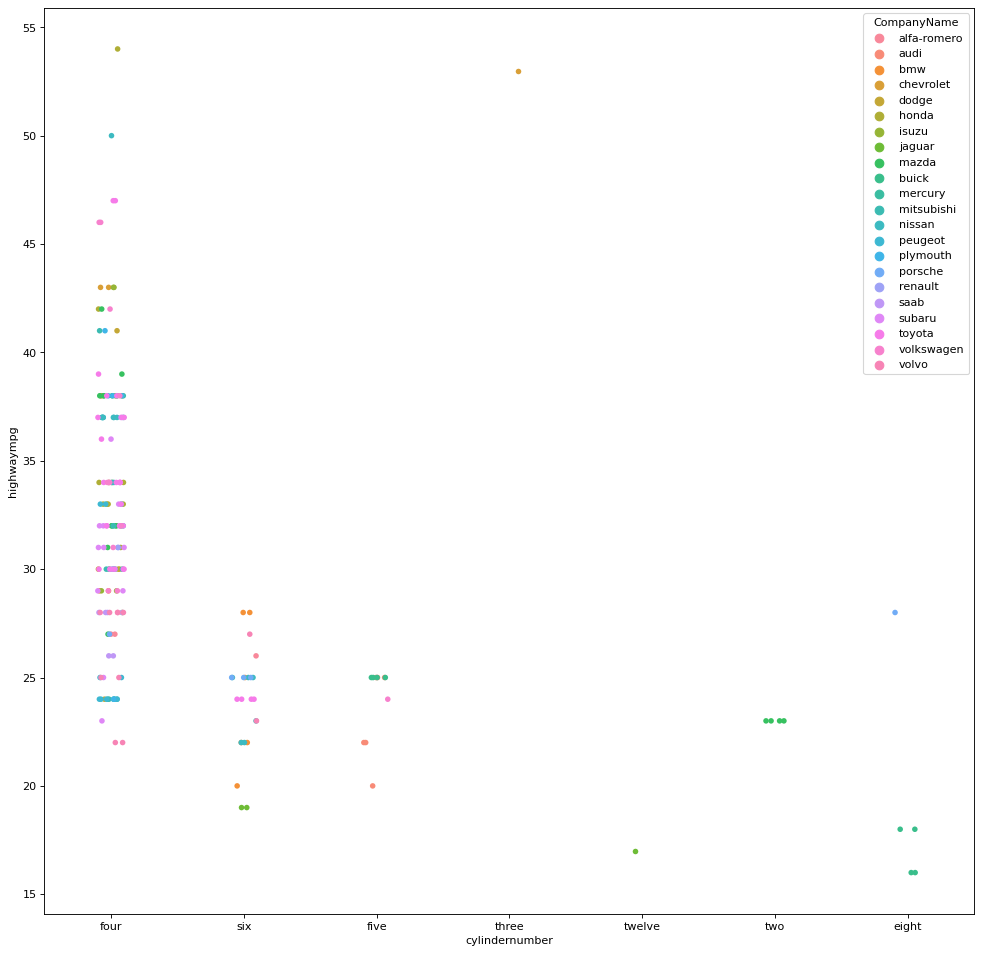

In [164]:
#Relationship between highwaympg and cylindernumber:
plt.figure(figsize=(15,15),dpi=80)
ax = sns.stripplot(x="cylindernumber", y="highwaympg",data=data,hue="CompanyName",jitter=True)

<Figure size 1200x1200 with 0 Axes>

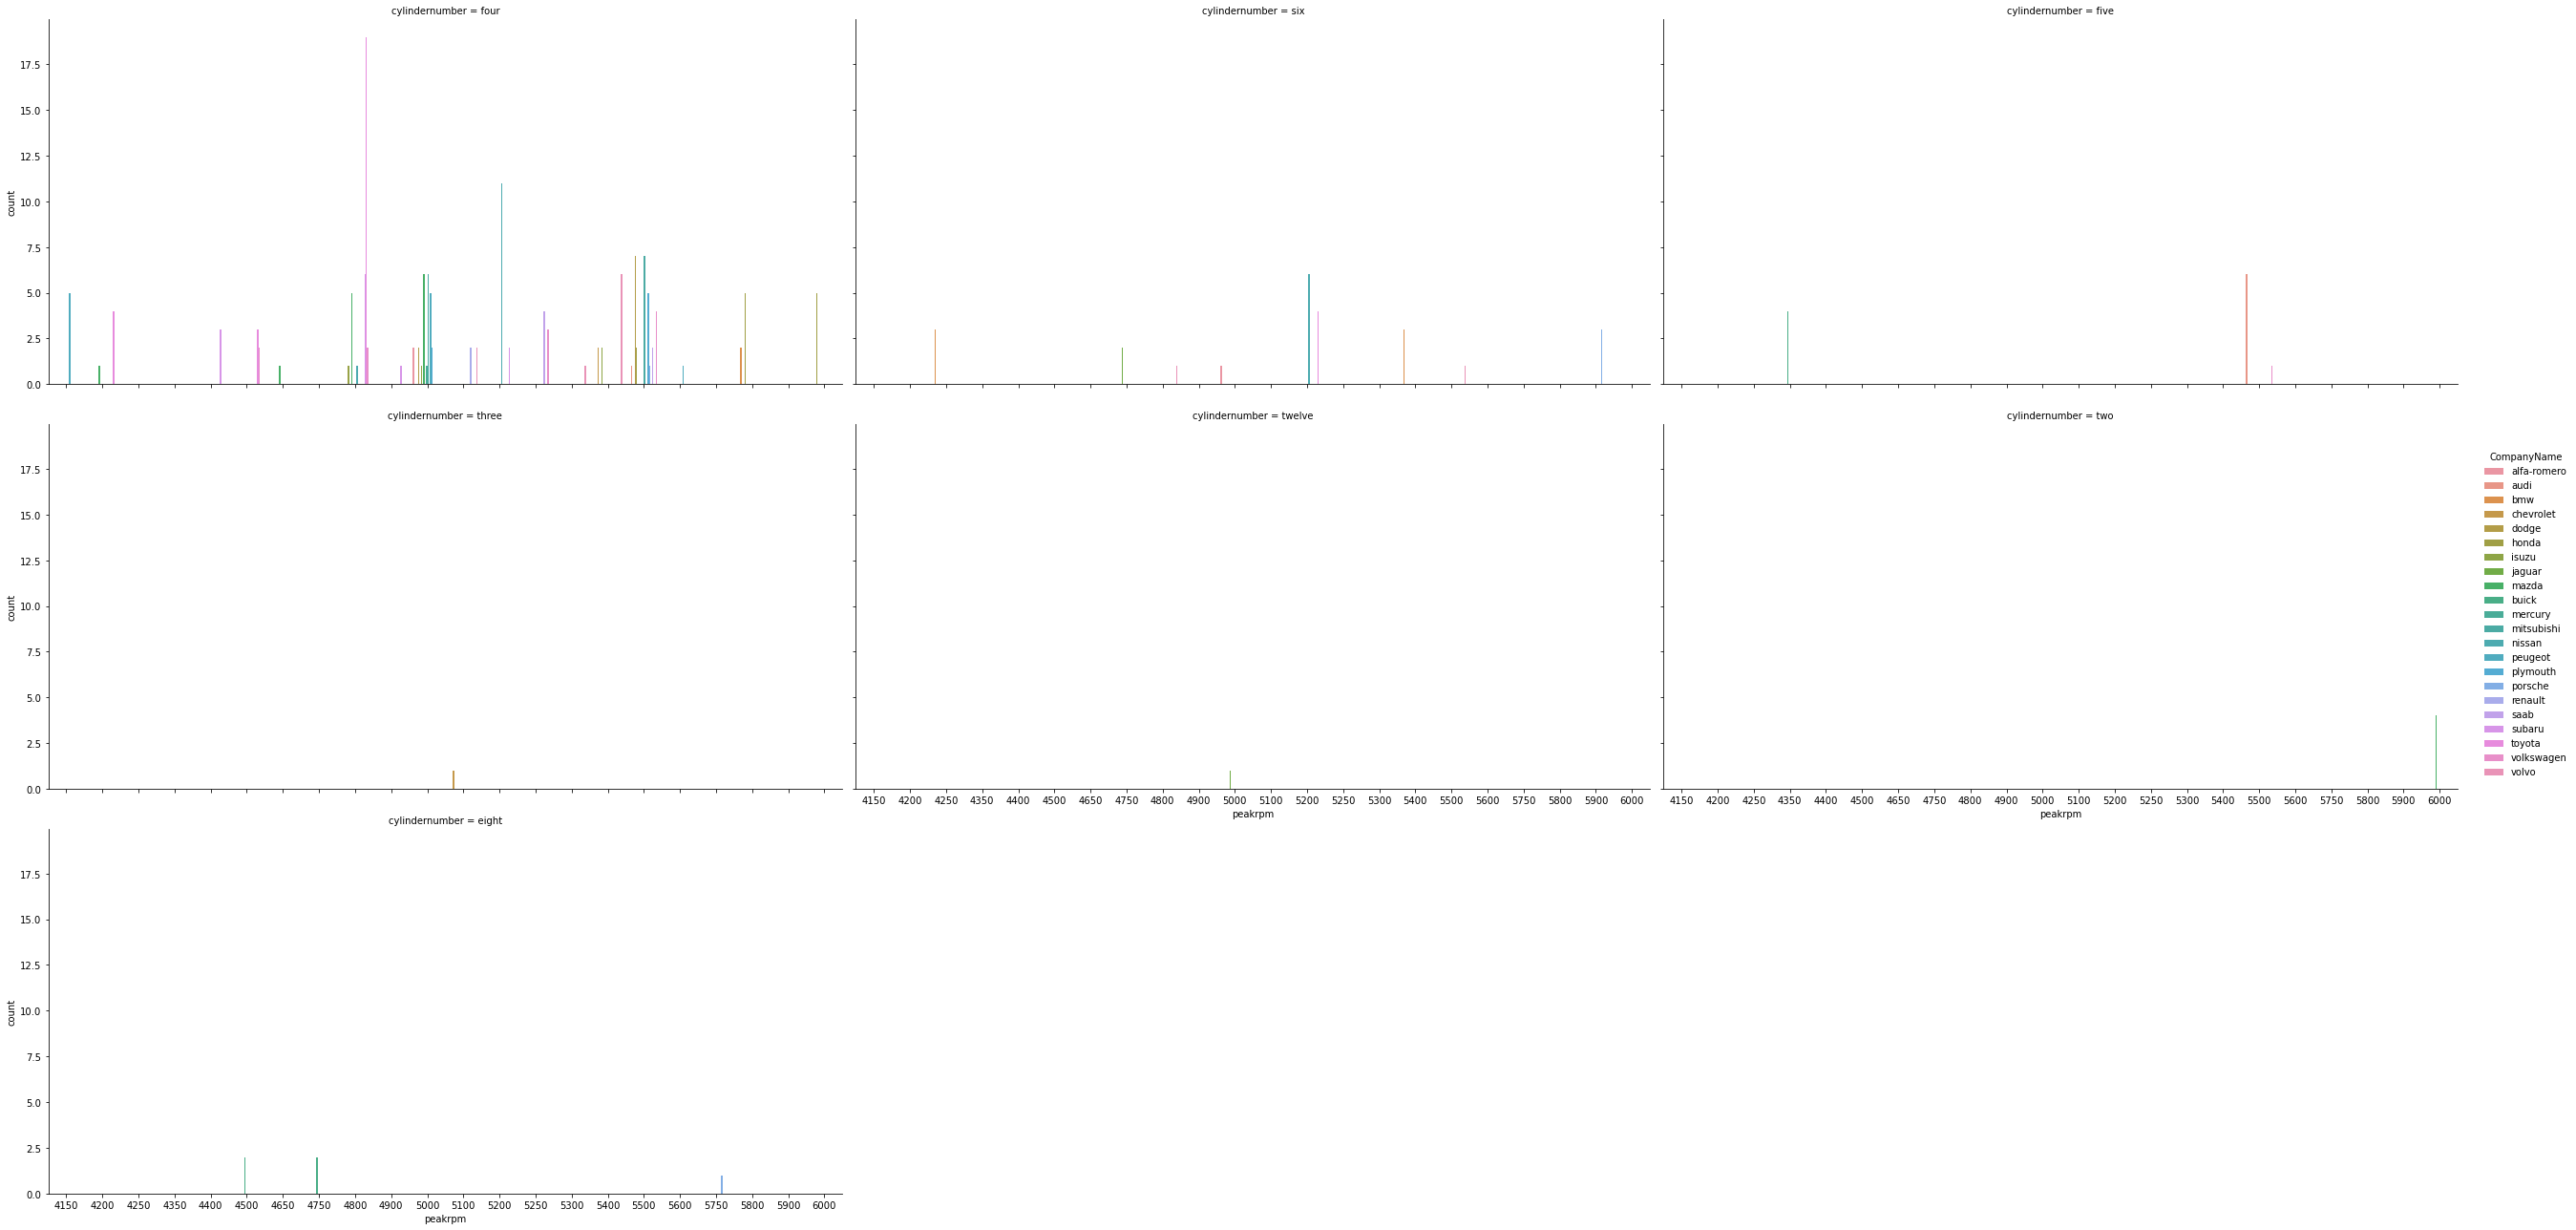

In [165]:
#Relationship between cylindernumber and peakrpm:
plt.figure(figsize=(10,10),dpi=120)
sns.catplot(x="peakrpm",col="cylindernumber",col_wrap=3,kind="count",height=6,aspect=2,hue="CompanyName",data=data)

#Label Encoding

In [166]:
print(data.fueltype.value_counts())

gas       183
diesel     20
Name: fueltype, dtype: int64


In [167]:
data['fueltype']=data['fueltype'].map({'gas':1,'diesel':0}).astype(int)

In [168]:
print(data.aspiration.value_counts())

std      166
turbo     37
Name: aspiration, dtype: int64


In [169]:
data['aspiration']=data['aspiration'].map({'std':1,'turbo':0}).astype(int)

In [170]:
print(data.doornumber.value_counts())

four    115
two      88
Name: doornumber, dtype: int64


In [171]:
data['doornumber']=data['doornumber'].map({'two':1,'four':0}).astype(int)

In [172]:
print(data.carbody.value_counts())

sedan          95
hatchback      69
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


In [173]:
data['carbody']= data['carbody'].map({'convertible':1,'hardtop':0,'hatchback':2,'sedan':3,'wagon':4}).astype(int)

In [174]:
print(data.drivewheel.value_counts())

fwd    120
rwd     74
4wd      9
Name: drivewheel, dtype: int64


In [175]:
data['drivewheel']=data['drivewheel'].map({'rwd':0,'4wd':1,'fwd':2}).astype(int)

In [176]:
print(data.enginelocation.value_counts())

front    200
rear       3
Name: enginelocation, dtype: int64


In [177]:
data['enginelocation']=data['enginelocation'].map({'front':0,'rear':1}).astype(int)

In [178]:
print(data.fuelsystem.value_counts())

mpfi    92
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64


In [179]:
ordinal_label = {k: i for i, k in enumerate(data['fuelsystem'].unique(), 0)}
ordinal_label

{'mpfi': 0,
 '2bbl': 1,
 'mfi': 2,
 '1bbl': 3,
 'spfi': 4,
 '4bbl': 5,
 'idi': 6,
 'spdi': 7}

In [180]:
data['fuelsystem'] = data['fuelsystem'].map(ordinal_label)

In [181]:
print(data.cylindernumber.value_counts())

four      157
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64


In [182]:
ordinal_label= {k: i for i, k in enumerate(data['cylindernumber'].unique(),0)}
ordinal_label

{'four': 0, 'six': 1, 'five': 2, 'three': 3, 'twelve': 4, 'two': 5, 'eight': 6}

In [183]:
data['cylindernumber']= data['cylindernumber'].map(ordinal_label)

In [184]:
print(data.enginetype.value_counts())

ohc      148
ohcf      15
ohcv      13
l         12
dohc      10
rotor      4
dohcv      1
Name: enginetype, dtype: int64


In [185]:
ordinal_label={k: i for i, k in enumerate(data['enginetype'].unique(),0)}
ordinal_label

{'dohc': 0, 'ohcv': 1, 'ohc': 2, 'l': 3, 'rotor': 4, 'ohcf': 5, 'dohcv': 6}

In [186]:
data['enginetype']=data['enginetype'].map(ordinal_label)

In [187]:
ordinal_label={k: i for i, k in enumerate(data['CompanyName'].unique(),0)}
ordinal_label

{'alfa-romero': 0,
 'audi': 1,
 'bmw': 2,
 'chevrolet': 3,
 'dodge': 4,
 'honda': 5,
 'isuzu': 6,
 'jaguar': 7,
 'mazda': 8,
 'buick': 9,
 'mercury': 10,
 'mitsubishi': 11,
 'nissan': 12,
 'peugeot': 13,
 'plymouth': 14,
 'porsche': 15,
 'renault': 16,
 'saab': 17,
 'subaru': 18,
 'toyota': 19,
 'volkswagen': 20,
 'volvo': 21}

In [188]:
data['CompanyName']= data['CompanyName'].map(ordinal_label)

In [189]:
volume_column = data["carlength"]* data["carwidth"]*data["carheight"]
data["carvolume"] = volume_column

In [190]:
data.drop(["carlength"],axis=1,inplace=True)

In [191]:
data.drop(["carwidth"],axis=1,inplace=True)

In [192]:
data.drop(["carheight"],axis=1,inplace=True)

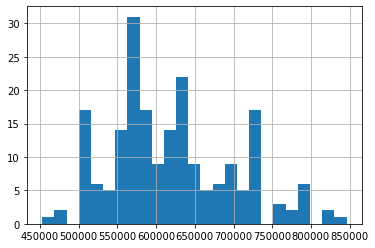

In [197]:
#Distribution of data on carvolume
data['carvolume'].hist(bins=25)

In [193]:
data.head()

car_ID  symboling  CompanyName  fueltype  aspiration  doornumber  carbody  \
0       1          3            0         1           1           1        1   
1       2          3            0         1           1           1        1   
2       3          1            0         1           1           1        2   
3       4          2            1         1           1           0        3   
4       5          2            1         1           1           0        3   

   drivewheel  enginelocation  wheelbase  ...  fuelsystem  boreratio  stroke  \
0           0               0       88.6  ...           0       3.47    2.68   
1           0               0       88.6  ...           0       3.47    2.68   
2           0               0       94.5  ...           0       2.68    3.47   
3           2               0       99.8  ...           0       3.19    3.40   
4           1               0       99.4  ...           0       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

    carvolume  
0  528019.904  
1  528019.904  
2  587592.640  
3  634816.956  
4  636734.832  

[5 rows x 24 columns]

In [194]:
data.drop(['car_ID'],axis=1,inplace=True)

In [195]:
data.head()

symboling  CompanyName  fueltype  aspiration  doornumber  carbody  \
0          3            0         1           1           1        1   
1          3            0         1           1           1        1   
2          1            0         1           1           1        2   
3          2            1         1           1           0        3   
4          2            1         1           1           0        3   

   drivewheel  enginelocation  wheelbase  curbweight  ...  fuelsystem  \
0           0               0       88.6        2548  ...           0   
1           0               0       88.6        2548  ...           0   
2           0               0       94.5        2823  ...           0   
3           2               0       99.8        2337  ...           0   
4           1               0       99.4        2824  ...           0   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price   carvolume  
0          27  13495.0  528019.904  
1          27  16500.0  528019.904  
2          26  16500.0  587592.640  
3          30  13950.0  634816.956  
4          22  17450.0  636734.832  

[5 rows x 23 columns]

# Regarding continuous variables we found most of the feature are skewed so using log to normalize the skewed data

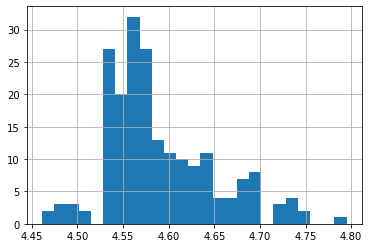

In [198]:
data['wheelbase']=np.log(data['wheelbase'])
data['wheelbase'].hist(bins=25)

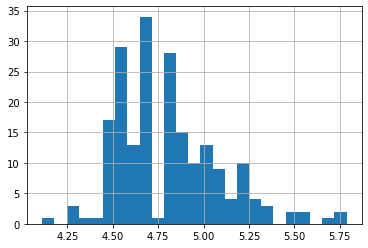

In [199]:
data['enginesize']=np.log(data['enginesize'])
data['enginesize'].hist(bins=25)

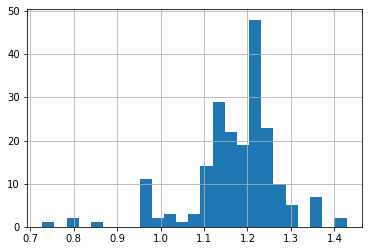

In [200]:
data['stroke']=np.log(data['stroke'])
data['stroke'].hist(bins=25)

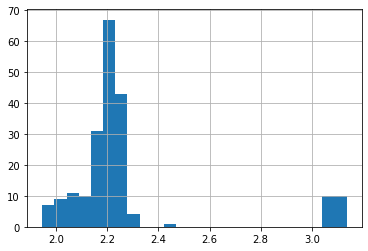

In [201]:
data['compressionratio']=np.log(data['compressionratio'])
data['compressionratio'].hist(bins=25)

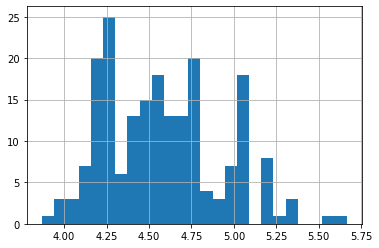

In [202]:
data['horsepower']=np.log(data['horsepower'])
data['horsepower'].hist(bins=25)

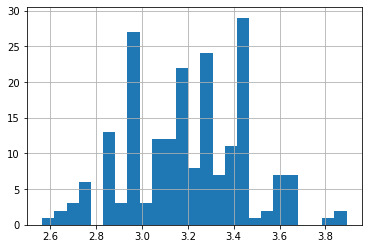

In [203]:
data['citympg']=np.log(data['citympg'])
data['citympg'].hist(bins=25)

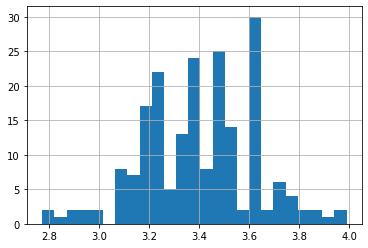

In [204]:
data['highwaympg']=np.log(data['highwaympg'])
data['highwaympg'].hist(bins=25)

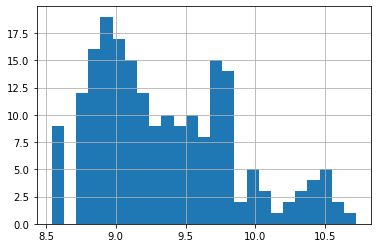

In [205]:
data['price']=np.log(data['price'])
data['price'].hist(bins=25)

# Splitting the independent and dependent feature:

In [206]:
x=data.iloc[:,:-1]
y=data['price']

In [207]:
x.head()

symboling  CompanyName  fueltype  aspiration  doornumber  carbody  \
0          3            0         1           1           1        1   
1          3            0         1           1           1        1   
2          1            0         1           1           1        2   
3          2            1         1           1           0        3   
4          2            1         1           1           0        3   

   drivewheel  enginelocation  wheelbase  curbweight  ...  enginesize  \
0           0               0   4.484132        2548  ...    4.867534   
1           0               0   4.484132        2548  ...    4.867534   
2           0               0   4.548600        2823  ...    5.023881   
3           2               0   4.603168        2337  ...    4.691348   
4           1               0   4.599152        2824  ...    4.912655   

   fuelsystem  boreratio    stroke  compressionratio  horsepower  peakrpm  \
0           0       3.47  0.985817          2.197225    4.709530     5000   
1           0       3.47  0.985817          2.197225    4.709530     5000   
2           0       2.68  1.244155          2.197225    5.036953     5000   
3           0       3.19  1.223775          2.302585    4.624973     5500   
4           0       3.19  1.223775          2.079442    4.744932     5500   

    citympg  highwaympg     price  
0  3.044522    3.295837  9.510075  
1  3.044522    3.295837  9.711116  
2  2.944439    3.258097  9.711116  
3  3.178054    3.401197  9.543235  
4  2.890372    3.091042  9.767095  

[5 rows x 22 columns]

In [208]:
x.count()

symboling           203
CompanyName         203
fueltype            203
aspiration          203
doornumber          203
carbody             203
drivewheel          203
enginelocation      203
wheelbase           203
curbweight          203
enginetype          203
cylindernumber      203
enginesize          203
fuelsystem          203
boreratio           203
stroke              203
compressionratio    203
horsepower          203
peakrpm             203
citympg             203
highwaympg          203
price               203
dtype: int64

In [209]:
y.head()

0    9.510075
1    9.711116
2    9.711116
3    9.543235
4    9.767095
Name: price, dtype: float64

In [210]:
y.count()

203

# splitting data into training and testing 

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=15)

In [212]:
X_train.shape

(162, 22)

In [213]:
y_train.shape

(162,)

In [214]:
X_test.shape

(41, 22)

In [215]:
y_test.shape

(41,)

# Feature selection:
# Pearson's Correlation method:

In [216]:
corr= X_train.corr()
top_feature=corr.index

In [217]:
corr

symboling  CompanyName  fueltype  aspiration  doornumber  \
symboling          1.000000    -0.089605  0.203040   -0.010501    0.671768   
CompanyName       -0.089605     1.000000 -0.092340   -0.027668   -0.139779   
fueltype           0.203040    -0.092340  1.000000    0.377266    0.185369   
aspiration        -0.010501    -0.027668  0.377266    1.000000   -0.025270   
doornumber         0.671768    -0.139779  0.185369   -0.025270    1.000000   
carbody           -0.564385     0.010218 -0.148708   -0.039272   -0.674972   
drivewheel         0.075980    -0.027026  0.159317    0.161181    0.009431   
enginelocation     0.235965     0.065117  0.048564    0.066820    0.159470   
wheelbase         -0.542883     0.065652 -0.344887   -0.270427   -0.487515   
curbweight        -0.207296     0.032722 -0.269968   -0.381731   -0.266581   
enginetype         0.019812     0.145922 -0.049611    0.022720    0.002628   
cylindernumber     0.065643    -0.260090 -0.041365   -0.008316    0.007990   
enginesize        -0.094921    -0.001641 -0.143988   -0.229458   -0.130132   
fuelsystem         0.005916    -0.045645 -0.673010   -0.501639    0.060601   
boreratio         -0.112586     0.209508 -0.113812   -0.267510   -0.144027   
stroke            -0.015120    -0.169008 -0.246234   -0.255016    0.038960   
compressionratio  -0.202126     0.129350 -0.968530   -0.221373   -0.186348   
horsepower         0.112578    -0.059657  0.190670   -0.343195    0.028881   
peakrpm            0.302316    -0.283219  0.534829    0.195899    0.277435   
citympg           -0.103465     0.095655 -0.261820    0.233428    0.035293   
highwaympg        -0.017071     0.102572 -0.180215    0.292401    0.070373   
price             -0.047374    -0.105006 -0.150633   -0.287224   -0.148966   

                   carbody  drivewheel  enginelocation  wheelbase  curbweight  \
symboling        -0.564385    0.075980        0.235965  -0.542883   -0.207296   
CompanyName       0.010218   -0.027026        0.065117   0.065652    0.032722   
fueltype         -0.148708    0.159317        0.048564  -0.344887   -0.269968   
aspiration       -0.039272    0.161181        0.066820  -0.270427   -0.381731   
doornumber       -0.674972    0.009431        0.159470  -0.487515   -0.266581   
carbody           1.000000    0.085012       -0.349540   0.440884    0.207661   
drivewheel        0.085012    1.000000       -0.192973  -0.467297   -0.674112   
enginelocation   -0.349540   -0.192973        1.000000  -0.224395    0.068992   
wheelbase         0.440884   -0.467297       -0.224395   1.000000    0.765588   
curbweight        0.207661   -0.674112        0.068992   0.765588    1.000000   
enginetype       -0.059423   -0.021218        0.405642  -0.127639   -0.151887   
cylindernumber   -0.004487   -0.310123        0.101151   0.277005    0.372611   
enginesize       -0.009923   -0.582071        0.254148   0.575703    0.869713   
fuelsystem        0.005719    0.038182       -0.098007   0.047991    0.051087   
boreratio        -0.019813   -0.644018        0.213407   0.487165    0.687600   
stroke           -0.015565    0.094046       -0.151940   0.132128    0.159168   
compressionratio  0.122384   -0.137467       -0.011581   0.282278    0.173404   
horsepower       -0.103249   -0.546438        0.322933   0.370089    0.747868   
peakrpm          -0.123542    0.172383        0.240299  -0.378671   -0.276875   
citympg          -0.004908    0.537596       -0.213654  -0.419800   -0.752152   
highwaympg       -0.058028    0.564804       -0.130662  -0.518663   -0.802822   
price             0.038350   -0.674942        0.318651   0.599457    0.871233   

                  ...  enginesize  fuelsystem  boreratio    stroke  \
symboling         ...   -0.094921    0.005916  -0.112586 -0.015120   
CompanyName       ...   -0.001641   -0.045645   0.209508 -0.169008   
fueltype          ...   -0.143988   -0.673010  -0.113812 -0.246234   
aspiration        ...   -0.229458   -0.501639  -0.267510 -0.255016   
doornumbe

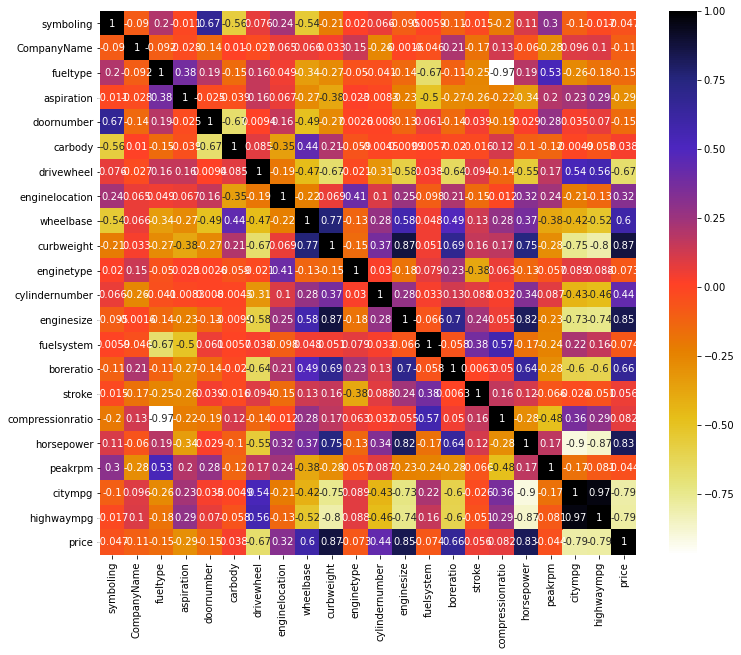

In [218]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [219]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [220]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

3

In [221]:
corr_features

{'citympg', 'compressionratio', 'highwaympg'}

In [222]:
X_train.drop(corr_features,axis=1)

symboling  CompanyName  fueltype  aspiration  doornumber  carbody  \
200         -1           21         1           1           0        3   
141          0           18         1           1           0        3   
172          2           19         1           1           1        1   
186          2           20         1           1           0        3   
152          1           19         1           1           0        2   
..         ...          ...       ...         ...         ...      ...   
128          3           15         1           1           1        1   
119          1           14         1           0           1        2   
133          2           17         1           1           0        3   
140          2           18         1           1           1        2   
202         -1           21         1           1           0        3   

     drivewheel  enginelocation  wheelbase  curbweight  enginetype  \
200           0               0   4.692265        2952           2   
141           2               0   4.576771        2145           5   
172           0               0   4.589041        2975           2   
186           2               0   4.577799        2275           2   
152           2               0   4.561218        2015           2   
..          ...             ...        ...         ...         ...   
128           0               1   4.494239        2800           5   
119           2               0   4.540098        2128           2   
133           2               0   4.596129        2695           2   
140           1               0   4.535820        2240           5   
202           0               0   4.692265        3012           1   

     cylindernumber  enginesize  fuelsystem  boreratio    stroke  horsepower  \
200               0    4.948760           0       3.78  1.147402    4.736198   
141               0    4.682131           1       3.62  0.970779    4.406719   
172               0    4.983607           0       3.62  1.252763    4.753590   
186               0    4.691348           0       3.19  1.223775    4.442651   
152               0    4.521789           1       3.05  1.108563    4.127134   
..              ...         ...         ...        ...       ...         ...   
128               1    5.267858           0       3.74  1.064711    5.332719   
119               0    4.584967           7       3.03  1.220830    4.624973   
133               0    4.795791           0       3.54  1.121678    4.700480   
140               0    4.682131           1       3.62  0.970779    4.290459   
202               1    5.153292           0       3.58  1.054312    4.897840   

     peakrpm      price  
200     5400   9.731809  
141     4800   8.871505  
172     4800   9.779567  
186     5250   9.047233  
152     4800   8.777710  
..       ...        ...  
128     5900  10.519430  
119     5500   8.981807  
133     5250   9.406729  
140     4400   8.936298  
202     5500   9.975110  

[162 rows x 19 columns]

In [223]:
X_test.drop(corr_features,axis=1)

symboling  CompanyName  fueltype  aspiration  doornumber  carbody  \
49           0            7         1           1           1        3   
179          3           19         1           1           1        2   
12           0            2         1           1           1        3   
176         -1           19         1           1           0        3   
71          -1            9         1           1           0        3   
40           0            5         1           1           0        3   
30           2            5         1           1           1        2   
97           1           12         1           1           0        4   
203         -1           21         0           0           0        3   
57           3            8         1           1           1        2   
120          1           14         1           1           0        2   
122          1           14         1           1           0        3   
117          0           13         1           0           0        3   
148          0           18         1           1           0        4   
58           3            8         1           1           1        2   
26           1            4         1           1           0        3   
9            0            1         1           0           1        2   
78           2           11         1           1           1        2   
196         -2           21         1           1           0        3   
198         -2           21         1           0           0        3   
74           1            9         1           1           1        0   
36           0            5         1           1           0        4   
93           1           12         1           1           0        4   
115          0           13         1           1           0        3   
169          2           19         1           1           1        2   
163          1           19         1           1           1        3   
149          0           18         1           0           0        4   
191          0           20         1           1           0        3   
129          1           15         1           1           1        2   
21           1            4         1           1           1        2   
109          0           13         1           1           0        4   
192          0           20         0           0           0        3   
138          2           18         1           1           1        2   
72           3            9         1           1           1        1   
132          3           17         1           1           1        2   
2            1            0         1           1           1        2   
106          1           12         1           1           1        2   
195         -1           21         1           1           0        4   
94           1           12         1           1           1        3   
146          0           18         1           1           0        4   
47           0            7         1           1           0        3   

     drivewheel  enginelocation  wheelbase  curbweight  enginetype  \
49            0               0   4.624973        3950           1   
179           0               0   4.633758        3016           0   
12            0               0   4.617099        2710           2   
176           2               0   4.628887        2414           2   
71            0               0   4.750136        3740           1   
40            2               0   4.569543        2372           2   
30            2               0   4.461300        1713           2   
97            2               0   4.548600        2037           2   
203           0               0   4.692265        3217           2   
57            0               0   4.557030        2385           4   
120           2               0   4.540098        1967           2   
122           2               0   4.540098        2191  

# Machine Learning Models:

# we are going to load libraries that we need calculate scores fo regression models. Than apply function which fit the models, get the scores and plot our predictions .

In [224]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [225]:
cv=5 
r2 = []
CV = [] 

# Main function for models
def model(algorithm,X_train,y_train,X_test,y_test): 
    algorithm.fit(X_train,y_train)
    predicts=algorithm.predict(X_test)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test,prediction)
    cross_val=cross_val_score(algorithm,X_train,y_train,cv=cv)
    
    # Appending results to Lists 
    r2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test.reset_index()["price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

# MODEL 1:
Linear Regression

LinearRegression() 

r_2 score : 1.0 

CV scores: [1. 1. 1. 1. 1.] 

CV scores mean: 1.0


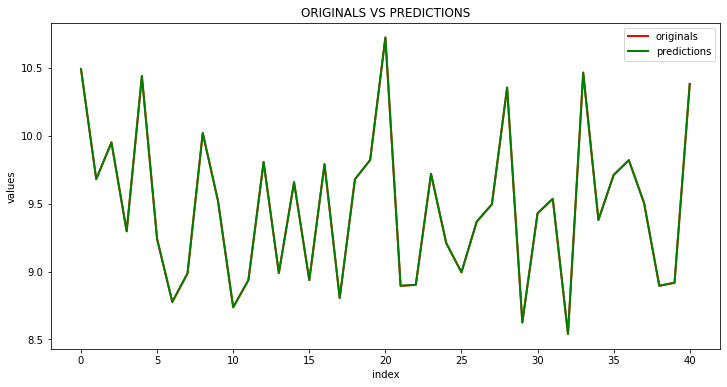

In [226]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test)

# Model 2:
    Lasso Regression

# Hyperparameter Tuning in Lasso Regression Using Grid Search CV

In [227]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.9998859885271063
0.001


Lasso(alpha=0.001, normalize=True) 

r_2 score : 0.9992597027603216 

CV scores: [0.99945459 0.9994716  0.99933213 0.99946805 0.99943244] 

CV scores mean: 0.9994317626677226


C:\Users\RAVANA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\RAVANA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


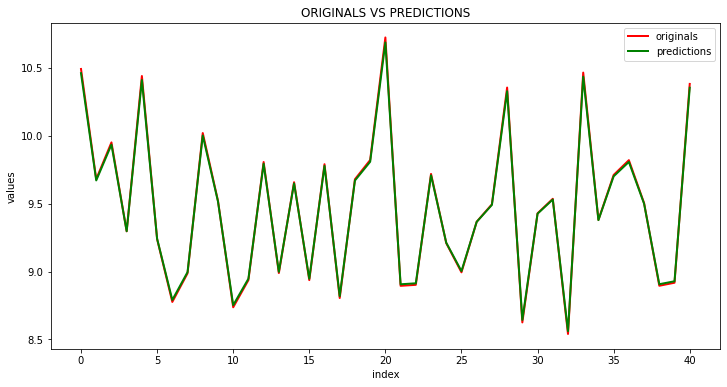

In [228]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) 
model(ls,X_train,y_train,X_test,y_test)

# MODEL 3:
    Ridge Regression

# Hyperparameter Optimization on Ridge Redression Using Grid Search CV

In [229]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(X_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.9999999764500196
0.001


Ridge(alpha=0.001, normalize=True) 

r_2 score : 0.999987055966456 

CV scores: [0.99999179 0.99994742 0.99998961 0.99997392 0.99998746] 

CV scores mean: 0.9999780402681615


C:\Users\RAVANA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\RAVANA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

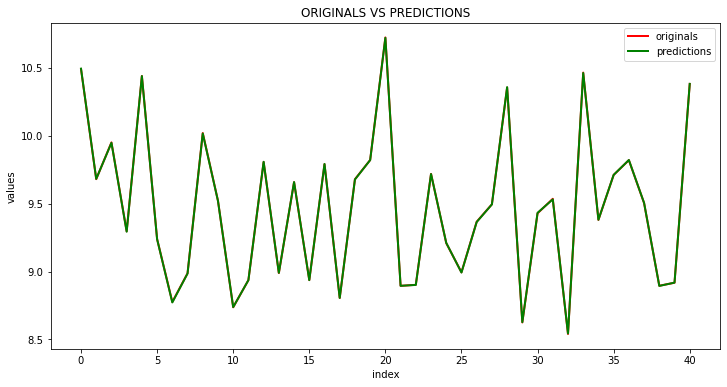

In [230]:
ridge = Ridge(alpha =grid2.best_estimator_.alpha, normalize = True) 
model(ridge,X_train,y_train,X_test,y_test)

# Model 4:
    Decision Tree Regressor

DecisionTreeRegressor() 

r_2 score : 0.9975787576765685 

CV scores: [0.99647939 0.98958062 0.99489069 0.99648889 0.98482327] 

CV scores mean: 0.9924525733685898


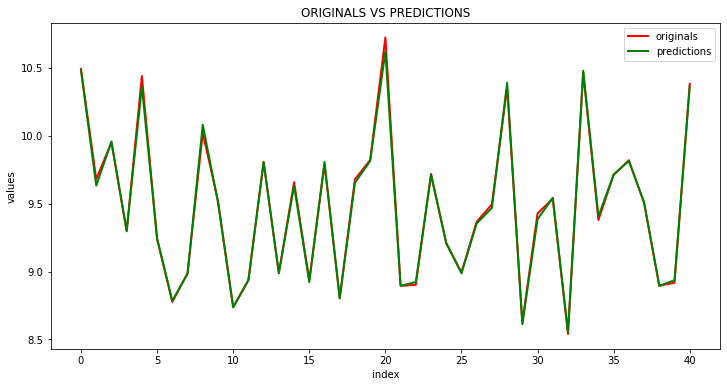

In [231]:
from sklearn.tree import DecisionTreeRegressor
Decision_Reg = DecisionTreeRegressor()
model(Decision_Reg,X_train,y_train,X_test,y_test)


# MODEL 5:
    Random Forest Regressor

RandomForestRegressor(random_state=42) 

r_2 score : 0.9982847939899249 

CV scores: [0.9988095  0.99759107 0.99220058 0.99861152 0.99546064] 

CV scores mean: 0.9965346610938773


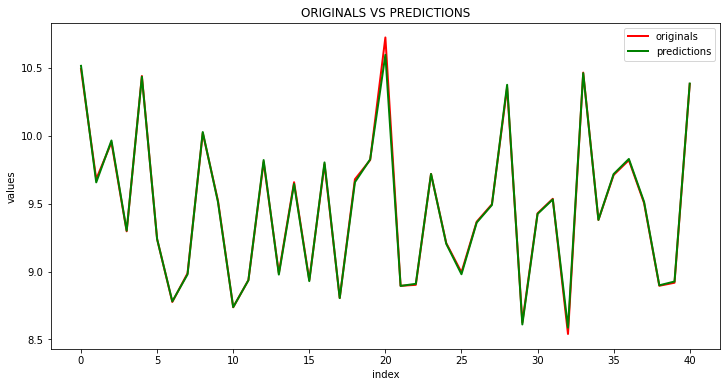

In [232]:
from sklearn.ensemble import RandomForestRegressor
randomReg = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(randomReg,X_train,y_train,X_test,y_test)

# Model 6:
    XGBoost Regression

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 

r_2 score : 0.9962817187790108 

CV scores: [0.99149534 0.98755076 0.99488538 0.9913282  0.99083422] 

CV scores mean: 0.9912187800831459


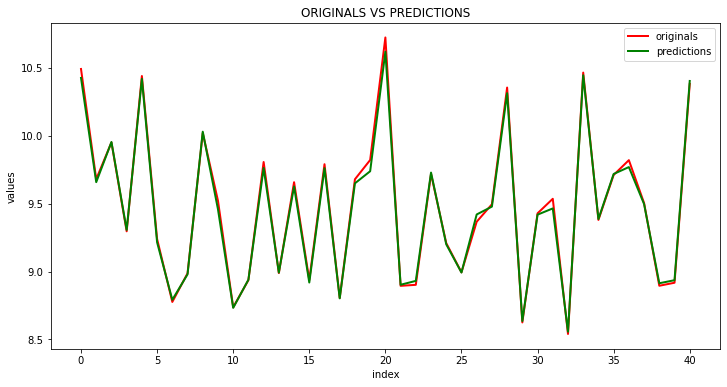

In [233]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
model(xgb,X_train,y_train,X_test,y_test)

In [234]:
Model = ["LinearRegression","Lasso","Ridge","DecisionTreeRegressor","RandomForestRegressor","XGBRegressor"] 
results=pd.DataFrame({'Model': Model,'R Squared': r2,'CV score mean': CV}) 
results

Model  R Squared  CV score mean
0       LinearRegression   1.000000       1.000000
1                  Lasso   0.999260       0.999432
2                  Ridge   0.999987       0.999978
3  DecisionTreeRegressor   0.997579       0.992453
4  RandomForestRegressor   0.998285       0.996535
5           XGBRegressor   0.996282       0.991219